# Coursework 2

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the instructions file located under spec/coursework2.pdf. The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np


def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval,fig_n1, fig_n2, stats_file, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    
    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Print the Errors and Accuracies
    np.savetxt(stats_file, stats, delimiter=",")
    
    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    fig_1.savefig(fig_n1 + ".pdf")

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    fig_2.savefig(fig_n2 + ".pdf") 
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

['inputs', 'targets']
['inputs', 'targets']


Part A: Deep Neural Networks
1. Perform baseline experiments using DNNs trained on EMNIST Balanced

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 1.9s to complete
    error(train)=9.88e-01, acc(train)=7.09e-01, error(valid)=9.98e-01, acc(valid)=7.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 1.5s to complete
    error(train)=7.24e-01, acc(train)=7.78e-01, error(valid)=7.45e-01, acc(valid)=7.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 1.5s to complete
    error(train)=6.30e-01, acc(train)=8.01e-01, error(valid)=6.66e-01, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 1.5s to complete
    error(train)=5.72e-01, acc(train)=8.17e-01, error(valid)=6.14e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 1.6s to complete
    error(train)=5.37e-01, acc(train)=8.21e-01, error(valid)=5.88e-01, acc(valid)=8.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 1.8s to complete
    error(train)=5.01e-01, acc(train)=8.36e-01, error(valid)=5.63e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 1.5s to complete
    error(train)=4.83e-01, acc(train)=8.39e-01, error(valid)=5.51e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 1.6s to complete
    error(train)=4.53e-01, acc(train)=8.47e-01, error(valid)=5.26e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 1.5s to complete
    error(train)=4.36e-01, acc(train)=8.52e-01, error(valid)=5.17e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 1.9s to complete
    error(train)=4.24e-01, acc(train)=8.56e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 1.6s to complete
    error(train)=4.13e-01, acc(train)=8.60e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 2.0s to complete
    error(train)=4.02e-01, acc(train)=8.62e-01, error(valid)=5.08e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 1.7s to complete
    error(train)=3.91e-01, acc(train)=8.64e-01, error(valid)=4.99e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 1.7s to complete
    error(train)=3.77e-01, acc(train)=8.69e-01, error(valid)=4.90e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 1.8s to complete
    error(train)=3.65e-01, acc(train)=8.73e-01, error(valid)=4.91e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 1.6s to complete
    error(train)=3.63e-01, acc(train)=8.72e-01, error(valid)=4.89e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 1.6s to complete
    error(train)=3.50e-01, acc(train)=8.77e-01, error(valid)=4.86e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 1.5s to complete
    error(train)=3.47e-01, acc(train)=8.78e-01, error(valid)=4.88e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 1.5s to complete
    error(train)=3.45e-01, acc(train)=8.78e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 1.6s to complete
    error(train)=3.38e-01, acc(train)=8.79e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 1.8s to complete
    error(train)=3.39e-01, acc(train)=8.78e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 1.5s to complete
    error(train)=3.18e-01, acc(train)=8.88e-01, error(valid)=4.86e-01, acc(valid)=8.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 1.8s to complete
    error(train)=3.25e-01, acc(train)=8.80e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 1.7s to complete
    error(train)=3.09e-01, acc(train)=8.89e-01, error(valid)=4.92e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 1.8s to complete
    error(train)=3.10e-01, acc(train)=8.88e-01, error(valid)=5.05e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 2.0s to complete
    error(train)=3.05e-01, acc(train)=8.90e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 1.5s to complete
    error(train)=3.11e-01, acc(train)=8.86e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 1.9s to complete
    error(train)=3.01e-01, acc(train)=8.90e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 1.5s to complete
    error(train)=3.00e-01, acc(train)=8.90e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 1.6s to complete
    error(train)=2.89e-01, acc(train)=8.94e-01, error(valid)=5.13e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 1.7s to complete
    error(train)=2.79e-01, acc(train)=8.96e-01, error(valid)=5.11e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 1.6s to complete
    error(train)=2.92e-01, acc(train)=8.91e-01, error(valid)=5.26e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 1.8s to complete
    error(train)=2.80e-01, acc(train)=8.96e-01, error(valid)=5.26e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 1.5s to complete
    error(train)=2.75e-01, acc(train)=8.99e-01, error(valid)=5.26e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 1.7s to complete
    error(train)=2.70e-01, acc(train)=9.00e-01, error(valid)=5.31e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 1.9s to complete
    error(train)=2.81e-01, acc(train)=8.95e-01, error(valid)=5.53e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 1.6s to complete
    error(train)=2.80e-01, acc(train)=8.92e-01, error(valid)=5.44e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 1.9s to complete
    error(train)=2.74e-01, acc(train)=8.97e-01, error(valid)=5.56e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 1.7s to complete
    error(train)=2.68e-01, acc(train)=8.99e-01, error(valid)=5.49e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 1.5s to complete
    error(train)=2.55e-01, acc(train)=9.05e-01, error(valid)=5.43e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 1.9s to complete
    error(train)=2.70e-01, acc(train)=8.99e-01, error(valid)=5.72e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 1.6s to complete
    error(train)=2.61e-01, acc(train)=9.02e-01, error(valid)=5.69e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 1.6s to complete
    error(train)=2.72e-01, acc(train)=8.96e-01, error(valid)=5.80e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 1.6s to complete
    error(train)=2.52e-01, acc(train)=9.04e-01, error(valid)=5.75e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 1.6s to complete
    error(train)=2.49e-01, acc(train)=9.04e-01, error(valid)=5.70e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 1.6s to complete
    error(train)=2.45e-01, acc(train)=9.07e-01, error(valid)=5.75e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 1.4s to complete
    error(train)=2.47e-01, acc(train)=9.05e-01, error(valid)=5.82e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 1.9s to complete
    error(train)=2.34e-01, acc(train)=9.10e-01, error(valid)=5.79e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 1.6s to complete
    error(train)=2.36e-01, acc(train)=9.10e-01, error(valid)=5.82e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 1.8s to complete
    error(train)=2.39e-01, acc(train)=9.08e-01, error(valid)=5.91e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 1.7s to complete
    error(train)=2.28e-01, acc(train)=9.13e-01, error(valid)=5.86e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 1.8s to complete
    error(train)=2.29e-01, acc(train)=9.11e-01, error(valid)=5.98e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 1.7s to complete
    error(train)=2.29e-01, acc(train)=9.13e-01, error(valid)=6.01e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 2.2s to complete
    error(train)=2.49e-01, acc(train)=9.01e-01, error(valid)=6.27e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 1.7s to complete
    error(train)=2.20e-01, acc(train)=9.13e-01, error(valid)=6.07e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 2.5s to complete
    error(train)=2.27e-01, acc(train)=9.12e-01, error(valid)=6.23e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 1.9s to complete
    error(train)=2.21e-01, acc(train)=9.15e-01, error(valid)=6.20e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 2.6s to complete
    error(train)=2.19e-01, acc(train)=9.16e-01, error(valid)=6.24e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 1.6s to complete
    error(train)=2.15e-01, acc(train)=9.17e-01, error(valid)=6.32e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 1.5s to complete
    error(train)=2.25e-01, acc(train)=9.12e-01, error(valid)=6.55e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 1.6s to complete
    error(train)=2.03e-01, acc(train)=9.20e-01, error(valid)=6.28e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 2.2s to complete
    error(train)=2.14e-01, acc(train)=9.17e-01, error(valid)=6.54e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 1.6s to complete
    error(train)=2.12e-01, acc(train)=9.17e-01, error(valid)=6.51e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 2.0s to complete
    error(train)=2.18e-01, acc(train)=9.14e-01, error(valid)=6.69e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 2.0s to complete
    error(train)=2.22e-01, acc(train)=9.12e-01, error(valid)=6.78e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 2.6s to complete
    error(train)=2.11e-01, acc(train)=9.17e-01, error(valid)=6.85e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 1.8s to complete
    error(train)=2.02e-01, acc(train)=9.21e-01, error(valid)=6.65e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 2.0s to complete
    error(train)=2.00e-01, acc(train)=9.23e-01, error(valid)=6.79e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 1.7s to complete
    error(train)=2.03e-01, acc(train)=9.20e-01, error(valid)=6.72e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 1.5s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=7.01e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 1.5s to complete
    error(train)=2.01e-01, acc(train)=9.21e-01, error(valid)=6.86e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 2.1s to complete
    error(train)=2.07e-01, acc(train)=9.16e-01, error(valid)=7.12e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 1.8s to complete
    error(train)=2.07e-01, acc(train)=9.17e-01, error(valid)=7.26e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 1.6s to complete
    error(train)=2.00e-01, acc(train)=9.20e-01, error(valid)=7.25e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 1.6s to complete
    error(train)=2.08e-01, acc(train)=9.16e-01, error(valid)=7.15e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 1.9s to complete
    error(train)=1.99e-01, acc(train)=9.20e-01, error(valid)=7.33e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 1.5s to complete
    error(train)=1.94e-01, acc(train)=9.23e-01, error(valid)=7.28e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 1.6s to complete
    error(train)=1.96e-01, acc(train)=9.21e-01, error(valid)=7.33e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 2.0s to complete
    error(train)=1.82e-01, acc(train)=9.28e-01, error(valid)=7.42e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 1.9s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=7.34e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 1.5s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=7.40e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 1.5s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=7.40e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 1.9s to complete
    error(train)=1.80e-01, acc(train)=9.29e-01, error(valid)=7.50e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 1.8s to complete
    error(train)=1.76e-01, acc(train)=9.31e-01, error(valid)=7.47e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 1.5s to complete
    error(train)=1.98e-01, acc(train)=9.20e-01, error(valid)=7.87e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 1.6s to complete
    error(train)=1.90e-01, acc(train)=9.24e-01, error(valid)=7.71e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 1.4s to complete
    error(train)=1.94e-01, acc(train)=9.21e-01, error(valid)=7.95e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 2.1s to complete
    error(train)=1.70e-01, acc(train)=9.32e-01, error(valid)=7.69e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 1.8s to complete
    error(train)=1.79e-01, acc(train)=9.28e-01, error(valid)=7.81e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 1.7s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=8.13e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 1.6s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=8.00e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 1.5s to complete
    error(train)=1.86e-01, acc(train)=9.24e-01, error(valid)=8.22e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 1.5s to complete
    error(train)=1.85e-01, acc(train)=9.27e-01, error(valid)=8.28e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 1.5s to complete
    error(train)=1.82e-01, acc(train)=9.26e-01, error(valid)=8.27e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 1.5s to complete
    error(train)=1.78e-01, acc(train)=9.28e-01, error(valid)=8.24e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 1.7s to complete
    error(train)=1.80e-01, acc(train)=9.28e-01, error(valid)=8.37e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 1.6s to complete
    error(train)=1.66e-01, acc(train)=9.33e-01, error(valid)=8.31e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 1.6s to complete
    error(train)=1.67e-01, acc(train)=9.33e-01, error(valid)=8.32e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 1.5s to complete
    error(train)=1.65e-01, acc(train)=9.33e-01, error(valid)=8.45e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 1.5s to complete
    error(train)=1.67e-01, acc(train)=9.31e-01, error(valid)=8.47e-01, acc(valid)=8.15e-01


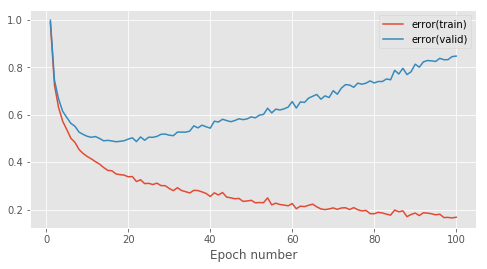

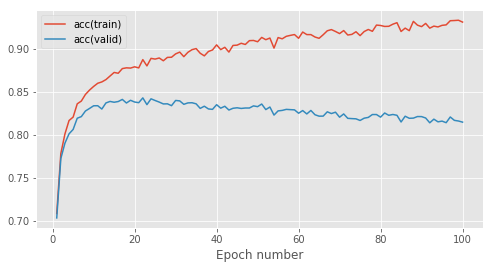

In [19]:
# Baseline ReLu

from mlp.layers import AffineLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/1_error_relu", "../results/1_accuracy_relu", "../results/1_stats_relu.csv", notebook=True)

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 1.9s to complete
    error(train)=3.10e+00, acc(train)=2.68e-01, error(valid)=3.10e+00, acc(valid)=2.67e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 1.7s to complete
    error(train)=2.13e+00, acc(train)=4.60e-01, error(valid)=2.14e+00, acc(valid)=4.55e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 2.0s to complete
    error(train)=1.68e+00, acc(train)=5.53e-01, error(valid)=1.69e+00, acc(valid)=5.50e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 2.1s to complete
    error(train)=1.45e+00, acc(train)=6.02e-01, error(valid)=1.46e+00, acc(valid)=5.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 2.5s to complete
    error(train)=1.30e+00, acc(train)=6.36e-01, error(valid)=1.31e+00, acc(valid)=6.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 1.9s to complete
    error(train)=1.20e+00, acc(train)=6.60e-01, error(valid)=1.21e+00, acc(valid)=6.55e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 2.1s to complete
    error(train)=1.13e+00, acc(train)=6.78e-01, error(valid)=1.14e+00, acc(valid)=6.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 1.7s to complete
    error(train)=1.06e+00, acc(train)=6.93e-01, error(valid)=1.07e+00, acc(valid)=6.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 1.8s to complete
    error(train)=1.00e+00, acc(train)=7.09e-01, error(valid)=1.02e+00, acc(valid)=7.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 1.9s to complete
    error(train)=9.57e-01, acc(train)=7.21e-01, error(valid)=9.71e-01, acc(valid)=7.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 2.4s to complete
    error(train)=9.15e-01, acc(train)=7.32e-01, error(valid)=9.31e-01, acc(valid)=7.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 2.5s to complete
    error(train)=8.77e-01, acc(train)=7.42e-01, error(valid)=8.94e-01, acc(valid)=7.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 2.1s to complete
    error(train)=8.45e-01, acc(train)=7.50e-01, error(valid)=8.64e-01, acc(valid)=7.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 1.6s to complete
    error(train)=8.17e-01, acc(train)=7.57e-01, error(valid)=8.36e-01, acc(valid)=7.50e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 2.3s to complete
    error(train)=7.88e-01, acc(train)=7.64e-01, error(valid)=8.09e-01, acc(valid)=7.58e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 2.3s to complete
    error(train)=7.63e-01, acc(train)=7.71e-01, error(valid)=7.86e-01, acc(valid)=7.65e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 1.9s to complete
    error(train)=7.42e-01, acc(train)=7.77e-01, error(valid)=7.65e-01, acc(valid)=7.70e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 1.9s to complete
    error(train)=7.21e-01, acc(train)=7.82e-01, error(valid)=7.46e-01, acc(valid)=7.76e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 2.1s to complete
    error(train)=7.02e-01, acc(train)=7.87e-01, error(valid)=7.28e-01, acc(valid)=7.81e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 1.8s to complete
    error(train)=6.85e-01, acc(train)=7.91e-01, error(valid)=7.13e-01, acc(valid)=7.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 1.8s to complete
    error(train)=6.74e-01, acc(train)=7.93e-01, error(valid)=7.03e-01, acc(valid)=7.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 1.8s to complete
    error(train)=6.57e-01, acc(train)=7.97e-01, error(valid)=6.87e-01, acc(valid)=7.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 1.7s to complete
    error(train)=6.43e-01, acc(train)=8.01e-01, error(valid)=6.75e-01, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 1.7s to complete
    error(train)=6.30e-01, acc(train)=8.05e-01, error(valid)=6.65e-01, acc(valid)=7.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 1.7s to complete
    error(train)=6.22e-01, acc(train)=8.08e-01, error(valid)=6.58e-01, acc(valid)=7.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 1.7s to complete
    error(train)=6.08e-01, acc(train)=8.11e-01, error(valid)=6.44e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 1.8s to complete
    error(train)=6.00e-01, acc(train)=8.13e-01, error(valid)=6.39e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 1.8s to complete
    error(train)=5.88e-01, acc(train)=8.16e-01, error(valid)=6.28e-01, acc(valid)=8.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 1.9s to complete
    error(train)=5.81e-01, acc(train)=8.18e-01, error(valid)=6.22e-01, acc(valid)=8.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 1.8s to complete
    error(train)=5.73e-01, acc(train)=8.19e-01, error(valid)=6.16e-01, acc(valid)=8.07e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 1.8s to complete
    error(train)=5.64e-01, acc(train)=8.21e-01, error(valid)=6.07e-01, acc(valid)=8.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 1.7s to complete
    error(train)=5.56e-01, acc(train)=8.23e-01, error(valid)=6.03e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 1.8s to complete
    error(train)=5.50e-01, acc(train)=8.26e-01, error(valid)=5.97e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 1.8s to complete
    error(train)=5.44e-01, acc(train)=8.28e-01, error(valid)=5.94e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 1.8s to complete
    error(train)=5.36e-01, acc(train)=8.29e-01, error(valid)=5.88e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 1.8s to complete
    error(train)=5.30e-01, acc(train)=8.30e-01, error(valid)=5.82e-01, acc(valid)=8.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 1.8s to complete
    error(train)=5.24e-01, acc(train)=8.32e-01, error(valid)=5.79e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 1.8s to complete
    error(train)=5.19e-01, acc(train)=8.34e-01, error(valid)=5.74e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 1.8s to complete
    error(train)=5.13e-01, acc(train)=8.36e-01, error(valid)=5.71e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 1.7s to complete
    error(train)=5.07e-01, acc(train)=8.37e-01, error(valid)=5.64e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 2.5s to complete
    error(train)=5.03e-01, acc(train)=8.37e-01, error(valid)=5.64e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 1.8s to complete
    error(train)=4.97e-01, acc(train)=8.39e-01, error(valid)=5.59e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 1.8s to complete
    error(train)=4.93e-01, acc(train)=8.41e-01, error(valid)=5.56e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 1.7s to complete
    error(train)=4.88e-01, acc(train)=8.43e-01, error(valid)=5.53e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 1.9s to complete
    error(train)=4.84e-01, acc(train)=8.44e-01, error(valid)=5.50e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 1.8s to complete
    error(train)=4.80e-01, acc(train)=8.44e-01, error(valid)=5.47e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 1.8s to complete
    error(train)=4.76e-01, acc(train)=8.45e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 1.8s to complete
    error(train)=4.74e-01, acc(train)=8.46e-01, error(valid)=5.45e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 1.8s to complete
    error(train)=4.71e-01, acc(train)=8.45e-01, error(valid)=5.43e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 1.8s to complete
    error(train)=4.66e-01, acc(train)=8.48e-01, error(valid)=5.40e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 1.8s to complete
    error(train)=4.61e-01, acc(train)=8.49e-01, error(valid)=5.37e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 1.8s to complete
    error(train)=4.58e-01, acc(train)=8.51e-01, error(valid)=5.35e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 1.8s to complete
    error(train)=4.55e-01, acc(train)=8.51e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 1.8s to complete
    error(train)=4.52e-01, acc(train)=8.53e-01, error(valid)=5.33e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 1.8s to complete
    error(train)=4.47e-01, acc(train)=8.54e-01, error(valid)=5.29e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 1.8s to complete
    error(train)=4.46e-01, acc(train)=8.53e-01, error(valid)=5.30e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 1.7s to complete
    error(train)=4.42e-01, acc(train)=8.55e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 1.7s to complete
    error(train)=4.39e-01, acc(train)=8.56e-01, error(valid)=5.24e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 1.7s to complete
    error(train)=4.39e-01, acc(train)=8.56e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 1.6s to complete
    error(train)=4.32e-01, acc(train)=8.57e-01, error(valid)=5.22e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 1.7s to complete
    error(train)=4.31e-01, acc(train)=8.58e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 1.7s to complete
    error(train)=4.28e-01, acc(train)=8.58e-01, error(valid)=5.21e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 1.7s to complete
    error(train)=4.26e-01, acc(train)=8.59e-01, error(valid)=5.19e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 1.7s to complete
    error(train)=4.24e-01, acc(train)=8.60e-01, error(valid)=5.18e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 1.7s to complete
    error(train)=4.21e-01, acc(train)=8.61e-01, error(valid)=5.15e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 1.7s to complete
    error(train)=4.18e-01, acc(train)=8.62e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 1.8s to complete
    error(train)=4.17e-01, acc(train)=8.62e-01, error(valid)=5.15e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 1.7s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 1.7s to complete
    error(train)=4.15e-01, acc(train)=8.61e-01, error(valid)=5.18e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 1.8s to complete
    error(train)=4.08e-01, acc(train)=8.64e-01, error(valid)=5.10e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 1.8s to complete
    error(train)=4.10e-01, acc(train)=8.63e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 1.8s to complete
    error(train)=4.06e-01, acc(train)=8.64e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 1.8s to complete
    error(train)=4.04e-01, acc(train)=8.65e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 1.8s to complete
    error(train)=4.02e-01, acc(train)=8.66e-01, error(valid)=5.11e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 1.8s to complete
    error(train)=3.99e-01, acc(train)=8.66e-01, error(valid)=5.10e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 1.8s to complete
    error(train)=3.96e-01, acc(train)=8.68e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 1.8s to complete
    error(train)=3.95e-01, acc(train)=8.68e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 1.8s to complete
    error(train)=3.95e-01, acc(train)=8.68e-01, error(valid)=5.09e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 1.8s to complete
    error(train)=3.90e-01, acc(train)=8.70e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 1.8s to complete
    error(train)=3.88e-01, acc(train)=8.70e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 2.0s to complete
    error(train)=3.86e-01, acc(train)=8.71e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 1.8s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=5.08e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 1.8s to complete
    error(train)=3.82e-01, acc(train)=8.72e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 1.8s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 1.8s to complete
    error(train)=3.79e-01, acc(train)=8.73e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 1.8s to complete
    error(train)=3.77e-01, acc(train)=8.74e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 1.8s to complete
    error(train)=3.75e-01, acc(train)=8.74e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 1.8s to complete
    error(train)=3.75e-01, acc(train)=8.75e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 1.8s to complete
    error(train)=3.74e-01, acc(train)=8.74e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 1.9s to complete
    error(train)=3.72e-01, acc(train)=8.75e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 1.8s to complete
    error(train)=3.68e-01, acc(train)=8.76e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 1.8s to complete
    error(train)=3.70e-01, acc(train)=8.75e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 1.8s to complete
    error(train)=3.68e-01, acc(train)=8.76e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 1.8s to complete
    error(train)=3.67e-01, acc(train)=8.77e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 1.8s to complete
    error(train)=3.64e-01, acc(train)=8.76e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 1.8s to complete
    error(train)=3.63e-01, acc(train)=8.78e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 1.8s to complete
    error(train)=3.61e-01, acc(train)=8.79e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 1.8s to complete
    error(train)=3.60e-01, acc(train)=8.78e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 2.7s to complete
    error(train)=3.61e-01, acc(train)=8.78e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 2.7s to complete
    error(train)=3.55e-01, acc(train)=8.81e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


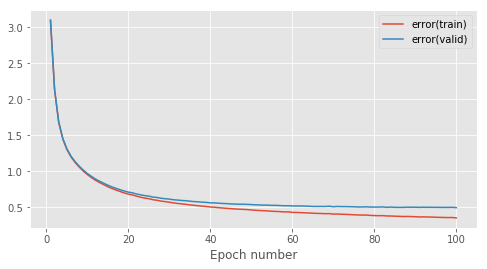

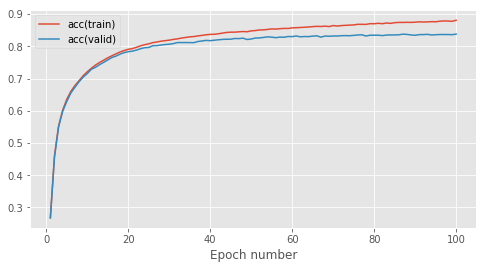

In [20]:
# Baseline Sigmoid

from mlp.layers import AffineLayer, SigmoidLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/2_error_sigmoid", "../results/2_accuracy_sigmoid", "../results/2_stats_sigmoid.csv", notebook=True)

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 2.8s to complete
    error(train)=9.40e-01, acc(train)=7.27e-01, error(valid)=9.50e-01, acc(valid)=7.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 2.5s to complete
    error(train)=7.30e-01, acc(train)=7.73e-01, error(valid)=7.48e-01, acc(valid)=7.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 2.0s to complete
    error(train)=6.29e-01, acc(train)=8.03e-01, error(valid)=6.54e-01, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 1.8s to complete
    error(train)=5.60e-01, acc(train)=8.23e-01, error(valid)=6.02e-01, acc(valid)=8.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 3.0s to complete
    error(train)=5.25e-01, acc(train)=8.30e-01, error(valid)=5.73e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 2.2s to complete
    error(train)=5.14e-01, acc(train)=8.31e-01, error(valid)=5.67e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 2.2s to complete
    error(train)=4.63e-01, acc(train)=8.48e-01, error(valid)=5.30e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 1.8s to complete
    error(train)=4.47e-01, acc(train)=8.49e-01, error(valid)=5.21e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 2.3s to complete
    error(train)=4.38e-01, acc(train)=8.53e-01, error(valid)=5.19e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 2.2s to complete
    error(train)=4.16e-01, acc(train)=8.58e-01, error(valid)=5.04e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 1.8s to complete
    error(train)=4.11e-01, acc(train)=8.60e-01, error(valid)=5.07e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 1.9s to complete
    error(train)=3.95e-01, acc(train)=8.64e-01, error(valid)=4.99e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 2.0s to complete
    error(train)=3.87e-01, acc(train)=8.66e-01, error(valid)=4.97e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 1.6s to complete
    error(train)=3.82e-01, acc(train)=8.66e-01, error(valid)=4.98e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 2.2s to complete
    error(train)=3.67e-01, acc(train)=8.71e-01, error(valid)=4.93e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 2.0s to complete
    error(train)=3.64e-01, acc(train)=8.73e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 1.9s to complete
    error(train)=3.63e-01, acc(train)=8.70e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 2.4s to complete
    error(train)=3.49e-01, acc(train)=8.78e-01, error(valid)=4.94e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 2.1s to complete
    error(train)=3.46e-01, acc(train)=8.76e-01, error(valid)=4.96e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 2.2s to complete
    error(train)=3.41e-01, acc(train)=8.77e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 1.7s to complete
    error(train)=3.36e-01, acc(train)=8.81e-01, error(valid)=4.98e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 1.7s to complete
    error(train)=3.15e-01, acc(train)=8.88e-01, error(valid)=4.79e-01, acc(valid)=8.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 1.8s to complete
    error(train)=3.19e-01, acc(train)=8.84e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 1.8s to complete
    error(train)=3.19e-01, acc(train)=8.84e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 2.2s to complete
    error(train)=3.02e-01, acc(train)=8.91e-01, error(valid)=4.91e-01, acc(valid)=8.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 1.8s to complete
    error(train)=3.04e-01, acc(train)=8.90e-01, error(valid)=4.99e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 1.8s to complete
    error(train)=3.03e-01, acc(train)=8.89e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 1.7s to complete
    error(train)=3.00e-01, acc(train)=8.91e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 2.1s to complete
    error(train)=2.94e-01, acc(train)=8.92e-01, error(valid)=5.12e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 1.9s to complete
    error(train)=3.01e-01, acc(train)=8.89e-01, error(valid)=5.20e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 2.0s to complete
    error(train)=2.83e-01, acc(train)=8.95e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 1.9s to complete
    error(train)=2.72e-01, acc(train)=9.01e-01, error(valid)=4.99e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 2.2s to complete
    error(train)=2.80e-01, acc(train)=8.96e-01, error(valid)=5.11e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 1.8s to complete
    error(train)=2.82e-01, acc(train)=8.94e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 1.9s to complete
    error(train)=2.70e-01, acc(train)=8.99e-01, error(valid)=5.28e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 2.0s to complete
    error(train)=2.73e-01, acc(train)=8.98e-01, error(valid)=5.33e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 2.5s to complete
    error(train)=2.65e-01, acc(train)=9.01e-01, error(valid)=5.30e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 1.8s to complete
    error(train)=2.63e-01, acc(train)=9.01e-01, error(valid)=5.35e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 2.0s to complete
    error(train)=2.63e-01, acc(train)=9.01e-01, error(valid)=5.37e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 2.4s to complete
    error(train)=2.64e-01, acc(train)=9.01e-01, error(valid)=5.44e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 2.1s to complete
    error(train)=2.56e-01, acc(train)=9.03e-01, error(valid)=5.43e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 1.8s to complete
    error(train)=2.42e-01, acc(train)=9.10e-01, error(valid)=5.37e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 2.2s to complete
    error(train)=2.47e-01, acc(train)=9.07e-01, error(valid)=5.46e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 2.1s to complete
    error(train)=2.43e-01, acc(train)=9.09e-01, error(valid)=5.49e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 2.0s to complete
    error(train)=2.45e-01, acc(train)=9.07e-01, error(valid)=5.53e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 2.5s to complete
    error(train)=2.33e-01, acc(train)=9.13e-01, error(valid)=5.49e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 2.1s to complete
    error(train)=2.37e-01, acc(train)=9.09e-01, error(valid)=5.62e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 1.9s to complete
    error(train)=2.31e-01, acc(train)=9.10e-01, error(valid)=5.66e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 2.3s to complete
    error(train)=2.32e-01, acc(train)=9.12e-01, error(valid)=5.64e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 2.4s to complete
    error(train)=2.27e-01, acc(train)=9.13e-01, error(valid)=5.72e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 2.8s to complete
    error(train)=2.36e-01, acc(train)=9.09e-01, error(valid)=5.82e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 1.7s to complete
    error(train)=2.22e-01, acc(train)=9.14e-01, error(valid)=5.72e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 2.8s to complete
    error(train)=2.27e-01, acc(train)=9.13e-01, error(valid)=5.90e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 2.6s to complete
    error(train)=2.31e-01, acc(train)=9.10e-01, error(valid)=6.02e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 1.6s to complete
    error(train)=2.28e-01, acc(train)=9.11e-01, error(valid)=6.00e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 1.5s to complete
    error(train)=2.30e-01, acc(train)=9.11e-01, error(valid)=6.08e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 1.5s to complete
    error(train)=2.29e-01, acc(train)=9.10e-01, error(valid)=6.15e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 1.5s to complete
    error(train)=2.15e-01, acc(train)=9.17e-01, error(valid)=6.12e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 1.6s to complete
    error(train)=2.16e-01, acc(train)=9.16e-01, error(valid)=6.17e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 2.7s to complete
    error(train)=2.16e-01, acc(train)=9.16e-01, error(valid)=6.16e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 2.0s to complete
    error(train)=2.10e-01, acc(train)=9.17e-01, error(valid)=6.16e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 2.0s to complete
    error(train)=2.05e-01, acc(train)=9.21e-01, error(valid)=6.17e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 2.0s to complete
    error(train)=2.06e-01, acc(train)=9.19e-01, error(valid)=6.21e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 2.2s to complete
    error(train)=2.12e-01, acc(train)=9.18e-01, error(valid)=6.37e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 2.2s to complete
    error(train)=1.93e-01, acc(train)=9.25e-01, error(valid)=6.26e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 1.5s to complete
    error(train)=2.05e-01, acc(train)=9.19e-01, error(valid)=6.45e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 1.5s to complete
    error(train)=2.13e-01, acc(train)=9.17e-01, error(valid)=6.70e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 1.5s to complete
    error(train)=2.03e-01, acc(train)=9.21e-01, error(valid)=6.60e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 1.5s to complete
    error(train)=2.07e-01, acc(train)=9.19e-01, error(valid)=6.74e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 1.5s to complete
    error(train)=1.93e-01, acc(train)=9.24e-01, error(valid)=6.60e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 1.5s to complete
    error(train)=1.97e-01, acc(train)=9.22e-01, error(valid)=6.67e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 1.5s to complete
    error(train)=1.87e-01, acc(train)=9.27e-01, error(valid)=6.60e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 1.5s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=6.91e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 1.5s to complete
    error(train)=2.03e-01, acc(train)=9.21e-01, error(valid)=6.91e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 1.5s to complete
    error(train)=1.90e-01, acc(train)=9.25e-01, error(valid)=6.88e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 1.5s to complete
    error(train)=1.97e-01, acc(train)=9.22e-01, error(valid)=7.05e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 1.5s to complete
    error(train)=1.93e-01, acc(train)=9.23e-01, error(valid)=7.02e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 1.5s to complete
    error(train)=1.87e-01, acc(train)=9.26e-01, error(valid)=6.99e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 1.5s to complete
    error(train)=1.98e-01, acc(train)=9.20e-01, error(valid)=7.17e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 1.5s to complete
    error(train)=1.86e-01, acc(train)=9.26e-01, error(valid)=7.17e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 1.5s to complete
    error(train)=1.72e-01, acc(train)=9.32e-01, error(valid)=7.05e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 1.5s to complete
    error(train)=1.86e-01, acc(train)=9.25e-01, error(valid)=7.38e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 2.0s to complete
    error(train)=1.81e-01, acc(train)=9.28e-01, error(valid)=7.26e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 2.4s to complete
    error(train)=1.80e-01, acc(train)=9.28e-01, error(valid)=7.35e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 2.7s to complete
    error(train)=2.03e-01, acc(train)=9.18e-01, error(valid)=7.67e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 2.4s to complete
    error(train)=1.80e-01, acc(train)=9.29e-01, error(valid)=7.42e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 2.4s to complete
    error(train)=1.75e-01, acc(train)=9.32e-01, error(valid)=7.46e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 2.0s to complete
    error(train)=1.70e-01, acc(train)=9.32e-01, error(valid)=7.50e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 2.7s to complete
    error(train)=1.79e-01, acc(train)=9.26e-01, error(valid)=7.67e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 1.8s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=7.66e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 2.4s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=7.85e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 2.4s to complete
    error(train)=1.74e-01, acc(train)=9.30e-01, error(valid)=7.76e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 2.1s to complete
    error(train)=1.75e-01, acc(train)=9.29e-01, error(valid)=7.72e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 1.9s to complete
    error(train)=1.64e-01, acc(train)=9.36e-01, error(valid)=7.83e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 2.1s to complete
    error(train)=1.78e-01, acc(train)=9.27e-01, error(valid)=8.03e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 2.4s to complete
    error(train)=1.72e-01, acc(train)=9.30e-01, error(valid)=8.14e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 1.9s to complete
    error(train)=1.67e-01, acc(train)=9.33e-01, error(valid)=7.99e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 2.4s to complete
    error(train)=1.65e-01, acc(train)=9.33e-01, error(valid)=8.04e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 2.0s to complete
    error(train)=1.62e-01, acc(train)=9.34e-01, error(valid)=8.07e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 2.7s to complete
    error(train)=1.62e-01, acc(train)=9.36e-01, error(valid)=8.06e-01, acc(valid)=8.23e-01


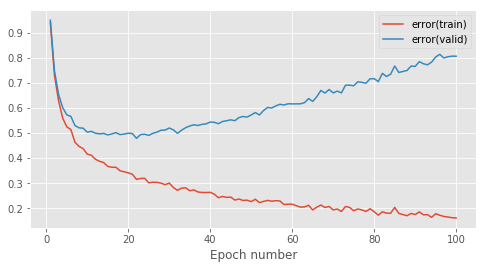

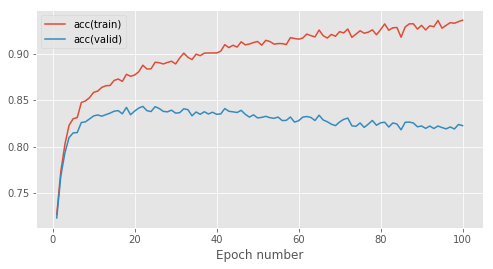

In [21]:
# LeakyReLu
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/3_error_LeakyReLu", "../results/3_accuracy_LeakyRelu", "../results/3_stats_LeakyReLu.csv", notebook=True)

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 3.6s to complete
    error(train)=9.80e-01, acc(train)=7.12e-01, error(valid)=9.91e-01, acc(valid)=7.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 2.7s to complete
    error(train)=7.60e-01, acc(train)=7.69e-01, error(valid)=7.79e-01, acc(valid)=7.65e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 3.2s to complete
    error(train)=6.47e-01, acc(train)=7.96e-01, error(valid)=6.76e-01, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 3.3s to complete
    error(train)=5.86e-01, acc(train)=8.14e-01, error(valid)=6.19e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 2.9s to complete
    error(train)=5.38e-01, acc(train)=8.27e-01, error(valid)=5.77e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 3.1s to complete
    error(train)=5.12e-01, acc(train)=8.33e-01, error(valid)=5.57e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 2.5s to complete
    error(train)=4.88e-01, acc(train)=8.39e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 2.6s to complete
    error(train)=4.63e-01, acc(train)=8.46e-01, error(valid)=5.27e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 3.0s to complete
    error(train)=4.44e-01, acc(train)=8.52e-01, error(valid)=5.20e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 2.8s to complete
    error(train)=4.31e-01, acc(train)=8.51e-01, error(valid)=5.09e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 2.8s to complete
    error(train)=4.09e-01, acc(train)=8.62e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 2.7s to complete
    error(train)=4.04e-01, acc(train)=8.62e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 2.5s to complete
    error(train)=3.90e-01, acc(train)=8.65e-01, error(valid)=4.92e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 2.7s to complete
    error(train)=3.94e-01, acc(train)=8.62e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 2.5s to complete
    error(train)=3.75e-01, acc(train)=8.69e-01, error(valid)=4.87e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 2.8s to complete
    error(train)=3.70e-01, acc(train)=8.70e-01, error(valid)=4.92e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 3.5s to complete
    error(train)=3.63e-01, acc(train)=8.73e-01, error(valid)=4.92e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 2.4s to complete
    error(train)=3.68e-01, acc(train)=8.70e-01, error(valid)=5.00e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 2.7s to complete
    error(train)=3.42e-01, acc(train)=8.79e-01, error(valid)=4.82e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 2.1s to complete
    error(train)=3.32e-01, acc(train)=8.83e-01, error(valid)=4.81e-01, acc(valid)=8.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 2.6s to complete
    error(train)=3.27e-01, acc(train)=8.83e-01, error(valid)=4.80e-01, acc(valid)=8.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 2.4s to complete
    error(train)=3.27e-01, acc(train)=8.83e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 2.4s to complete
    error(train)=3.27e-01, acc(train)=8.83e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 3.2s to complete
    error(train)=3.16e-01, acc(train)=8.86e-01, error(valid)=4.84e-01, acc(valid)=8.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 2.0s to complete
    error(train)=3.06e-01, acc(train)=8.89e-01, error(valid)=4.81e-01, acc(valid)=8.47e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 2.0s to complete
    error(train)=3.06e-01, acc(train)=8.89e-01, error(valid)=4.88e-01, acc(valid)=8.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 2.0s to complete
    error(train)=3.05e-01, acc(train)=8.87e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 3.2s to complete
    error(train)=2.96e-01, acc(train)=8.93e-01, error(valid)=4.94e-01, acc(valid)=8.47e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 3.6s to complete
    error(train)=2.94e-01, acc(train)=8.93e-01, error(valid)=4.99e-01, acc(valid)=8.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 3.3s to complete
    error(train)=2.88e-01, acc(train)=8.97e-01, error(valid)=4.93e-01, acc(valid)=8.45e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 3.5s to complete
    error(train)=2.83e-01, acc(train)=8.98e-01, error(valid)=5.02e-01, acc(valid)=8.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 2.5s to complete
    error(train)=2.85e-01, acc(train)=8.94e-01, error(valid)=5.09e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 2.1s to complete
    error(train)=2.90e-01, acc(train)=8.91e-01, error(valid)=5.23e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 2.3s to complete
    error(train)=2.73e-01, acc(train)=9.00e-01, error(valid)=5.08e-01, acc(valid)=8.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 2.5s to complete
    error(train)=2.75e-01, acc(train)=8.99e-01, error(valid)=5.19e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 3.1s to complete
    error(train)=2.69e-01, acc(train)=9.00e-01, error(valid)=5.12e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 3.0s to complete
    error(train)=2.59e-01, acc(train)=9.02e-01, error(valid)=5.10e-01, acc(valid)=8.45e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 2.0s to complete
    error(train)=2.62e-01, acc(train)=9.03e-01, error(valid)=5.18e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 2.6s to complete
    error(train)=2.61e-01, acc(train)=9.02e-01, error(valid)=5.28e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 2.5s to complete
    error(train)=2.59e-01, acc(train)=9.01e-01, error(valid)=5.31e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 3.4s to complete
    error(train)=2.68e-01, acc(train)=9.02e-01, error(valid)=5.48e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 3.8s to complete
    error(train)=2.50e-01, acc(train)=9.05e-01, error(valid)=5.38e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 3.6s to complete
    error(train)=2.53e-01, acc(train)=9.04e-01, error(valid)=5.42e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 2.9s to complete
    error(train)=2.43e-01, acc(train)=9.08e-01, error(valid)=5.45e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 2.6s to complete
    error(train)=2.42e-01, acc(train)=9.10e-01, error(valid)=5.41e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 3.2s to complete
    error(train)=2.40e-01, acc(train)=9.09e-01, error(valid)=5.49e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 3.2s to complete
    error(train)=2.44e-01, acc(train)=9.06e-01, error(valid)=5.50e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 2.8s to complete
    error(train)=2.31e-01, acc(train)=9.13e-01, error(valid)=5.47e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 2.7s to complete
    error(train)=2.42e-01, acc(train)=9.08e-01, error(valid)=5.70e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 2.8s to complete
    error(train)=2.29e-01, acc(train)=9.13e-01, error(valid)=5.67e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 2.7s to complete
    error(train)=2.27e-01, acc(train)=9.12e-01, error(valid)=5.64e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 4.2s to complete
    error(train)=2.22e-01, acc(train)=9.16e-01, error(valid)=5.65e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 3.1s to complete
    error(train)=2.27e-01, acc(train)=9.13e-01, error(valid)=5.77e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 3.8s to complete
    error(train)=2.26e-01, acc(train)=9.12e-01, error(valid)=5.80e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 3.0s to complete
    error(train)=2.19e-01, acc(train)=9.16e-01, error(valid)=5.79e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 3.6s to complete
    error(train)=2.23e-01, acc(train)=9.14e-01, error(valid)=5.96e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 2.7s to complete
    error(train)=2.31e-01, acc(train)=9.11e-01, error(valid)=6.14e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 2.9s to complete
    error(train)=2.23e-01, acc(train)=9.12e-01, error(valid)=6.07e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 2.9s to complete
    error(train)=2.15e-01, acc(train)=9.16e-01, error(valid)=6.03e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 3.0s to complete
    error(train)=2.12e-01, acc(train)=9.18e-01, error(valid)=6.09e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 2.6s to complete
    error(train)=2.08e-01, acc(train)=9.20e-01, error(valid)=6.11e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 3.0s to complete
    error(train)=2.08e-01, acc(train)=9.19e-01, error(valid)=6.14e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 3.1s to complete
    error(train)=2.04e-01, acc(train)=9.21e-01, error(valid)=6.20e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 2.7s to complete
    error(train)=2.04e-01, acc(train)=9.19e-01, error(valid)=6.27e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 3.0s to complete
    error(train)=2.05e-01, acc(train)=9.19e-01, error(valid)=6.35e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 2.7s to complete
    error(train)=1.93e-01, acc(train)=9.25e-01, error(valid)=6.30e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 2.7s to complete
    error(train)=2.06e-01, acc(train)=9.19e-01, error(valid)=6.46e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 2.9s to complete
    error(train)=2.00e-01, acc(train)=9.21e-01, error(valid)=6.41e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 3.1s to complete
    error(train)=2.00e-01, acc(train)=9.21e-01, error(valid)=6.52e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 3.0s to complete
    error(train)=1.99e-01, acc(train)=9.22e-01, error(valid)=6.61e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 3.1s to complete
    error(train)=1.90e-01, acc(train)=9.25e-01, error(valid)=6.55e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 3.0s to complete
    error(train)=1.96e-01, acc(train)=9.23e-01, error(valid)=6.76e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 3.0s to complete
    error(train)=1.86e-01, acc(train)=9.27e-01, error(valid)=6.63e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 2.6s to complete
    error(train)=1.97e-01, acc(train)=9.21e-01, error(valid)=6.86e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 2.8s to complete
    error(train)=1.82e-01, acc(train)=9.28e-01, error(valid)=6.74e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 3.0s to complete
    error(train)=1.81e-01, acc(train)=9.28e-01, error(valid)=6.84e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 2.6s to complete
    error(train)=1.84e-01, acc(train)=9.28e-01, error(valid)=6.90e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 4.0s to complete
    error(train)=1.81e-01, acc(train)=9.28e-01, error(valid)=6.97e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 2.7s to complete
    error(train)=1.79e-01, acc(train)=9.30e-01, error(valid)=6.92e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 3.2s to complete
    error(train)=1.79e-01, acc(train)=9.30e-01, error(valid)=7.02e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 2.6s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=7.12e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 2.4s to complete
    error(train)=1.82e-01, acc(train)=9.28e-01, error(valid)=7.16e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 2.6s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=7.24e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 2.4s to complete
    error(train)=1.74e-01, acc(train)=9.31e-01, error(valid)=7.34e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 2.4s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=7.31e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 2.6s to complete
    error(train)=1.64e-01, acc(train)=9.35e-01, error(valid)=7.33e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 3.1s to complete
    error(train)=1.76e-01, acc(train)=9.29e-01, error(valid)=7.55e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 4.0s to complete
    error(train)=1.69e-01, acc(train)=9.32e-01, error(valid)=7.55e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 2.0s to complete
    error(train)=1.73e-01, acc(train)=9.32e-01, error(valid)=7.56e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 2.0s to complete
    error(train)=1.62e-01, acc(train)=9.36e-01, error(valid)=7.52e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 2.0s to complete
    error(train)=1.62e-01, acc(train)=9.35e-01, error(valid)=7.60e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 2.0s to complete
    error(train)=1.65e-01, acc(train)=9.33e-01, error(valid)=7.74e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 2.1s to complete
    error(train)=1.67e-01, acc(train)=9.34e-01, error(valid)=7.92e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 2.0s to complete
    error(train)=1.64e-01, acc(train)=9.34e-01, error(valid)=7.89e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 2.0s to complete
    error(train)=1.66e-01, acc(train)=9.33e-01, error(valid)=7.97e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 2.8s to complete
    error(train)=1.56e-01, acc(train)=9.37e-01, error(valid)=7.98e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 3.3s to complete
    error(train)=1.67e-01, acc(train)=9.31e-01, error(valid)=8.17e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 2.2s to complete
    error(train)=1.66e-01, acc(train)=9.32e-01, error(valid)=8.26e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 3.4s to complete
    error(train)=1.61e-01, acc(train)=9.34e-01, error(valid)=8.21e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 3.0s to complete
    error(train)=1.56e-01, acc(train)=9.37e-01, error(valid)=8.15e-01, acc(valid)=8.23e-01


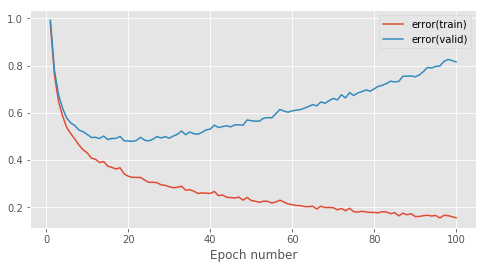

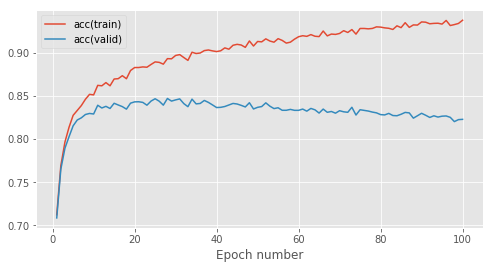

In [22]:
# ELULayer


from mlp.layers import AffineLayer, ELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ELULayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ELULayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/4_error_ELULayer", "../results/4_accuracy_ELULayer", "../results/4_stats_ELULayer.csv", notebook=True)

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 2.6s to complete
    error(train)=9.70e-01, acc(train)=7.22e-01, error(valid)=9.93e-01, acc(valid)=7.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 2.5s to complete
    error(train)=7.53e-01, acc(train)=7.69e-01, error(valid)=7.82e-01, acc(valid)=7.59e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 2.1s to complete
    error(train)=6.47e-01, acc(train)=7.99e-01, error(valid)=6.82e-01, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 2.1s to complete
    error(train)=5.91e-01, acc(train)=8.13e-01, error(valid)=6.35e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 2.7s to complete
    error(train)=5.33e-01, acc(train)=8.29e-01, error(valid)=5.87e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 2.3s to complete
    error(train)=5.23e-01, acc(train)=8.25e-01, error(valid)=5.82e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 2.5s to complete
    error(train)=5.01e-01, acc(train)=8.29e-01, error(valid)=5.69e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 3.4s to complete
    error(train)=4.65e-01, acc(train)=8.43e-01, error(valid)=5.44e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 2.8s to complete
    error(train)=4.68e-01, acc(train)=8.46e-01, error(valid)=5.57e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 2.3s to complete
    error(train)=4.41e-01, acc(train)=8.47e-01, error(valid)=5.34e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 2.4s to complete
    error(train)=4.17e-01, acc(train)=8.55e-01, error(valid)=5.19e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 2.1s to complete
    error(train)=4.09e-01, acc(train)=8.60e-01, error(valid)=5.20e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 2.4s to complete
    error(train)=4.02e-01, acc(train)=8.63e-01, error(valid)=5.21e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 2.1s to complete
    error(train)=3.80e-01, acc(train)=8.70e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 2.1s to complete
    error(train)=3.78e-01, acc(train)=8.66e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 2.1s to complete
    error(train)=3.68e-01, acc(train)=8.70e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 2.1s to complete
    error(train)=3.62e-01, acc(train)=8.74e-01, error(valid)=5.06e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 2.1s to complete
    error(train)=3.53e-01, acc(train)=8.76e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 2.0s to complete
    error(train)=3.53e-01, acc(train)=8.74e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 2.0s to complete
    error(train)=3.36e-01, acc(train)=8.81e-01, error(valid)=4.97e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 2.0s to complete
    error(train)=3.33e-01, acc(train)=8.83e-01, error(valid)=5.01e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 2.0s to complete
    error(train)=3.26e-01, acc(train)=8.83e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 2.0s to complete
    error(train)=3.31e-01, acc(train)=8.78e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 2.0s to complete
    error(train)=3.24e-01, acc(train)=8.84e-01, error(valid)=5.15e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 2.1s to complete
    error(train)=3.20e-01, acc(train)=8.84e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 2.0s to complete
    error(train)=3.14e-01, acc(train)=8.85e-01, error(valid)=5.15e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 2.0s to complete
    error(train)=3.01e-01, acc(train)=8.91e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 2.0s to complete
    error(train)=3.02e-01, acc(train)=8.89e-01, error(valid)=5.18e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 2.0s to complete
    error(train)=3.03e-01, acc(train)=8.85e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 2.1s to complete
    error(train)=2.95e-01, acc(train)=8.92e-01, error(valid)=5.24e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 2.0s to complete
    error(train)=3.00e-01, acc(train)=8.88e-01, error(valid)=5.31e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 2.0s to complete
    error(train)=2.91e-01, acc(train)=8.92e-01, error(valid)=5.31e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 2.0s to complete
    error(train)=2.81e-01, acc(train)=8.96e-01, error(valid)=5.24e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 2.0s to complete
    error(train)=2.83e-01, acc(train)=8.94e-01, error(valid)=5.38e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 2.0s to complete
    error(train)=2.82e-01, acc(train)=8.95e-01, error(valid)=5.40e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 2.0s to complete
    error(train)=2.93e-01, acc(train)=8.92e-01, error(valid)=5.51e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 2.3s to complete
    error(train)=2.77e-01, acc(train)=8.95e-01, error(valid)=5.51e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 2.0s to complete
    error(train)=2.70e-01, acc(train)=9.00e-01, error(valid)=5.49e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 2.2s to complete
    error(train)=2.74e-01, acc(train)=8.98e-01, error(valid)=5.59e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 2.0s to complete
    error(train)=2.69e-01, acc(train)=8.99e-01, error(valid)=5.61e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 2.0s to complete
    error(train)=2.66e-01, acc(train)=8.95e-01, error(valid)=5.60e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 2.0s to complete
    error(train)=2.55e-01, acc(train)=9.05e-01, error(valid)=5.61e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 2.0s to complete
    error(train)=2.54e-01, acc(train)=9.04e-01, error(valid)=5.62e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 2.0s to complete
    error(train)=2.49e-01, acc(train)=9.04e-01, error(valid)=5.63e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 2.7s to complete
    error(train)=2.56e-01, acc(train)=9.01e-01, error(valid)=5.83e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 2.1s to complete
    error(train)=2.51e-01, acc(train)=9.04e-01, error(valid)=5.79e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 2.1s to complete
    error(train)=2.59e-01, acc(train)=9.00e-01, error(valid)=5.96e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 2.3s to complete
    error(train)=2.51e-01, acc(train)=9.03e-01, error(valid)=5.98e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 2.1s to complete
    error(train)=2.45e-01, acc(train)=9.04e-01, error(valid)=5.91e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 2.1s to complete
    error(train)=2.35e-01, acc(train)=9.09e-01, error(valid)=5.92e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 2.1s to complete
    error(train)=2.40e-01, acc(train)=9.06e-01, error(valid)=5.92e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 2.0s to complete
    error(train)=2.38e-01, acc(train)=9.06e-01, error(valid)=6.00e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 2.0s to complete
    error(train)=2.34e-01, acc(train)=9.10e-01, error(valid)=6.11e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 2.1s to complete
    error(train)=2.28e-01, acc(train)=9.11e-01, error(valid)=6.10e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 2.0s to complete
    error(train)=2.27e-01, acc(train)=9.13e-01, error(valid)=6.09e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 2.1s to complete
    error(train)=2.33e-01, acc(train)=9.10e-01, error(valid)=6.31e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 2.0s to complete
    error(train)=2.34e-01, acc(train)=9.08e-01, error(valid)=6.26e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 2.0s to complete
    error(train)=2.24e-01, acc(train)=9.12e-01, error(valid)=6.24e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 2.1s to complete
    error(train)=2.36e-01, acc(train)=9.05e-01, error(valid)=6.55e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 2.1s to complete
    error(train)=2.25e-01, acc(train)=9.10e-01, error(valid)=6.40e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 3.6s to complete
    error(train)=2.26e-01, acc(train)=9.11e-01, error(valid)=6.49e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 2.1s to complete
    error(train)=2.18e-01, acc(train)=9.15e-01, error(valid)=6.47e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 2.1s to complete
    error(train)=2.17e-01, acc(train)=9.12e-01, error(valid)=6.60e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 2.1s to complete
    error(train)=2.13e-01, acc(train)=9.16e-01, error(valid)=6.44e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 2.8s to complete
    error(train)=2.22e-01, acc(train)=9.08e-01, error(valid)=6.68e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 2.2s to complete
    error(train)=2.07e-01, acc(train)=9.17e-01, error(valid)=6.62e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 2.1s to complete
    error(train)=2.19e-01, acc(train)=9.13e-01, error(valid)=6.72e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 2.1s to complete
    error(train)=2.14e-01, acc(train)=9.15e-01, error(valid)=6.82e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 3.1s to complete
    error(train)=2.11e-01, acc(train)=9.15e-01, error(valid)=6.89e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 2.7s to complete
    error(train)=2.13e-01, acc(train)=9.15e-01, error(valid)=6.90e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 2.8s to complete
    error(train)=2.16e-01, acc(train)=9.12e-01, error(valid)=7.00e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 2.7s to complete
    error(train)=2.06e-01, acc(train)=9.18e-01, error(valid)=7.06e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 2.8s to complete
    error(train)=2.06e-01, acc(train)=9.17e-01, error(valid)=7.09e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 2.8s to complete
    error(train)=1.89e-01, acc(train)=9.25e-01, error(valid)=6.97e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 2.9s to complete
    error(train)=2.01e-01, acc(train)=9.19e-01, error(valid)=7.14e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 3.6s to complete
    error(train)=2.03e-01, acc(train)=9.18e-01, error(valid)=7.25e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 3.2s to complete
    error(train)=1.97e-01, acc(train)=9.21e-01, error(valid)=7.18e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 2.8s to complete
    error(train)=1.86e-01, acc(train)=9.26e-01, error(valid)=7.20e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 3.7s to complete
    error(train)=1.97e-01, acc(train)=9.20e-01, error(valid)=7.50e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 2.8s to complete
    error(train)=1.94e-01, acc(train)=9.20e-01, error(valid)=7.35e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 2.6s to complete
    error(train)=2.02e-01, acc(train)=9.19e-01, error(valid)=7.47e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 2.6s to complete
    error(train)=1.91e-01, acc(train)=9.23e-01, error(valid)=7.56e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 3.0s to complete
    error(train)=1.82e-01, acc(train)=9.26e-01, error(valid)=7.48e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 2.8s to complete
    error(train)=1.94e-01, acc(train)=9.22e-01, error(valid)=7.65e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 3.0s to complete
    error(train)=1.97e-01, acc(train)=9.21e-01, error(valid)=7.72e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 3.1s to complete
    error(train)=1.97e-01, acc(train)=9.19e-01, error(valid)=7.75e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 3.3s to complete
    error(train)=1.94e-01, acc(train)=9.22e-01, error(valid)=7.73e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 3.0s to complete
    error(train)=1.96e-01, acc(train)=9.20e-01, error(valid)=7.89e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 2.6s to complete
    error(train)=1.84e-01, acc(train)=9.25e-01, error(valid)=7.86e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 3.7s to complete
    error(train)=1.78e-01, acc(train)=9.28e-01, error(valid)=7.92e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 2.7s to complete
    error(train)=1.86e-01, acc(train)=9.23e-01, error(valid)=7.96e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 3.3s to complete
    error(train)=1.83e-01, acc(train)=9.23e-01, error(valid)=8.14e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 2.6s to complete
    error(train)=1.84e-01, acc(train)=9.26e-01, error(valid)=7.98e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 3.5s to complete
    error(train)=1.90e-01, acc(train)=9.22e-01, error(valid)=8.22e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 2.9s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=8.14e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 3.2s to complete
    error(train)=1.76e-01, acc(train)=9.29e-01, error(valid)=8.21e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 3.1s to complete
    error(train)=1.64e-01, acc(train)=9.34e-01, error(valid)=8.19e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 3.0s to complete
    error(train)=1.85e-01, acc(train)=9.23e-01, error(valid)=8.48e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 2.4s to complete
    error(train)=1.73e-01, acc(train)=9.30e-01, error(valid)=8.28e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 2.3s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=8.49e-01, acc(valid)=8.21e-01


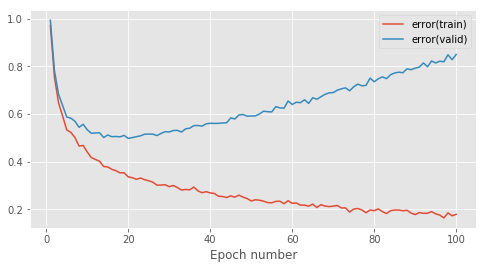

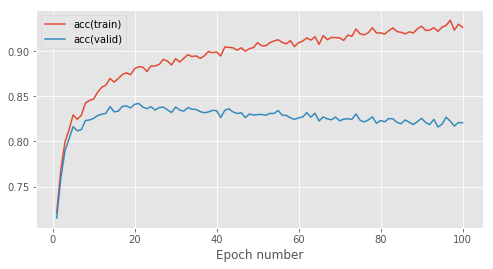

In [23]:
# SELULayer
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/5_error_SELULayer", "../results/5_accuracy_SELULayer", "../results/5_stats_SELULayer.csv", notebook=True)

Network architectures
Initialization strategies

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 2.6s to complete
    error(train)=1.20e+00, acc(train)=6.51e-01, error(valid)=1.20e+00, acc(valid)=6.47e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 2.2s to complete
    error(train)=8.56e-01, acc(train)=7.45e-01, error(valid)=8.66e-01, acc(valid)=7.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 2.1s to complete
    error(train)=7.13e-01, acc(train)=7.78e-01, error(valid)=7.30e-01, acc(valid)=7.74e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 2.7s to complete
    error(train)=6.33e-01, acc(train)=7.98e-01, error(valid)=6.57e-01, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 1.5s to complete
    error(train)=5.77e-01, acc(train)=8.15e-01, error(valid)=6.09e-01, acc(valid)=8.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 1.5s to complete
    error(train)=5.42e-01, acc(train)=8.26e-01, error(valid)=5.87e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 1.5s to complete
    error(train)=5.10e-01, acc(train)=8.31e-01, error(valid)=5.59e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 1.6s to complete
    error(train)=4.92e-01, acc(train)=8.34e-01, error(valid)=5.47e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 1.9s to complete
    error(train)=4.61e-01, acc(train)=8.46e-01, error(valid)=5.20e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 2.1s to complete
    error(train)=4.50e-01, acc(train)=8.48e-01, error(valid)=5.17e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 2.4s to complete
    error(train)=4.46e-01, acc(train)=8.47e-01, error(valid)=5.20e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 2.9s to complete
    error(train)=4.31e-01, acc(train)=8.51e-01, error(valid)=5.13e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 2.5s to complete
    error(train)=4.17e-01, acc(train)=8.57e-01, error(valid)=5.13e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 2.5s to complete
    error(train)=4.11e-01, acc(train)=8.57e-01, error(valid)=5.10e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 2.7s to complete
    error(train)=3.97e-01, acc(train)=8.64e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 2.0s to complete
    error(train)=3.85e-01, acc(train)=8.67e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 2.2s to complete
    error(train)=3.68e-01, acc(train)=8.73e-01, error(valid)=4.88e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 2.5s to complete
    error(train)=3.70e-01, acc(train)=8.65e-01, error(valid)=5.01e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 1.9s to complete
    error(train)=3.69e-01, acc(train)=8.68e-01, error(valid)=4.99e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 2.3s to complete
    error(train)=3.57e-01, acc(train)=8.71e-01, error(valid)=4.93e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 2.4s to complete
    error(train)=3.61e-01, acc(train)=8.71e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 2.6s to complete
    error(train)=3.41e-01, acc(train)=8.80e-01, error(valid)=4.94e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 1.7s to complete
    error(train)=3.35e-01, acc(train)=8.81e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 2.6s to complete
    error(train)=3.30e-01, acc(train)=8.83e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 2.3s to complete
    error(train)=3.25e-01, acc(train)=8.83e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 2.3s to complete
    error(train)=3.22e-01, acc(train)=8.81e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 2.7s to complete
    error(train)=3.15e-01, acc(train)=8.86e-01, error(valid)=4.93e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 2.2s to complete
    error(train)=3.16e-01, acc(train)=8.85e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 2.1s to complete
    error(train)=3.04e-01, acc(train)=8.89e-01, error(valid)=4.96e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 2.5s to complete
    error(train)=2.99e-01, acc(train)=8.89e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 2.2s to complete
    error(train)=2.99e-01, acc(train)=8.90e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 2.4s to complete
    error(train)=2.90e-01, acc(train)=8.93e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 2.6s to complete
    error(train)=2.94e-01, acc(train)=8.93e-01, error(valid)=5.19e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 2.3s to complete
    error(train)=2.91e-01, acc(train)=8.93e-01, error(valid)=5.19e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 2.7s to complete
    error(train)=2.82e-01, acc(train)=8.96e-01, error(valid)=5.16e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 2.4s to complete
    error(train)=2.73e-01, acc(train)=9.00e-01, error(valid)=5.10e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 2.7s to complete
    error(train)=2.90e-01, acc(train)=8.90e-01, error(valid)=5.35e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 2.5s to complete
    error(train)=2.71e-01, acc(train)=8.99e-01, error(valid)=5.23e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 3.0s to complete
    error(train)=2.71e-01, acc(train)=8.99e-01, error(valid)=5.29e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 2.6s to complete
    error(train)=2.81e-01, acc(train)=8.95e-01, error(valid)=5.44e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 2.6s to complete
    error(train)=2.70e-01, acc(train)=8.99e-01, error(valid)=5.42e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 2.5s to complete
    error(train)=2.60e-01, acc(train)=9.03e-01, error(valid)=5.38e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 2.2s to complete
    error(train)=2.66e-01, acc(train)=9.01e-01, error(valid)=5.49e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 2.1s to complete
    error(train)=2.52e-01, acc(train)=9.05e-01, error(valid)=5.41e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 1.9s to complete
    error(train)=2.54e-01, acc(train)=9.04e-01, error(valid)=5.48e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 1.9s to complete
    error(train)=2.64e-01, acc(train)=8.97e-01, error(valid)=5.65e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 2.2s to complete
    error(train)=2.39e-01, acc(train)=9.09e-01, error(valid)=5.44e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 2.2s to complete
    error(train)=2.51e-01, acc(train)=9.04e-01, error(valid)=5.69e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 2.2s to complete
    error(train)=2.39e-01, acc(train)=9.09e-01, error(valid)=5.51e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 2.3s to complete
    error(train)=2.53e-01, acc(train)=9.01e-01, error(valid)=5.76e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 1.5s to complete
    error(train)=2.46e-01, acc(train)=9.03e-01, error(valid)=5.76e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 2.0s to complete
    error(train)=2.43e-01, acc(train)=9.07e-01, error(valid)=5.86e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 1.5s to complete
    error(train)=2.27e-01, acc(train)=9.13e-01, error(valid)=5.70e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 2.3s to complete
    error(train)=2.31e-01, acc(train)=9.12e-01, error(valid)=5.83e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 1.5s to complete
    error(train)=2.26e-01, acc(train)=9.14e-01, error(valid)=5.84e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 1.5s to complete
    error(train)=2.20e-01, acc(train)=9.15e-01, error(valid)=5.81e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 1.6s to complete
    error(train)=2.25e-01, acc(train)=9.14e-01, error(valid)=5.88e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 1.7s to complete
    error(train)=2.31e-01, acc(train)=9.09e-01, error(valid)=6.01e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 2.4s to complete
    error(train)=2.34e-01, acc(train)=9.09e-01, error(valid)=6.02e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 2.2s to complete
    error(train)=2.35e-01, acc(train)=9.09e-01, error(valid)=6.15e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 2.8s to complete
    error(train)=2.11e-01, acc(train)=9.19e-01, error(valid)=6.01e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 3.1s to complete
    error(train)=2.33e-01, acc(train)=9.08e-01, error(valid)=6.30e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 2.2s to complete
    error(train)=2.23e-01, acc(train)=9.13e-01, error(valid)=6.28e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 2.8s to complete
    error(train)=2.24e-01, acc(train)=9.13e-01, error(valid)=6.38e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 2.0s to complete
    error(train)=2.20e-01, acc(train)=9.13e-01, error(valid)=6.41e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 2.8s to complete
    error(train)=2.09e-01, acc(train)=9.18e-01, error(valid)=6.47e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 2.3s to complete
    error(train)=2.33e-01, acc(train)=9.08e-01, error(valid)=6.64e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 1.5s to complete
    error(train)=2.21e-01, acc(train)=9.11e-01, error(valid)=6.66e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 1.5s to complete
    error(train)=2.04e-01, acc(train)=9.20e-01, error(valid)=6.46e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 1.5s to complete
    error(train)=2.18e-01, acc(train)=9.13e-01, error(valid)=6.61e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 2.2s to complete
    error(train)=2.00e-01, acc(train)=9.22e-01, error(valid)=6.46e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 2.5s to complete
    error(train)=2.09e-01, acc(train)=9.19e-01, error(valid)=6.68e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 2.0s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=6.66e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 2.1s to complete
    error(train)=1.96e-01, acc(train)=9.23e-01, error(valid)=6.60e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 1.8s to complete
    error(train)=2.17e-01, acc(train)=9.16e-01, error(valid)=7.03e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 1.7s to complete
    error(train)=2.15e-01, acc(train)=9.15e-01, error(valid)=7.04e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 2.9s to complete
    error(train)=2.00e-01, acc(train)=9.20e-01, error(valid)=6.90e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 2.7s to complete
    error(train)=1.90e-01, acc(train)=9.25e-01, error(valid)=7.01e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 2.8s to complete
    error(train)=1.99e-01, acc(train)=9.21e-01, error(valid)=7.07e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 2.2s to complete
    error(train)=2.03e-01, acc(train)=9.20e-01, error(valid)=7.29e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 2.2s to complete
    error(train)=1.94e-01, acc(train)=9.23e-01, error(valid)=7.10e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 2.9s to complete
    error(train)=1.88e-01, acc(train)=9.25e-01, error(valid)=7.22e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 3.3s to complete
    error(train)=1.99e-01, acc(train)=9.20e-01, error(valid)=7.29e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 2.2s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=7.27e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 3.1s to complete
    error(train)=1.82e-01, acc(train)=9.28e-01, error(valid)=7.24e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 2.4s to complete
    error(train)=1.85e-01, acc(train)=9.28e-01, error(valid)=7.36e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 2.3s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=7.41e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 2.3s to complete
    error(train)=1.70e-01, acc(train)=9.32e-01, error(valid)=7.33e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 2.2s to complete
    error(train)=2.01e-01, acc(train)=9.20e-01, error(valid)=7.75e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 2.7s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=7.60e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 2.6s to complete
    error(train)=1.84e-01, acc(train)=9.27e-01, error(valid)=7.76e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 2.5s to complete
    error(train)=1.80e-01, acc(train)=9.27e-01, error(valid)=7.72e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 3.4s to complete
    error(train)=1.78e-01, acc(train)=9.28e-01, error(valid)=7.78e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 2.6s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=7.74e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 2.5s to complete
    error(train)=1.88e-01, acc(train)=9.23e-01, error(valid)=8.13e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 2.4s to complete
    error(train)=1.79e-01, acc(train)=9.28e-01, error(valid)=7.87e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 2.6s to complete
    error(train)=1.65e-01, acc(train)=9.34e-01, error(valid)=8.00e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 2.1s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=8.09e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 2.4s to complete
    error(train)=1.68e-01, acc(train)=9.33e-01, error(valid)=7.90e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 2.4s to complete
    error(train)=1.73e-01, acc(train)=9.29e-01, error(valid)=8.14e-01, acc(valid)=8.18e-01


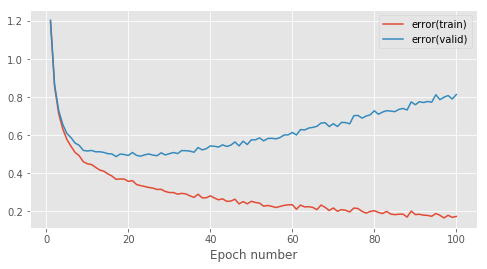

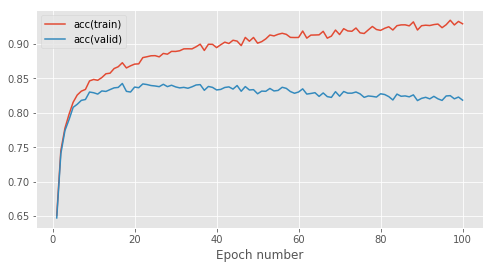

In [24]:
# LeakyReLu, 2 Hidden Layers, Fan-in strategy

from mlp.layers import AffineLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = UniformInit(-np.sqrt(3/input_dim), np.sqrt(3/input_dim),rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/6_error_leaky_relu_2hls_fanin", "../results/6_accuracy_leaky_relu_2hls_fanin", "../results/6_stats_leaky_relu_2hls_fanin.csv", notebook=True)

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 2.4s to complete
    error(train)=9.47e-01, acc(train)=7.18e-01, error(valid)=9.63e-01, acc(valid)=7.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 3.0s to complete
    error(train)=7.54e-01, acc(train)=7.68e-01, error(valid)=7.85e-01, acc(valid)=7.59e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 2.8s to complete
    error(train)=6.87e-01, acc(train)=7.82e-01, error(valid)=7.29e-01, acc(valid)=7.69e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 3.0s to complete
    error(train)=6.22e-01, acc(train)=8.01e-01, error(valid)=6.78e-01, acc(valid)=7.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 2.0s to complete
    error(train)=5.79e-01, acc(train)=8.11e-01, error(valid)=6.44e-01, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 2.3s to complete
    error(train)=5.33e-01, acc(train)=8.26e-01, error(valid)=6.08e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 2.2s to complete
    error(train)=5.14e-01, acc(train)=8.30e-01, error(valid)=5.95e-01, acc(valid)=8.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 2.6s to complete
    error(train)=4.93e-01, acc(train)=8.36e-01, error(valid)=5.76e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 2.1s to complete
    error(train)=4.77e-01, acc(train)=8.41e-01, error(valid)=5.74e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 2.4s to complete
    error(train)=4.63e-01, acc(train)=8.44e-01, error(valid)=5.67e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 2.5s to complete
    error(train)=4.45e-01, acc(train)=8.48e-01, error(valid)=5.55e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 2.8s to complete
    error(train)=4.41e-01, acc(train)=8.50e-01, error(valid)=5.59e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 2.9s to complete
    error(train)=4.21e-01, acc(train)=8.56e-01, error(valid)=5.38e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 2.8s to complete
    error(train)=4.08e-01, acc(train)=8.61e-01, error(valid)=5.44e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 2.1s to complete
    error(train)=4.03e-01, acc(train)=8.60e-01, error(valid)=5.45e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 2.1s to complete
    error(train)=4.00e-01, acc(train)=8.62e-01, error(valid)=5.49e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 2.2s to complete
    error(train)=3.91e-01, acc(train)=8.63e-01, error(valid)=5.40e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 2.3s to complete
    error(train)=3.78e-01, acc(train)=8.67e-01, error(valid)=5.36e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 2.5s to complete
    error(train)=3.77e-01, acc(train)=8.67e-01, error(valid)=5.41e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 2.5s to complete
    error(train)=3.67e-01, acc(train)=8.68e-01, error(valid)=5.37e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 3.4s to complete
    error(train)=3.68e-01, acc(train)=8.70e-01, error(valid)=5.38e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 3.2s to complete
    error(train)=3.60e-01, acc(train)=8.72e-01, error(valid)=5.42e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 2.3s to complete
    error(train)=3.41e-01, acc(train)=8.79e-01, error(valid)=5.28e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 2.5s to complete
    error(train)=3.36e-01, acc(train)=8.81e-01, error(valid)=5.31e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 2.5s to complete
    error(train)=3.41e-01, acc(train)=8.79e-01, error(valid)=5.40e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 2.4s to complete
    error(train)=3.36e-01, acc(train)=8.79e-01, error(valid)=5.42e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 2.2s to complete
    error(train)=3.31e-01, acc(train)=8.80e-01, error(valid)=5.38e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 2.4s to complete
    error(train)=3.24e-01, acc(train)=8.82e-01, error(valid)=5.43e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 2.5s to complete
    error(train)=3.14e-01, acc(train)=8.87e-01, error(valid)=5.35e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 3.5s to complete
    error(train)=3.14e-01, acc(train)=8.86e-01, error(valid)=5.44e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 2.6s to complete
    error(train)=3.13e-01, acc(train)=8.87e-01, error(valid)=5.50e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 2.4s to complete
    error(train)=3.05e-01, acc(train)=8.88e-01, error(valid)=5.46e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 2.6s to complete
    error(train)=3.18e-01, acc(train)=8.85e-01, error(valid)=5.65e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 2.5s to complete
    error(train)=2.98e-01, acc(train)=8.92e-01, error(valid)=5.48e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 3.0s to complete
    error(train)=3.12e-01, acc(train)=8.86e-01, error(valid)=5.76e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 2.1s to complete
    error(train)=2.89e-01, acc(train)=8.93e-01, error(valid)=5.54e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 2.3s to complete
    error(train)=2.89e-01, acc(train)=8.94e-01, error(valid)=5.61e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 2.1s to complete
    error(train)=2.89e-01, acc(train)=8.95e-01, error(valid)=5.65e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 2.3s to complete
    error(train)=3.04e-01, acc(train)=8.88e-01, error(valid)=5.92e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 2.5s to complete
    error(train)=2.83e-01, acc(train)=8.95e-01, error(valid)=5.78e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 2.4s to complete
    error(train)=2.74e-01, acc(train)=9.00e-01, error(valid)=5.70e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 3.4s to complete
    error(train)=2.84e-01, acc(train)=8.96e-01, error(valid)=5.88e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 2.3s to complete
    error(train)=2.74e-01, acc(train)=8.98e-01, error(valid)=5.84e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 2.4s to complete
    error(train)=2.80e-01, acc(train)=8.96e-01, error(valid)=5.97e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 3.7s to complete
    error(train)=2.75e-01, acc(train)=8.97e-01, error(valid)=5.90e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 2.8s to complete
    error(train)=2.81e-01, acc(train)=8.94e-01, error(valid)=6.06e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 2.9s to complete
    error(train)=2.63e-01, acc(train)=9.01e-01, error(valid)=5.87e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 2.2s to complete
    error(train)=2.60e-01, acc(train)=9.02e-01, error(valid)=6.00e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 2.4s to complete
    error(train)=2.62e-01, acc(train)=9.01e-01, error(valid)=6.01e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 2.6s to complete
    error(train)=2.58e-01, acc(train)=9.04e-01, error(valid)=6.01e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 3.0s to complete
    error(train)=2.65e-01, acc(train)=8.96e-01, error(valid)=6.19e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 2.7s to complete
    error(train)=2.56e-01, acc(train)=9.04e-01, error(valid)=6.15e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 2.7s to complete
    error(train)=2.51e-01, acc(train)=9.06e-01, error(valid)=6.21e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 3.1s to complete
    error(train)=2.47e-01, acc(train)=9.06e-01, error(valid)=6.15e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 3.0s to complete
    error(train)=2.41e-01, acc(train)=9.09e-01, error(valid)=6.16e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 2.8s to complete
    error(train)=2.45e-01, acc(train)=9.07e-01, error(valid)=6.25e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 2.5s to complete
    error(train)=2.42e-01, acc(train)=9.06e-01, error(valid)=6.37e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 2.6s to complete
    error(train)=2.47e-01, acc(train)=9.06e-01, error(valid)=6.39e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 3.0s to complete
    error(train)=2.37e-01, acc(train)=9.08e-01, error(valid)=6.37e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 2.6s to complete
    error(train)=2.46e-01, acc(train)=9.07e-01, error(valid)=6.53e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 2.2s to complete
    error(train)=2.33e-01, acc(train)=9.11e-01, error(valid)=6.51e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 2.4s to complete
    error(train)=2.38e-01, acc(train)=9.08e-01, error(valid)=6.58e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 2.5s to complete
    error(train)=2.31e-01, acc(train)=9.11e-01, error(valid)=6.52e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 2.6s to complete
    error(train)=2.28e-01, acc(train)=9.14e-01, error(valid)=6.59e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 2.6s to complete
    error(train)=2.26e-01, acc(train)=9.12e-01, error(valid)=6.65e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 2.1s to complete
    error(train)=2.21e-01, acc(train)=9.16e-01, error(valid)=6.61e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 2.4s to complete
    error(train)=2.23e-01, acc(train)=9.15e-01, error(valid)=6.75e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 3.1s to complete
    error(train)=2.17e-01, acc(train)=9.15e-01, error(valid)=6.75e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 2.3s to complete
    error(train)=2.18e-01, acc(train)=9.16e-01, error(valid)=6.82e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 1.5s to complete
    error(train)=2.12e-01, acc(train)=9.18e-01, error(valid)=6.87e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 1.5s to complete
    error(train)=2.36e-01, acc(train)=9.09e-01, error(valid)=7.20e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 1.5s to complete
    error(train)=2.09e-01, acc(train)=9.20e-01, error(valid)=6.89e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 1.5s to complete
    error(train)=2.18e-01, acc(train)=9.16e-01, error(valid)=7.13e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 1.5s to complete
    error(train)=2.15e-01, acc(train)=9.17e-01, error(valid)=7.22e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 1.5s to complete
    error(train)=2.08e-01, acc(train)=9.18e-01, error(valid)=7.04e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 1.5s to complete
    error(train)=2.09e-01, acc(train)=9.19e-01, error(valid)=7.20e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 1.5s to complete
    error(train)=2.17e-01, acc(train)=9.16e-01, error(valid)=7.28e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 1.5s to complete
    error(train)=2.11e-01, acc(train)=9.18e-01, error(valid)=7.33e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 1.5s to complete
    error(train)=2.24e-01, acc(train)=9.12e-01, error(valid)=7.65e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 1.5s to complete
    error(train)=2.05e-01, acc(train)=9.21e-01, error(valid)=7.36e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 1.7s to complete
    error(train)=2.06e-01, acc(train)=9.18e-01, error(valid)=7.48e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 1.5s to complete
    error(train)=2.20e-01, acc(train)=9.15e-01, error(valid)=7.69e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 1.5s to complete
    error(train)=1.90e-01, acc(train)=9.27e-01, error(valid)=7.47e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 1.5s to complete
    error(train)=2.02e-01, acc(train)=9.19e-01, error(valid)=7.74e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 1.5s to complete
    error(train)=2.16e-01, acc(train)=9.15e-01, error(valid)=7.80e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 1.5s to complete
    error(train)=1.92e-01, acc(train)=9.25e-01, error(valid)=7.67e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 1.5s to complete
    error(train)=1.99e-01, acc(train)=9.22e-01, error(valid)=7.64e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 1.5s to complete
    error(train)=1.97e-01, acc(train)=9.20e-01, error(valid)=7.73e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 1.5s to complete
    error(train)=1.97e-01, acc(train)=9.22e-01, error(valid)=7.88e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 1.5s to complete
    error(train)=2.01e-01, acc(train)=9.20e-01, error(valid)=7.98e-01, acc(valid)=8.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 1.5s to complete
    error(train)=2.00e-01, acc(train)=9.21e-01, error(valid)=7.92e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 1.5s to complete
    error(train)=1.91e-01, acc(train)=9.25e-01, error(valid)=8.03e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 1.5s to complete
    error(train)=1.95e-01, acc(train)=9.24e-01, error(valid)=8.11e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 1.5s to complete
    error(train)=1.83e-01, acc(train)=9.28e-01, error(valid)=8.04e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 1.5s to complete
    error(train)=1.95e-01, acc(train)=9.23e-01, error(valid)=8.20e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 1.5s to complete
    error(train)=1.87e-01, acc(train)=9.26e-01, error(valid)=8.13e-01, acc(valid)=8.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 1.5s to complete
    error(train)=1.89e-01, acc(train)=9.25e-01, error(valid)=8.24e-01, acc(valid)=8.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 1.5s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=8.23e-01, acc(valid)=8.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 1.5s to complete
    error(train)=1.86e-01, acc(train)=9.25e-01, error(valid)=8.30e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 1.7s to complete
    error(train)=1.83e-01, acc(train)=9.27e-01, error(valid)=8.32e-01, acc(valid)=8.13e-01


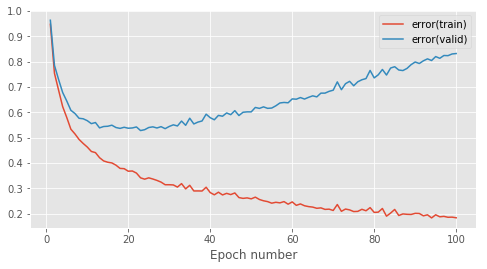

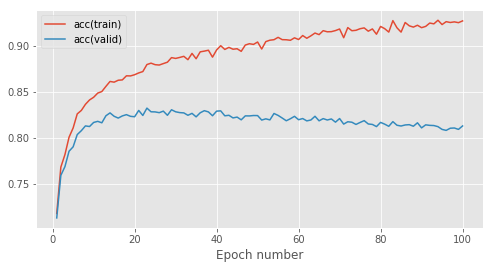

In [25]:
# LeakyReLu, 2 Hidden Layers, Fan-out strategy

from mlp.layers import AffineLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = UniformInit(-np.sqrt(3/output_dim), np.sqrt(3/output_dim),rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/7_error_leaky_relu_2hls_fanout", "../results/7_accuracy_leaky_relu_2hls_fanout", "../results/7_stats_leaky_relu_2hls_fanout.csv", notebook=True)

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 2.4s to complete
    error(train)=1.11e+00, acc(train)=6.74e-01, error(valid)=1.12e+00, acc(valid)=6.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 1.5s to complete
    error(train)=8.22e-01, acc(train)=7.48e-01, error(valid)=8.37e-01, acc(valid)=7.45e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 1.5s to complete
    error(train)=6.73e-01, acc(train)=7.89e-01, error(valid)=6.95e-01, acc(valid)=7.81e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 1.5s to complete
    error(train)=5.98e-01, acc(train)=8.10e-01, error(valid)=6.30e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 1.5s to complete
    error(train)=5.49e-01, acc(train)=8.23e-01, error(valid)=5.86e-01, acc(valid)=8.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 1.5s to complete
    error(train)=5.19e-01, acc(train)=8.31e-01, error(valid)=5.66e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 1.5s to complete
    error(train)=5.03e-01, acc(train)=8.35e-01, error(valid)=5.60e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 1.5s to complete
    error(train)=4.73e-01, acc(train)=8.43e-01, error(valid)=5.43e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 1.5s to complete
    error(train)=4.44e-01, acc(train)=8.50e-01, error(valid)=5.17e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 1.5s to complete
    error(train)=4.32e-01, acc(train)=8.55e-01, error(valid)=5.12e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 1.5s to complete
    error(train)=4.26e-01, acc(train)=8.55e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 1.5s to complete
    error(train)=4.12e-01, acc(train)=8.59e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 1.5s to complete
    error(train)=4.05e-01, acc(train)=8.58e-01, error(valid)=5.06e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 1.5s to complete
    error(train)=3.96e-01, acc(train)=8.62e-01, error(valid)=5.03e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 1.5s to complete
    error(train)=3.80e-01, acc(train)=8.68e-01, error(valid)=4.99e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 1.5s to complete
    error(train)=4.00e-01, acc(train)=8.58e-01, error(valid)=5.16e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 1.5s to complete
    error(train)=3.65e-01, acc(train)=8.71e-01, error(valid)=4.95e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 1.5s to complete
    error(train)=3.54e-01, acc(train)=8.74e-01, error(valid)=4.86e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 1.5s to complete
    error(train)=3.47e-01, acc(train)=8.77e-01, error(valid)=4.82e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 1.5s to complete
    error(train)=3.51e-01, acc(train)=8.75e-01, error(valid)=4.92e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 1.5s to complete
    error(train)=3.34e-01, acc(train)=8.81e-01, error(valid)=4.85e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 1.5s to complete
    error(train)=3.28e-01, acc(train)=8.84e-01, error(valid)=4.85e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 1.5s to complete
    error(train)=3.22e-01, acc(train)=8.85e-01, error(valid)=4.86e-01, acc(valid)=8.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 1.5s to complete
    error(train)=3.36e-01, acc(train)=8.80e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 1.5s to complete
    error(train)=3.08e-01, acc(train)=8.88e-01, error(valid)=4.87e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 1.5s to complete
    error(train)=3.09e-01, acc(train)=8.87e-01, error(valid)=4.94e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 1.5s to complete
    error(train)=3.10e-01, acc(train)=8.86e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 1.5s to complete
    error(train)=3.02e-01, acc(train)=8.92e-01, error(valid)=5.02e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 1.5s to complete
    error(train)=3.08e-01, acc(train)=8.87e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 1.5s to complete
    error(train)=2.93e-01, acc(train)=8.92e-01, error(valid)=4.99e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 1.9s to complete
    error(train)=2.95e-01, acc(train)=8.89e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 1.5s to complete
    error(train)=2.93e-01, acc(train)=8.91e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 1.5s to complete
    error(train)=2.90e-01, acc(train)=8.92e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 1.5s to complete
    error(train)=2.81e-01, acc(train)=8.95e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 2.3s to complete
    error(train)=2.76e-01, acc(train)=8.98e-01, error(valid)=5.19e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 2.3s to complete
    error(train)=2.71e-01, acc(train)=8.99e-01, error(valid)=5.26e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 2.8s to complete
    error(train)=2.69e-01, acc(train)=8.99e-01, error(valid)=5.17e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 3.2s to complete
    error(train)=2.67e-01, acc(train)=9.00e-01, error(valid)=5.26e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 2.9s to complete
    error(train)=2.62e-01, acc(train)=9.02e-01, error(valid)=5.27e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 2.7s to complete
    error(train)=2.62e-01, acc(train)=9.01e-01, error(valid)=5.38e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 2.4s to complete
    error(train)=2.53e-01, acc(train)=9.05e-01, error(valid)=5.31e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 2.8s to complete
    error(train)=2.54e-01, acc(train)=9.04e-01, error(valid)=5.35e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 2.7s to complete
    error(train)=2.53e-01, acc(train)=9.05e-01, error(valid)=5.39e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 2.6s to complete
    error(train)=2.54e-01, acc(train)=9.04e-01, error(valid)=5.50e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 2.3s to complete
    error(train)=2.51e-01, acc(train)=9.05e-01, error(valid)=5.52e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 2.6s to complete
    error(train)=2.49e-01, acc(train)=9.04e-01, error(valid)=5.57e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 2.6s to complete
    error(train)=2.45e-01, acc(train)=9.08e-01, error(valid)=5.55e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 2.8s to complete
    error(train)=2.44e-01, acc(train)=9.07e-01, error(valid)=5.66e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 2.5s to complete
    error(train)=2.37e-01, acc(train)=9.10e-01, error(valid)=5.63e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 2.3s to complete
    error(train)=2.41e-01, acc(train)=9.09e-01, error(valid)=5.78e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 2.5s to complete
    error(train)=2.40e-01, acc(train)=9.09e-01, error(valid)=5.82e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 2.5s to complete
    error(train)=2.23e-01, acc(train)=9.15e-01, error(valid)=5.69e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 2.6s to complete
    error(train)=2.30e-01, acc(train)=9.10e-01, error(valid)=5.79e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 2.3s to complete
    error(train)=2.29e-01, acc(train)=9.12e-01, error(valid)=5.81e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 2.7s to complete
    error(train)=2.19e-01, acc(train)=9.16e-01, error(valid)=5.83e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 2.4s to complete
    error(train)=2.14e-01, acc(train)=9.18e-01, error(valid)=5.90e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 2.2s to complete
    error(train)=2.19e-01, acc(train)=9.17e-01, error(valid)=5.90e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 2.7s to complete
    error(train)=2.30e-01, acc(train)=9.13e-01, error(valid)=6.20e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 2.5s to complete
    error(train)=2.21e-01, acc(train)=9.14e-01, error(valid)=6.10e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 2.3s to complete
    error(train)=2.12e-01, acc(train)=9.17e-01, error(valid)=6.11e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 2.3s to complete
    error(train)=2.10e-01, acc(train)=9.19e-01, error(valid)=6.11e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 2.3s to complete
    error(train)=2.22e-01, acc(train)=9.14e-01, error(valid)=6.28e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 3.3s to complete
    error(train)=2.11e-01, acc(train)=9.18e-01, error(valid)=6.23e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 2.9s to complete
    error(train)=2.04e-01, acc(train)=9.22e-01, error(valid)=6.29e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 2.5s to complete
    error(train)=2.13e-01, acc(train)=9.17e-01, error(valid)=6.40e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 3.2s to complete
    error(train)=2.03e-01, acc(train)=9.20e-01, error(valid)=6.35e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 2.3s to complete
    error(train)=2.00e-01, acc(train)=9.22e-01, error(valid)=6.40e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 2.7s to complete
    error(train)=2.07e-01, acc(train)=9.19e-01, error(valid)=6.49e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 2.5s to complete
    error(train)=2.00e-01, acc(train)=9.23e-01, error(valid)=6.51e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 2.5s to complete
    error(train)=1.94e-01, acc(train)=9.23e-01, error(valid)=6.49e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 2.3s to complete
    error(train)=2.12e-01, acc(train)=9.17e-01, error(valid)=6.77e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 2.2s to complete
    error(train)=1.92e-01, acc(train)=9.23e-01, error(valid)=6.67e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 2.3s to complete
    error(train)=1.91e-01, acc(train)=9.25e-01, error(valid)=6.70e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 2.7s to complete
    error(train)=1.95e-01, acc(train)=9.24e-01, error(valid)=6.79e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 2.4s to complete
    error(train)=1.92e-01, acc(train)=9.24e-01, error(valid)=6.79e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 2.5s to complete
    error(train)=1.96e-01, acc(train)=9.22e-01, error(valid)=6.97e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 2.7s to complete
    error(train)=1.88e-01, acc(train)=9.25e-01, error(valid)=6.94e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 2.4s to complete
    error(train)=1.81e-01, acc(train)=9.29e-01, error(valid)=6.94e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 2.7s to complete
    error(train)=1.94e-01, acc(train)=9.22e-01, error(valid)=7.08e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 2.7s to complete
    error(train)=1.80e-01, acc(train)=9.29e-01, error(valid)=6.99e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 2.7s to complete
    error(train)=1.90e-01, acc(train)=9.24e-01, error(valid)=7.29e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 2.3s to complete
    error(train)=1.99e-01, acc(train)=9.21e-01, error(valid)=7.34e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 2.6s to complete
    error(train)=1.89e-01, acc(train)=9.24e-01, error(valid)=7.30e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 2.4s to complete
    error(train)=1.80e-01, acc(train)=9.28e-01, error(valid)=7.27e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 2.5s to complete
    error(train)=1.92e-01, acc(train)=9.23e-01, error(valid)=7.40e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 2.5s to complete
    error(train)=1.88e-01, acc(train)=9.24e-01, error(valid)=7.54e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 2.3s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=7.41e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 2.7s to complete
    error(train)=1.73e-01, acc(train)=9.32e-01, error(valid)=7.58e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 2.6s to complete
    error(train)=1.71e-01, acc(train)=9.33e-01, error(valid)=7.55e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 2.8s to complete
    error(train)=1.76e-01, acc(train)=9.26e-01, error(valid)=7.68e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 2.8s to complete
    error(train)=1.90e-01, acc(train)=9.24e-01, error(valid)=7.88e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 2.7s to complete
    error(train)=1.76e-01, acc(train)=9.29e-01, error(valid)=7.69e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 2.3s to complete
    error(train)=1.83e-01, acc(train)=9.28e-01, error(valid)=7.87e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 2.7s to complete
    error(train)=1.68e-01, acc(train)=9.34e-01, error(valid)=7.80e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 2.8s to complete
    error(train)=1.70e-01, acc(train)=9.32e-01, error(valid)=7.90e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 2.5s to complete
    error(train)=1.70e-01, acc(train)=9.32e-01, error(valid)=7.99e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 2.8s to complete
    error(train)=1.69e-01, acc(train)=9.31e-01, error(valid)=7.93e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 2.7s to complete
    error(train)=1.63e-01, acc(train)=9.34e-01, error(valid)=8.09e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 2.7s to complete
    error(train)=1.68e-01, acc(train)=9.33e-01, error(valid)=8.23e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 2.8s to complete
    error(train)=1.68e-01, acc(train)=9.31e-01, error(valid)=8.14e-01, acc(valid)=8.21e-01


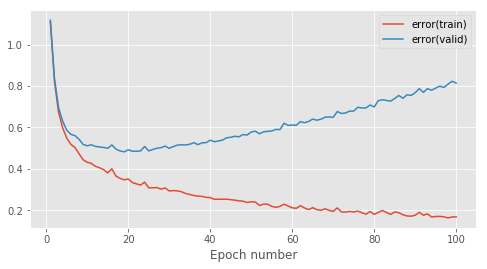

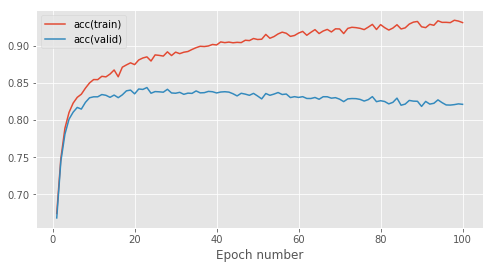

In [26]:
# Leaky ReLu, 2 Hidden Layers, Fan-in-out strategy

from mlp.layers import AffineLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = UniformInit(-np.sqrt(6/(input_dim + output_dim)), np.sqrt(6/(input_dim + output_dim)),rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/8_error_leaky_relu_2hls_faninout", "../results/8_accuracy_leaky_relu_2hls_faninout", "../results/8_stats_leaky_relu_2hls_faninout.csv", notebook=True)

Dropout Regularisation Method
Experiment - incl_proc = 0.3

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 3.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 3.6s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 3.9s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 3.5s to complete
    error(train)=3.83e+00, acc(train)=5.10e-02, error(valid)=3.83e+00, acc(valid)=4.91e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 3.5s to complete
    error(train)=3.73e+00, acc(train)=5.07e-02, error(valid)=3.73e+00, acc(valid)=4.89e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 3.0s to complete
    error(train)=3.57e+00, acc(train)=6.75e-02, error(valid)=3.57e+00, acc(valid)=6.36e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 3.2s to complete
    error(train)=3.46e+00, acc(train)=1.00e-01, error(valid)=3.46e+00, acc(valid)=9.65e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 3.7s to complete
    error(train)=3.30e+00, acc(train)=1.23e-01, error(valid)=3.29e+00, acc(valid)=1.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 3.5s to complete
    error(train)=3.16e+00, acc(train)=1.50e-01, error(valid)=3.15e+00, acc(valid)=1.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 4.1s to complete
    error(train)=3.07e+00, acc(train)=1.72e-01, error(valid)=3.06e+00, acc(valid)=1.70e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 3.4s to complete
    error(train)=2.97e+00, acc(train)=2.17e-01, error(valid)=2.97e+00, acc(valid)=2.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 3.7s to complete
    error(train)=2.85e+00, acc(train)=2.46e-01, error(valid)=2.84e+00, acc(valid)=2.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 4.0s to complete
    error(train)=2.74e+00, acc(train)=2.75e-01, error(valid)=2.73e+00, acc(valid)=2.74e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 3.5s to complete
    error(train)=2.65e+00, acc(train)=2.90e-01, error(valid)=2.65e+00, acc(valid)=2.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 4.1s to complete
    error(train)=2.57e+00, acc(train)=3.07e-01, error(valid)=2.57e+00, acc(valid)=3.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 3.8s to complete
    error(train)=2.55e+00, acc(train)=3.08e-01, error(valid)=2.54e+00, acc(valid)=3.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 3.5s to complete
    error(train)=2.51e+00, acc(train)=3.25e-01, error(valid)=2.51e+00, acc(valid)=3.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 3.3s to complete
    error(train)=2.45e+00, acc(train)=3.41e-01, error(valid)=2.45e+00, acc(valid)=3.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 3.5s to complete
    error(train)=2.44e+00, acc(train)=3.36e-01, error(valid)=2.44e+00, acc(valid)=3.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 3.8s to complete
    error(train)=2.38e+00, acc(train)=3.59e-01, error(valid)=2.38e+00, acc(valid)=3.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 3.9s to complete
    error(train)=2.34e+00, acc(train)=3.81e-01, error(valid)=2.34e+00, acc(valid)=3.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 4.6s to complete
    error(train)=2.32e+00, acc(train)=3.92e-01, error(valid)=2.32e+00, acc(valid)=3.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 4.2s to complete
    error(train)=2.28e+00, acc(train)=4.04e-01, error(valid)=2.27e+00, acc(valid)=4.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 3.7s to complete
    error(train)=2.22e+00, acc(train)=4.12e-01, error(valid)=2.22e+00, acc(valid)=4.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 3.8s to complete
    error(train)=2.21e+00, acc(train)=4.18e-01, error(valid)=2.21e+00, acc(valid)=4.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 3.8s to complete
    error(train)=2.16e+00, acc(train)=4.54e-01, error(valid)=2.16e+00, acc(valid)=4.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 3.4s to complete
    error(train)=2.13e+00, acc(train)=4.52e-01, error(valid)=2.13e+00, acc(valid)=4.50e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 3.6s to complete
    error(train)=2.10e+00, acc(train)=4.57e-01, error(valid)=2.10e+00, acc(valid)=4.55e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 3.5s to complete
    error(train)=2.08e+00, acc(train)=4.70e-01, error(valid)=2.08e+00, acc(valid)=4.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 3.2s to complete
    error(train)=2.03e+00, acc(train)=4.83e-01, error(valid)=2.03e+00, acc(valid)=4.77e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 3.7s to complete
    error(train)=1.99e+00, acc(train)=5.00e-01, error(valid)=1.99e+00, acc(valid)=4.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 3.7s to complete
    error(train)=1.97e+00, acc(train)=4.95e-01, error(valid)=1.96e+00, acc(valid)=4.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 4.1s to complete
    error(train)=1.96e+00, acc(train)=5.05e-01, error(valid)=1.96e+00, acc(valid)=5.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 4.6s to complete
    error(train)=1.93e+00, acc(train)=5.09e-01, error(valid)=1.93e+00, acc(valid)=5.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 3.1s to complete
    error(train)=1.89e+00, acc(train)=5.25e-01, error(valid)=1.89e+00, acc(valid)=5.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 3.4s to complete
    error(train)=1.89e+00, acc(train)=5.28e-01, error(valid)=1.89e+00, acc(valid)=5.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 3.1s to complete
    error(train)=1.87e+00, acc(train)=5.25e-01, error(valid)=1.87e+00, acc(valid)=5.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 3.2s to complete
    error(train)=1.84e+00, acc(train)=5.36e-01, error(valid)=1.84e+00, acc(valid)=5.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 3.4s to complete
    error(train)=1.83e+00, acc(train)=5.45e-01, error(valid)=1.83e+00, acc(valid)=5.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 3.4s to complete
    error(train)=1.81e+00, acc(train)=5.46e-01, error(valid)=1.82e+00, acc(valid)=5.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 3.4s to complete
    error(train)=1.79e+00, acc(train)=5.47e-01, error(valid)=1.79e+00, acc(valid)=5.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 3.3s to complete
    error(train)=1.79e+00, acc(train)=5.52e-01, error(valid)=1.79e+00, acc(valid)=5.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 3.4s to complete
    error(train)=1.77e+00, acc(train)=5.50e-01, error(valid)=1.77e+00, acc(valid)=5.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 3.4s to complete
    error(train)=1.77e+00, acc(train)=5.59e-01, error(valid)=1.77e+00, acc(valid)=5.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 3.3s to complete
    error(train)=1.77e+00, acc(train)=5.57e-01, error(valid)=1.77e+00, acc(valid)=5.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 3.2s to complete
    error(train)=1.73e+00, acc(train)=5.64e-01, error(valid)=1.73e+00, acc(valid)=5.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 3.3s to complete
    error(train)=1.72e+00, acc(train)=5.59e-01, error(valid)=1.72e+00, acc(valid)=5.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 3.6s to complete
    error(train)=1.72e+00, acc(train)=5.55e-01, error(valid)=1.72e+00, acc(valid)=5.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 3.2s to complete
    error(train)=1.73e+00, acc(train)=5.64e-01, error(valid)=1.73e+00, acc(valid)=5.63e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 3.3s to complete
    error(train)=1.71e+00, acc(train)=5.66e-01, error(valid)=1.71e+00, acc(valid)=5.67e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 3.6s to complete
    error(train)=1.69e+00, acc(train)=5.71e-01, error(valid)=1.69e+00, acc(valid)=5.71e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 3.5s to complete
    error(train)=1.70e+00, acc(train)=5.72e-01, error(valid)=1.70e+00, acc(valid)=5.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 3.3s to complete
    error(train)=1.67e+00, acc(train)=5.76e-01, error(valid)=1.68e+00, acc(valid)=5.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 3.2s to complete
    error(train)=1.67e+00, acc(train)=5.75e-01, error(valid)=1.67e+00, acc(valid)=5.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 3.1s to complete
    error(train)=1.67e+00, acc(train)=5.78e-01, error(valid)=1.67e+00, acc(valid)=5.79e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 3.3s to complete
    error(train)=1.64e+00, acc(train)=5.83e-01, error(valid)=1.64e+00, acc(valid)=5.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 3.1s to complete
    error(train)=1.64e+00, acc(train)=5.83e-01, error(valid)=1.64e+00, acc(valid)=5.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 3.5s to complete
    error(train)=1.65e+00, acc(train)=5.78e-01, error(valid)=1.66e+00, acc(valid)=5.78e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 3.3s to complete
    error(train)=1.66e+00, acc(train)=5.76e-01, error(valid)=1.66e+00, acc(valid)=5.78e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 3.4s to complete
    error(train)=1.63e+00, acc(train)=5.90e-01, error(valid)=1.63e+00, acc(valid)=5.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 4.0s to complete
    error(train)=1.64e+00, acc(train)=5.89e-01, error(valid)=1.64e+00, acc(valid)=5.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 3.3s to complete
    error(train)=1.61e+00, acc(train)=5.94e-01, error(valid)=1.61e+00, acc(valid)=5.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 3.2s to complete
    error(train)=1.62e+00, acc(train)=5.94e-01, error(valid)=1.62e+00, acc(valid)=5.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 3.4s to complete
    error(train)=1.60e+00, acc(train)=5.90e-01, error(valid)=1.60e+00, acc(valid)=5.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 3.2s to complete
    error(train)=1.59e+00, acc(train)=5.93e-01, error(valid)=1.59e+00, acc(valid)=5.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 3.4s to complete
    error(train)=1.59e+00, acc(train)=5.94e-01, error(valid)=1.59e+00, acc(valid)=5.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 3.2s to complete
    error(train)=1.60e+00, acc(train)=5.90e-01, error(valid)=1.60e+00, acc(valid)=5.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 3.2s to complete
    error(train)=1.57e+00, acc(train)=6.02e-01, error(valid)=1.57e+00, acc(valid)=6.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 3.3s to complete
    error(train)=1.58e+00, acc(train)=5.98e-01, error(valid)=1.59e+00, acc(valid)=5.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 3.4s to complete
    error(train)=1.55e+00, acc(train)=6.00e-01, error(valid)=1.56e+00, acc(valid)=5.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 3.1s to complete
    error(train)=1.57e+00, acc(train)=6.05e-01, error(valid)=1.57e+00, acc(valid)=6.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 3.3s to complete
    error(train)=1.55e+00, acc(train)=6.07e-01, error(valid)=1.55e+00, acc(valid)=6.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 3.7s to complete
    error(train)=1.56e+00, acc(train)=6.02e-01, error(valid)=1.56e+00, acc(valid)=6.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 3.3s to complete
    error(train)=1.56e+00, acc(train)=5.99e-01, error(valid)=1.56e+00, acc(valid)=5.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 3.3s to complete
    error(train)=1.57e+00, acc(train)=5.99e-01, error(valid)=1.57e+00, acc(valid)=5.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 3.4s to complete
    error(train)=1.53e+00, acc(train)=6.01e-01, error(valid)=1.54e+00, acc(valid)=6.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 3.3s to complete
    error(train)=1.54e+00, acc(train)=6.06e-01, error(valid)=1.54e+00, acc(valid)=6.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 3.3s to complete
    error(train)=1.54e+00, acc(train)=6.00e-01, error(valid)=1.54e+00, acc(valid)=5.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 3.3s to complete
    error(train)=1.54e+00, acc(train)=6.00e-01, error(valid)=1.54e+00, acc(valid)=5.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 3.4s to complete
    error(train)=1.55e+00, acc(train)=6.03e-01, error(valid)=1.55e+00, acc(valid)=6.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 3.4s to complete
    error(train)=1.54e+00, acc(train)=6.08e-01, error(valid)=1.54e+00, acc(valid)=6.07e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 3.1s to complete
    error(train)=1.54e+00, acc(train)=6.06e-01, error(valid)=1.55e+00, acc(valid)=6.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 3.2s to complete
    error(train)=1.53e+00, acc(train)=6.06e-01, error(valid)=1.54e+00, acc(valid)=6.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 3.4s to complete
    error(train)=1.52e+00, acc(train)=6.06e-01, error(valid)=1.53e+00, acc(valid)=6.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 3.2s to complete
    error(train)=1.52e+00, acc(train)=6.09e-01, error(valid)=1.52e+00, acc(valid)=6.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 3.3s to complete
    error(train)=1.51e+00, acc(train)=6.11e-01, error(valid)=1.52e+00, acc(valid)=6.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 3.2s to complete
    error(train)=1.52e+00, acc(train)=6.13e-01, error(valid)=1.52e+00, acc(valid)=6.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 3.5s to complete
    error(train)=1.50e+00, acc(train)=6.10e-01, error(valid)=1.50e+00, acc(valid)=6.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 3.3s to complete
    error(train)=1.49e+00, acc(train)=6.15e-01, error(valid)=1.50e+00, acc(valid)=6.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 3.0s to complete
    error(train)=1.52e+00, acc(train)=6.17e-01, error(valid)=1.52e+00, acc(valid)=6.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 3.5s to complete
    error(train)=1.50e+00, acc(train)=6.14e-01, error(valid)=1.50e+00, acc(valid)=6.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 3.3s to complete
    error(train)=1.54e+00, acc(train)=6.06e-01, error(valid)=1.54e+00, acc(valid)=6.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 3.2s to complete
    error(train)=1.51e+00, acc(train)=6.08e-01, error(valid)=1.51e+00, acc(valid)=6.07e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 3.2s to complete
    error(train)=1.48e+00, acc(train)=6.18e-01, error(valid)=1.49e+00, acc(valid)=6.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 3.5s to complete
    error(train)=1.50e+00, acc(train)=6.11e-01, error(valid)=1.50e+00, acc(valid)=6.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 3.5s to complete
    error(train)=1.48e+00, acc(train)=6.17e-01, error(valid)=1.49e+00, acc(valid)=6.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 3.5s to complete
    error(train)=1.47e+00, acc(train)=6.14e-01, error(valid)=1.48e+00, acc(valid)=6.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 3.4s to complete
    error(train)=1.50e+00, acc(train)=6.15e-01, error(valid)=1.50e+00, acc(valid)=6.11e-01


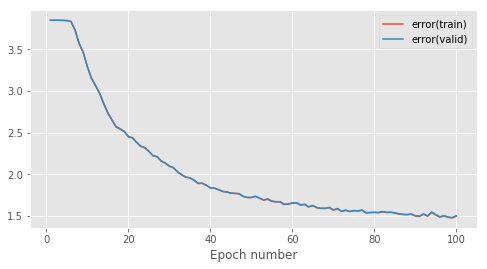

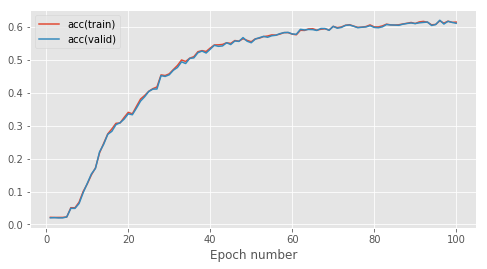

In [5]:
# LeakyReLu & Dropout, 2 Hidden Layers, Fan-in strategy - incl_prob = 0.3


from mlp.layers import AffineLayer, LeakyReluLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
incl_prob = 0.3

weights_init = UniformInit(-np.sqrt(3/(input_dim)), np.sqrt(3/(input_dim)),rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    DropoutLayer(rng, incl_prob),
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    DropoutLayer(rng, incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    DropoutLayer(rng, incl_prob),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/9_error_leaky_relu_dropout_2hls_fanin", "../results/9_accuracy_leaky_relu_dropout_2hls_fanin", "../results/9_stats_leaky_relu_dropout_2hls_fanin.csv", notebook=True)

Experiment - incl_prob = 0.7

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 3.4s to complete
    error(train)=2.36e+00, acc(train)=3.68e-01, error(valid)=2.37e+00, acc(valid)=3.67e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 3.3s to complete
    error(train)=1.51e+00, acc(train)=5.75e-01, error(valid)=1.52e+00, acc(valid)=5.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 3.4s to complete
    error(train)=1.20e+00, acc(train)=6.52e-01, error(valid)=1.21e+00, acc(valid)=6.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 3.9s to complete
    error(train)=1.07e+00, acc(train)=6.87e-01, error(valid)=1.07e+00, acc(valid)=6.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 3.3s to complete
    error(train)=9.66e-01, acc(train)=7.15e-01, error(valid)=9.71e-01, acc(valid)=7.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 3.4s to complete
    error(train)=8.95e-01, acc(train)=7.32e-01, error(valid)=9.01e-01, acc(valid)=7.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 3.4s to complete
    error(train)=8.66e-01, acc(train)=7.36e-01, error(valid)=8.69e-01, acc(valid)=7.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 3.5s to complete
    error(train)=8.24e-01, acc(train)=7.49e-01, error(valid)=8.30e-01, acc(valid)=7.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 3.5s to complete
    error(train)=7.76e-01, acc(train)=7.60e-01, error(valid)=7.85e-01, acc(valid)=7.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 3.3s to complete
    error(train)=7.61e-01, acc(train)=7.65e-01, error(valid)=7.71e-01, acc(valid)=7.62e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 3.6s to complete
    error(train)=7.31e-01, acc(train)=7.74e-01, error(valid)=7.40e-01, acc(valid)=7.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 3.4s to complete
    error(train)=7.19e-01, acc(train)=7.74e-01, error(valid)=7.32e-01, acc(valid)=7.69e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 3.5s to complete
    error(train)=7.02e-01, acc(train)=7.77e-01, error(valid)=7.13e-01, acc(valid)=7.74e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 3.4s to complete
    error(train)=6.89e-01, acc(train)=7.82e-01, error(valid)=7.01e-01, acc(valid)=7.76e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 3.1s to complete
    error(train)=6.69e-01, acc(train)=7.89e-01, error(valid)=6.83e-01, acc(valid)=7.84e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 3.1s to complete
    error(train)=6.63e-01, acc(train)=7.90e-01, error(valid)=6.77e-01, acc(valid)=7.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 3.5s to complete
    error(train)=6.60e-01, acc(train)=7.90e-01, error(valid)=6.75e-01, acc(valid)=7.84e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 3.4s to complete
    error(train)=6.47e-01, acc(train)=7.95e-01, error(valid)=6.63e-01, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 3.3s to complete
    error(train)=6.37e-01, acc(train)=7.96e-01, error(valid)=6.51e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 3.4s to complete
    error(train)=6.22e-01, acc(train)=8.00e-01, error(valid)=6.37e-01, acc(valid)=7.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 3.4s to complete
    error(train)=6.28e-01, acc(train)=7.99e-01, error(valid)=6.48e-01, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 3.3s to complete
    error(train)=6.15e-01, acc(train)=8.05e-01, error(valid)=6.33e-01, acc(valid)=7.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 3.5s to complete
    error(train)=6.10e-01, acc(train)=8.06e-01, error(valid)=6.27e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 3.4s to complete
    error(train)=6.04e-01, acc(train)=8.04e-01, error(valid)=6.23e-01, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 3.4s to complete
    error(train)=6.00e-01, acc(train)=8.07e-01, error(valid)=6.16e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 3.3s to complete
    error(train)=5.96e-01, acc(train)=8.07e-01, error(valid)=6.15e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 3.1s to complete
    error(train)=5.96e-01, acc(train)=8.07e-01, error(valid)=6.14e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 3.4s to complete
    error(train)=5.89e-01, acc(train)=8.11e-01, error(valid)=6.09e-01, acc(valid)=8.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 3.4s to complete
    error(train)=5.89e-01, acc(train)=8.09e-01, error(valid)=6.06e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 3.6s to complete
    error(train)=5.84e-01, acc(train)=8.10e-01, error(valid)=6.05e-01, acc(valid)=8.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 3.2s to complete
    error(train)=5.80e-01, acc(train)=8.13e-01, error(valid)=5.98e-01, acc(valid)=8.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 3.2s to complete
    error(train)=5.75e-01, acc(train)=8.11e-01, error(valid)=5.95e-01, acc(valid)=8.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 3.5s to complete
    error(train)=5.71e-01, acc(train)=8.12e-01, error(valid)=5.90e-01, acc(valid)=8.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 3.4s to complete
    error(train)=5.64e-01, acc(train)=8.16e-01, error(valid)=5.84e-01, acc(valid)=8.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 3.2s to complete
    error(train)=5.67e-01, acc(train)=8.14e-01, error(valid)=5.87e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 3.4s to complete
    error(train)=5.63e-01, acc(train)=8.16e-01, error(valid)=5.83e-01, acc(valid)=8.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 3.4s to complete
    error(train)=5.63e-01, acc(train)=8.16e-01, error(valid)=5.84e-01, acc(valid)=8.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 3.4s to complete
    error(train)=5.59e-01, acc(train)=8.15e-01, error(valid)=5.82e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 3.3s to complete
    error(train)=5.54e-01, acc(train)=8.16e-01, error(valid)=5.78e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 3.5s to complete
    error(train)=5.53e-01, acc(train)=8.18e-01, error(valid)=5.74e-01, acc(valid)=8.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 3.4s to complete
    error(train)=5.52e-01, acc(train)=8.18e-01, error(valid)=5.76e-01, acc(valid)=8.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 3.3s to complete
    error(train)=5.50e-01, acc(train)=8.18e-01, error(valid)=5.73e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 3.4s to complete
    error(train)=5.48e-01, acc(train)=8.20e-01, error(valid)=5.70e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 3.4s to complete
    error(train)=5.57e-01, acc(train)=8.14e-01, error(valid)=5.79e-01, acc(valid)=8.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 3.5s to complete
    error(train)=5.53e-01, acc(train)=8.16e-01, error(valid)=5.78e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 3.3s to complete
    error(train)=5.45e-01, acc(train)=8.21e-01, error(valid)=5.69e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 3.3s to complete
    error(train)=5.43e-01, acc(train)=8.19e-01, error(valid)=5.65e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 3.3s to complete
    error(train)=5.41e-01, acc(train)=8.20e-01, error(valid)=5.64e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 3.5s to complete
    error(train)=5.41e-01, acc(train)=8.22e-01, error(valid)=5.65e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 3.2s to complete
    error(train)=5.43e-01, acc(train)=8.19e-01, error(valid)=5.66e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 3.3s to complete
    error(train)=5.40e-01, acc(train)=8.20e-01, error(valid)=5.63e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 3.4s to complete
    error(train)=5.36e-01, acc(train)=8.21e-01, error(valid)=5.58e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 3.1s to complete
    error(train)=5.32e-01, acc(train)=8.21e-01, error(valid)=5.56e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 3.2s to complete
    error(train)=5.31e-01, acc(train)=8.23e-01, error(valid)=5.56e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 3.4s to complete
    error(train)=5.36e-01, acc(train)=8.22e-01, error(valid)=5.62e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 3.3s to complete
    error(train)=5.32e-01, acc(train)=8.23e-01, error(valid)=5.56e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 3.4s to complete
    error(train)=5.38e-01, acc(train)=8.22e-01, error(valid)=5.65e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 3.2s to complete
    error(train)=5.28e-01, acc(train)=8.25e-01, error(valid)=5.52e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 3.5s to complete
    error(train)=5.27e-01, acc(train)=8.25e-01, error(valid)=5.49e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 3.1s to complete
    error(train)=5.34e-01, acc(train)=8.19e-01, error(valid)=5.60e-01, acc(valid)=8.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 3.3s to complete
    error(train)=5.29e-01, acc(train)=8.24e-01, error(valid)=5.54e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 3.3s to complete
    error(train)=5.30e-01, acc(train)=8.21e-01, error(valid)=5.55e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 3.2s to complete
    error(train)=5.27e-01, acc(train)=8.24e-01, error(valid)=5.52e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 3.4s to complete
    error(train)=5.22e-01, acc(train)=8.23e-01, error(valid)=5.47e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 3.4s to complete
    error(train)=5.25e-01, acc(train)=8.25e-01, error(valid)=5.49e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 3.4s to complete
    error(train)=5.23e-01, acc(train)=8.25e-01, error(valid)=5.50e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 3.3s to complete
    error(train)=5.19e-01, acc(train)=8.28e-01, error(valid)=5.44e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 3.3s to complete
    error(train)=5.22e-01, acc(train)=8.27e-01, error(valid)=5.45e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 3.3s to complete
    error(train)=5.20e-01, acc(train)=8.26e-01, error(valid)=5.45e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 3.5s to complete
    error(train)=5.21e-01, acc(train)=8.26e-01, error(valid)=5.47e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 3.3s to complete
    error(train)=5.22e-01, acc(train)=8.24e-01, error(valid)=5.49e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 3.5s to complete
    error(train)=5.16e-01, acc(train)=8.28e-01, error(valid)=5.43e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 3.4s to complete
    error(train)=5.14e-01, acc(train)=8.25e-01, error(valid)=5.39e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 3.5s to complete
    error(train)=5.16e-01, acc(train)=8.26e-01, error(valid)=5.44e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 3.5s to complete
    error(train)=5.16e-01, acc(train)=8.26e-01, error(valid)=5.43e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 3.1s to complete
    error(train)=5.16e-01, acc(train)=8.29e-01, error(valid)=5.41e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 3.1s to complete
    error(train)=5.14e-01, acc(train)=8.27e-01, error(valid)=5.43e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 3.3s to complete
    error(train)=5.09e-01, acc(train)=8.30e-01, error(valid)=5.40e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 3.4s to complete
    error(train)=5.10e-01, acc(train)=8.29e-01, error(valid)=5.38e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 3.3s to complete
    error(train)=5.11e-01, acc(train)=8.28e-01, error(valid)=5.40e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 3.3s to complete
    error(train)=5.08e-01, acc(train)=8.31e-01, error(valid)=5.35e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 3.4s to complete
    error(train)=5.18e-01, acc(train)=8.27e-01, error(valid)=5.47e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 3.2s to complete
    error(train)=5.07e-01, acc(train)=8.30e-01, error(valid)=5.35e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 3.4s to complete
    error(train)=5.08e-01, acc(train)=8.29e-01, error(valid)=5.36e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 3.1s to complete
    error(train)=5.07e-01, acc(train)=8.30e-01, error(valid)=5.36e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 4.3s to complete
    error(train)=5.11e-01, acc(train)=8.28e-01, error(valid)=5.39e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 3.5s to complete
    error(train)=5.06e-01, acc(train)=8.30e-01, error(valid)=5.35e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 3.3s to complete
    error(train)=5.09e-01, acc(train)=8.31e-01, error(valid)=5.38e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 3.4s to complete
    error(train)=5.08e-01, acc(train)=8.30e-01, error(valid)=5.38e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 3.4s to complete
    error(train)=5.15e-01, acc(train)=8.28e-01, error(valid)=5.44e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 3.3s to complete
    error(train)=5.07e-01, acc(train)=8.28e-01, error(valid)=5.38e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 3.3s to complete
    error(train)=5.01e-01, acc(train)=8.32e-01, error(valid)=5.31e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 3.5s to complete
    error(train)=5.08e-01, acc(train)=8.31e-01, error(valid)=5.38e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 3.3s to complete
    error(train)=5.05e-01, acc(train)=8.31e-01, error(valid)=5.34e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 3.6s to complete
    error(train)=5.04e-01, acc(train)=8.31e-01, error(valid)=5.35e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 3.2s to complete
    error(train)=5.03e-01, acc(train)=8.32e-01, error(valid)=5.31e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 3.6s to complete
    error(train)=5.02e-01, acc(train)=8.30e-01, error(valid)=5.31e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 3.2s to complete
    error(train)=4.99e-01, acc(train)=8.32e-01, error(valid)=5.28e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 3.4s to complete
    error(train)=5.02e-01, acc(train)=8.31e-01, error(valid)=5.32e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 3.1s to complete
    error(train)=5.02e-01, acc(train)=8.30e-01, error(valid)=5.33e-01, acc(valid)=8.23e-01


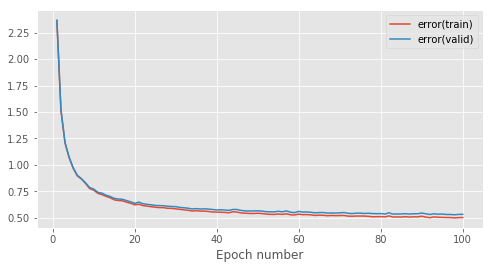

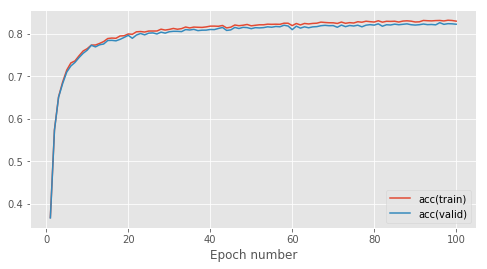

In [6]:
# LeakyReLu & Dropout, 2 Hidden Layers, Fan-in strategy - incl_prob = 0.7


from mlp.layers import AffineLayer, LeakyReluLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
incl_prob = 0.7

weights_init = UniformInit(-np.sqrt(3/(input_dim)), np.sqrt(3/(input_dim)),rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    DropoutLayer(rng, incl_prob),
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    DropoutLayer(rng, incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    DropoutLayer(rng, incl_prob),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/10_error_leaky_relu_dropout_2hls_fanin_2", "../results/10_accuracy_leaky_relu_dropout_2hls_fanin_2", "../results/10_stats_leaky_relu_dropout_2hls_fanin_2.csv", notebook=True)

Experiment - incl_prob = 0.9

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 3.3s to complete
    error(train)=1.39e+00, acc(train)=6.03e-01, error(valid)=1.40e+00, acc(valid)=5.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 3.4s to complete
    error(train)=9.78e-01, acc(train)=7.08e-01, error(valid)=9.84e-01, acc(valid)=7.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 2.4s to complete
    error(train)=8.20e-01, acc(train)=7.48e-01, error(valid)=8.28e-01, acc(valid)=7.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 3.4s to complete
    error(train)=7.30e-01, acc(train)=7.72e-01, error(valid)=7.46e-01, acc(valid)=7.64e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 3.4s to complete
    error(train)=6.62e-01, acc(train)=7.92e-01, error(valid)=6.81e-01, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 3.5s to complete
    error(train)=6.12e-01, acc(train)=8.05e-01, error(valid)=6.37e-01, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 3.4s to complete
    error(train)=5.86e-01, acc(train)=8.11e-01, error(valid)=6.13e-01, acc(valid)=8.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 3.6s to complete
    error(train)=5.58e-01, acc(train)=8.19e-01, error(valid)=5.85e-01, acc(valid)=8.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 3.5s to complete
    error(train)=5.35e-01, acc(train)=8.24e-01, error(valid)=5.68e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 3.5s to complete
    error(train)=5.18e-01, acc(train)=8.28e-01, error(valid)=5.54e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 3.6s to complete
    error(train)=5.04e-01, acc(train)=8.34e-01, error(valid)=5.42e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 3.2s to complete
    error(train)=4.89e-01, acc(train)=8.38e-01, error(valid)=5.28e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 3.5s to complete
    error(train)=4.80e-01, acc(train)=8.40e-01, error(valid)=5.21e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 3.6s to complete
    error(train)=4.67e-01, acc(train)=8.43e-01, error(valid)=5.13e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 3.5s to complete
    error(train)=4.59e-01, acc(train)=8.46e-01, error(valid)=5.06e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 3.4s to complete
    error(train)=4.54e-01, acc(train)=8.47e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 3.6s to complete
    error(train)=4.47e-01, acc(train)=8.49e-01, error(valid)=5.00e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 3.4s to complete
    error(train)=4.38e-01, acc(train)=8.51e-01, error(valid)=4.91e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 3.4s to complete
    error(train)=4.33e-01, acc(train)=8.54e-01, error(valid)=4.90e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 3.4s to complete
    error(train)=4.29e-01, acc(train)=8.54e-01, error(valid)=4.90e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 3.5s to complete
    error(train)=4.17e-01, acc(train)=8.58e-01, error(valid)=4.77e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 3.4s to complete
    error(train)=4.18e-01, acc(train)=8.56e-01, error(valid)=4.79e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 3.4s to complete
    error(train)=4.15e-01, acc(train)=8.57e-01, error(valid)=4.76e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 3.4s to complete
    error(train)=4.11e-01, acc(train)=8.59e-01, error(valid)=4.74e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 3.4s to complete
    error(train)=4.04e-01, acc(train)=8.61e-01, error(valid)=4.69e-01, acc(valid)=8.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 3.9s to complete
    error(train)=4.02e-01, acc(train)=8.62e-01, error(valid)=4.70e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 3.2s to complete
    error(train)=3.98e-01, acc(train)=8.63e-01, error(valid)=4.66e-01, acc(valid)=8.45e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 3.4s to complete
    error(train)=3.97e-01, acc(train)=8.62e-01, error(valid)=4.70e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 3.3s to complete
    error(train)=3.86e-01, acc(train)=8.67e-01, error(valid)=4.56e-01, acc(valid)=8.49e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 2.4s to complete
    error(train)=3.86e-01, acc(train)=8.66e-01, error(valid)=4.60e-01, acc(valid)=8.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 3.4s to complete
    error(train)=3.84e-01, acc(train)=8.67e-01, error(valid)=4.59e-01, acc(valid)=8.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 3.4s to complete
    error(train)=3.82e-01, acc(train)=8.67e-01, error(valid)=4.57e-01, acc(valid)=8.47e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 3.3s to complete
    error(train)=3.79e-01, acc(train)=8.68e-01, error(valid)=4.55e-01, acc(valid)=8.47e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 3.4s to complete
    error(train)=3.81e-01, acc(train)=8.66e-01, error(valid)=4.58e-01, acc(valid)=8.47e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 3.4s to complete
    error(train)=3.77e-01, acc(train)=8.69e-01, error(valid)=4.55e-01, acc(valid)=8.48e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 3.4s to complete
    error(train)=3.74e-01, acc(train)=8.69e-01, error(valid)=4.52e-01, acc(valid)=8.48e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 3.5s to complete
    error(train)=3.66e-01, acc(train)=8.72e-01, error(valid)=4.50e-01, acc(valid)=8.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 3.4s to complete
    error(train)=3.64e-01, acc(train)=8.72e-01, error(valid)=4.47e-01, acc(valid)=8.49e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 3.4s to complete
    error(train)=3.71e-01, acc(train)=8.68e-01, error(valid)=4.56e-01, acc(valid)=8.47e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 3.5s to complete
    error(train)=3.68e-01, acc(train)=8.71e-01, error(valid)=4.55e-01, acc(valid)=8.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 3.7s to complete
    error(train)=3.59e-01, acc(train)=8.74e-01, error(valid)=4.45e-01, acc(valid)=8.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 3.6s to complete
    error(train)=3.58e-01, acc(train)=8.73e-01, error(valid)=4.48e-01, acc(valid)=8.48e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 3.5s to complete
    error(train)=3.56e-01, acc(train)=8.74e-01, error(valid)=4.43e-01, acc(valid)=8.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 3.5s to complete
    error(train)=3.58e-01, acc(train)=8.73e-01, error(valid)=4.46e-01, acc(valid)=8.49e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 3.4s to complete
    error(train)=3.55e-01, acc(train)=8.75e-01, error(valid)=4.46e-01, acc(valid)=8.49e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 3.5s to complete
    error(train)=3.56e-01, acc(train)=8.74e-01, error(valid)=4.47e-01, acc(valid)=8.48e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 3.2s to complete
    error(train)=3.51e-01, acc(train)=8.75e-01, error(valid)=4.43e-01, acc(valid)=8.48e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 3.5s to complete
    error(train)=3.52e-01, acc(train)=8.74e-01, error(valid)=4.47e-01, acc(valid)=8.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 3.3s to complete
    error(train)=3.50e-01, acc(train)=8.76e-01, error(valid)=4.45e-01, acc(valid)=8.50e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 3.5s to complete
    error(train)=3.45e-01, acc(train)=8.77e-01, error(valid)=4.41e-01, acc(valid)=8.50e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 3.4s to complete
    error(train)=3.46e-01, acc(train)=8.78e-01, error(valid)=4.42e-01, acc(valid)=8.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 3.4s to complete
    error(train)=3.44e-01, acc(train)=8.77e-01, error(valid)=4.38e-01, acc(valid)=8.50e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 3.4s to complete
    error(train)=3.45e-01, acc(train)=8.77e-01, error(valid)=4.43e-01, acc(valid)=8.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 3.1s to complete
    error(train)=3.40e-01, acc(train)=8.79e-01, error(valid)=4.39e-01, acc(valid)=8.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 3.4s to complete
    error(train)=3.37e-01, acc(train)=8.79e-01, error(valid)=4.38e-01, acc(valid)=8.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 3.4s to complete
    error(train)=3.38e-01, acc(train)=8.80e-01, error(valid)=4.36e-01, acc(valid)=8.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 2.4s to complete
    error(train)=3.39e-01, acc(train)=8.79e-01, error(valid)=4.37e-01, acc(valid)=8.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 2.8s to complete
    error(train)=3.38e-01, acc(train)=8.80e-01, error(valid)=4.38e-01, acc(valid)=8.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 3.7s to complete
    error(train)=3.43e-01, acc(train)=8.75e-01, error(valid)=4.40e-01, acc(valid)=8.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 3.4s to complete
    error(train)=3.34e-01, acc(train)=8.82e-01, error(valid)=4.37e-01, acc(valid)=8.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 3.5s to complete
    error(train)=3.34e-01, acc(train)=8.80e-01, error(valid)=4.38e-01, acc(valid)=8.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 3.6s to complete
    error(train)=3.36e-01, acc(train)=8.78e-01, error(valid)=4.38e-01, acc(valid)=8.48e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 3.5s to complete
    error(train)=3.31e-01, acc(train)=8.81e-01, error(valid)=4.35e-01, acc(valid)=8.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 3.5s to complete
    error(train)=3.30e-01, acc(train)=8.81e-01, error(valid)=4.34e-01, acc(valid)=8.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 3.5s to complete
    error(train)=3.28e-01, acc(train)=8.83e-01, error(valid)=4.32e-01, acc(valid)=8.55e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 3.6s to complete
    error(train)=3.31e-01, acc(train)=8.80e-01, error(valid)=4.34e-01, acc(valid)=8.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 4.4s to complete
    error(train)=3.27e-01, acc(train)=8.82e-01, error(valid)=4.33e-01, acc(valid)=8.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 3.4s to complete
    error(train)=3.23e-01, acc(train)=8.84e-01, error(valid)=4.28e-01, acc(valid)=8.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 3.2s to complete
    error(train)=3.25e-01, acc(train)=8.83e-01, error(valid)=4.29e-01, acc(valid)=8.55e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 3.4s to complete
    error(train)=3.25e-01, acc(train)=8.84e-01, error(valid)=4.30e-01, acc(valid)=8.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 3.2s to complete
    error(train)=3.27e-01, acc(train)=8.82e-01, error(valid)=4.37e-01, acc(valid)=8.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 3.3s to complete
    error(train)=3.23e-01, acc(train)=8.84e-01, error(valid)=4.31e-01, acc(valid)=8.55e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 3.3s to complete
    error(train)=3.26e-01, acc(train)=8.82e-01, error(valid)=4.33e-01, acc(valid)=8.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 3.4s to complete
    error(train)=3.24e-01, acc(train)=8.83e-01, error(valid)=4.33e-01, acc(valid)=8.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 3.4s to complete
    error(train)=3.20e-01, acc(train)=8.84e-01, error(valid)=4.29e-01, acc(valid)=8.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 3.3s to complete
    error(train)=3.23e-01, acc(train)=8.84e-01, error(valid)=4.32e-01, acc(valid)=8.55e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 3.5s to complete
    error(train)=3.22e-01, acc(train)=8.83e-01, error(valid)=4.32e-01, acc(valid)=8.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 3.5s to complete
    error(train)=3.20e-01, acc(train)=8.86e-01, error(valid)=4.30e-01, acc(valid)=8.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 3.4s to complete
    error(train)=3.24e-01, acc(train)=8.80e-01, error(valid)=4.37e-01, acc(valid)=8.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 3.5s to complete
    error(train)=3.22e-01, acc(train)=8.83e-01, error(valid)=4.37e-01, acc(valid)=8.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 3.5s to complete
    error(train)=3.15e-01, acc(train)=8.88e-01, error(valid)=4.28e-01, acc(valid)=8.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 3.1s to complete
    error(train)=3.17e-01, acc(train)=8.86e-01, error(valid)=4.28e-01, acc(valid)=8.58e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 3.7s to complete
    error(train)=3.23e-01, acc(train)=8.82e-01, error(valid)=4.39e-01, acc(valid)=8.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 3.1s to complete
    error(train)=3.15e-01, acc(train)=8.86e-01, error(valid)=4.28e-01, acc(valid)=8.55e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 3.4s to complete
    error(train)=3.14e-01, acc(train)=8.85e-01, error(valid)=4.30e-01, acc(valid)=8.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 3.4s to complete
    error(train)=3.16e-01, acc(train)=8.85e-01, error(valid)=4.29e-01, acc(valid)=8.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 3.5s to complete
    error(train)=3.11e-01, acc(train)=8.87e-01, error(valid)=4.26e-01, acc(valid)=8.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 3.2s to complete
    error(train)=3.20e-01, acc(train)=8.83e-01, error(valid)=4.34e-01, acc(valid)=8.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 3.6s to complete
    error(train)=3.12e-01, acc(train)=8.87e-01, error(valid)=4.26e-01, acc(valid)=8.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 3.3s to complete
    error(train)=3.10e-01, acc(train)=8.88e-01, error(valid)=4.28e-01, acc(valid)=8.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 3.4s to complete
    error(train)=3.13e-01, acc(train)=8.86e-01, error(valid)=4.29e-01, acc(valid)=8.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 3.5s to complete
    error(train)=3.12e-01, acc(train)=8.86e-01, error(valid)=4.27e-01, acc(valid)=8.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 3.5s to complete
    error(train)=3.13e-01, acc(train)=8.87e-01, error(valid)=4.27e-01, acc(valid)=8.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 3.3s to complete
    error(train)=3.09e-01, acc(train)=8.87e-01, error(valid)=4.27e-01, acc(valid)=8.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 3.3s to complete
    error(train)=3.11e-01, acc(train)=8.87e-01, error(valid)=4.26e-01, acc(valid)=8.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 3.3s to complete
    error(train)=3.08e-01, acc(train)=8.90e-01, error(valid)=4.26e-01, acc(valid)=8.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 3.6s to complete
    error(train)=3.10e-01, acc(train)=8.87e-01, error(valid)=4.30e-01, acc(valid)=8.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 3.3s to complete
    error(train)=3.04e-01, acc(train)=8.89e-01, error(valid)=4.25e-01, acc(valid)=8.58e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 3.5s to complete
    error(train)=3.06e-01, acc(train)=8.88e-01, error(valid)=4.21e-01, acc(valid)=8.58e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 3.2s to complete
    error(train)=3.10e-01, acc(train)=8.88e-01, error(valid)=4.27e-01, acc(valid)=8.56e-01


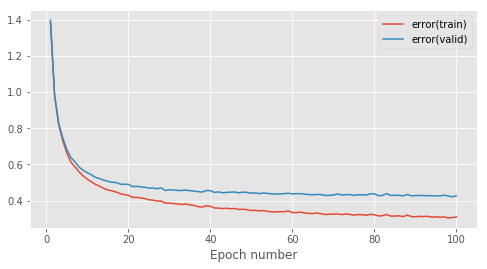

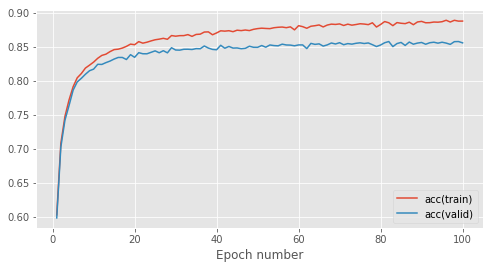

In [7]:
# LeakyReLu & Dropout, 2 Hidden Layers, Fan-in strategy - incl_prob = 0.9


from mlp.layers import AffineLayer, LeakyReluLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
incl_prob = 0.9

weights_init = UniformInit(-np.sqrt(3/(input_dim)), np.sqrt(3/(input_dim)),rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    DropoutLayer(rng, incl_prob),
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    DropoutLayer(rng, incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    DropoutLayer(rng, incl_prob),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/11_error_leaky_relu_dropout_2hls_fanin_3", "../results/11_accuracy_leaky_relu_dropout_2hls_fanin_3", "../results/11_stats_leaky_relu_dropout_2hls_fanin_3.csv", notebook=True)

L1 & L2 Regularisation strategies

In [8]:
class L1Penalty(object):
    """L1 parameter penalty.
    
    Term to add to the objective function penalising parameters
    based on their L1 norm.
    """
    
    def __init__(self, coefficient):
        """Create a new L1 penalty object.
        
        Args:
            coefficient: Positive constant to scale penalty term by.
        """
        assert coefficient > 0., 'Penalty coefficient must be positive.'
        self.coefficient = coefficient
        
    def __call__(self, parameter):
        """Calculate L1 penalty value for a parameter.
        
        Args:
            parameter: Array corresponding to a model parameter.
            
        Returns:
            Value of penalty term.
        """
        return self.coefficient * abs(parameter).sum()
        
    def grad(self, parameter):
        """Calculate the penalty gradient with respect to the parameter.
        
        Args:
            parameter: Array corresponding to a model parameter.
            
        Returns:
            Value of penalty gradient with respect to parameter. This
            should be an array of the same shape as the parameter.
        """
        return self.coefficient * np.sign(parameter)
    
    def __repr__(self):
        return 'L1Penalty({0})'.format(self.coefficient)
        

class L2Penalty(object):
    """L1 parameter penalty.
    
    Term to add to the objective function penalising parameters
    based on their L2 norm.
    """

    def __init__(self, coefficient):
        """Create a new L2 penalty object.
        
        Args:
            coefficient: Positive constant to scale penalty term by.
        """
        assert coefficient > 0., 'Penalty coefficient must be positive.'
        self.coefficient = coefficient
        
    def __call__(self, parameter):
        """Calculate L2 penalty value for a parameter.
        
        Args:
            parameter: Array corresponding to a model parameter.
            
        Returns:
            Value of penalty term.
        """
        return 0.5 * self.coefficient * (parameter**2).sum()
        
    def grad(self, parameter):
        """Calculate the penalty gradient with respect to the parameter.
        
        Args:
            parameter: Array corresponding to a model parameter.
            
        Returns:
            Value of penalty gradient with respect to parameter. This
            should be an array of the same shape as the parameter.
        """
        return self.coefficient * parameter
    
    def __repr__(self):
        return 'L2Penalty({0})'.format(self.coefficient)

In [9]:
# LeakyReLu, 2 Hidden Layers, Fan-in strategy - L1 & L2 Regularization strategies


from mlp.layers import AffineLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser
from collections import OrderedDict

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = UniformInit(-np.sqrt(3/(input_dim)), np.sqrt(3/(input_dim)),rng=rng)
biases_init = ConstantInit(0.)

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)
data_monitors = {'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

weights_penalties = [
    None,
    L1Penalty(1e-5),
    L1Penalty(1e-3),
    L2Penalty(1e-4),
    L2Penalty(1e-2)
]
run_info = OrderedDict()
models = OrderedDict()

for weights_penalty in weights_penalties:
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()
    print('Regularisation: {0}'.format(weights_penalty))
    model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
    optimiser = Optimiser(model, error, learning_rule, train_data, valid_data, data_monitors)
    run_info[weights_penalty] = optimiser.train(num_epochs, stats_interval)
    models[weights_penalty] = model
    


    

Regularisation: None


Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 361.27it/s]Epoch 1: 2.8s to complete
    error(train)=1.17e+00, acc(train)=6.63e-01, error(valid)=1.17e+00, acc(valid)=6.62e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 361.94it/s]Epoch 2: 2.8s to complete
    error(train)=8.31e-01, acc(train)=7.51e-01, error(valid)=8.41e-01, acc(valid)=7.45e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 350.84it/s]Epoch 3: 2.9s to complete
    error(train)=6.93e-01, acc(train)=7.80e-01, error(valid)=7.11e-01, acc(valid)=7.75e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 397.91it/s]Epoch 4: 2.5s to complete
    error(train)=6.29e-01, acc(train)=8.00e-01, error(valid)=6.52e-01, acc(valid)=7.92e-01


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 534.36it/s]Epoch 5: 1.9s to complete
    error(train)=5.77e-01, acc(train)=8.12e-01, error(valid)=6.13e-01, acc(valid)=8.04e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 559.29it/s]Epoch 6: 1.8s to complete
    error(train)=5.32e-01, acc(train)=8.25e-01, error(valid)=5.71e-01, acc(valid)=8.11e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 556.85it/s]Epoch 7: 1.8s to complete
    error(train)=5.10e-01, acc(train)=8.30e-01, error(valid)=5.58e-01, acc(valid)=8.19e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 552.76it/s]Epoch 8: 1.8s to complete
    error(train)=4.96e-01, acc(train)=8.31e-01, error(valid)=5.56e-01, acc(valid)=8.16e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 565.64it/s]Epoch 9: 1.8s to complete
    error(train)=4.54e-01, acc(train)=8.47e-01, error(valid)=5.18e-01, acc(valid)=8.31e-01
Epoch Progress:  51%|█████     | 506/1000 [00:01<00:01, 468.13it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 472.44it/s]Epoch 10: 2.1s to complete
    error(train)=4.62e-01, acc(train)=8.43e-01, error(valid)=5.31e-01, acc(valid)=8.21e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 540.96it/s]Epoch 11: 1.9s to complete
    error(train)=4.50e-01, acc(train)=8.46e-01, error(valid)=5.27e-01, acc(valid)=8.27e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 554.89it/s]Epoch 12: 1.8s to complete
    error(train)=4.33e-01, acc(train)=8.53e-01, error(valid)=5.23e-01, acc(valid)=8.29e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 565.18it/s]Epoch 13: 1.8s to complete
    error(train)=4.13e-01, acc(train)=8.59e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 458.32it/s]Epoch 14: 2.2s to complete
    error(train)=3.98e-01, acc(train)=8.62e-01, error(valid)=4.96e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 545.01it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 535.11it/s]Epoch 16: 1.9s to complete
    error(train)=3.80e-01, acc(train)=8.67e-01, error(valid)=4.95e-01, acc(valid)=8.36e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 554.89it/s]Epoch 17: 1.8s to complete
    error(train)=3.78e-01, acc(train)=8.67e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 561.18it/s]Epoch 18: 1.8s to complete
    error(train)=3.62e-01, acc(train)=8.72e-01, error(valid)=4.85e-01, acc(valid)=8.39e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 560.91it/s]Epoch 19: 1.8s to complete
    error(train)=3.69e-01, acc(train)=8.71e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 555.03it/s]Epoch 20: 1.8s to complete
    error(train)=3.72e-01, acc(train)=8.67e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01
Epoch Progress:  60%|██████    | 604/1000 [00:01<00:00, 480.97it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 520.73it/s]Epoch 21: 1.9s to complete
    error(train)=3.46e-01, acc(train)=8.77e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 551.24it/s]Epoch 22: 1.8s to complete
    error(train)=3.31e-01, acc(train)=8.82e-01, error(valid)=4.80e-01, acc(valid)=8.42e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 549.54it/s]Epoch 23: 1.8s to complete
    error(train)=3.31e-01, acc(train)=8.83e-01, error(valid)=4.85e-01, acc(valid)=8.45e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 548.50it/s]Epoch 24: 1.8s to complete
    error(train)=3.23e-01, acc(train)=8.84e-01, error(valid)=4.83e-01, acc(valid)=8.40e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 548.38it/s]Epoch 25: 1.8s to complete
    error(train)=3.19e-01, acc(train)=8.86e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 556.19it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 564.50it/s]Epoch 27: 1.8s to complete
    error(train)=3.09e-01, acc(train)=8.88e-01, error(valid)=4.89e-01, acc(valid)=8.39e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 585.29it/s]Epoch 28: 1.7s to complete
    error(train)=3.19e-01, acc(train)=8.82e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 553.16it/s]Epoch 29: 1.8s to complete
    error(train)=2.96e-01, acc(train)=8.92e-01, error(valid)=4.87e-01, acc(valid)=8.41e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 550.39it/s]Epoch 30: 1.8s to complete
    error(train)=3.08e-01, acc(train)=8.86e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 539.58it/s]Epoch 31: 1.9s to complete
    error(train)=3.05e-01, acc(train)=8.87e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01
Epoch Progress:  74%|███████▍  | 739/1000 [00:01<00:00, 608.72it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 534.39it/s]Epoch 32: 1.9s to complete
    error(train)=2.91e-01, acc(train)=8.94e-01, error(valid)=4.98e-01, acc(valid)=8.43e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 561.04it/s]Epoch 33: 1.8s to complete
    error(train)=3.02e-01, acc(train)=8.88e-01, error(valid)=5.19e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 557.14it/s]Epoch 34: 1.8s to complete
    error(train)=2.82e-01, acc(train)=8.96e-01, error(valid)=5.05e-01, acc(valid)=8.40e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 577.05it/s]Epoch 35: 1.8s to complete
    error(train)=3.03e-01, acc(train)=8.87e-01, error(valid)=5.34e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 537.78it/s]Epoch 36: 1.9s to complete
    error(train)=2.78e-01, acc(train)=8.97e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 547.57it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 504.12it/s]Epoch 38: 2.0s to complete
    error(train)=2.82e-01, acc(train)=8.93e-01, error(valid)=5.26e-01, acc(valid)=8.34e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 537.32it/s]Epoch 39: 1.9s to complete
    error(train)=2.79e-01, acc(train)=8.96e-01, error(valid)=5.34e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 550.47it/s]Epoch 40: 1.8s to complete
    error(train)=2.69e-01, acc(train)=8.98e-01, error(valid)=5.30e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 588.01it/s]
Epoch 41: 1.8s to complete
    error(train)=2.59e-01, acc(train)=9.04e-01, error(valid)=5.25e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 538.06it/s]Epoch 42: 1.9s to complete
    error(train)=2.75e-01, acc(train)=8.94e-01, error(valid)=5.44e-01, acc(valid)=8.32e-01
Epoch Progress:  73%|███████▎  | 728/1000 [00:01<00:00, 590.87it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 523.28it/s]Epoch 43: 1.9s to complete
    error(train)=2.68e-01, acc(train)=8.99e-01, error(valid)=5.39e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 541.03it/s]Epoch 44: 1.9s to complete
    error(train)=2.61e-01, acc(train)=9.01e-01, error(valid)=5.46e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 580.02it/s]Epoch 45: 1.7s to complete
    error(train)=2.59e-01, acc(train)=9.03e-01, error(valid)=5.46e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 578.83it/s]Epoch 46: 1.8s to complete
    error(train)=2.62e-01, acc(train)=9.01e-01, error(valid)=5.57e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 517.29it/s]Epoch 47: 2.0s to complete
    error(train)=2.47e-01, acc(train)=9.07e-01, error(valid)=5.49e-01, acc(valid)=8.36e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 512.50it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 525.14it/s]Epoch 49: 1.9s to complete
    error(train)=2.48e-01, acc(train)=9.06e-01, error(valid)=5.61e-01, acc(valid)=8.34e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 560.81it/s]Epoch 50: 1.8s to complete
    error(train)=2.41e-01, acc(train)=9.09e-01, error(valid)=5.56e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 569.17it/s]Epoch 51: 1.8s to complete
    error(train)=2.53e-01, acc(train)=9.02e-01, error(valid)=5.74e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 552.52it/s]Epoch 52: 1.8s to complete
    error(train)=2.37e-01, acc(train)=9.10e-01, error(valid)=5.65e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 582.16it/s]Epoch 53: 1.7s to complete
    error(train)=2.32e-01, acc(train)=9.10e-01, error(valid)=5.69e-01, acc(valid)=8.34e-01
Epoch Progress:  80%|███████▉  | 797/1000 [00:01<00:00, 556.79it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 546.90it/s]Epoch 54: 1.9s to complete
    error(train)=2.34e-01, acc(train)=9.08e-01, error(valid)=5.75e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 373.51it/s]Epoch 55: 2.7s to complete
    error(train)=2.28e-01, acc(train)=9.14e-01, error(valid)=5.82e-01, acc(valid)=8.39e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 548.47it/s]Epoch 56: 1.8s to complete
    error(train)=2.43e-01, acc(train)=9.04e-01, error(valid)=5.99e-01, acc(valid)=8.27e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 558.12it/s]Epoch 57: 1.8s to complete
    error(train)=2.30e-01, acc(train)=9.10e-01, error(valid)=5.95e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 554.41it/s]Epoch 58: 1.8s to complete
    error(train)=2.26e-01, acc(train)=9.12e-01, error(valid)=5.86e-01, acc(valid)=8.34e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 576.03it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 541.00it/s]Epoch 60: 1.9s to complete
    error(train)=2.13e-01, acc(train)=9.19e-01, error(valid)=5.94e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 546.38it/s]Epoch 61: 1.9s to complete
    error(train)=2.18e-01, acc(train)=9.16e-01, error(valid)=6.05e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 549.43it/s]Epoch 62: 1.8s to complete
    error(train)=2.21e-01, acc(train)=9.14e-01, error(valid)=6.15e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 537.92it/s]Epoch 63: 1.9s to complete
    error(train)=2.16e-01, acc(train)=9.15e-01, error(valid)=6.06e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 542.12it/s]Epoch 64: 1.9s to complete
    error(train)=2.13e-01, acc(train)=9.17e-01, error(valid)=6.11e-01, acc(valid)=8.32e-01
Epoch Progress:  54%|█████▍    | 541/1000 [00:00<00:00, 550.97it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 526.00it/s]Epoch 65: 1.9s to complete
    error(train)=2.15e-01, acc(train)=9.18e-01, error(valid)=6.29e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 541.92it/s]Epoch 66: 1.9s to complete
    error(train)=2.10e-01, acc(train)=9.17e-01, error(valid)=6.30e-01, acc(valid)=8.30e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 540.52it/s]Epoch 67: 1.9s to complete
    error(train)=2.08e-01, acc(train)=9.19e-01, error(valid)=6.27e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 562.58it/s]Epoch 68: 1.8s to complete
    error(train)=2.15e-01, acc(train)=9.15e-01, error(valid)=6.41e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 565.73it/s]Epoch 69: 1.8s to complete
    error(train)=2.03e-01, acc(train)=9.21e-01, error(valid)=6.44e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 525.64it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 461.86it/s]Epoch 71: 2.2s to complete
    error(train)=2.01e-01, acc(train)=9.21e-01, error(valid)=6.40e-01, acc(valid)=8.34e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 609.33it/s]
Epoch 72: 1.8s to complete
    error(train)=2.11e-01, acc(train)=9.14e-01, error(valid)=6.62e-01, acc(valid)=8.26e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 539.76it/s]Epoch 73: 1.9s to complete
    error(train)=1.96e-01, acc(train)=9.23e-01, error(valid)=6.48e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 557.47it/s]Epoch 74: 1.8s to complete
    error(train)=2.11e-01, acc(train)=9.18e-01, error(valid)=6.81e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 554.14it/s]Epoch 75: 1.8s to complete
    error(train)=2.11e-01, acc(train)=9.17e-01, error(valid)=6.84e-01, acc(valid)=8.26e-01
Epoch Progress:  76%|███████▋  | 764/1000 [00:01<00:00, 555.92it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 566.38it/s]Epoch 76: 1.8s to complete
    error(train)=2.07e-01, acc(train)=9.16e-01, error(valid)=6.78e-01, acc(valid)=8.25e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 547.62it/s]Epoch 77: 1.8s to complete
    error(train)=1.99e-01, acc(train)=9.22e-01, error(valid)=6.79e-01, acc(valid)=8.29e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 556.54it/s]Epoch 78: 1.8s to complete
    error(train)=2.18e-01, acc(train)=9.12e-01, error(valid)=7.09e-01, acc(valid)=8.18e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 552.80it/s]Epoch 79: 1.8s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=6.90e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 560.86it/s]Epoch 80: 1.8s to complete
    error(train)=1.98e-01, acc(train)=9.22e-01, error(valid)=7.10e-01, acc(valid)=8.27e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 546.37it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 573.11it/s]Epoch 82: 1.8s to complete
    error(train)=1.96e-01, acc(train)=9.22e-01, error(valid)=7.15e-01, acc(valid)=8.26e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 580.08it/s]Epoch 83: 1.8s to complete
    error(train)=1.99e-01, acc(train)=9.17e-01, error(valid)=7.09e-01, acc(valid)=8.23e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 511.57it/s]Epoch 84: 2.0s to complete
    error(train)=1.83e-01, acc(train)=9.28e-01, error(valid)=7.02e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 521.63it/s]Epoch 85: 1.9s to complete
    error(train)=1.79e-01, acc(train)=9.29e-01, error(valid)=7.12e-01, acc(valid)=8.29e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 533.79it/s]Epoch 86: 1.9s to complete
    error(train)=1.82e-01, acc(train)=9.28e-01, error(valid)=7.15e-01, acc(valid)=8.31e-01
Epoch Progress:  83%|████████▎ | 832/1000 [00:01<00:00, 551.65it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 534.40it/s]Epoch 87: 1.9s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=7.37e-01, acc(valid)=8.28e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 538.18it/s]Epoch 88: 1.9s to complete
    error(train)=2.00e-01, acc(train)=9.20e-01, error(valid)=7.47e-01, acc(valid)=8.23e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 552.98it/s]Epoch 89: 1.8s to complete
    error(train)=1.81e-01, acc(train)=9.29e-01, error(valid)=7.39e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 553.32it/s]Epoch 90: 1.8s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=7.59e-01, acc(valid)=8.17e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 574.16it/s]Epoch 91: 1.8s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=7.46e-01, acc(valid)=8.24e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 554.73it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 577.04it/s]Epoch 93: 1.8s to complete
    error(train)=1.93e-01, acc(train)=9.19e-01, error(valid)=7.74e-01, acc(valid)=8.18e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 546.18it/s]Epoch 94: 1.9s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=7.70e-01, acc(valid)=8.22e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 550.49it/s]Epoch 95: 1.8s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=7.84e-01, acc(valid)=8.25e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 378.30it/s]Epoch 96: 2.7s to complete
    error(train)=1.63e-01, acc(train)=9.35e-01, error(valid)=7.66e-01, acc(valid)=8.27e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 541.21it/s]Epoch 97: 1.9s to complete
    error(train)=1.79e-01, acc(train)=9.29e-01, error(valid)=7.68e-01, acc(valid)=8.27e-01
Epoch Progress:  81%|████████  | 809/1000 [00:01<00:00, 534.12it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 561.66it/s]Epoch 98: 1.8s to complete
    error(train)=1.78e-01, acc(train)=9.26e-01, error(valid)=7.99e-01, acc(valid)=8.22e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 568.68it/s]Epoch 99: 1.8s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=7.97e-01, acc(valid)=8.20e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 570.89it/s]Epoch 100: 1.8s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=8.00e-01, acc(valid)=8.22e-01
Experiment Progress: 100%|██████████| 100/100 [04:55<00:00,  2.94s/it]


Regularisation: L1Penalty(1e-05)


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 575.43it/s]Epoch 1: 1.8s to complete
    error(train)=1.17e+00, acc(train)=6.63e-01, error(valid)=1.17e+00, acc(valid)=6.62e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 584.15it/s]Epoch 2: 1.7s to complete
    error(train)=8.31e-01, acc(train)=7.51e-01, error(valid)=8.41e-01, acc(valid)=7.45e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 508.71it/s]Epoch 3: 2.0s to complete
    error(train)=6.93e-01, acc(train)=7.80e-01, error(valid)=7.11e-01, acc(valid)=7.75e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 560.89it/s]Epoch 4: 1.8s to complete
    error(train)=6.29e-01, acc(train)=8.00e-01, error(valid)=6.52e-01, acc(valid)=7.92e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 526.30it/s]Epoch 5: 1.9s to complete
    error(train)=5.77e-01, acc(train)=8.12e-01, error(valid)=6.13e-01, acc(valid)=8.04e-01
Epoch Progress:  53%|█████▎    | 527/1000 [00:01<00:00, 569.21it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 513.94it/s]Epoch 6: 2.0s to complete
    error(train)=5.32e-01, acc(train)=8.25e-01, error(valid)=5.71e-01, acc(valid)=8.11e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 544.28it/s]Epoch 7: 1.9s to complete
    error(train)=5.10e-01, acc(train)=8.30e-01, error(valid)=5.58e-01, acc(valid)=8.19e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 530.29it/s]Epoch 8: 1.9s to complete
    error(train)=4.96e-01, acc(train)=8.31e-01, error(valid)=5.56e-01, acc(valid)=8.16e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 539.84it/s]Epoch 9: 1.9s to complete
    error(train)=4.54e-01, acc(train)=8.47e-01, error(valid)=5.18e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 537.06it/s]Epoch 10: 1.9s to complete
    error(train)=4.62e-01, acc(train)=8.43e-01, error(valid)=5.31e-01, acc(valid)=8.21e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 543.61it/s]Epoch 

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 548.01it/s]Epoch 12: 1.8s to complete
    error(train)=4.33e-01, acc(train)=8.53e-01, error(valid)=5.23e-01, acc(valid)=8.29e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 573.99it/s]Epoch 13: 1.8s to complete
    error(train)=4.13e-01, acc(train)=8.59e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 548.74it/s]Epoch 14: 1.8s to complete
    error(train)=3.98e-01, acc(train)=8.62e-01, error(valid)=4.96e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 499.03it/s]Epoch 15: 2.0s to complete
    error(train)=3.91e-01, acc(train)=8.65e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 565.02it/s]Epoch 16: 1.8s to complete
    error(train)=3.80e-01, acc(train)=8.67e-01, error(valid)=4.95e-01, acc(valid)=8.36e-01
Epoch Progress:  53%|█████▎    | 529/1000 [00:00<00:00, 582.36it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 534.33it/s]Epoch 17: 1.9s to complete
    error(train)=3.78e-01, acc(train)=8.67e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 532.49it/s]Epoch 18: 1.9s to complete
    error(train)=3.62e-01, acc(train)=8.72e-01, error(valid)=4.85e-01, acc(valid)=8.39e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 530.95it/s]Epoch 19: 1.9s to complete
    error(train)=3.69e-01, acc(train)=8.71e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 528.13it/s]Epoch 20: 1.9s to complete
    error(train)=3.72e-01, acc(train)=8.67e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 516.63it/s]Epoch 21: 2.0s to complete
    error(train)=3.46e-01, acc(train)=8.77e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 529.39it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 529.47it/s]Epoch 23: 1.9s to complete
    error(train)=3.31e-01, acc(train)=8.83e-01, error(valid)=4.85e-01, acc(valid)=8.45e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 537.37it/s]Epoch 24: 1.9s to complete
    error(train)=3.23e-01, acc(train)=8.84e-01, error(valid)=4.83e-01, acc(valid)=8.40e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 531.03it/s]Epoch 25: 1.9s to complete
    error(train)=3.19e-01, acc(train)=8.86e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 544.22it/s]Epoch 26: 1.9s to complete
    error(train)=3.29e-01, acc(train)=8.80e-01, error(valid)=4.97e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 536.32it/s]Epoch 27: 1.9s to complete
    error(train)=3.09e-01, acc(train)=8.88e-01, error(valid)=4.89e-01, acc(valid)=8.39e-01
Epoch Progress:  43%|████▎     | 426/1000 [00:00<00:01, 478.44it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 542.03it/s]Epoch 28: 1.9s to complete
    error(train)=3.19e-01, acc(train)=8.82e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 545.37it/s]Epoch 29: 1.9s to complete
    error(train)=2.96e-01, acc(train)=8.92e-01, error(valid)=4.87e-01, acc(valid)=8.41e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 580.00it/s]Epoch 30: 1.7s to complete
    error(train)=3.08e-01, acc(train)=8.86e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 575.12it/s]Epoch 31: 1.8s to complete
    error(train)=3.05e-01, acc(train)=8.87e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 539.48it/s]Epoch 32: 1.9s to complete
    error(train)=2.91e-01, acc(train)=8.94e-01, error(valid)=4.98e-01, acc(valid)=8.43e-01
Epoch Progress:  96%|█████████▌| 961/1000 [00:02<00:00, 551.25it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 426.06it/s]Epoch 33: 2.4s to complete
    error(train)=3.02e-01, acc(train)=8.88e-01, error(valid)=5.19e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 542.07it/s]Epoch 34: 1.9s to complete
    error(train)=2.82e-01, acc(train)=8.96e-01, error(valid)=5.05e-01, acc(valid)=8.40e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 555.22it/s]Epoch 35: 1.8s to complete
    error(train)=3.03e-01, acc(train)=8.87e-01, error(valid)=5.34e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 378.79it/s]Epoch 36: 2.7s to complete
    error(train)=2.78e-01, acc(train)=8.97e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 558.89it/s]Epoch 37: 1.8s to complete
    error(train)=2.70e-01, acc(train)=9.01e-01, error(valid)=5.11e-01, acc(valid)=8.42e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 530.44it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 559.91it/s]Epoch 39: 1.8s to complete
    error(train)=2.79e-01, acc(train)=8.96e-01, error(valid)=5.34e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 584.93it/s]Epoch 40: 1.7s to complete
    error(train)=2.69e-01, acc(train)=8.98e-01, error(valid)=5.30e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 563.59it/s]Epoch 41: 1.8s to complete
    error(train)=2.59e-01, acc(train)=9.04e-01, error(valid)=5.25e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 565.13it/s]Epoch 42: 1.8s to complete
    error(train)=2.75e-01, acc(train)=8.94e-01, error(valid)=5.44e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 552.60it/s]Epoch 43: 1.8s to complete
    error(train)=2.68e-01, acc(train)=8.99e-01, error(valid)=5.39e-01, acc(valid)=8.37e-01
Epoch Progress:  95%|█████████▌| 953/1000 [00:01<00:00, 555.15it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 544.35it/s]Epoch 44: 1.9s to complete
    error(train)=2.61e-01, acc(train)=9.01e-01, error(valid)=5.46e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 553.46it/s]Epoch 45: 1.8s to complete
    error(train)=2.59e-01, acc(train)=9.03e-01, error(valid)=5.46e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 558.07it/s]Epoch 46: 1.8s to complete
    error(train)=2.62e-01, acc(train)=9.01e-01, error(valid)=5.57e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 563.57it/s]Epoch 47: 1.8s to complete
    error(train)=2.47e-01, acc(train)=9.07e-01, error(valid)=5.49e-01, acc(valid)=8.36e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 533.95it/s]Epoch 48: 1.9s to complete
    error(train)=2.47e-01, acc(train)=9.05e-01, error(valid)=5.45e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 579.20it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 521.08it/s]Epoch 50: 1.9s to complete
    error(train)=2.41e-01, acc(train)=9.09e-01, error(valid)=5.56e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 559.85it/s]Epoch 51: 1.8s to complete
    error(train)=2.53e-01, acc(train)=9.02e-01, error(valid)=5.74e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 559.89it/s]Epoch 52: 1.8s to complete
    error(train)=2.37e-01, acc(train)=9.10e-01, error(valid)=5.65e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 534.63it/s]Epoch 53: 1.9s to complete
    error(train)=2.32e-01, acc(train)=9.10e-01, error(valid)=5.69e-01, acc(valid)=8.34e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 586.92it/s]Epoch 54: 1.7s to complete
    error(train)=2.34e-01, acc(train)=9.08e-01, error(valid)=5.75e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 575.67it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 537.77it/s]Epoch 56: 1.9s to complete
    error(train)=2.43e-01, acc(train)=9.04e-01, error(valid)=5.99e-01, acc(valid)=8.27e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 535.56it/s]Epoch 57: 1.9s to complete
    error(train)=2.30e-01, acc(train)=9.10e-01, error(valid)=5.95e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 542.91it/s]Epoch 58: 1.9s to complete
    error(train)=2.26e-01, acc(train)=9.12e-01, error(valid)=5.86e-01, acc(valid)=8.34e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 531.64it/s]Epoch 59: 1.9s to complete
    error(train)=2.22e-01, acc(train)=9.15e-01, error(valid)=5.96e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 536.51it/s]Epoch 60: 1.9s to complete
    error(train)=2.13e-01, acc(train)=9.19e-01, error(valid)=5.94e-01, acc(valid)=8.37e-01
Epoch Progress:  49%|████▉     | 490/1000 [00:00<00:00, 558.37it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 546.06it/s]Epoch 61: 1.9s to complete
    error(train)=2.18e-01, acc(train)=9.16e-01, error(valid)=6.05e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 549.89it/s]Epoch 62: 1.8s to complete
    error(train)=2.21e-01, acc(train)=9.14e-01, error(valid)=6.15e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 572.73it/s]Epoch 63: 1.8s to complete
    error(train)=2.16e-01, acc(train)=9.15e-01, error(valid)=6.06e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 554.60it/s]Epoch 64: 1.8s to complete
    error(train)=2.13e-01, acc(train)=9.17e-01, error(valid)=6.11e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 559.34it/s]Epoch 65: 1.8s to complete
    error(train)=2.15e-01, acc(train)=9.18e-01, error(valid)=6.29e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 487.00it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 565.91it/s]Epoch 67: 1.8s to complete
    error(train)=2.08e-01, acc(train)=9.19e-01, error(valid)=6.27e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 519.89it/s]Epoch 68: 1.9s to complete
    error(train)=2.15e-01, acc(train)=9.15e-01, error(valid)=6.41e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 551.33it/s]Epoch 69: 1.8s to complete
    error(train)=2.03e-01, acc(train)=9.21e-01, error(valid)=6.44e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 527.24it/s]Epoch 70: 1.9s to complete
    error(train)=2.20e-01, acc(train)=9.13e-01, error(valid)=6.63e-01, acc(valid)=8.25e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 543.82it/s]Epoch 71: 1.9s to complete
    error(train)=2.01e-01, acc(train)=9.21e-01, error(valid)=6.40e-01, acc(valid)=8.34e-01
Epoch Progress:  42%|████▏     | 422/1000 [00:00<00:01, 573.41it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 530.42it/s]Epoch 72: 1.9s to complete
    error(train)=2.11e-01, acc(train)=9.14e-01, error(valid)=6.62e-01, acc(valid)=8.26e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 553.44it/s]Epoch 73: 1.8s to complete
    error(train)=1.96e-01, acc(train)=9.23e-01, error(valid)=6.48e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 545.68it/s]Epoch 74: 1.9s to complete
    error(train)=2.11e-01, acc(train)=9.18e-01, error(valid)=6.81e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 557.82it/s]Epoch 75: 1.8s to complete
    error(train)=2.11e-01, acc(train)=9.17e-01, error(valid)=6.84e-01, acc(valid)=8.26e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 557.73it/s]Epoch 76: 1.8s to complete
    error(train)=2.07e-01, acc(train)=9.16e-01, error(valid)=6.78e-01, acc(valid)=8.25e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 490.23it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 518.50it/s]Epoch 78: 1.9s to complete
    error(train)=2.18e-01, acc(train)=9.12e-01, error(valid)=7.09e-01, acc(valid)=8.18e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 558.45it/s]Epoch 79: 1.8s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=6.90e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 551.40it/s]Epoch 80: 1.8s to complete
    error(train)=1.98e-01, acc(train)=9.22e-01, error(valid)=7.10e-01, acc(valid)=8.27e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 572.72it/s]Epoch 81: 1.8s to complete
    error(train)=1.93e-01, acc(train)=9.23e-01, error(valid)=7.05e-01, acc(valid)=8.26e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 583.20it/s]Epoch 82: 1.7s to complete
    error(train)=1.96e-01, acc(train)=9.22e-01, error(valid)=7.15e-01, acc(valid)=8.26e-01
Epoch Progress:  71%|███████   | 709/1000 [00:01<00:00, 552.79it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 543.95it/s]Epoch 83: 1.9s to complete
    error(train)=1.99e-01, acc(train)=9.17e-01, error(valid)=7.09e-01, acc(valid)=8.23e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 546.76it/s]Epoch 84: 1.8s to complete
    error(train)=1.83e-01, acc(train)=9.28e-01, error(valid)=7.02e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 548.20it/s]Epoch 85: 1.8s to complete
    error(train)=1.79e-01, acc(train)=9.29e-01, error(valid)=7.12e-01, acc(valid)=8.29e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 544.59it/s]Epoch 86: 1.9s to complete
    error(train)=1.82e-01, acc(train)=9.28e-01, error(valid)=7.15e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 551.35it/s]Epoch 87: 1.8s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=7.37e-01, acc(valid)=8.28e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 565.78it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 573.47it/s]Epoch 89: 1.8s to complete
    error(train)=1.81e-01, acc(train)=9.29e-01, error(valid)=7.39e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 544.41it/s]Epoch 90: 1.9s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=7.59e-01, acc(valid)=8.17e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 569.58it/s]Epoch 91: 1.8s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=7.46e-01, acc(valid)=8.24e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 562.13it/s]Epoch 92: 1.8s to complete
    error(train)=1.66e-01, acc(train)=9.35e-01, error(valid)=7.50e-01, acc(valid)=8.29e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 567.27it/s]Epoch 93: 1.8s to complete
    error(train)=1.93e-01, acc(train)=9.19e-01, error(valid)=7.74e-01, acc(valid)=8.18e-01
Epoch Progress:  77%|███████▋  | 773/1000 [00:01<00:00, 264.70it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 370.99it/s]Epoch 94: 2.7s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=7.70e-01, acc(valid)=8.22e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 570.71it/s]Epoch 95: 1.8s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=7.84e-01, acc(valid)=8.25e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 529.14it/s]Epoch 96: 1.9s to complete
    error(train)=1.63e-01, acc(train)=9.35e-01, error(valid)=7.66e-01, acc(valid)=8.27e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 562.47it/s]Epoch 97: 1.8s to complete
    error(train)=1.79e-01, acc(train)=9.29e-01, error(valid)=7.68e-01, acc(valid)=8.27e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 530.52it/s]Epoch 98: 1.9s to complete
    error(train)=1.78e-01, acc(train)=9.26e-01, error(valid)=7.99e-01, acc(valid)=8.22e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 532.30it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 553.79it/s]Epoch 100: 1.8s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=8.00e-01, acc(valid)=8.22e-01
Experiment Progress: 100%|██████████| 100/100 [04:52<00:00,  2.92s/it]


Regularisation: L1Penalty(0.001)


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 581.16it/s]Epoch 1: 1.7s to complete
    error(train)=1.17e+00, acc(train)=6.63e-01, error(valid)=1.17e+00, acc(valid)=6.62e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 594.57it/s]Epoch 2: 1.7s to complete
    error(train)=8.31e-01, acc(train)=7.51e-01, error(valid)=8.41e-01, acc(valid)=7.45e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 601.43it/s]Epoch 3: 1.7s to complete
    error(train)=6.93e-01, acc(train)=7.80e-01, error(valid)=7.11e-01, acc(valid)=7.75e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 555.03it/s]Epoch 4: 1.8s to complete
    error(train)=6.29e-01, acc(train)=8.00e-01, error(valid)=6.52e-01, acc(valid)=7.92e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 539.06it/s]Epoch 5: 1.9s to complete
    error(train)=5.77e-01, acc(train)=8.12e-01, error(valid)=6.13e-01, acc(valid)=8.04e-01
Epoch Progress:  57%|█████▋    | 569/1000 [00:01<00:01, 317.91it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 445.34it/s]Epoch 6: 2.3s to complete
    error(train)=5.32e-01, acc(train)=8.25e-01, error(valid)=5.71e-01, acc(valid)=8.11e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 548.51it/s]Epoch 7: 1.8s to complete
    error(train)=5.10e-01, acc(train)=8.30e-01, error(valid)=5.58e-01, acc(valid)=8.19e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 534.06it/s]Epoch 8: 1.9s to complete
    error(train)=4.96e-01, acc(train)=8.31e-01, error(valid)=5.56e-01, acc(valid)=8.16e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 466.73it/s]Epoch 9: 2.2s to complete
    error(train)=4.54e-01, acc(train)=8.47e-01, error(valid)=5.18e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 544.11it/s]Epoch 10: 1.9s to complete
    error(train)=4.62e-01, acc(train)=8.43e-01, error(valid)=5.31e-01, acc(valid)=8.21e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 533.06it/s]Epoch 

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 548.89it/s]Epoch 12: 1.8s to complete
    error(train)=4.33e-01, acc(train)=8.53e-01, error(valid)=5.23e-01, acc(valid)=8.29e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 565.19it/s]Epoch 13: 1.8s to complete
    error(train)=4.13e-01, acc(train)=8.59e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 530.67it/s]Epoch 14: 1.9s to complete
    error(train)=3.98e-01, acc(train)=8.62e-01, error(valid)=4.96e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 541.59it/s]Epoch 15: 1.9s to complete
    error(train)=3.91e-01, acc(train)=8.65e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 558.56it/s]Epoch 16: 1.8s to complete
    error(train)=3.80e-01, acc(train)=8.67e-01, error(valid)=4.95e-01, acc(valid)=8.36e-01
Epoch Progress:  64%|██████▍   | 640/1000 [00:01<00:00, 561.67it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 575.27it/s]Epoch 17: 1.8s to complete
    error(train)=3.78e-01, acc(train)=8.67e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 337.86it/s]Epoch 18: 3.0s to complete
    error(train)=3.62e-01, acc(train)=8.72e-01, error(valid)=4.85e-01, acc(valid)=8.39e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 546.89it/s]Epoch 19: 1.9s to complete
    error(train)=3.69e-01, acc(train)=8.71e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 554.92it/s]Epoch 20: 1.8s to complete
    error(train)=3.72e-01, acc(train)=8.67e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 546.76it/s]Epoch 21: 1.9s to complete
    error(train)=3.46e-01, acc(train)=8.77e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01
Epoch Progress:  80%|███████▉  | 797/1000 [00:01<00:00, 619.58it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 544.96it/s]Epoch 22: 1.9s to complete
    error(train)=3.31e-01, acc(train)=8.82e-01, error(valid)=4.80e-01, acc(valid)=8.42e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 540.02it/s]Epoch 23: 1.9s to complete
    error(train)=3.31e-01, acc(train)=8.83e-01, error(valid)=4.85e-01, acc(valid)=8.45e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 552.50it/s]Epoch 24: 1.8s to complete
    error(train)=3.23e-01, acc(train)=8.84e-01, error(valid)=4.83e-01, acc(valid)=8.40e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 568.74it/s]Epoch 25: 1.8s to complete
    error(train)=3.19e-01, acc(train)=8.86e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 572.39it/s]Epoch 26: 1.8s to complete
    error(train)=3.29e-01, acc(train)=8.80e-01, error(valid)=4.97e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 550.75it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 527.70it/s]Epoch 28: 1.9s to complete
    error(train)=3.19e-01, acc(train)=8.82e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 566.48it/s]Epoch 29: 1.8s to complete
    error(train)=2.96e-01, acc(train)=8.92e-01, error(valid)=4.87e-01, acc(valid)=8.41e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 563.69it/s]Epoch 30: 1.8s to complete
    error(train)=3.08e-01, acc(train)=8.86e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 555.03it/s]Epoch 31: 1.8s to complete
    error(train)=3.05e-01, acc(train)=8.87e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 575.04it/s]Epoch 32: 1.8s to complete
    error(train)=2.91e-01, acc(train)=8.94e-01, error(valid)=4.98e-01, acc(valid)=8.43e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 572.56it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 514.95it/s]Epoch 34: 2.0s to complete
    error(train)=2.82e-01, acc(train)=8.96e-01, error(valid)=5.05e-01, acc(valid)=8.40e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 545.95it/s]Epoch 35: 1.9s to complete
    error(train)=3.03e-01, acc(train)=8.87e-01, error(valid)=5.34e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 538.15it/s]Epoch 36: 1.9s to complete
    error(train)=2.78e-01, acc(train)=8.97e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 604.20it/s]
Epoch 37: 1.8s to complete
    error(train)=2.70e-01, acc(train)=9.01e-01, error(valid)=5.11e-01, acc(valid)=8.42e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 558.58it/s]Epoch 38: 1.8s to complete
    error(train)=2.82e-01, acc(train)=8.93e-01, error(valid)=5.26e-01, acc(valid)=8.34e-01
Epoch Progress:  50%|████▉     | 498/1000 [00:00<00:00, 521.44it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 524.24it/s]Epoch 39: 1.9s to complete
    error(train)=2.79e-01, acc(train)=8.96e-01, error(valid)=5.34e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 526.26it/s]Epoch 40: 1.9s to complete
    error(train)=2.69e-01, acc(train)=8.98e-01, error(valid)=5.30e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 543.59it/s]Epoch 41: 1.9s to complete
    error(train)=2.59e-01, acc(train)=9.04e-01, error(valid)=5.25e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 541.70it/s]Epoch 42: 1.9s to complete
    error(train)=2.75e-01, acc(train)=8.94e-01, error(valid)=5.44e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 565.96it/s]Epoch 43: 1.8s to complete
    error(train)=2.68e-01, acc(train)=8.99e-01, error(valid)=5.39e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 559.00it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 569.82it/s]Epoch 45: 1.8s to complete
    error(train)=2.59e-01, acc(train)=9.03e-01, error(valid)=5.46e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 579.40it/s]Epoch 46: 1.8s to complete
    error(train)=2.62e-01, acc(train)=9.01e-01, error(valid)=5.57e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 545.77it/s]Epoch 47: 1.9s to complete
    error(train)=2.47e-01, acc(train)=9.07e-01, error(valid)=5.49e-01, acc(valid)=8.36e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 561.50it/s]Epoch 48: 1.8s to complete
    error(train)=2.47e-01, acc(train)=9.05e-01, error(valid)=5.45e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 544.82it/s]Epoch 49: 1.9s to complete
    error(train)=2.48e-01, acc(train)=9.06e-01, error(valid)=5.61e-01, acc(valid)=8.34e-01
Epoch Progress:  74%|███████▍  | 739/1000 [00:01<00:00, 617.69it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 539.54it/s]Epoch 50: 1.9s to complete
    error(train)=2.41e-01, acc(train)=9.09e-01, error(valid)=5.56e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 556.23it/s]Epoch 51: 1.8s to complete
    error(train)=2.53e-01, acc(train)=9.02e-01, error(valid)=5.74e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 577.15it/s]Epoch 52: 1.8s to complete
    error(train)=2.37e-01, acc(train)=9.10e-01, error(valid)=5.65e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 562.92it/s]Epoch 53: 1.8s to complete
    error(train)=2.32e-01, acc(train)=9.10e-01, error(valid)=5.69e-01, acc(valid)=8.34e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 532.25it/s]Epoch 54: 1.9s to complete
    error(train)=2.34e-01, acc(train)=9.08e-01, error(valid)=5.75e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 405.09it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 550.63it/s]Epoch 56: 1.8s to complete
    error(train)=2.43e-01, acc(train)=9.04e-01, error(valid)=5.99e-01, acc(valid)=8.27e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 545.48it/s]Epoch 57: 1.9s to complete
    error(train)=2.30e-01, acc(train)=9.10e-01, error(valid)=5.95e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 549.29it/s]Epoch 58: 1.9s to complete
    error(train)=2.26e-01, acc(train)=9.12e-01, error(valid)=5.86e-01, acc(valid)=8.34e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 333.36it/s]Epoch 59: 3.0s to complete
    error(train)=2.22e-01, acc(train)=9.15e-01, error(valid)=5.96e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 563.84it/s]Epoch 60: 1.8s to complete
    error(train)=2.13e-01, acc(train)=9.19e-01, error(valid)=5.94e-01, acc(valid)=8.37e-01
Epoch Progress:  39%|███▉      | 388/1000 [00:00<00:00, 637.49it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 576.45it/s]Epoch 61: 1.8s to complete
    error(train)=2.18e-01, acc(train)=9.16e-01, error(valid)=6.05e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 541.01it/s]Epoch 62: 1.9s to complete
    error(train)=2.21e-01, acc(train)=9.14e-01, error(valid)=6.15e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 547.94it/s]Epoch 63: 1.9s to complete
    error(train)=2.16e-01, acc(train)=9.15e-01, error(valid)=6.06e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 522.89it/s]Epoch 64: 1.9s to complete
    error(train)=2.13e-01, acc(train)=9.17e-01, error(valid)=6.11e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 548.89it/s]Epoch 65: 1.8s to complete
    error(train)=2.15e-01, acc(train)=9.18e-01, error(valid)=6.29e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 546.01it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 566.08it/s]Epoch 67: 1.8s to complete
    error(train)=2.08e-01, acc(train)=9.19e-01, error(valid)=6.27e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 586.63it/s]Epoch 68: 1.7s to complete
    error(train)=2.15e-01, acc(train)=9.15e-01, error(valid)=6.41e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 559.92it/s]Epoch 69: 1.8s to complete
    error(train)=2.03e-01, acc(train)=9.21e-01, error(valid)=6.44e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 547.17it/s]Epoch 70: 1.9s to complete
    error(train)=2.20e-01, acc(train)=9.13e-01, error(valid)=6.63e-01, acc(valid)=8.25e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 537.67it/s]Epoch 71: 1.9s to complete
    error(train)=2.01e-01, acc(train)=9.21e-01, error(valid)=6.40e-01, acc(valid)=8.34e-01
Epoch Progress:  63%|██████▎   | 633/1000 [00:01<00:00, 620.18it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 549.14it/s]Epoch 72: 1.8s to complete
    error(train)=2.11e-01, acc(train)=9.14e-01, error(valid)=6.62e-01, acc(valid)=8.26e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 552.73it/s]Epoch 73: 1.8s to complete
    error(train)=1.96e-01, acc(train)=9.23e-01, error(valid)=6.48e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 564.85it/s]Epoch 74: 1.8s to complete
    error(train)=2.11e-01, acc(train)=9.18e-01, error(valid)=6.81e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 558.40it/s]Epoch 75: 1.8s to complete
    error(train)=2.11e-01, acc(train)=9.17e-01, error(valid)=6.84e-01, acc(valid)=8.26e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 526.80it/s]Epoch 76: 1.9s to complete
    error(train)=2.07e-01, acc(train)=9.16e-01, error(valid)=6.78e-01, acc(valid)=8.25e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 522.95it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 521.70it/s]Epoch 78: 1.9s to complete
    error(train)=2.18e-01, acc(train)=9.12e-01, error(valid)=7.09e-01, acc(valid)=8.18e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 544.13it/s]Epoch 79: 1.9s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=6.90e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 550.06it/s]Epoch 80: 1.8s to complete
    error(train)=1.98e-01, acc(train)=9.22e-01, error(valid)=7.10e-01, acc(valid)=8.27e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 553.99it/s]Epoch 81: 1.8s to complete
    error(train)=1.93e-01, acc(train)=9.23e-01, error(valid)=7.05e-01, acc(valid)=8.26e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 563.75it/s]Epoch 82: 1.8s to complete
    error(train)=1.96e-01, acc(train)=9.22e-01, error(valid)=7.15e-01, acc(valid)=8.26e-01
Epoch Progress:  64%|██████▎   | 637/1000 [00:01<00:00, 610.99it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 562.03it/s]Epoch 83: 1.8s to complete
    error(train)=1.99e-01, acc(train)=9.17e-01, error(valid)=7.09e-01, acc(valid)=8.23e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 579.29it/s]Epoch 84: 1.8s to complete
    error(train)=1.83e-01, acc(train)=9.28e-01, error(valid)=7.02e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 546.13it/s]Epoch 85: 1.9s to complete
    error(train)=1.79e-01, acc(train)=9.29e-01, error(valid)=7.12e-01, acc(valid)=8.29e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 545.30it/s]Epoch 86: 1.9s to complete
    error(train)=1.82e-01, acc(train)=9.28e-01, error(valid)=7.15e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 542.86it/s]Epoch 87: 1.9s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=7.37e-01, acc(valid)=8.28e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 526.73it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 541.12it/s]Epoch 89: 1.9s to complete
    error(train)=1.81e-01, acc(train)=9.29e-01, error(valid)=7.39e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 554.11it/s]Epoch 90: 1.8s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=7.59e-01, acc(valid)=8.17e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 546.36it/s]Epoch 91: 1.9s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=7.46e-01, acc(valid)=8.24e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 563.99it/s]Epoch 92: 1.8s to complete
    error(train)=1.66e-01, acc(train)=9.35e-01, error(valid)=7.50e-01, acc(valid)=8.29e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 571.79it/s]Epoch 93: 1.8s to complete
    error(train)=1.93e-01, acc(train)=9.19e-01, error(valid)=7.74e-01, acc(valid)=8.18e-01
Epoch Progress:  84%|████████▍ | 844/1000 [00:01<00:00, 612.86it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 584.56it/s]Epoch 94: 1.7s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=7.70e-01, acc(valid)=8.22e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 513.97it/s]Epoch 95: 2.0s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=7.84e-01, acc(valid)=8.25e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 534.27it/s]Epoch 96: 1.9s to complete
    error(train)=1.63e-01, acc(train)=9.35e-01, error(valid)=7.66e-01, acc(valid)=8.27e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 543.39it/s]Epoch 97: 1.9s to complete
    error(train)=1.79e-01, acc(train)=9.29e-01, error(valid)=7.68e-01, acc(valid)=8.27e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 535.15it/s]Epoch 98: 1.9s to complete
    error(train)=1.78e-01, acc(train)=9.26e-01, error(valid)=7.99e-01, acc(valid)=8.22e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 548.10it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 390.46it/s]Epoch 100: 2.6s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=8.00e-01, acc(valid)=8.22e-01
Experiment Progress: 100%|██████████| 100/100 [04:52<00:00,  3.18s/it]


Regularisation: L2Penalty(0.0001)


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 594.03it/s]Epoch 1: 1.7s to complete
    error(train)=1.17e+00, acc(train)=6.63e-01, error(valid)=1.17e+00, acc(valid)=6.62e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 587.09it/s]Epoch 2: 1.7s to complete
    error(train)=8.31e-01, acc(train)=7.51e-01, error(valid)=8.41e-01, acc(valid)=7.45e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 576.67it/s]Epoch 3: 1.8s to complete
    error(train)=6.93e-01, acc(train)=7.80e-01, error(valid)=7.11e-01, acc(valid)=7.75e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 551.98it/s]Epoch 4: 1.8s to complete
    error(train)=6.29e-01, acc(train)=8.00e-01, error(valid)=6.52e-01, acc(valid)=7.92e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 535.10it/s]Epoch 5: 1.9s to complete
    error(train)=5.77e-01, acc(train)=8.12e-01, error(valid)=6.13e-01, acc(valid)=8.04e-01
Epoch Progress:  69%|██████▊   | 687/1000 [00:01<00:00, 613.35it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 528.64it/s]Epoch 6: 1.9s to complete
    error(train)=5.32e-01, acc(train)=8.25e-01, error(valid)=5.71e-01, acc(valid)=8.11e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 554.66it/s]Epoch 7: 1.8s to complete
    error(train)=5.10e-01, acc(train)=8.30e-01, error(valid)=5.58e-01, acc(valid)=8.19e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 540.75it/s]Epoch 8: 1.9s to complete
    error(train)=4.96e-01, acc(train)=8.31e-01, error(valid)=5.56e-01, acc(valid)=8.16e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 533.52it/s]Epoch 9: 1.9s to complete
    error(train)=4.54e-01, acc(train)=8.47e-01, error(valid)=5.18e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 531.03it/s]Epoch 10: 1.9s to complete
    error(train)=4.62e-01, acc(train)=8.43e-01, error(valid)=5.31e-01, acc(valid)=8.21e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 541.21it/s]Epoch 

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 541.86it/s]Epoch 12: 1.9s to complete
    error(train)=4.33e-01, acc(train)=8.53e-01, error(valid)=5.23e-01, acc(valid)=8.29e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 566.09it/s]Epoch 13: 1.8s to complete
    error(train)=4.13e-01, acc(train)=8.59e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 576.81it/s]Epoch 14: 1.8s to complete
    error(train)=3.98e-01, acc(train)=8.62e-01, error(valid)=4.96e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 535.59it/s]Epoch 15: 1.9s to complete
    error(train)=3.91e-01, acc(train)=8.65e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 375.29it/s]Epoch 16: 2.7s to complete
    error(train)=3.80e-01, acc(train)=8.67e-01, error(valid)=4.95e-01, acc(valid)=8.36e-01
Epoch Progress:  56%|█████▌    | 562/1000 [00:00<00:00, 582.45it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 550.43it/s]Epoch 17: 1.8s to complete
    error(train)=3.78e-01, acc(train)=8.67e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 576.39it/s]Epoch 18: 1.8s to complete
    error(train)=3.62e-01, acc(train)=8.72e-01, error(valid)=4.85e-01, acc(valid)=8.39e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 589.86it/s]Epoch 19: 1.7s to complete
    error(train)=3.69e-01, acc(train)=8.71e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 531.58it/s]Epoch 20: 1.9s to complete
    error(train)=3.72e-01, acc(train)=8.67e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 540.22it/s]Epoch 21: 1.9s to complete
    error(train)=3.46e-01, acc(train)=8.77e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 545.42it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 555.27it/s]Epoch 23: 1.8s to complete
    error(train)=3.31e-01, acc(train)=8.83e-01, error(valid)=4.85e-01, acc(valid)=8.45e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 560.23it/s]Epoch 24: 1.8s to complete
    error(train)=3.23e-01, acc(train)=8.84e-01, error(valid)=4.83e-01, acc(valid)=8.40e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 564.85it/s]Epoch 25: 1.8s to complete
    error(train)=3.19e-01, acc(train)=8.86e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 576.11it/s]Epoch 26: 1.8s to complete
    error(train)=3.29e-01, acc(train)=8.80e-01, error(valid)=4.97e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 519.56it/s]Epoch 27: 1.9s to complete
    error(train)=3.09e-01, acc(train)=8.88e-01, error(valid)=4.89e-01, acc(valid)=8.39e-01
Epoch Progress:  68%|██████▊   | 681/1000 [00:01<00:00, 531.25it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 532.25it/s]Epoch 28: 1.9s to complete
    error(train)=3.19e-01, acc(train)=8.82e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 546.33it/s]Epoch 29: 1.9s to complete
    error(train)=2.96e-01, acc(train)=8.92e-01, error(valid)=4.87e-01, acc(valid)=8.41e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 539.71it/s]Epoch 30: 1.9s to complete
    error(train)=3.08e-01, acc(train)=8.86e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 540.77it/s]Epoch 31: 1.9s to complete
    error(train)=3.05e-01, acc(train)=8.87e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 544.96it/s]Epoch 32: 1.9s to complete
    error(train)=2.91e-01, acc(train)=8.94e-01, error(valid)=4.98e-01, acc(valid)=8.43e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 542.62it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 569.63it/s]Epoch 34: 1.8s to complete
    error(train)=2.82e-01, acc(train)=8.96e-01, error(valid)=5.05e-01, acc(valid)=8.40e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 570.15it/s]Epoch 35: 1.8s to complete
    error(train)=3.03e-01, acc(train)=8.87e-01, error(valid)=5.34e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 552.83it/s]Epoch 36: 1.8s to complete
    error(train)=2.78e-01, acc(train)=8.97e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 537.70it/s]Epoch 37: 1.9s to complete
    error(train)=2.70e-01, acc(train)=9.01e-01, error(valid)=5.11e-01, acc(valid)=8.42e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 535.98it/s]Epoch 38: 1.9s to complete
    error(train)=2.82e-01, acc(train)=8.93e-01, error(valid)=5.26e-01, acc(valid)=8.34e-01
Epoch Progress:  78%|███████▊  | 775/1000 [00:01<00:00, 541.08it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 521.44it/s]Epoch 39: 1.9s to complete
    error(train)=2.79e-01, acc(train)=8.96e-01, error(valid)=5.34e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 549.81it/s]Epoch 40: 1.8s to complete
    error(train)=2.69e-01, acc(train)=8.98e-01, error(valid)=5.30e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 349.67it/s]Epoch 41: 2.9s to complete
    error(train)=2.59e-01, acc(train)=9.04e-01, error(valid)=5.25e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 558.78it/s]Epoch 42: 1.8s to complete
    error(train)=2.75e-01, acc(train)=8.94e-01, error(valid)=5.44e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 583.54it/s]Epoch 43: 1.7s to complete
    error(train)=2.68e-01, acc(train)=8.99e-01, error(valid)=5.39e-01, acc(valid)=8.37e-01
Epoch Progress:  92%|█████████▏| 924/1000 [00:01<00:00, 624.88it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 552.53it/s]Epoch 44: 1.8s to complete
    error(train)=2.61e-01, acc(train)=9.01e-01, error(valid)=5.46e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 562.51it/s]Epoch 45: 1.8s to complete
    error(train)=2.59e-01, acc(train)=9.03e-01, error(valid)=5.46e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 556.73it/s]Epoch 46: 1.8s to complete
    error(train)=2.62e-01, acc(train)=9.01e-01, error(valid)=5.57e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 525.20it/s]Epoch 47: 1.9s to complete
    error(train)=2.47e-01, acc(train)=9.07e-01, error(valid)=5.49e-01, acc(valid)=8.36e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 553.66it/s]Epoch 48: 1.8s to complete
    error(train)=2.47e-01, acc(train)=9.05e-01, error(valid)=5.45e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 552.65it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 569.36it/s]Epoch 50: 1.8s to complete
    error(train)=2.41e-01, acc(train)=9.09e-01, error(valid)=5.56e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 580.26it/s]Epoch 51: 1.7s to complete
    error(train)=2.53e-01, acc(train)=9.02e-01, error(valid)=5.74e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 554.30it/s]Epoch 52: 1.8s to complete
    error(train)=2.37e-01, acc(train)=9.10e-01, error(valid)=5.65e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 519.28it/s]Epoch 53: 1.9s to complete
    error(train)=2.32e-01, acc(train)=9.10e-01, error(valid)=5.69e-01, acc(valid)=8.34e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 515.63it/s]Epoch 54: 2.0s to complete
    error(train)=2.34e-01, acc(train)=9.08e-01, error(valid)=5.75e-01, acc(valid)=8.32e-01
Epoch Progress:  87%|████████▋ | 871/1000 [00:01<00:00, 575.41it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 606.79it/s]
Epoch 55: 1.9s to complete
    error(train)=2.28e-01, acc(train)=9.14e-01, error(valid)=5.82e-01, acc(valid)=8.39e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 551.06it/s]Epoch 56: 1.8s to complete
    error(train)=2.43e-01, acc(train)=9.04e-01, error(valid)=5.99e-01, acc(valid)=8.27e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 553.19it/s]Epoch 57: 1.8s to complete
    error(train)=2.30e-01, acc(train)=9.10e-01, error(valid)=5.95e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 552.13it/s]Epoch 58: 1.8s to complete
    error(train)=2.26e-01, acc(train)=9.12e-01, error(valid)=5.86e-01, acc(valid)=8.34e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 579.71it/s]Epoch 59: 1.8s to complete
    error(train)=2.22e-01, acc(train)=9.15e-01, error(valid)=5.96e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 580.74it/s]E

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 529.96it/s]Epoch 61: 1.9s to complete
    error(train)=2.18e-01, acc(train)=9.16e-01, error(valid)=6.05e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 550.94it/s]Epoch 62: 1.8s to complete
    error(train)=2.21e-01, acc(train)=9.14e-01, error(valid)=6.15e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 557.33it/s]Epoch 63: 1.8s to complete
    error(train)=2.16e-01, acc(train)=9.15e-01, error(valid)=6.06e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 548.93it/s]Epoch 64: 1.8s to complete
    error(train)=2.13e-01, acc(train)=9.17e-01, error(valid)=6.11e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 550.27it/s]Epoch 65: 1.8s to complete
    error(train)=2.15e-01, acc(train)=9.18e-01, error(valid)=6.29e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 562.51it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 565.70it/s]Epoch 67: 1.8s to complete
    error(train)=2.08e-01, acc(train)=9.19e-01, error(valid)=6.27e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 545.91it/s]Epoch 68: 1.9s to complete
    error(train)=2.15e-01, acc(train)=9.15e-01, error(valid)=6.41e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 563.99it/s]Epoch 69: 1.8s to complete
    error(train)=2.03e-01, acc(train)=9.21e-01, error(valid)=6.44e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 528.18it/s]Epoch 70: 1.9s to complete
    error(train)=2.20e-01, acc(train)=9.13e-01, error(valid)=6.63e-01, acc(valid)=8.25e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 520.09it/s]Epoch 71: 2.0s to complete
    error(train)=2.01e-01, acc(train)=9.21e-01, error(valid)=6.40e-01, acc(valid)=8.34e-01
Epoch Progress:  66%|██████▌   | 655/1000 [00:01<00:00, 602.53it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 523.82it/s]Epoch 72: 1.9s to complete
    error(train)=2.11e-01, acc(train)=9.14e-01, error(valid)=6.62e-01, acc(valid)=8.26e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 535.38it/s]Epoch 73: 1.9s to complete
    error(train)=1.96e-01, acc(train)=9.23e-01, error(valid)=6.48e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 553.09it/s]Epoch 74: 1.8s to complete
    error(train)=2.11e-01, acc(train)=9.18e-01, error(valid)=6.81e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 536.52it/s]Epoch 75: 1.9s to complete
    error(train)=2.11e-01, acc(train)=9.17e-01, error(valid)=6.84e-01, acc(valid)=8.26e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 581.12it/s]Epoch 76: 1.7s to complete
    error(train)=2.07e-01, acc(train)=9.16e-01, error(valid)=6.78e-01, acc(valid)=8.25e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 562.39it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 391.77it/s]Epoch 78: 2.6s to complete
    error(train)=2.18e-01, acc(train)=9.12e-01, error(valid)=7.09e-01, acc(valid)=8.18e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 531.58it/s]Epoch 79: 1.9s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=6.90e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 533.84it/s]Epoch 80: 1.9s to complete
    error(train)=1.98e-01, acc(train)=9.22e-01, error(valid)=7.10e-01, acc(valid)=8.27e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 545.11it/s]Epoch 81: 1.9s to complete
    error(train)=1.93e-01, acc(train)=9.23e-01, error(valid)=7.05e-01, acc(valid)=8.26e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 352.12it/s]Epoch 82: 2.9s to complete
    error(train)=1.96e-01, acc(train)=9.22e-01, error(valid)=7.15e-01, acc(valid)=8.26e-01
  0%|          | 0/1000 [00:00<?, ?it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 534.45it/s]Epoch 83: 1.9s to complete
    error(train)=1.99e-01, acc(train)=9.17e-01, error(valid)=7.09e-01, acc(valid)=8.23e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 543.50it/s]Epoch 84: 1.9s to complete
    error(train)=1.83e-01, acc(train)=9.28e-01, error(valid)=7.02e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 547.36it/s]Epoch 85: 1.9s to complete
    error(train)=1.79e-01, acc(train)=9.29e-01, error(valid)=7.12e-01, acc(valid)=8.29e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 542.17it/s]Epoch 86: 1.9s to complete
    error(train)=1.82e-01, acc(train)=9.28e-01, error(valid)=7.15e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 582.16it/s]Epoch 87: 1.7s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=7.37e-01, acc(valid)=8.28e-01
Epoch Progress:  72%|███████▏  | 716/1000 [00:01<00:00, 588.45it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 583.66it/s]Epoch 88: 1.7s to complete
    error(train)=2.00e-01, acc(train)=9.20e-01, error(valid)=7.47e-01, acc(valid)=8.23e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 537.35it/s]Epoch 89: 1.9s to complete
    error(train)=1.81e-01, acc(train)=9.29e-01, error(valid)=7.39e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 546.59it/s]Epoch 90: 1.9s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=7.59e-01, acc(valid)=8.17e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 552.32it/s]Epoch 91: 1.8s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=7.46e-01, acc(valid)=8.24e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 542.12it/s]Epoch 92: 1.9s to complete
    error(train)=1.66e-01, acc(train)=9.35e-01, error(valid)=7.50e-01, acc(valid)=8.29e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 548.23it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 565.92it/s]Epoch 94: 1.8s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=7.70e-01, acc(valid)=8.22e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 574.91it/s]Epoch 95: 1.8s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=7.84e-01, acc(valid)=8.25e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 548.87it/s]Epoch 96: 1.9s to complete
    error(train)=1.63e-01, acc(train)=9.35e-01, error(valid)=7.66e-01, acc(valid)=8.27e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 556.73it/s]Epoch 97: 1.8s to complete
    error(train)=1.79e-01, acc(train)=9.29e-01, error(valid)=7.68e-01, acc(valid)=8.27e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 531.31it/s]Epoch 98: 1.9s to complete
    error(train)=1.78e-01, acc(train)=9.26e-01, error(valid)=7.99e-01, acc(valid)=8.22e-01
Epoch Progress:  88%|████████▊ | 885/1000 [00:01<00:00, 567.23it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 561.13it/s]Epoch 99: 1.8s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=7.97e-01, acc(valid)=8.20e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 546.88it/s]Epoch 100: 1.9s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=8.00e-01, acc(valid)=8.22e-01
Experiment Progress: 100%|██████████| 100/100 [04:51<00:00,  2.87s/it]


Regularisation: L2Penalty(0.01)


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 605.08it/s]Epoch 1: 1.7s to complete
    error(train)=1.17e+00, acc(train)=6.63e-01, error(valid)=1.17e+00, acc(valid)=6.62e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 591.73it/s]Epoch 2: 1.7s to complete
    error(train)=8.31e-01, acc(train)=7.51e-01, error(valid)=8.41e-01, acc(valid)=7.45e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 570.07it/s]Epoch 3: 1.8s to complete
    error(train)=6.93e-01, acc(train)=7.80e-01, error(valid)=7.11e-01, acc(valid)=7.75e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 567.06it/s]Epoch 4: 1.8s to complete
    error(train)=6.29e-01, acc(train)=8.00e-01, error(valid)=6.52e-01, acc(valid)=7.92e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 552.70it/s]Epoch 5: 1.8s to complete
    error(train)=5.77e-01, acc(train)=8.12e-01, error(valid)=6.13e-01, acc(valid)=8.04e-01
Epoch Progress:  92%|█████████▏| 924/1000 [00:01<00:00, 647.12it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 588.91it/s]Epoch 6: 1.7s to complete
    error(train)=5.32e-01, acc(train)=8.25e-01, error(valid)=5.71e-01, acc(valid)=8.11e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 593.50it/s]Epoch 7: 1.7s to complete
    error(train)=5.10e-01, acc(train)=8.30e-01, error(valid)=5.58e-01, acc(valid)=8.19e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 567.92it/s]Epoch 8: 1.8s to complete
    error(train)=4.96e-01, acc(train)=8.31e-01, error(valid)=5.56e-01, acc(valid)=8.16e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 550.91it/s]Epoch 9: 1.8s to complete
    error(train)=4.54e-01, acc(train)=8.47e-01, error(valid)=5.18e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 529.27it/s]Epoch 10: 1.9s to complete
    error(train)=4.62e-01, acc(train)=8.43e-01, error(valid)=5.31e-01, acc(valid)=8.21e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 555.78it/s]Epoch 

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 563.90it/s]Epoch 12: 1.8s to complete
    error(train)=4.33e-01, acc(train)=8.53e-01, error(valid)=5.23e-01, acc(valid)=8.29e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 576.21it/s]Epoch 13: 1.8s to complete
    error(train)=4.13e-01, acc(train)=8.59e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 542.17it/s]Epoch 14: 1.9s to complete
    error(train)=3.98e-01, acc(train)=8.62e-01, error(valid)=4.96e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 534.36it/s]Epoch 15: 1.9s to complete
    error(train)=3.91e-01, acc(train)=8.65e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 531.91it/s]Epoch 16: 1.9s to complete
    error(train)=3.80e-01, acc(train)=8.67e-01, error(valid)=4.95e-01, acc(valid)=8.36e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 530.44it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 554.32it/s]Epoch 18: 1.8s to complete
    error(train)=3.62e-01, acc(train)=8.72e-01, error(valid)=4.85e-01, acc(valid)=8.39e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 552.87it/s]Epoch 19: 1.8s to complete
    error(train)=3.69e-01, acc(train)=8.71e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 536.10it/s]Epoch 20: 1.9s to complete
    error(train)=3.72e-01, acc(train)=8.67e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 578.64it/s]Epoch 21: 1.7s to complete
    error(train)=3.46e-01, acc(train)=8.77e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 587.87it/s]Epoch 22: 1.7s to complete
    error(train)=3.31e-01, acc(train)=8.82e-01, error(valid)=4.80e-01, acc(valid)=8.42e-01
Epoch Progress:  59%|█████▉    | 594/1000 [00:01<00:01, 293.47it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 364.35it/s]Epoch 23: 2.8s to complete
    error(train)=3.31e-01, acc(train)=8.83e-01, error(valid)=4.85e-01, acc(valid)=8.45e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 566.47it/s]Epoch 24: 1.8s to complete
    error(train)=3.23e-01, acc(train)=8.84e-01, error(valid)=4.83e-01, acc(valid)=8.40e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 553.37it/s]Epoch 25: 1.8s to complete
    error(train)=3.19e-01, acc(train)=8.86e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 582.12it/s]Epoch 26: 1.7s to complete
    error(train)=3.29e-01, acc(train)=8.80e-01, error(valid)=4.97e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 586.28it/s]Epoch 27: 1.7s to complete
    error(train)=3.09e-01, acc(train)=8.88e-01, error(valid)=4.89e-01, acc(valid)=8.39e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 550.99it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 556.85it/s]Epoch 29: 1.8s to complete
    error(train)=2.96e-01, acc(train)=8.92e-01, error(valid)=4.87e-01, acc(valid)=8.41e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 571.26it/s]Epoch 30: 1.8s to complete
    error(train)=3.08e-01, acc(train)=8.86e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 585.04it/s]Epoch 31: 1.7s to complete
    error(train)=3.05e-01, acc(train)=8.87e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 583.96it/s]Epoch 32: 1.7s to complete
    error(train)=2.91e-01, acc(train)=8.94e-01, error(valid)=4.98e-01, acc(valid)=8.43e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 582.21it/s]
Epoch 33: 1.9s to complete
    error(train)=3.02e-01, acc(train)=8.88e-01, error(valid)=5.19e-01, acc(valid)=8.37e-01
Epoch Progress:  88%|████████▊ | 880/1000 [00:01<00:00, 568.19it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 554.89it/s]Epoch 34: 1.8s to complete
    error(train)=2.82e-01, acc(train)=8.96e-01, error(valid)=5.05e-01, acc(valid)=8.40e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 547.75it/s]Epoch 35: 1.8s to complete
    error(train)=3.03e-01, acc(train)=8.87e-01, error(valid)=5.34e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 546.44it/s]Epoch 36: 1.9s to complete
    error(train)=2.78e-01, acc(train)=8.97e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 570.61it/s]Epoch 37: 1.8s to complete
    error(train)=2.70e-01, acc(train)=9.01e-01, error(valid)=5.11e-01, acc(valid)=8.42e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 569.91it/s]Epoch 38: 1.8s to complete
    error(train)=2.82e-01, acc(train)=8.93e-01, error(valid)=5.26e-01, acc(valid)=8.34e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 581.38it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 534.78it/s]
Epoch 40: 2.7s to complete
    error(train)=2.69e-01, acc(train)=8.98e-01, error(valid)=5.30e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 528.84it/s]Epoch 41: 1.9s to complete
    error(train)=2.59e-01, acc(train)=9.04e-01, error(valid)=5.25e-01, acc(valid)=8.38e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 563.66it/s]Epoch 42: 1.8s to complete
    error(train)=2.75e-01, acc(train)=8.94e-01, error(valid)=5.44e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 553.51it/s]Epoch 43: 1.8s to complete
    error(train)=2.68e-01, acc(train)=8.99e-01, error(valid)=5.39e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 532.86it/s]Epoch 44: 1.9s to complete
    error(train)=2.61e-01, acc(train)=9.01e-01, error(valid)=5.46e-01, acc(valid)=8.35e-01
Epoch Progress:  97%|█████████▋| 969/1000 [00:01<00:00, 639.47it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 579.94it/s]Epoch 45: 1.7s to complete
    error(train)=2.59e-01, acc(train)=9.03e-01, error(valid)=5.46e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 581.11it/s]Epoch 46: 1.7s to complete
    error(train)=2.62e-01, acc(train)=9.01e-01, error(valid)=5.57e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 566.79it/s]Epoch 47: 1.8s to complete
    error(train)=2.47e-01, acc(train)=9.07e-01, error(valid)=5.49e-01, acc(valid)=8.36e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 553.90it/s]Epoch 48: 1.8s to complete
    error(train)=2.47e-01, acc(train)=9.05e-01, error(valid)=5.45e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 556.94it/s]Epoch 49: 1.8s to complete
    error(train)=2.48e-01, acc(train)=9.06e-01, error(valid)=5.61e-01, acc(valid)=8.34e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 556.05it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 592.90it/s]Epoch 51: 1.7s to complete
    error(train)=2.53e-01, acc(train)=9.02e-01, error(valid)=5.74e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 585.11it/s]Epoch 52: 1.7s to complete
    error(train)=2.37e-01, acc(train)=9.10e-01, error(valid)=5.65e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 537.95it/s]Epoch 53: 1.9s to complete
    error(train)=2.32e-01, acc(train)=9.10e-01, error(valid)=5.69e-01, acc(valid)=8.34e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 542.98it/s]Epoch 54: 1.9s to complete
    error(train)=2.34e-01, acc(train)=9.08e-01, error(valid)=5.75e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 549.54it/s]Epoch 55: 1.8s to complete
    error(train)=2.28e-01, acc(train)=9.14e-01, error(valid)=5.82e-01, acc(valid)=8.39e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 543.39it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 563.31it/s]Epoch 57: 1.8s to complete
    error(train)=2.30e-01, acc(train)=9.10e-01, error(valid)=5.95e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 585.47it/s]Epoch 58: 1.7s to complete
    error(train)=2.26e-01, acc(train)=9.12e-01, error(valid)=5.86e-01, acc(valid)=8.34e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 572.37it/s]Epoch 59: 1.8s to complete
    error(train)=2.22e-01, acc(train)=9.15e-01, error(valid)=5.96e-01, acc(valid)=8.35e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 534.80it/s]Epoch 60: 1.9s to complete
    error(train)=2.13e-01, acc(train)=9.19e-01, error(valid)=5.94e-01, acc(valid)=8.37e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 547.95it/s]Epoch 61: 1.8s to complete
    error(train)=2.18e-01, acc(train)=9.16e-01, error(valid)=6.05e-01, acc(valid)=8.32e-01
Epoch Progress:  74%|███████▍  | 740/1000 [00:01<00:00, 625.20it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 547.67it/s]Epoch 62: 1.8s to complete
    error(train)=2.21e-01, acc(train)=9.14e-01, error(valid)=6.15e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 555.23it/s]Epoch 63: 1.8s to complete
    error(train)=2.16e-01, acc(train)=9.15e-01, error(valid)=6.06e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 577.50it/s]Epoch 64: 1.8s to complete
    error(train)=2.13e-01, acc(train)=9.17e-01, error(valid)=6.11e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:02<00:00, 352.87it/s]Epoch 65: 2.9s to complete
    error(train)=2.15e-01, acc(train)=9.18e-01, error(valid)=6.29e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 581.17it/s]Epoch 66: 1.7s to complete
    error(train)=2.10e-01, acc(train)=9.17e-01, error(valid)=6.30e-01, acc(valid)=8.30e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 573.54it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 540.93it/s]Epoch 68: 1.9s to complete
    error(train)=2.15e-01, acc(train)=9.15e-01, error(valid)=6.41e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 520.20it/s]Epoch 69: 1.9s to complete
    error(train)=2.03e-01, acc(train)=9.21e-01, error(valid)=6.44e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 545.96it/s]Epoch 70: 1.9s to complete
    error(train)=2.20e-01, acc(train)=9.13e-01, error(valid)=6.63e-01, acc(valid)=8.25e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 537.65it/s]Epoch 71: 1.9s to complete
    error(train)=2.01e-01, acc(train)=9.21e-01, error(valid)=6.40e-01, acc(valid)=8.34e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 534.54it/s]Epoch 72: 1.9s to complete
    error(train)=2.11e-01, acc(train)=9.14e-01, error(valid)=6.62e-01, acc(valid)=8.26e-01
Epoch Progress:  38%|███▊      | 381/1000 [00:00<00:01, 467.03it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 534.85it/s]Epoch 73: 1.9s to complete
    error(train)=1.96e-01, acc(train)=9.23e-01, error(valid)=6.48e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 562.96it/s]Epoch 74: 1.8s to complete
    error(train)=2.11e-01, acc(train)=9.18e-01, error(valid)=6.81e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 547.75it/s]Epoch 75: 1.8s to complete
    error(train)=2.11e-01, acc(train)=9.17e-01, error(valid)=6.84e-01, acc(valid)=8.26e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 580.10it/s]Epoch 76: 1.7s to complete
    error(train)=2.07e-01, acc(train)=9.16e-01, error(valid)=6.78e-01, acc(valid)=8.25e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 581.09it/s]Epoch 77: 1.7s to complete
    error(train)=1.99e-01, acc(train)=9.22e-01, error(valid)=6.79e-01, acc(valid)=8.29e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 511.31it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 552.36it/s]Epoch 79: 1.8s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=6.90e-01, acc(valid)=8.33e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 550.09it/s]Epoch 80: 1.8s to complete
    error(train)=1.98e-01, acc(train)=9.22e-01, error(valid)=7.10e-01, acc(valid)=8.27e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 562.68it/s]Epoch 81: 1.8s to complete
    error(train)=1.93e-01, acc(train)=9.23e-01, error(valid)=7.05e-01, acc(valid)=8.26e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 562.92it/s]Epoch 82: 1.8s to complete
    error(train)=1.96e-01, acc(train)=9.22e-01, error(valid)=7.15e-01, acc(valid)=8.26e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 570.72it/s]Epoch 83: 1.8s to complete
    error(train)=1.99e-01, acc(train)=9.17e-01, error(valid)=7.09e-01, acc(valid)=8.23e-01
Epoch Progress:  84%|████████▍ | 840/1000 [00:01<00:00, 612.98it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 582.40it/s]Epoch 84: 1.7s to complete
    error(train)=1.83e-01, acc(train)=9.28e-01, error(valid)=7.02e-01, acc(valid)=8.32e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 518.81it/s]Epoch 85: 2.0s to complete
    error(train)=1.79e-01, acc(train)=9.29e-01, error(valid)=7.12e-01, acc(valid)=8.29e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 540.69it/s]Epoch 86: 1.9s to complete
    error(train)=1.82e-01, acc(train)=9.28e-01, error(valid)=7.15e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:03<00:00, 315.75it/s]Epoch 87: 3.2s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=7.37e-01, acc(valid)=8.28e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 547.91it/s]Epoch 88: 1.8s to complete
    error(train)=2.00e-01, acc(train)=9.20e-01, error(valid)=7.47e-01, acc(valid)=8.23e-01
Epoch Progress:  70%|███████   | 700/1000 [00:01<00:00, 532.00it/s]


Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 543.95it/s]Epoch 89: 1.9s to complete
    error(train)=1.81e-01, acc(train)=9.29e-01, error(valid)=7.39e-01, acc(valid)=8.31e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 506.13it/s]Epoch 90: 2.0s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=7.59e-01, acc(valid)=8.17e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 555.74it/s]Epoch 91: 1.8s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=7.46e-01, acc(valid)=8.24e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 550.31it/s]Epoch 92: 1.8s to complete
    error(train)=1.66e-01, acc(train)=9.35e-01, error(valid)=7.50e-01, acc(valid)=8.29e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 550.00it/s]Epoch 93: 1.8s to complete
    error(train)=1.93e-01, acc(train)=9.19e-01, error(valid)=7.74e-01, acc(valid)=8.18e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 546.15it/s]Ep

Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 562.55it/s]Epoch 95: 1.8s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=7.84e-01, acc(valid)=8.25e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 584.54it/s]Epoch 96: 1.7s to complete
    error(train)=1.63e-01, acc(train)=9.35e-01, error(valid)=7.66e-01, acc(valid)=8.27e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 597.45it/s]Epoch 97: 1.7s to complete
    error(train)=1.79e-01, acc(train)=9.29e-01, error(valid)=7.68e-01, acc(valid)=8.27e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 565.73it/s]Epoch 98: 1.8s to complete
    error(train)=1.78e-01, acc(train)=9.26e-01, error(valid)=7.99e-01, acc(valid)=8.22e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 563.91it/s]Epoch 99: 1.8s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=7.97e-01, acc(valid)=8.20e-01
Epoch Progress: 100%|██████████| 1000/1000 [00:01<00:00, 542.91it/s]Ep

Experiment Progress: 100%|██████████| 100/100 [04:49<00:00,  2.85s/it]


In [10]:
for weight_penalty, run in run_info.items():
    stats, keys, run_time = run
    print(keys)
    print(stats)

{'error(train)': 0, 'acc(train)': 1, 'error(valid)': 2, 'acc(valid)': 3}
[[ 3.84986085  0.0242      3.84982558  0.02341772]
 [ 1.16858437  0.66303     1.16924341  0.66240506]
 [ 0.83100327  0.75056     0.84130413  0.74468354]
 [ 0.69293515  0.78024     0.71057859  0.77544304]
 [ 0.62851028  0.79979     0.65196902  0.7921519 ]
 [ 0.57710155  0.81164     0.61263174  0.80411392]
 [ 0.53239595  0.82452     0.57090946  0.81120253]
 [ 0.51024306  0.83038     0.55802963  0.81873418]
 [ 0.49601145  0.83113     0.55550316  0.81582278]
 [ 0.45434016  0.84651     0.51835962  0.83063291]
 [ 0.46243031  0.8431      0.53074908  0.8214557 ]
 [ 0.45004851  0.8458      0.52702138  0.82664557]
 [ 0.43303279  0.85267     0.52300164  0.82905063]
 [ 0.41304608  0.85896     0.50276181  0.835     ]
 [ 0.39808162  0.86221     0.49550548  0.83481013]
 [ 0.39056747  0.86459     0.50081271  0.83803797]
 [ 0.37969822  0.86715     0.49494162  0.83639241]
 [ 0.37815075  0.86686     0.49657906  0.83601266]
 [ 0.3615

Section 2-3; Comparison of Stochastic gradient descent, RMSProp, and Adam

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 3.3s to complete
    error(train)=7.43e-01, acc(train)=7.63e-01, error(valid)=7.76e-01, acc(valid)=7.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 3.2s to complete
    error(train)=6.36e-01, acc(train)=7.94e-01, error(valid)=6.94e-01, acc(valid)=7.84e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 3.3s to complete
    error(train)=6.12e-01, acc(train)=7.98e-01, error(valid)=6.91e-01, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 3.1s to complete
    error(train)=5.69e-01, acc(train)=8.03e-01, error(valid)=6.59e-01, acc(valid)=7.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 3.0s to complete
    error(train)=5.92e-01, acc(train)=8.04e-01, error(valid)=6.94e-01, acc(valid)=7.82e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 3.1s to complete
    error(train)=5.64e-01, acc(train)=8.13e-01, error(valid)=6.88e-01, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 3.1s to complete
    error(train)=5.50e-01, acc(train)=8.13e-01, error(valid)=6.86e-01, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 2.9s to complete
    error(train)=5.69e-01, acc(train)=8.08e-01, error(valid)=7.15e-01, acc(valid)=7.79e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 3.2s to complete
    error(train)=5.49e-01, acc(train)=8.15e-01, error(valid)=6.80e-01, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 3.1s to complete
    error(train)=5.48e-01, acc(train)=8.14e-01, error(valid)=6.93e-01, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 3.2s to complete
    error(train)=5.42e-01, acc(train)=8.19e-01, error(valid)=6.98e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 3.0s to complete
    error(train)=5.23e-01, acc(train)=8.25e-01, error(valid)=7.06e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 3.1s to complete
    error(train)=5.30e-01, acc(train)=8.25e-01, error(valid)=7.06e-01, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 3.1s to complete
    error(train)=5.02e-01, acc(train)=8.33e-01, error(valid)=6.99e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 3.0s to complete
    error(train)=5.19e-01, acc(train)=8.23e-01, error(valid)=7.18e-01, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 3.2s to complete
    error(train)=4.90e-01, acc(train)=8.31e-01, error(valid)=6.97e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 3.2s to complete
    error(train)=5.02e-01, acc(train)=8.33e-01, error(valid)=7.23e-01, acc(valid)=8.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 2.8s to complete
    error(train)=4.92e-01, acc(train)=8.36e-01, error(valid)=7.33e-01, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 3.0s to complete
    error(train)=4.85e-01, acc(train)=8.35e-01, error(valid)=7.14e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 3.0s to complete
    error(train)=4.98e-01, acc(train)=8.37e-01, error(valid)=7.49e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 3.0s to complete
    error(train)=4.82e-01, acc(train)=8.31e-01, error(valid)=7.29e-01, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 2.9s to complete
    error(train)=4.94e-01, acc(train)=8.31e-01, error(valid)=7.45e-01, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 3.3s to complete
    error(train)=4.92e-01, acc(train)=8.34e-01, error(valid)=7.48e-01, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 3.1s to complete
    error(train)=4.94e-01, acc(train)=8.36e-01, error(valid)=7.66e-01, acc(valid)=7.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 3.1s to complete
    error(train)=4.79e-01, acc(train)=8.37e-01, error(valid)=7.72e-01, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 3.0s to complete
    error(train)=5.02e-01, acc(train)=8.29e-01, error(valid)=8.02e-01, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 3.0s to complete
    error(train)=4.88e-01, acc(train)=8.36e-01, error(valid)=7.55e-01, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 3.0s to complete
    error(train)=4.61e-01, acc(train)=8.47e-01, error(valid)=7.46e-01, acc(valid)=8.07e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 3.0s to complete
    error(train)=5.13e-01, acc(train)=8.25e-01, error(valid)=7.95e-01, acc(valid)=7.81e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 3.1s to complete
    error(train)=4.66e-01, acc(train)=8.43e-01, error(valid)=7.88e-01, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 3.1s to complete
    error(train)=4.44e-01, acc(train)=8.41e-01, error(valid)=7.49e-01, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 3.2s to complete
    error(train)=4.67e-01, acc(train)=8.42e-01, error(valid)=7.88e-01, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 3.0s to complete
    error(train)=4.59e-01, acc(train)=8.43e-01, error(valid)=7.81e-01, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 3.2s to complete
    error(train)=4.34e-01, acc(train)=8.49e-01, error(valid)=7.50e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 2.1s to complete
    error(train)=4.51e-01, acc(train)=8.46e-01, error(valid)=7.52e-01, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 2.1s to complete
    error(train)=4.53e-01, acc(train)=8.49e-01, error(valid)=7.87e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 3.3s to complete
    error(train)=4.77e-01, acc(train)=8.39e-01, error(valid)=8.40e-01, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 2.9s to complete
    error(train)=4.56e-01, acc(train)=8.44e-01, error(valid)=7.77e-01, acc(valid)=7.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 2.9s to complete
    error(train)=4.49e-01, acc(train)=8.46e-01, error(valid)=7.39e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 3.0s to complete
    error(train)=4.47e-01, acc(train)=8.48e-01, error(valid)=8.03e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 2.9s to complete
    error(train)=4.34e-01, acc(train)=8.50e-01, error(valid)=7.80e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 2.8s to complete
    error(train)=4.21e-01, acc(train)=8.55e-01, error(valid)=7.62e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 3.0s to complete
    error(train)=4.42e-01, acc(train)=8.44e-01, error(valid)=7.60e-01, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 2.7s to complete
    error(train)=4.10e-01, acc(train)=8.61e-01, error(valid)=7.91e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 2.8s to complete
    error(train)=4.31e-01, acc(train)=8.50e-01, error(valid)=8.03e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 3.0s to complete
    error(train)=4.28e-01, acc(train)=8.53e-01, error(valid)=8.26e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 3.8s to complete
    error(train)=4.30e-01, acc(train)=8.53e-01, error(valid)=7.91e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 3.1s to complete
    error(train)=4.10e-01, acc(train)=8.54e-01, error(valid)=7.49e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 3.1s to complete
    error(train)=3.89e-01, acc(train)=8.64e-01, error(valid)=7.69e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 3.1s to complete
    error(train)=4.27e-01, acc(train)=8.54e-01, error(valid)=7.97e-01, acc(valid)=8.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 2.9s to complete
    error(train)=4.00e-01, acc(train)=8.63e-01, error(valid)=7.56e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 3.0s to complete
    error(train)=4.02e-01, acc(train)=8.60e-01, error(valid)=7.77e-01, acc(valid)=8.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 2.9s to complete
    error(train)=3.97e-01, acc(train)=8.63e-01, error(valid)=7.87e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 3.1s to complete
    error(train)=3.72e-01, acc(train)=8.68e-01, error(valid)=7.23e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 3.0s to complete
    error(train)=3.79e-01, acc(train)=8.69e-01, error(valid)=7.67e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 3.0s to complete
    error(train)=3.82e-01, acc(train)=8.67e-01, error(valid)=7.93e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 3.0s to complete
    error(train)=3.96e-01, acc(train)=8.62e-01, error(valid)=7.84e-01, acc(valid)=8.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 3.0s to complete
    error(train)=3.91e-01, acc(train)=8.60e-01, error(valid)=8.05e-01, acc(valid)=8.07e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 3.0s to complete
    error(train)=3.87e-01, acc(train)=8.66e-01, error(valid)=8.43e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 3.0s to complete
    error(train)=3.79e-01, acc(train)=8.67e-01, error(valid)=8.08e-01, acc(valid)=8.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 3.0s to complete
    error(train)=3.58e-01, acc(train)=8.73e-01, error(valid)=7.91e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 2.8s to complete
    error(train)=3.67e-01, acc(train)=8.69e-01, error(valid)=7.71e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 3.1s to complete
    error(train)=4.11e-01, acc(train)=8.59e-01, error(valid)=8.52e-01, acc(valid)=8.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 3.0s to complete
    error(train)=3.72e-01, acc(train)=8.68e-01, error(valid)=7.80e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 3.1s to complete
    error(train)=3.64e-01, acc(train)=8.72e-01, error(valid)=7.75e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 2.7s to complete
    error(train)=3.72e-01, acc(train)=8.70e-01, error(valid)=8.07e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 3.1s to complete
    error(train)=3.85e-01, acc(train)=8.67e-01, error(valid)=8.30e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 3.0s to complete
    error(train)=3.63e-01, acc(train)=8.73e-01, error(valid)=8.08e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 3.1s to complete
    error(train)=3.73e-01, acc(train)=8.68e-01, error(valid)=7.64e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 3.1s to complete
    error(train)=3.60e-01, acc(train)=8.68e-01, error(valid)=7.88e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 3.0s to complete
    error(train)=3.45e-01, acc(train)=8.77e-01, error(valid)=8.03e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 2.8s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=8.78e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 2.9s to complete
    error(train)=3.71e-01, acc(train)=8.65e-01, error(valid)=8.60e-01, acc(valid)=8.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 3.1s to complete
    error(train)=3.74e-01, acc(train)=8.65e-01, error(valid)=8.26e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 2.9s to complete
    error(train)=3.58e-01, acc(train)=8.73e-01, error(valid)=8.40e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 2.9s to complete
    error(train)=3.58e-01, acc(train)=8.71e-01, error(valid)=8.11e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 3.0s to complete
    error(train)=3.57e-01, acc(train)=8.73e-01, error(valid)=8.40e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 3.1s to complete
    error(train)=3.63e-01, acc(train)=8.70e-01, error(valid)=8.65e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 3.1s to complete
    error(train)=3.49e-01, acc(train)=8.72e-01, error(valid)=7.87e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 3.1s to complete
    error(train)=3.50e-01, acc(train)=8.71e-01, error(valid)=8.12e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 3.2s to complete
    error(train)=3.54e-01, acc(train)=8.73e-01, error(valid)=8.18e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 3.0s to complete
    error(train)=3.39e-01, acc(train)=8.77e-01, error(valid)=7.91e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 2.9s to complete
    error(train)=3.67e-01, acc(train)=8.66e-01, error(valid)=8.04e-01, acc(valid)=8.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 3.1s to complete
    error(train)=3.49e-01, acc(train)=8.74e-01, error(valid)=8.29e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 2.9s to complete
    error(train)=3.49e-01, acc(train)=8.78e-01, error(valid)=8.08e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 3.1s to complete
    error(train)=3.68e-01, acc(train)=8.67e-01, error(valid)=8.53e-01, acc(valid)=8.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 2.9s to complete
    error(train)=3.33e-01, acc(train)=8.78e-01, error(valid)=8.19e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 3.1s to complete
    error(train)=3.21e-01, acc(train)=8.82e-01, error(valid)=8.12e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 2.9s to complete
    error(train)=3.35e-01, acc(train)=8.79e-01, error(valid)=8.59e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 3.1s to complete
    error(train)=3.37e-01, acc(train)=8.77e-01, error(valid)=8.04e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 3.2s to complete
    error(train)=3.40e-01, acc(train)=8.79e-01, error(valid)=8.94e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 3.0s to complete
    error(train)=3.30e-01, acc(train)=8.79e-01, error(valid)=8.15e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 3.9s to complete
    error(train)=3.52e-01, acc(train)=8.78e-01, error(valid)=9.05e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 2.9s to complete
    error(train)=3.33e-01, acc(train)=8.78e-01, error(valid)=8.44e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 3.0s to complete
    error(train)=3.66e-01, acc(train)=8.71e-01, error(valid)=7.82e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 3.6s to complete
    error(train)=3.43e-01, acc(train)=8.78e-01, error(valid)=8.51e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 3.0s to complete
    error(train)=3.66e-01, acc(train)=8.71e-01, error(valid)=9.15e-01, acc(valid)=8.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 2.9s to complete
    error(train)=3.28e-01, acc(train)=8.82e-01, error(valid)=8.42e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 3.1s to complete
    error(train)=3.40e-01, acc(train)=8.76e-01, error(valid)=8.12e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 2.8s to complete
    error(train)=3.21e-01, acc(train)=8.82e-01, error(valid)=8.04e-01, acc(valid)=8.18e-01


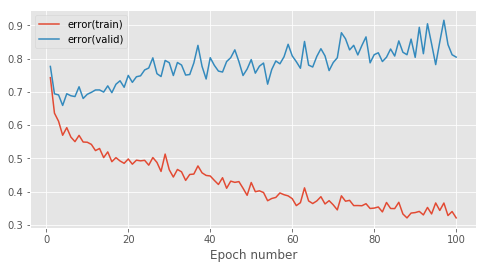

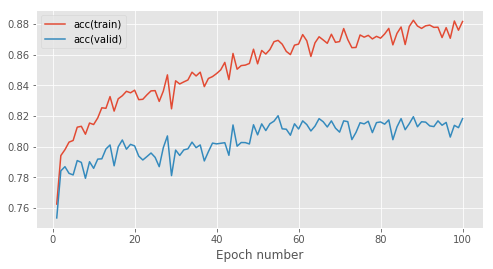

In [11]:
#Momentum Learning Rule
from mlp.layers import AffineLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule, RMSPropLearningRule, MomentumLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = UniformInit(-np.sqrt(3/(input_dim)), np.sqrt(3/(input_dim)),rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = MomentumLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/13_error_leaky_relu_2hls_fanin_momentum", "../results/13_accuracy_leaky_relu_2hls_fanin_momentum", "../results/13_stats_leaky_relu_2hls_fanin_momentum.csv", notebook=True)

learning rule = 0.01

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 3.2s to complete
    error(train)=1.23e+00, acc(train)=6.48e-01, error(valid)=1.24e+00, acc(valid)=6.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 3.4s to complete
    error(train)=8.51e-01, acc(train)=7.46e-01, error(valid)=8.62e-01, acc(valid)=7.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 3.4s to complete
    error(train)=6.92e-01, acc(train)=7.85e-01, error(valid)=7.10e-01, acc(valid)=7.78e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 3.2s to complete
    error(train)=6.24e-01, acc(train)=8.01e-01, error(valid)=6.51e-01, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 3.1s to complete
    error(train)=5.78e-01, acc(train)=8.14e-01, error(valid)=6.14e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 3.4s to complete
    error(train)=5.29e-01, acc(train)=8.28e-01, error(valid)=5.75e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 3.4s to complete
    error(train)=4.98e-01, acc(train)=8.36e-01, error(valid)=5.54e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 3.3s to complete
    error(train)=4.76e-01, acc(train)=8.40e-01, error(valid)=5.36e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 3.5s to complete
    error(train)=4.67e-01, acc(train)=8.44e-01, error(valid)=5.37e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 3.5s to complete
    error(train)=4.39e-01, acc(train)=8.53e-01, error(valid)=5.16e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 3.2s to complete
    error(train)=4.32e-01, acc(train)=8.54e-01, error(valid)=5.17e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 3.2s to complete
    error(train)=4.12e-01, acc(train)=8.60e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 3.4s to complete
    error(train)=4.06e-01, acc(train)=8.61e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 3.1s to complete
    error(train)=4.03e-01, acc(train)=8.62e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 3.5s to complete
    error(train)=3.83e-01, acc(train)=8.68e-01, error(valid)=4.91e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 3.3s to complete
    error(train)=3.79e-01, acc(train)=8.67e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 3.1s to complete
    error(train)=3.71e-01, acc(train)=8.70e-01, error(valid)=4.99e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 3.2s to complete
    error(train)=3.59e-01, acc(train)=8.75e-01, error(valid)=4.88e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 3.2s to complete
    error(train)=3.48e-01, acc(train)=8.77e-01, error(valid)=4.90e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 3.7s to complete
    error(train)=3.46e-01, acc(train)=8.78e-01, error(valid)=4.81e-01, acc(valid)=8.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 3.2s to complete
    error(train)=3.46e-01, acc(train)=8.77e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 3.3s to complete
    error(train)=3.42e-01, acc(train)=8.79e-01, error(valid)=4.98e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 3.5s to complete
    error(train)=3.33e-01, acc(train)=8.81e-01, error(valid)=4.90e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 3.5s to complete
    error(train)=3.26e-01, acc(train)=8.83e-01, error(valid)=4.97e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 2.9s to complete
    error(train)=3.26e-01, acc(train)=8.82e-01, error(valid)=4.95e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 3.4s to complete
    error(train)=3.11e-01, acc(train)=8.88e-01, error(valid)=4.94e-01, acc(valid)=8.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 3.4s to complete
    error(train)=3.19e-01, acc(train)=8.86e-01, error(valid)=5.06e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 3.4s to complete
    error(train)=3.04e-01, acc(train)=8.90e-01, error(valid)=4.96e-01, acc(valid)=8.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 3.0s to complete
    error(train)=2.95e-01, acc(train)=8.93e-01, error(valid)=4.95e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 3.1s to complete
    error(train)=2.93e-01, acc(train)=8.93e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 3.3s to complete
    error(train)=3.02e-01, acc(train)=8.90e-01, error(valid)=5.15e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 3.3s to complete
    error(train)=2.98e-01, acc(train)=8.90e-01, error(valid)=5.10e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 3.2s to complete
    error(train)=2.95e-01, acc(train)=8.91e-01, error(valid)=5.16e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 3.5s to complete
    error(train)=2.90e-01, acc(train)=8.94e-01, error(valid)=5.22e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 4.1s to complete
    error(train)=2.76e-01, acc(train)=8.97e-01, error(valid)=5.12e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 3.4s to complete
    error(train)=2.78e-01, acc(train)=8.96e-01, error(valid)=5.16e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 3.3s to complete
    error(train)=2.69e-01, acc(train)=9.01e-01, error(valid)=5.20e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 3.4s to complete
    error(train)=2.67e-01, acc(train)=9.00e-01, error(valid)=5.22e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 3.3s to complete
    error(train)=2.76e-01, acc(train)=8.95e-01, error(valid)=5.33e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 3.2s to complete
    error(train)=2.78e-01, acc(train)=8.95e-01, error(valid)=5.49e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 3.5s to complete
    error(train)=2.57e-01, acc(train)=9.04e-01, error(valid)=5.34e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 3.3s to complete
    error(train)=2.60e-01, acc(train)=9.03e-01, error(valid)=5.42e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 3.3s to complete
    error(train)=2.50e-01, acc(train)=9.07e-01, error(valid)=5.38e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 3.5s to complete
    error(train)=2.47e-01, acc(train)=9.09e-01, error(valid)=5.42e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 3.4s to complete
    error(train)=2.55e-01, acc(train)=9.03e-01, error(valid)=5.50e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 3.5s to complete
    error(train)=2.57e-01, acc(train)=9.03e-01, error(valid)=5.61e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 3.4s to complete
    error(train)=2.43e-01, acc(train)=9.10e-01, error(valid)=5.55e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 3.5s to complete
    error(train)=2.42e-01, acc(train)=9.09e-01, error(valid)=5.59e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 4.0s to complete
    error(train)=2.50e-01, acc(train)=9.06e-01, error(valid)=5.75e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 4.2s to complete
    error(train)=2.36e-01, acc(train)=9.10e-01, error(valid)=5.66e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 4.0s to complete
    error(train)=2.40e-01, acc(train)=9.07e-01, error(valid)=5.75e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 3.4s to complete
    error(train)=2.33e-01, acc(train)=9.12e-01, error(valid)=5.78e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 4.0s to complete
    error(train)=2.36e-01, acc(train)=9.10e-01, error(valid)=5.81e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 3.2s to complete
    error(train)=2.26e-01, acc(train)=9.14e-01, error(valid)=5.83e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 3.2s to complete
    error(train)=2.24e-01, acc(train)=9.14e-01, error(valid)=5.86e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 3.5s to complete
    error(train)=2.25e-01, acc(train)=9.13e-01, error(valid)=5.96e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 3.4s to complete
    error(train)=2.19e-01, acc(train)=9.17e-01, error(valid)=5.94e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 3.4s to complete
    error(train)=2.19e-01, acc(train)=9.16e-01, error(valid)=5.92e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 3.6s to complete
    error(train)=2.11e-01, acc(train)=9.19e-01, error(valid)=5.89e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 3.4s to complete
    error(train)=2.12e-01, acc(train)=9.19e-01, error(valid)=6.00e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 3.5s to complete
    error(train)=2.17e-01, acc(train)=9.15e-01, error(valid)=6.15e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 3.6s to complete
    error(train)=2.20e-01, acc(train)=9.13e-01, error(valid)=6.23e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 3.3s to complete
    error(train)=2.27e-01, acc(train)=9.11e-01, error(valid)=6.41e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 3.4s to complete
    error(train)=2.04e-01, acc(train)=9.22e-01, error(valid)=6.26e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 3.5s to complete
    error(train)=2.15e-01, acc(train)=9.16e-01, error(valid)=6.34e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 3.3s to complete
    error(train)=2.01e-01, acc(train)=9.22e-01, error(valid)=6.35e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 3.5s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=6.52e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 3.3s to complete
    error(train)=2.12e-01, acc(train)=9.18e-01, error(valid)=6.64e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 3.5s to complete
    error(train)=2.11e-01, acc(train)=9.18e-01, error(valid)=6.71e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 3.4s to complete
    error(train)=1.91e-01, acc(train)=9.26e-01, error(valid)=6.48e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 3.4s to complete
    error(train)=2.10e-01, acc(train)=9.17e-01, error(valid)=6.74e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 3.6s to complete
    error(train)=2.06e-01, acc(train)=9.20e-01, error(valid)=6.88e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 3.5s to complete
    error(train)=1.98e-01, acc(train)=9.23e-01, error(valid)=6.72e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 4.3s to complete
    error(train)=2.01e-01, acc(train)=9.22e-01, error(valid)=6.88e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 3.6s to complete
    error(train)=1.96e-01, acc(train)=9.22e-01, error(valid)=6.81e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 3.5s to complete
    error(train)=1.91e-01, acc(train)=9.23e-01, error(valid)=6.97e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 3.8s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=6.90e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 3.5s to complete
    error(train)=1.90e-01, acc(train)=9.25e-01, error(valid)=7.00e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 3.6s to complete
    error(train)=1.87e-01, acc(train)=9.27e-01, error(valid)=6.95e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 3.4s to complete
    error(train)=1.90e-01, acc(train)=9.25e-01, error(valid)=7.17e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 3.4s to complete
    error(train)=1.91e-01, acc(train)=9.21e-01, error(valid)=7.19e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 3.4s to complete
    error(train)=1.94e-01, acc(train)=9.23e-01, error(valid)=7.29e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 3.2s to complete
    error(train)=1.77e-01, acc(train)=9.30e-01, error(valid)=7.17e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 3.3s to complete
    error(train)=1.91e-01, acc(train)=9.24e-01, error(valid)=7.38e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 3.5s to complete
    error(train)=1.87e-01, acc(train)=9.26e-01, error(valid)=7.49e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 3.4s to complete
    error(train)=1.80e-01, acc(train)=9.28e-01, error(valid)=7.38e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 3.6s to complete
    error(train)=1.86e-01, acc(train)=9.26e-01, error(valid)=7.57e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 3.6s to complete
    error(train)=1.92e-01, acc(train)=9.22e-01, error(valid)=7.80e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 3.4s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=7.61e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 3.4s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=7.62e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 3.3s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=7.78e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 3.4s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=7.87e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 3.4s to complete
    error(train)=1.72e-01, acc(train)=9.32e-01, error(valid)=7.76e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 3.5s to complete
    error(train)=1.83e-01, acc(train)=9.27e-01, error(valid)=8.03e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 3.3s to complete
    error(train)=1.77e-01, acc(train)=9.28e-01, error(valid)=8.00e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 3.3s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=8.12e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 3.6s to complete
    error(train)=1.76e-01, acc(train)=9.29e-01, error(valid)=8.13e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 3.1s to complete
    error(train)=1.76e-01, acc(train)=9.30e-01, error(valid)=8.15e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 3.6s to complete
    error(train)=1.77e-01, acc(train)=9.28e-01, error(valid)=8.28e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 3.1s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=8.32e-01, acc(valid)=8.21e-01


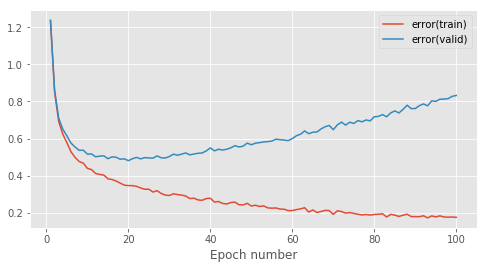

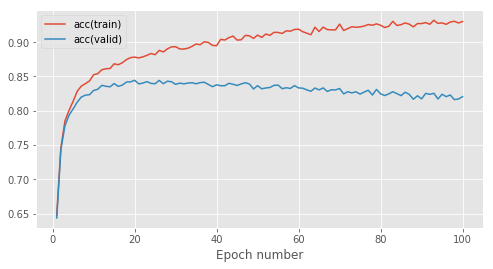

In [12]:
#Momentum Learning Rule
from mlp.layers import AffineLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule, RMSPropLearningRule, MomentumLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.01
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = UniformInit(-np.sqrt(3/(input_dim)), np.sqrt(3/(input_dim)),rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = MomentumLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/14_error_leaky_relu_2hls_fanin_momentum_2", "../results/14_accuracy_leaky_relu_2hls_fanin_momentum_2", "../results/14_stats_leaky_relu_2hls_fanin_momentum_2.csv", notebook=True)


learning rule = 0.0001

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 3.7s to complete
    error(train)=3.85e+00, acc(train)=3.33e-02, error(valid)=3.85e+00, acc(valid)=3.47e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 3.2s to complete
    error(train)=3.85e+00, acc(train)=4.02e-02, error(valid)=3.85e+00, acc(valid)=4.14e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 3.4s to complete
    error(train)=3.84e+00, acc(train)=4.80e-02, error(valid)=3.84e+00, acc(valid)=4.79e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 3.4s to complete
    error(train)=3.84e+00, acc(train)=5.64e-02, error(valid)=3.84e+00, acc(valid)=5.68e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 3.2s to complete
    error(train)=3.84e+00, acc(train)=6.48e-02, error(valid)=3.84e+00, acc(valid)=6.47e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 3.5s to complete
    error(train)=3.83e+00, acc(train)=7.22e-02, error(valid)=3.83e+00, acc(valid)=7.31e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 3.4s to complete
    error(train)=3.83e+00, acc(train)=7.96e-02, error(valid)=3.83e+00, acc(valid)=8.01e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 3.5s to complete
    error(train)=3.82e+00, acc(train)=8.54e-02, error(valid)=3.82e+00, acc(valid)=8.51e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 3.2s to complete
    error(train)=3.82e+00, acc(train)=8.97e-02, error(valid)=3.82e+00, acc(valid)=9.10e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 3.5s to complete
    error(train)=3.81e+00, acc(train)=9.30e-02, error(valid)=3.81e+00, acc(valid)=9.44e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 3.5s to complete
    error(train)=3.79e+00, acc(train)=9.61e-02, error(valid)=3.80e+00, acc(valid)=9.68e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 3.5s to complete
    error(train)=3.78e+00, acc(train)=9.99e-02, error(valid)=3.78e+00, acc(valid)=9.92e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 3.5s to complete
    error(train)=3.76e+00, acc(train)=1.05e-01, error(valid)=3.76e+00, acc(valid)=1.07e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 3.6s to complete
    error(train)=3.73e+00, acc(train)=1.11e-01, error(valid)=3.74e+00, acc(valid)=1.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 3.3s to complete
    error(train)=3.70e+00, acc(train)=1.15e-01, error(valid)=3.70e+00, acc(valid)=1.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 3.2s to complete
    error(train)=3.66e+00, acc(train)=1.19e-01, error(valid)=3.66e+00, acc(valid)=1.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 3.2s to complete
    error(train)=3.61e+00, acc(train)=1.30e-01, error(valid)=3.61e+00, acc(valid)=1.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 3.0s to complete
    error(train)=3.54e+00, acc(train)=1.44e-01, error(valid)=3.54e+00, acc(valid)=1.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 3.3s to complete
    error(train)=3.47e+00, acc(train)=1.62e-01, error(valid)=3.47e+00, acc(valid)=1.59e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 2.9s to complete
    error(train)=3.38e+00, acc(train)=1.89e-01, error(valid)=3.38e+00, acc(valid)=1.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 3.2s to complete
    error(train)=3.28e+00, acc(train)=2.28e-01, error(valid)=3.28e+00, acc(valid)=2.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 3.3s to complete
    error(train)=3.17e+00, acc(train)=2.65e-01, error(valid)=3.17e+00, acc(valid)=2.64e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 3.0s to complete
    error(train)=3.05e+00, acc(train)=2.98e-01, error(valid)=3.05e+00, acc(valid)=3.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 3.3s to complete
    error(train)=2.92e+00, acc(train)=3.22e-01, error(valid)=2.92e+00, acc(valid)=3.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 3.1s to complete
    error(train)=2.80e+00, acc(train)=3.41e-01, error(valid)=2.80e+00, acc(valid)=3.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 3.1s to complete
    error(train)=2.69e+00, acc(train)=3.60e-01, error(valid)=2.68e+00, acc(valid)=3.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 3.2s to complete
    error(train)=2.58e+00, acc(train)=3.76e-01, error(valid)=2.57e+00, acc(valid)=3.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 3.3s to complete
    error(train)=2.48e+00, acc(train)=3.95e-01, error(valid)=2.48e+00, acc(valid)=3.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 3.5s to complete
    error(train)=2.39e+00, acc(train)=4.10e-01, error(valid)=2.38e+00, acc(valid)=4.07e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 3.3s to complete
    error(train)=2.30e+00, acc(train)=4.25e-01, error(valid)=2.30e+00, acc(valid)=4.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 3.1s to complete
    error(train)=2.23e+00, acc(train)=4.39e-01, error(valid)=2.23e+00, acc(valid)=4.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 3.1s to complete
    error(train)=2.16e+00, acc(train)=4.54e-01, error(valid)=2.16e+00, acc(valid)=4.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 2.7s to complete
    error(train)=2.09e+00, acc(train)=4.66e-01, error(valid)=2.09e+00, acc(valid)=4.64e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 3.4s to complete
    error(train)=2.03e+00, acc(train)=4.77e-01, error(valid)=2.03e+00, acc(valid)=4.74e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 3.2s to complete
    error(train)=1.98e+00, acc(train)=4.88e-01, error(valid)=1.98e+00, acc(valid)=4.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 2.9s to complete
    error(train)=1.93e+00, acc(train)=4.97e-01, error(valid)=1.93e+00, acc(valid)=4.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 3.2s to complete
    error(train)=1.88e+00, acc(train)=5.08e-01, error(valid)=1.88e+00, acc(valid)=5.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 3.0s to complete
    error(train)=1.84e+00, acc(train)=5.18e-01, error(valid)=1.84e+00, acc(valid)=5.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 3.1s to complete
    error(train)=1.80e+00, acc(train)=5.23e-01, error(valid)=1.80e+00, acc(valid)=5.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 2.9s to complete
    error(train)=1.76e+00, acc(train)=5.33e-01, error(valid)=1.76e+00, acc(valid)=5.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 2.9s to complete
    error(train)=1.73e+00, acc(train)=5.38e-01, error(valid)=1.73e+00, acc(valid)=5.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 3.0s to complete
    error(train)=1.70e+00, acc(train)=5.45e-01, error(valid)=1.70e+00, acc(valid)=5.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 3.1s to complete
    error(train)=1.67e+00, acc(train)=5.50e-01, error(valid)=1.67e+00, acc(valid)=5.47e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 3.1s to complete
    error(train)=1.64e+00, acc(train)=5.56e-01, error(valid)=1.64e+00, acc(valid)=5.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 3.0s to complete
    error(train)=1.62e+00, acc(train)=5.60e-01, error(valid)=1.62e+00, acc(valid)=5.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 3.0s to complete
    error(train)=1.59e+00, acc(train)=5.66e-01, error(valid)=1.60e+00, acc(valid)=5.62e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 3.2s to complete
    error(train)=1.57e+00, acc(train)=5.70e-01, error(valid)=1.57e+00, acc(valid)=5.66e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 3.2s to complete
    error(train)=1.55e+00, acc(train)=5.74e-01, error(valid)=1.55e+00, acc(valid)=5.71e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 3.3s to complete
    error(train)=1.53e+00, acc(train)=5.79e-01, error(valid)=1.54e+00, acc(valid)=5.76e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 3.0s to complete
    error(train)=1.52e+00, acc(train)=5.82e-01, error(valid)=1.52e+00, acc(valid)=5.78e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 3.0s to complete
    error(train)=1.50e+00, acc(train)=5.86e-01, error(valid)=1.50e+00, acc(valid)=5.82e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 3.1s to complete
    error(train)=1.48e+00, acc(train)=5.89e-01, error(valid)=1.49e+00, acc(valid)=5.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 3.0s to complete
    error(train)=1.47e+00, acc(train)=5.92e-01, error(valid)=1.47e+00, acc(valid)=5.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 3.1s to complete
    error(train)=1.46e+00, acc(train)=5.95e-01, error(valid)=1.46e+00, acc(valid)=5.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 3.1s to complete
    error(train)=1.44e+00, acc(train)=5.99e-01, error(valid)=1.45e+00, acc(valid)=5.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 2.9s to complete
    error(train)=1.43e+00, acc(train)=6.01e-01, error(valid)=1.43e+00, acc(valid)=5.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 2.9s to complete
    error(train)=1.42e+00, acc(train)=6.04e-01, error(valid)=1.42e+00, acc(valid)=5.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 3.0s to complete
    error(train)=1.41e+00, acc(train)=6.06e-01, error(valid)=1.41e+00, acc(valid)=6.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 3.4s to complete
    error(train)=1.40e+00, acc(train)=6.09e-01, error(valid)=1.40e+00, acc(valid)=6.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 3.0s to complete
    error(train)=1.39e+00, acc(train)=6.12e-01, error(valid)=1.39e+00, acc(valid)=6.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 2.9s to complete
    error(train)=1.38e+00, acc(train)=6.14e-01, error(valid)=1.38e+00, acc(valid)=6.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 3.5s to complete
    error(train)=1.37e+00, acc(train)=6.16e-01, error(valid)=1.37e+00, acc(valid)=6.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 3.3s to complete
    error(train)=1.36e+00, acc(train)=6.18e-01, error(valid)=1.37e+00, acc(valid)=6.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 2.9s to complete
    error(train)=1.36e+00, acc(train)=6.20e-01, error(valid)=1.36e+00, acc(valid)=6.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 3.1s to complete
    error(train)=1.35e+00, acc(train)=6.21e-01, error(valid)=1.35e+00, acc(valid)=6.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 3.2s to complete
    error(train)=1.34e+00, acc(train)=6.23e-01, error(valid)=1.34e+00, acc(valid)=6.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 3.1s to complete
    error(train)=1.33e+00, acc(train)=6.26e-01, error(valid)=1.34e+00, acc(valid)=6.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 3.2s to complete
    error(train)=1.33e+00, acc(train)=6.28e-01, error(valid)=1.33e+00, acc(valid)=6.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 3.2s to complete
    error(train)=1.32e+00, acc(train)=6.29e-01, error(valid)=1.32e+00, acc(valid)=6.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 3.2s to complete
    error(train)=1.31e+00, acc(train)=6.31e-01, error(valid)=1.32e+00, acc(valid)=6.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 3.2s to complete
    error(train)=1.31e+00, acc(train)=6.33e-01, error(valid)=1.31e+00, acc(valid)=6.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 3.0s to complete
    error(train)=1.30e+00, acc(train)=6.34e-01, error(valid)=1.30e+00, acc(valid)=6.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 3.2s to complete
    error(train)=1.29e+00, acc(train)=6.36e-01, error(valid)=1.30e+00, acc(valid)=6.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 3.2s to complete
    error(train)=1.29e+00, acc(train)=6.37e-01, error(valid)=1.29e+00, acc(valid)=6.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 3.3s to complete
    error(train)=1.28e+00, acc(train)=6.39e-01, error(valid)=1.29e+00, acc(valid)=6.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 3.3s to complete
    error(train)=1.28e+00, acc(train)=6.41e-01, error(valid)=1.28e+00, acc(valid)=6.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 2.8s to complete
    error(train)=1.27e+00, acc(train)=6.42e-01, error(valid)=1.28e+00, acc(valid)=6.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 3.1s to complete
    error(train)=1.27e+00, acc(train)=6.43e-01, error(valid)=1.27e+00, acc(valid)=6.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 3.1s to complete
    error(train)=1.26e+00, acc(train)=6.45e-01, error(valid)=1.26e+00, acc(valid)=6.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 3.0s to complete
    error(train)=1.25e+00, acc(train)=6.47e-01, error(valid)=1.26e+00, acc(valid)=6.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 3.3s to complete
    error(train)=1.25e+00, acc(train)=6.49e-01, error(valid)=1.25e+00, acc(valid)=6.45e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 3.0s to complete
    error(train)=1.24e+00, acc(train)=6.50e-01, error(valid)=1.25e+00, acc(valid)=6.45e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 2.9s to complete
    error(train)=1.24e+00, acc(train)=6.51e-01, error(valid)=1.24e+00, acc(valid)=6.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 3.5s to complete
    error(train)=1.23e+00, acc(train)=6.52e-01, error(valid)=1.24e+00, acc(valid)=6.49e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 3.3s to complete
    error(train)=1.23e+00, acc(train)=6.54e-01, error(valid)=1.23e+00, acc(valid)=6.48e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 3.3s to complete
    error(train)=1.22e+00, acc(train)=6.55e-01, error(valid)=1.23e+00, acc(valid)=6.50e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 3.2s to complete
    error(train)=1.22e+00, acc(train)=6.57e-01, error(valid)=1.22e+00, acc(valid)=6.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 3.3s to complete
    error(train)=1.21e+00, acc(train)=6.57e-01, error(valid)=1.22e+00, acc(valid)=6.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 2.9s to complete
    error(train)=1.21e+00, acc(train)=6.60e-01, error(valid)=1.21e+00, acc(valid)=6.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 3.3s to complete
    error(train)=1.20e+00, acc(train)=6.61e-01, error(valid)=1.21e+00, acc(valid)=6.58e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 3.2s to complete
    error(train)=1.20e+00, acc(train)=6.63e-01, error(valid)=1.20e+00, acc(valid)=6.58e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 3.3s to complete
    error(train)=1.19e+00, acc(train)=6.64e-01, error(valid)=1.20e+00, acc(valid)=6.59e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 3.0s to complete
    error(train)=1.19e+00, acc(train)=6.64e-01, error(valid)=1.20e+00, acc(valid)=6.61e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 3.3s to complete
    error(train)=1.18e+00, acc(train)=6.66e-01, error(valid)=1.19e+00, acc(valid)=6.61e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 3.5s to complete
    error(train)=1.18e+00, acc(train)=6.66e-01, error(valid)=1.19e+00, acc(valid)=6.64e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 2.9s to complete
    error(train)=1.18e+00, acc(train)=6.69e-01, error(valid)=1.18e+00, acc(valid)=6.65e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 3.3s to complete
    error(train)=1.17e+00, acc(train)=6.70e-01, error(valid)=1.18e+00, acc(valid)=6.65e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 3.1s to complete
    error(train)=1.17e+00, acc(train)=6.69e-01, error(valid)=1.17e+00, acc(valid)=6.66e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 3.1s to complete
    error(train)=1.16e+00, acc(train)=6.71e-01, error(valid)=1.17e+00, acc(valid)=6.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 3.1s to complete
    error(train)=1.16e+00, acc(train)=6.72e-01, error(valid)=1.16e+00, acc(valid)=6.69e-01


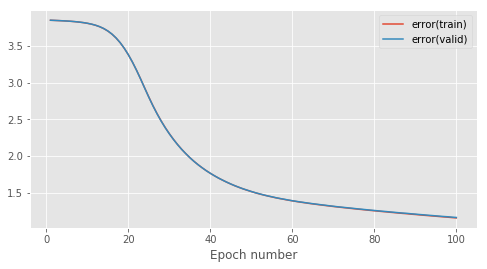

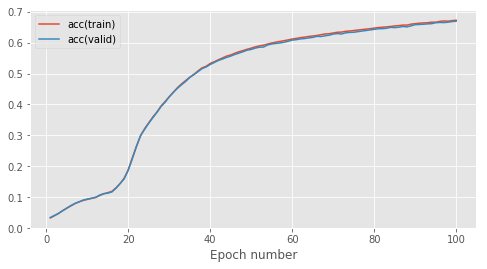

In [13]:
#Momentum Learning Rule
from mlp.layers import AffineLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule, RMSPropLearningRule, MomentumLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.0001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = UniformInit(-np.sqrt(3/(input_dim)), np.sqrt(3/(input_dim)),rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = MomentumLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/15_error_leaky_relu_2hls_fanin_momentum_3", "../results/15_accuracy_leaky_relu_2hls_fanin_momentum_3", "../results/15_stats_leaky_relu_2hls_fanin_momentum_3.csv", notebook=True)

RMSProp

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 4.0s to complete
    error(train)=1.19e+00, acc(train)=6.44e-01, error(valid)=1.19e+00, acc(valid)=6.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 3.8s to complete
    error(train)=8.52e-01, acc(train)=7.42e-01, error(valid)=8.67e-01, acc(valid)=7.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 3.9s to complete
    error(train)=6.97e-01, acc(train)=7.82e-01, error(valid)=7.16e-01, acc(valid)=7.74e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 4.2s to complete
    error(train)=6.09e-01, acc(train)=8.07e-01, error(valid)=6.37e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 4.1s to complete
    error(train)=5.89e-01, acc(train)=8.03e-01, error(valid)=6.25e-01, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 3.8s to complete
    error(train)=5.18e-01, acc(train)=8.30e-01, error(valid)=5.64e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 3.8s to complete
    error(train)=5.15e-01, acc(train)=8.27e-01, error(valid)=5.66e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 4.0s to complete
    error(train)=4.72e-01, acc(train)=8.43e-01, error(valid)=5.28e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 4.2s to complete
    error(train)=4.54e-01, acc(train)=8.47e-01, error(valid)=5.22e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 3.7s to complete
    error(train)=4.57e-01, acc(train)=8.45e-01, error(valid)=5.29e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 3.9s to complete
    error(train)=4.34e-01, acc(train)=8.51e-01, error(valid)=5.14e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 3.7s to complete
    error(train)=4.11e-01, acc(train)=8.62e-01, error(valid)=4.93e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 4.0s to complete
    error(train)=4.03e-01, acc(train)=8.62e-01, error(valid)=4.93e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 4.1s to complete
    error(train)=3.91e-01, acc(train)=8.64e-01, error(valid)=4.88e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 4.1s to complete
    error(train)=3.80e-01, acc(train)=8.66e-01, error(valid)=4.87e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 4.1s to complete
    error(train)=3.77e-01, acc(train)=8.66e-01, error(valid)=4.91e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 4.1s to complete
    error(train)=3.61e-01, acc(train)=8.73e-01, error(valid)=4.83e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 3.8s to complete
    error(train)=3.62e-01, acc(train)=8.69e-01, error(valid)=4.87e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 3.9s to complete
    error(train)=3.55e-01, acc(train)=8.72e-01, error(valid)=4.87e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 4.0s to complete
    error(train)=3.52e-01, acc(train)=8.74e-01, error(valid)=4.88e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 4.1s to complete
    error(train)=3.39e-01, acc(train)=8.79e-01, error(valid)=4.82e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 3.8s to complete
    error(train)=3.38e-01, acc(train)=8.79e-01, error(valid)=4.89e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 4.1s to complete
    error(train)=3.29e-01, acc(train)=8.82e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 4.1s to complete
    error(train)=3.27e-01, acc(train)=8.84e-01, error(valid)=4.88e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 3.7s to complete
    error(train)=3.19e-01, acc(train)=8.85e-01, error(valid)=4.85e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 3.8s to complete
    error(train)=3.12e-01, acc(train)=8.88e-01, error(valid)=4.83e-01, acc(valid)=8.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 4.0s to complete
    error(train)=3.07e-01, acc(train)=8.88e-01, error(valid)=4.88e-01, acc(valid)=8.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 3.9s to complete
    error(train)=3.09e-01, acc(train)=8.86e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 3.6s to complete
    error(train)=3.10e-01, acc(train)=8.84e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 3.8s to complete
    error(train)=2.94e-01, acc(train)=8.92e-01, error(valid)=4.93e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 4.0s to complete
    error(train)=3.19e-01, acc(train)=8.80e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 3.8s to complete
    error(train)=2.77e-01, acc(train)=9.00e-01, error(valid)=4.91e-01, acc(valid)=8.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 3.5s to complete
    error(train)=2.89e-01, acc(train)=8.90e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 3.9s to complete
    error(train)=2.87e-01, acc(train)=8.92e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 4.0s to complete
    error(train)=2.69e-01, acc(train)=8.99e-01, error(valid)=5.00e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 3.7s to complete
    error(train)=2.71e-01, acc(train)=8.99e-01, error(valid)=5.02e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 3.8s to complete
    error(train)=2.80e-01, acc(train)=8.92e-01, error(valid)=5.23e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 4.1s to complete
    error(train)=2.73e-01, acc(train)=8.98e-01, error(valid)=5.19e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 4.8s to complete
    error(train)=2.73e-01, acc(train)=8.97e-01, error(valid)=5.19e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 4.2s to complete
    error(train)=2.55e-01, acc(train)=9.05e-01, error(valid)=5.20e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 4.7s to complete
    error(train)=2.59e-01, acc(train)=9.03e-01, error(valid)=5.23e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 4.0s to complete
    error(train)=2.61e-01, acc(train)=9.01e-01, error(valid)=5.32e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 4.0s to complete
    error(train)=2.52e-01, acc(train)=9.05e-01, error(valid)=5.29e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 3.8s to complete
    error(train)=2.59e-01, acc(train)=9.00e-01, error(valid)=5.46e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 4.1s to complete
    error(train)=2.51e-01, acc(train)=9.04e-01, error(valid)=5.47e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 3.9s to complete
    error(train)=2.47e-01, acc(train)=9.06e-01, error(valid)=5.40e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 4.3s to complete
    error(train)=2.51e-01, acc(train)=9.04e-01, error(valid)=5.51e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 4.0s to complete
    error(train)=2.44e-01, acc(train)=9.06e-01, error(valid)=5.57e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 3.5s to complete
    error(train)=2.38e-01, acc(train)=9.09e-01, error(valid)=5.47e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 3.8s to complete
    error(train)=2.32e-01, acc(train)=9.11e-01, error(valid)=5.52e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 3.9s to complete
    error(train)=2.32e-01, acc(train)=9.11e-01, error(valid)=5.62e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 4.2s to complete
    error(train)=2.44e-01, acc(train)=9.03e-01, error(valid)=5.78e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 3.9s to complete
    error(train)=2.22e-01, acc(train)=9.15e-01, error(valid)=5.56e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 3.9s to complete
    error(train)=2.24e-01, acc(train)=9.14e-01, error(valid)=5.68e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 3.8s to complete
    error(train)=2.25e-01, acc(train)=9.13e-01, error(valid)=5.78e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 4.0s to complete
    error(train)=2.21e-01, acc(train)=9.14e-01, error(valid)=5.65e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 3.6s to complete
    error(train)=2.21e-01, acc(train)=9.14e-01, error(valid)=5.83e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 3.6s to complete
    error(train)=2.34e-01, acc(train)=9.09e-01, error(valid)=6.00e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 4.0s to complete
    error(train)=2.28e-01, acc(train)=9.12e-01, error(valid)=6.08e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 4.1s to complete
    error(train)=2.14e-01, acc(train)=9.16e-01, error(valid)=5.86e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 4.1s to complete
    error(train)=2.20e-01, acc(train)=9.14e-01, error(valid)=6.07e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 4.2s to complete
    error(train)=2.10e-01, acc(train)=9.18e-01, error(valid)=6.07e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 4.0s to complete
    error(train)=2.22e-01, acc(train)=9.13e-01, error(valid)=6.20e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 4.1s to complete
    error(train)=2.13e-01, acc(train)=9.16e-01, error(valid)=6.20e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 4.4s to complete
    error(train)=2.17e-01, acc(train)=9.16e-01, error(valid)=6.32e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 3.9s to complete
    error(train)=2.29e-01, acc(train)=9.07e-01, error(valid)=6.45e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 4.0s to complete
    error(train)=2.14e-01, acc(train)=9.16e-01, error(valid)=6.47e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 4.2s to complete
    error(train)=2.15e-01, acc(train)=9.15e-01, error(valid)=6.47e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 4.0s to complete
    error(train)=2.08e-01, acc(train)=9.17e-01, error(valid)=6.37e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 4.1s to complete
    error(train)=2.05e-01, acc(train)=9.19e-01, error(valid)=6.47e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 4.1s to complete
    error(train)=1.96e-01, acc(train)=9.23e-01, error(valid)=6.51e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 4.2s to complete
    error(train)=1.97e-01, acc(train)=9.24e-01, error(valid)=6.45e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 4.0s to complete
    error(train)=2.06e-01, acc(train)=9.19e-01, error(valid)=6.76e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 3.9s to complete
    error(train)=1.89e-01, acc(train)=9.25e-01, error(valid)=6.51e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 4.2s to complete
    error(train)=1.96e-01, acc(train)=9.23e-01, error(valid)=6.72e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 3.9s to complete
    error(train)=1.93e-01, acc(train)=9.23e-01, error(valid)=6.77e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 4.0s to complete
    error(train)=1.93e-01, acc(train)=9.23e-01, error(valid)=6.76e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 4.4s to complete
    error(train)=1.87e-01, acc(train)=9.25e-01, error(valid)=6.87e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 4.1s to complete
    error(train)=1.87e-01, acc(train)=9.26e-01, error(valid)=6.79e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 4.1s to complete
    error(train)=1.80e-01, acc(train)=9.29e-01, error(valid)=6.83e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 4.3s to complete
    error(train)=1.88e-01, acc(train)=9.25e-01, error(valid)=7.03e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 3.8s to complete
    error(train)=1.78e-01, acc(train)=9.30e-01, error(valid)=7.00e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 3.9s to complete
    error(train)=2.10e-01, acc(train)=9.16e-01, error(valid)=7.42e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 3.9s to complete
    error(train)=1.87e-01, acc(train)=9.22e-01, error(valid)=7.16e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 4.0s to complete
    error(train)=1.81e-01, acc(train)=9.28e-01, error(valid)=7.20e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 4.1s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=7.23e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 3.8s to complete
    error(train)=1.80e-01, acc(train)=9.28e-01, error(valid)=7.31e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 4.0s to complete
    error(train)=1.97e-01, acc(train)=9.21e-01, error(valid)=7.47e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 3.7s to complete
    error(train)=1.89e-01, acc(train)=9.23e-01, error(valid)=7.50e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 4.2s to complete
    error(train)=1.89e-01, acc(train)=9.23e-01, error(valid)=7.52e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 3.9s to complete
    error(train)=1.80e-01, acc(train)=9.28e-01, error(valid)=7.49e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 4.0s to complete
    error(train)=1.80e-01, acc(train)=9.27e-01, error(valid)=7.47e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 4.1s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=7.58e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 4.0s to complete
    error(train)=1.70e-01, acc(train)=9.32e-01, error(valid)=7.59e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 3.9s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=7.77e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 4.2s to complete
    error(train)=1.79e-01, acc(train)=9.28e-01, error(valid)=7.68e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 4.2s to complete
    error(train)=1.87e-01, acc(train)=9.25e-01, error(valid)=7.98e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 4.5s to complete
    error(train)=1.90e-01, acc(train)=9.25e-01, error(valid)=8.19e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 3.9s to complete
    error(train)=1.77e-01, acc(train)=9.28e-01, error(valid)=8.14e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 4.2s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=8.09e-01, acc(valid)=8.20e-01


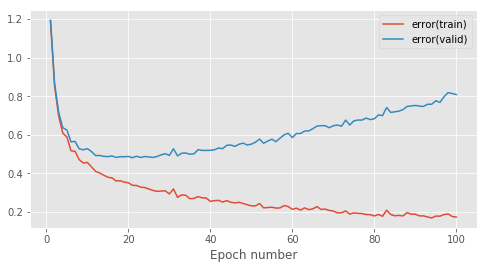

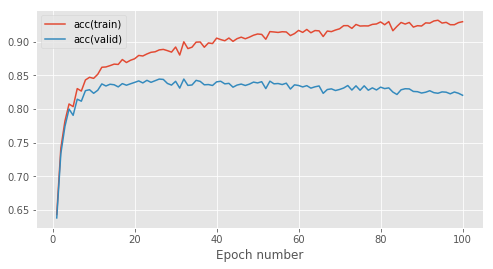

In [14]:
#RMSProp Learning Rule
from mlp.layers import AffineLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule, RMSPropLearningRule, MomentumLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = UniformInit(-np.sqrt(3/(input_dim)), np.sqrt(3/(input_dim)),rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = RMSPropLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/16_error_leaky_relu_2hls_fanin_rmsprop", "../results/16_accuracy_leaky_relu_2hls_fanin_rmsprop", "../results/16_stats_leaky_relu_2hls_fanin_rmsprop.csv", notebook=True)

learning rule = 0.01

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 4.3s to complete
    error(train)=3.81e+00, acc(train)=9.44e-02, error(valid)=3.81e+00, acc(valid)=9.92e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 3.8s to complete
    error(train)=3.35e+00, acc(train)=2.01e-01, error(valid)=3.35e+00, acc(valid)=1.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 4.0s to complete
    error(train)=2.15e+00, acc(train)=4.38e-01, error(valid)=2.15e+00, acc(valid)=4.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 3.5s to complete
    error(train)=1.74e+00, acc(train)=5.28e-01, error(valid)=1.74e+00, acc(valid)=5.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 3.6s to complete
    error(train)=1.54e+00, acc(train)=5.75e-01, error(valid)=1.54e+00, acc(valid)=5.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 3.6s to complete
    error(train)=1.42e+00, acc(train)=6.04e-01, error(valid)=1.42e+00, acc(valid)=5.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 3.8s to complete
    error(train)=1.33e+00, acc(train)=6.27e-01, error(valid)=1.34e+00, acc(valid)=6.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 4.0s to complete
    error(train)=1.27e+00, acc(train)=6.43e-01, error(valid)=1.27e+00, acc(valid)=6.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 4.0s to complete
    error(train)=1.22e+00, acc(train)=6.56e-01, error(valid)=1.22e+00, acc(valid)=6.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 4.3s to complete
    error(train)=1.16e+00, acc(train)=6.68e-01, error(valid)=1.17e+00, acc(valid)=6.65e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 4.0s to complete
    error(train)=1.12e+00, acc(train)=6.80e-01, error(valid)=1.13e+00, acc(valid)=6.74e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 3.9s to complete
    error(train)=1.08e+00, acc(train)=6.92e-01, error(valid)=1.08e+00, acc(valid)=6.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 3.8s to complete
    error(train)=1.04e+00, acc(train)=7.01e-01, error(valid)=1.05e+00, acc(valid)=6.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 3.7s to complete
    error(train)=1.01e+00, acc(train)=7.08e-01, error(valid)=1.01e+00, acc(valid)=7.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 4.1s to complete
    error(train)=9.62e-01, acc(train)=7.22e-01, error(valid)=9.74e-01, acc(valid)=7.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 3.7s to complete
    error(train)=9.31e-01, acc(train)=7.29e-01, error(valid)=9.43e-01, acc(valid)=7.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 3.9s to complete
    error(train)=9.01e-01, acc(train)=7.38e-01, error(valid)=9.15e-01, acc(valid)=7.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 3.9s to complete
    error(train)=8.74e-01, acc(train)=7.44e-01, error(valid)=8.89e-01, acc(valid)=7.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 3.8s to complete
    error(train)=8.46e-01, acc(train)=7.51e-01, error(valid)=8.63e-01, acc(valid)=7.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 4.4s to complete
    error(train)=8.22e-01, acc(train)=7.57e-01, error(valid)=8.37e-01, acc(valid)=7.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 3.9s to complete
    error(train)=8.06e-01, acc(train)=7.58e-01, error(valid)=8.24e-01, acc(valid)=7.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 4.0s to complete
    error(train)=7.80e-01, acc(train)=7.66e-01, error(valid)=8.00e-01, acc(valid)=7.60e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 3.9s to complete
    error(train)=7.62e-01, acc(train)=7.72e-01, error(valid)=7.81e-01, acc(valid)=7.66e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 3.6s to complete
    error(train)=7.45e-01, acc(train)=7.77e-01, error(valid)=7.64e-01, acc(valid)=7.71e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 3.7s to complete
    error(train)=7.28e-01, acc(train)=7.81e-01, error(valid)=7.47e-01, acc(valid)=7.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 3.8s to complete
    error(train)=7.14e-01, acc(train)=7.84e-01, error(valid)=7.35e-01, acc(valid)=7.78e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 3.9s to complete
    error(train)=7.01e-01, acc(train)=7.89e-01, error(valid)=7.23e-01, acc(valid)=7.82e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 3.6s to complete
    error(train)=6.86e-01, acc(train)=7.92e-01, error(valid)=7.09e-01, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 3.8s to complete
    error(train)=6.78e-01, acc(train)=7.93e-01, error(valid)=7.02e-01, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 3.6s to complete
    error(train)=6.70e-01, acc(train)=7.94e-01, error(valid)=6.94e-01, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 4.3s to complete
    error(train)=6.55e-01, acc(train)=7.98e-01, error(valid)=6.82e-01, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 3.6s to complete
    error(train)=6.47e-01, acc(train)=8.01e-01, error(valid)=6.73e-01, acc(valid)=7.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 4.0s to complete
    error(train)=6.42e-01, acc(train)=8.03e-01, error(valid)=6.71e-01, acc(valid)=7.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 4.0s to complete
    error(train)=6.27e-01, acc(train)=8.06e-01, error(valid)=6.56e-01, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 4.4s to complete
    error(train)=6.21e-01, acc(train)=8.07e-01, error(valid)=6.52e-01, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 4.0s to complete
    error(train)=6.13e-01, acc(train)=8.10e-01, error(valid)=6.44e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 4.2s to complete
    error(train)=6.08e-01, acc(train)=8.09e-01, error(valid)=6.40e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 3.9s to complete
    error(train)=6.03e-01, acc(train)=8.12e-01, error(valid)=6.36e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 4.0s to complete
    error(train)=5.89e-01, acc(train)=8.16e-01, error(valid)=6.23e-01, acc(valid)=8.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 3.8s to complete
    error(train)=5.87e-01, acc(train)=8.15e-01, error(valid)=6.23e-01, acc(valid)=8.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 4.1s to complete
    error(train)=5.75e-01, acc(train)=8.20e-01, error(valid)=6.10e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 3.9s to complete
    error(train)=5.72e-01, acc(train)=8.21e-01, error(valid)=6.09e-01, acc(valid)=8.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 3.5s to complete
    error(train)=5.68e-01, acc(train)=8.21e-01, error(valid)=6.06e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 4.1s to complete
    error(train)=5.59e-01, acc(train)=8.24e-01, error(valid)=5.99e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 3.8s to complete
    error(train)=5.57e-01, acc(train)=8.23e-01, error(valid)=5.97e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 3.6s to complete
    error(train)=5.52e-01, acc(train)=8.25e-01, error(valid)=5.94e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 4.7s to complete
    error(train)=5.45e-01, acc(train)=8.27e-01, error(valid)=5.86e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 3.7s to complete
    error(train)=5.45e-01, acc(train)=8.26e-01, error(valid)=5.87e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 3.8s to complete
    error(train)=5.36e-01, acc(train)=8.31e-01, error(valid)=5.79e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 3.9s to complete
    error(train)=5.31e-01, acc(train)=8.32e-01, error(valid)=5.76e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 4.0s to complete
    error(train)=5.27e-01, acc(train)=8.33e-01, error(valid)=5.73e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 3.9s to complete
    error(train)=5.23e-01, acc(train)=8.33e-01, error(valid)=5.71e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 3.9s to complete
    error(train)=5.20e-01, acc(train)=8.34e-01, error(valid)=5.68e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 4.0s to complete
    error(train)=5.15e-01, acc(train)=8.35e-01, error(valid)=5.61e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 4.0s to complete
    error(train)=5.12e-01, acc(train)=8.36e-01, error(valid)=5.61e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 4.1s to complete
    error(train)=5.06e-01, acc(train)=8.38e-01, error(valid)=5.56e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 4.0s to complete
    error(train)=5.07e-01, acc(train)=8.38e-01, error(valid)=5.58e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 4.0s to complete
    error(train)=5.01e-01, acc(train)=8.39e-01, error(valid)=5.53e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 3.6s to complete
    error(train)=4.98e-01, acc(train)=8.39e-01, error(valid)=5.53e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 3.9s to complete
    error(train)=4.96e-01, acc(train)=8.39e-01, error(valid)=5.50e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 4.0s to complete
    error(train)=4.96e-01, acc(train)=8.38e-01, error(valid)=5.50e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 3.5s to complete
    error(train)=4.87e-01, acc(train)=8.42e-01, error(valid)=5.43e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 3.5s to complete
    error(train)=4.86e-01, acc(train)=8.43e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 4.1s to complete
    error(train)=4.81e-01, acc(train)=8.45e-01, error(valid)=5.39e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 4.0s to complete
    error(train)=4.81e-01, acc(train)=8.44e-01, error(valid)=5.39e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 3.7s to complete
    error(train)=4.74e-01, acc(train)=8.47e-01, error(valid)=5.34e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 3.9s to complete
    error(train)=4.72e-01, acc(train)=8.46e-01, error(valid)=5.33e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 3.8s to complete
    error(train)=4.71e-01, acc(train)=8.46e-01, error(valid)=5.31e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 3.8s to complete
    error(train)=4.67e-01, acc(train)=8.47e-01, error(valid)=5.28e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 4.1s to complete
    error(train)=4.63e-01, acc(train)=8.48e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 4.0s to complete
    error(train)=4.63e-01, acc(train)=8.49e-01, error(valid)=5.25e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 3.9s to complete
    error(train)=4.59e-01, acc(train)=8.51e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 3.9s to complete
    error(train)=4.58e-01, acc(train)=8.50e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 3.9s to complete
    error(train)=4.54e-01, acc(train)=8.52e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 4.1s to complete
    error(train)=4.53e-01, acc(train)=8.53e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 3.9s to complete
    error(train)=4.48e-01, acc(train)=8.53e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 4.0s to complete
    error(train)=4.50e-01, acc(train)=8.51e-01, error(valid)=5.22e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 4.1s to complete
    error(train)=4.45e-01, acc(train)=8.54e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 4.0s to complete
    error(train)=4.43e-01, acc(train)=8.54e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 3.8s to complete
    error(train)=4.42e-01, acc(train)=8.55e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 4.0s to complete
    error(train)=4.37e-01, acc(train)=8.56e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 3.9s to complete
    error(train)=4.41e-01, acc(train)=8.53e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 3.9s to complete
    error(train)=4.36e-01, acc(train)=8.56e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 4.7s to complete
    error(train)=4.35e-01, acc(train)=8.56e-01, error(valid)=5.12e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 3.8s to complete
    error(train)=4.31e-01, acc(train)=8.57e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 5.7s to complete
    error(train)=4.36e-01, acc(train)=8.56e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 4.0s to complete
    error(train)=4.29e-01, acc(train)=8.58e-01, error(valid)=5.10e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 4.3s to complete
    error(train)=4.30e-01, acc(train)=8.57e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 4.1s to complete
    error(train)=4.26e-01, acc(train)=8.58e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 4.1s to complete
    error(train)=4.23e-01, acc(train)=8.60e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 4.1s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 3.7s to complete
    error(train)=4.18e-01, acc(train)=8.61e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 4.2s to complete
    error(train)=4.17e-01, acc(train)=8.61e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 3.9s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 3.9s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 4.2s to complete
    error(train)=4.16e-01, acc(train)=8.59e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 4.1s to complete
    error(train)=4.14e-01, acc(train)=8.62e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 3.8s to complete
    error(train)=4.12e-01, acc(train)=8.62e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 4.1s to complete
    error(train)=4.07e-01, acc(train)=8.63e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 3.9s to complete
    error(train)=4.09e-01, acc(train)=8.62e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


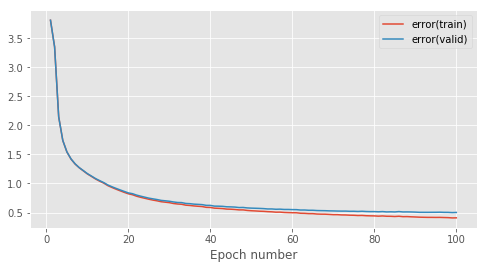

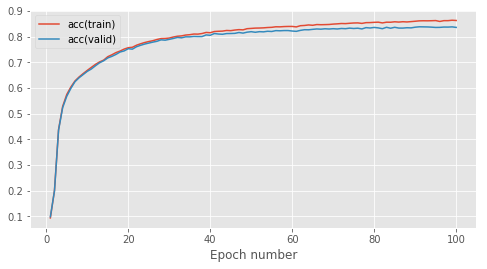

In [15]:
#RMSProp Learning Rule
from mlp.layers import AffineLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule, RMSPropLearningRule, MomentumLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.01
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = UniformInit(-np.sqrt(3/(input_dim)), np.sqrt(3/(input_dim)),rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = RMSPropLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/17_error_leaky_relu_2hls_fanin_rmsprop_2", "../results/17_accuracy_leaky_relu_2hls_fanin_rmsprop_2", "../results/17_stats_leaky_relu_2hls_fanin_rmsprop_2.csv", notebook=True)

learning rule = 0.0001

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 4.3s to complete
    error(train)=3.85e+00, acc(train)=1.80e-02, error(valid)=3.85e+00, acc(valid)=1.82e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 4.1s to complete
    error(train)=3.85e+00, acc(train)=1.81e-02, error(valid)=3.85e+00, acc(valid)=1.85e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 3.8s to complete
    error(train)=3.85e+00, acc(train)=1.83e-02, error(valid)=3.85e+00, acc(valid)=1.87e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 4.3s to complete
    error(train)=3.85e+00, acc(train)=1.87e-02, error(valid)=3.85e+00, acc(valid)=1.87e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 3.7s to complete
    error(train)=3.85e+00, acc(train)=1.90e-02, error(valid)=3.85e+00, acc(valid)=1.91e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 4.0s to complete
    error(train)=3.85e+00, acc(train)=1.93e-02, error(valid)=3.85e+00, acc(valid)=1.92e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 4.1s to complete
    error(train)=3.85e+00, acc(train)=1.95e-02, error(valid)=3.85e+00, acc(valid)=1.95e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 4.1s to complete
    error(train)=3.85e+00, acc(train)=1.99e-02, error(valid)=3.85e+00, acc(valid)=2.00e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.03e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.06e-02, error(valid)=3.85e+00, acc(valid)=2.05e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.05e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.19e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.22e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.26e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.30e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.31e-02, error(valid)=3.85e+00, acc(valid)=2.33e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 4.4s to complete
    error(train)=3.84e+00, acc(train)=2.36e-02, error(valid)=3.84e+00, acc(valid)=2.40e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 3.8s to complete
    error(train)=3.84e+00, acc(train)=2.40e-02, error(valid)=3.84e+00, acc(valid)=2.44e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 4.0s to complete
    error(train)=3.84e+00, acc(train)=2.44e-02, error(valid)=3.84e+00, acc(valid)=2.52e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 4.3s to complete
    error(train)=3.84e+00, acc(train)=2.50e-02, error(valid)=3.84e+00, acc(valid)=2.54e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 3.3s to complete
    error(train)=3.84e+00, acc(train)=2.56e-02, error(valid)=3.84e+00, acc(valid)=2.60e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 4.0s to complete
    error(train)=3.84e+00, acc(train)=2.63e-02, error(valid)=3.84e+00, acc(valid)=2.66e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 4.0s to complete
    error(train)=3.84e+00, acc(train)=2.70e-02, error(valid)=3.84e+00, acc(valid)=2.65e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 4.1s to complete
    error(train)=3.84e+00, acc(train)=2.78e-02, error(valid)=3.84e+00, acc(valid)=2.70e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 4.3s to complete
    error(train)=3.84e+00, acc(train)=2.86e-02, error(valid)=3.84e+00, acc(valid)=2.76e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 4.3s to complete
    error(train)=3.84e+00, acc(train)=2.94e-02, error(valid)=3.84e+00, acc(valid)=2.86e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 4.0s to complete
    error(train)=3.84e+00, acc(train)=3.02e-02, error(valid)=3.84e+00, acc(valid)=2.96e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 4.5s to complete
    error(train)=3.84e+00, acc(train)=3.11e-02, error(valid)=3.84e+00, acc(valid)=3.06e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 3.8s to complete
    error(train)=3.84e+00, acc(train)=3.20e-02, error(valid)=3.84e+00, acc(valid)=3.11e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 4.3s to complete
    error(train)=3.84e+00, acc(train)=3.30e-02, error(valid)=3.84e+00, acc(valid)=3.19e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 3.8s to complete
    error(train)=3.84e+00, acc(train)=3.42e-02, error(valid)=3.84e+00, acc(valid)=3.32e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 2.3s to complete
    error(train)=3.84e+00, acc(train)=3.54e-02, error(valid)=3.84e+00, acc(valid)=3.42e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 2.2s to complete
    error(train)=3.84e+00, acc(train)=3.67e-02, error(valid)=3.84e+00, acc(valid)=3.53e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 2.2s to complete
    error(train)=3.84e+00, acc(train)=3.80e-02, error(valid)=3.84e+00, acc(valid)=3.65e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 2.2s to complete
    error(train)=3.84e+00, acc(train)=3.92e-02, error(valid)=3.84e+00, acc(valid)=3.76e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 2.3s to complete
    error(train)=3.84e+00, acc(train)=4.05e-02, error(valid)=3.84e+00, acc(valid)=3.91e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 2.3s to complete
    error(train)=3.84e+00, acc(train)=4.20e-02, error(valid)=3.84e+00, acc(valid)=4.12e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 2.2s to complete
    error(train)=3.84e+00, acc(train)=4.35e-02, error(valid)=3.84e+00, acc(valid)=4.26e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 2.8s to complete
    error(train)=3.84e+00, acc(train)=4.49e-02, error(valid)=3.84e+00, acc(valid)=4.40e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 2.1s to complete
    error(train)=3.84e+00, acc(train)=4.66e-02, error(valid)=3.84e+00, acc(valid)=4.52e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 2.1s to complete
    error(train)=3.84e+00, acc(train)=4.81e-02, error(valid)=3.84e+00, acc(valid)=4.73e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 2.1s to complete
    error(train)=3.84e+00, acc(train)=4.98e-02, error(valid)=3.84e+00, acc(valid)=4.93e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 2.8s to complete
    error(train)=3.84e+00, acc(train)=5.13e-02, error(valid)=3.84e+00, acc(valid)=5.03e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 2.8s to complete
    error(train)=3.84e+00, acc(train)=5.32e-02, error(valid)=3.84e+00, acc(valid)=5.18e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 2.2s to complete
    error(train)=3.84e+00, acc(train)=5.45e-02, error(valid)=3.84e+00, acc(valid)=5.27e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 2.1s to complete
    error(train)=3.84e+00, acc(train)=5.62e-02, error(valid)=3.84e+00, acc(valid)=5.42e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 2.8s to complete
    error(train)=3.83e+00, acc(train)=5.72e-02, error(valid)=3.83e+00, acc(valid)=5.63e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 2.7s to complete
    error(train)=3.83e+00, acc(train)=5.86e-02, error(valid)=3.83e+00, acc(valid)=5.77e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 2.2s to complete
    error(train)=3.83e+00, acc(train)=5.97e-02, error(valid)=3.83e+00, acc(valid)=5.81e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 2.1s to complete
    error(train)=3.83e+00, acc(train)=6.09e-02, error(valid)=3.83e+00, acc(valid)=5.92e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 2.1s to complete
    error(train)=3.83e+00, acc(train)=6.22e-02, error(valid)=3.83e+00, acc(valid)=6.13e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 2.1s to complete
    error(train)=3.83e+00, acc(train)=6.34e-02, error(valid)=3.83e+00, acc(valid)=6.22e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 2.5s to complete
    error(train)=3.83e+00, acc(train)=6.44e-02, error(valid)=3.83e+00, acc(valid)=6.35e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 3.2s to complete
    error(train)=3.83e+00, acc(train)=6.55e-02, error(valid)=3.83e+00, acc(valid)=6.41e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 2.7s to complete
    error(train)=3.83e+00, acc(train)=6.66e-02, error(valid)=3.83e+00, acc(valid)=6.53e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 2.2s to complete
    error(train)=3.83e+00, acc(train)=6.73e-02, error(valid)=3.83e+00, acc(valid)=6.65e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 2.3s to complete
    error(train)=3.83e+00, acc(train)=6.78e-02, error(valid)=3.83e+00, acc(valid)=6.66e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 2.5s to complete
    error(train)=3.83e+00, acc(train)=6.87e-02, error(valid)=3.83e+00, acc(valid)=6.77e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 2.1s to complete
    error(train)=3.83e+00, acc(train)=6.93e-02, error(valid)=3.83e+00, acc(valid)=6.86e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 2.1s to complete
    error(train)=3.83e+00, acc(train)=6.98e-02, error(valid)=3.83e+00, acc(valid)=6.93e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 2.4s to complete
    error(train)=3.83e+00, acc(train)=7.04e-02, error(valid)=3.83e+00, acc(valid)=7.01e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 2.7s to complete
    error(train)=3.83e+00, acc(train)=7.10e-02, error(valid)=3.83e+00, acc(valid)=7.06e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 2.1s to complete
    error(train)=3.83e+00, acc(train)=7.13e-02, error(valid)=3.83e+00, acc(valid)=7.15e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 2.1s to complete
    error(train)=3.83e+00, acc(train)=7.16e-02, error(valid)=3.83e+00, acc(valid)=7.20e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 2.7s to complete
    error(train)=3.83e+00, acc(train)=7.20e-02, error(valid)=3.83e+00, acc(valid)=7.16e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 2.7s to complete
    error(train)=3.83e+00, acc(train)=7.21e-02, error(valid)=3.83e+00, acc(valid)=7.18e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 2.6s to complete
    error(train)=3.83e+00, acc(train)=7.26e-02, error(valid)=3.83e+00, acc(valid)=7.20e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 2.5s to complete
    error(train)=3.82e+00, acc(train)=7.28e-02, error(valid)=3.82e+00, acc(valid)=7.20e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 2.6s to complete
    error(train)=3.82e+00, acc(train)=7.30e-02, error(valid)=3.82e+00, acc(valid)=7.26e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 2.5s to complete
    error(train)=3.82e+00, acc(train)=7.30e-02, error(valid)=3.82e+00, acc(valid)=7.25e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 2.2s to complete
    error(train)=3.82e+00, acc(train)=7.32e-02, error(valid)=3.82e+00, acc(valid)=7.27e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 2.2s to complete
    error(train)=3.82e+00, acc(train)=7.33e-02, error(valid)=3.82e+00, acc(valid)=7.27e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 2.1s to complete
    error(train)=3.82e+00, acc(train)=7.32e-02, error(valid)=3.82e+00, acc(valid)=7.28e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 2.1s to complete
    error(train)=3.82e+00, acc(train)=7.32e-02, error(valid)=3.82e+00, acc(valid)=7.26e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 2.1s to complete
    error(train)=3.82e+00, acc(train)=7.32e-02, error(valid)=3.82e+00, acc(valid)=7.29e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 2.3s to complete
    error(train)=3.82e+00, acc(train)=7.30e-02, error(valid)=3.82e+00, acc(valid)=7.26e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 2.1s to complete
    error(train)=3.82e+00, acc(train)=7.26e-02, error(valid)=3.82e+00, acc(valid)=7.19e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 2.5s to complete
    error(train)=3.82e+00, acc(train)=7.21e-02, error(valid)=3.82e+00, acc(valid)=7.23e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 2.3s to complete
    error(train)=3.82e+00, acc(train)=7.16e-02, error(valid)=3.82e+00, acc(valid)=7.16e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 2.7s to complete
    error(train)=3.82e+00, acc(train)=7.13e-02, error(valid)=3.82e+00, acc(valid)=7.11e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 2.6s to complete
    error(train)=3.82e+00, acc(train)=7.09e-02, error(valid)=3.82e+00, acc(valid)=7.05e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 2.3s to complete
    error(train)=3.81e+00, acc(train)=7.05e-02, error(valid)=3.81e+00, acc(valid)=7.01e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 2.3s to complete
    error(train)=3.81e+00, acc(train)=7.00e-02, error(valid)=3.81e+00, acc(valid)=6.94e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 3.4s to complete
    error(train)=3.81e+00, acc(train)=6.94e-02, error(valid)=3.81e+00, acc(valid)=6.88e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 2.6s to complete
    error(train)=3.81e+00, acc(train)=6.90e-02, error(valid)=3.81e+00, acc(valid)=6.82e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 2.7s to complete
    error(train)=3.81e+00, acc(train)=6.82e-02, error(valid)=3.81e+00, acc(valid)=6.77e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 2.6s to complete
    error(train)=3.81e+00, acc(train)=6.75e-02, error(valid)=3.81e+00, acc(valid)=6.75e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 2.3s to complete
    error(train)=3.81e+00, acc(train)=6.69e-02, error(valid)=3.81e+00, acc(valid)=6.68e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 2.1s to complete
    error(train)=3.81e+00, acc(train)=6.62e-02, error(valid)=3.81e+00, acc(valid)=6.62e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 2.1s to complete
    error(train)=3.81e+00, acc(train)=6.58e-02, error(valid)=3.81e+00, acc(valid)=6.55e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 2.1s to complete
    error(train)=3.81e+00, acc(train)=6.51e-02, error(valid)=3.81e+00, acc(valid)=6.47e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 2.2s to complete
    error(train)=3.80e+00, acc(train)=6.42e-02, error(valid)=3.80e+00, acc(valid)=6.36e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 2.3s to complete
    error(train)=3.80e+00, acc(train)=6.33e-02, error(valid)=3.80e+00, acc(valid)=6.32e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 2.3s to complete
    error(train)=3.80e+00, acc(train)=6.25e-02, error(valid)=3.80e+00, acc(valid)=6.25e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 2.1s to complete
    error(train)=3.80e+00, acc(train)=6.21e-02, error(valid)=3.80e+00, acc(valid)=6.18e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 3.0s to complete
    error(train)=3.80e+00, acc(train)=6.14e-02, error(valid)=3.80e+00, acc(valid)=6.08e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 2.2s to complete
    error(train)=3.80e+00, acc(train)=6.08e-02, error(valid)=3.80e+00, acc(valid)=6.03e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 2.6s to complete
    error(train)=3.80e+00, acc(train)=6.02e-02, error(valid)=3.80e+00, acc(valid)=5.97e-02


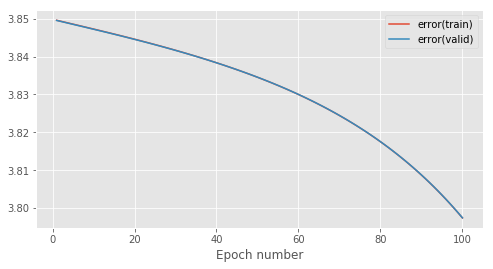

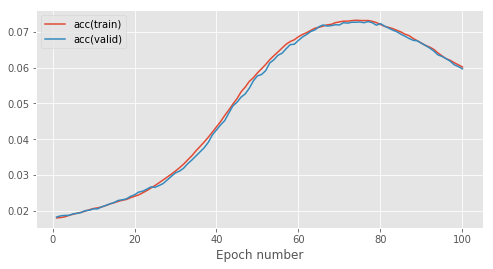

In [16]:
#RMSProp Learning Rule
from mlp.layers import AffineLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule, RMSPropLearningRule, MomentumLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.0001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = UniformInit(-np.sqrt(3/(input_dim)), np.sqrt(3/(input_dim)),rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = RMSPropLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/18_error_leaky_relu_2hls_fanin_rmsprop_3", "../results/18_accuracy_leaky_relu_2hls_fanin_rmsprop_3", "../results/18_stats_leaky_relu_2hls_fanin_rmsprop_3.csv", notebook=True)

Adam Learning Rule

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 4.0s to complete
    error(train)=4.21e+01, acc(train)=2.28e-01, error(valid)=4.43e+01, acc(valid)=2.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 4.2s to complete
    error(train)=3.91e+01, acc(train)=3.69e-01, error(valid)=4.01e+01, acc(valid)=3.64e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 3.7s to complete
    error(train)=5.00e+01, acc(train)=3.51e-01, error(valid)=5.43e+01, acc(valid)=3.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 4.4s to complete
    error(train)=4.88e+01, acc(train)=3.54e-01, error(valid)=5.51e+01, acc(valid)=3.55e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 3.9s to complete
    error(train)=4.55e+01, acc(train)=4.11e-01, error(valid)=5.44e+01, acc(valid)=4.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 3.8s to complete
    error(train)=4.73e+01, acc(train)=4.09e-01, error(valid)=5.15e+01, acc(valid)=4.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 3.6s to complete
    error(train)=7.03e+01, acc(train)=3.73e-01, error(valid)=8.72e+01, acc(valid)=3.72e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 3.7s to complete
    error(train)=5.35e+01, acc(train)=4.25e-01, error(valid)=6.70e+01, acc(valid)=4.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 3.6s to complete
    error(train)=6.90e+01, acc(train)=4.35e-01, error(valid)=7.59e+01, acc(valid)=4.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 3.8s to complete
    error(train)=4.93e+01, acc(train)=4.24e-01, error(valid)=5.96e+01, acc(valid)=4.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 3.6s to complete
    error(train)=5.77e+01, acc(train)=4.14e-01, error(valid)=6.42e+01, acc(valid)=4.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 4.0s to complete
    error(train)=5.78e+01, acc(train)=4.32e-01, error(valid)=7.18e+01, acc(valid)=4.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 3.6s to complete
    error(train)=5.16e+01, acc(train)=4.45e-01, error(valid)=6.49e+01, acc(valid)=4.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 4.8s to complete
    error(train)=6.65e+01, acc(train)=4.45e-01, error(valid)=7.87e+01, acc(valid)=4.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 4.0s to complete
    error(train)=6.44e+01, acc(train)=4.32e-01, error(valid)=7.19e+01, acc(valid)=4.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 4.0s to complete
    error(train)=8.66e+01, acc(train)=4.03e-01, error(valid)=1.05e+02, acc(valid)=3.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 4.0s to complete
    error(train)=6.04e+01, acc(train)=4.68e-01, error(valid)=9.03e+01, acc(valid)=4.58e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 4.2s to complete
    error(train)=1.01e+02, acc(train)=3.77e-01, error(valid)=1.31e+02, acc(valid)=3.71e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 4.3s to complete
    error(train)=9.34e+01, acc(train)=4.45e-01, error(valid)=1.35e+02, acc(valid)=4.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 4.0s to complete
    error(train)=7.21e+01, acc(train)=4.17e-01, error(valid)=8.41e+01, acc(valid)=4.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 3.7s to complete
    error(train)=6.10e+01, acc(train)=4.58e-01, error(valid)=8.39e+01, acc(valid)=4.50e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 4.4s to complete
    error(train)=6.35e+01, acc(train)=4.36e-01, error(valid)=9.15e+01, acc(valid)=4.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 4.2s to complete
    error(train)=7.11e+01, acc(train)=4.34e-01, error(valid)=9.65e+01, acc(valid)=4.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 4.3s to complete
    error(train)=8.21e+01, acc(train)=4.43e-01, error(valid)=1.19e+02, acc(valid)=4.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 4.3s to complete
    error(train)=7.01e+01, acc(train)=4.78e-01, error(valid)=9.42e+01, acc(valid)=4.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 4.1s to complete
    error(train)=7.89e+01, acc(train)=4.30e-01, error(valid)=1.57e+02, acc(valid)=4.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 4.3s to complete
    error(train)=8.45e+01, acc(train)=4.38e-01, error(valid)=1.18e+02, acc(valid)=4.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 4.4s to complete
    error(train)=7.51e+01, acc(train)=4.71e-01, error(valid)=9.88e+01, acc(valid)=4.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 3.0s to complete
    error(train)=6.65e+01, acc(train)=4.70e-01, error(valid)=1.01e+02, acc(valid)=4.59e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 3.9s to complete
    error(train)=1.08e+02, acc(train)=4.27e-01, error(valid)=1.30e+02, acc(valid)=4.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 3.0s to complete
    error(train)=7.21e+01, acc(train)=4.84e-01, error(valid)=1.09e+02, acc(valid)=4.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 2.7s to complete
    error(train)=8.29e+01, acc(train)=4.56e-01, error(valid)=1.06e+02, acc(valid)=4.50e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 2.2s to complete
    error(train)=8.36e+01, acc(train)=4.49e-01, error(valid)=1.25e+02, acc(valid)=4.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 3.0s to complete
    error(train)=8.64e+01, acc(train)=4.40e-01, error(valid)=1.32e+02, acc(valid)=4.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 2.2s to complete
    error(train)=1.05e+02, acc(train)=3.99e-01, error(valid)=1.80e+02, acc(valid)=3.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 2.4s to complete
    error(train)=8.83e+01, acc(train)=4.23e-01, error(valid)=1.12e+02, acc(valid)=4.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 4.6s to complete
    error(train)=7.85e+01, acc(train)=4.76e-01, error(valid)=1.50e+02, acc(valid)=4.70e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 4.5s to complete
    error(train)=9.35e+01, acc(train)=4.26e-01, error(valid)=1.37e+02, acc(valid)=4.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 4.5s to complete
    error(train)=1.00e+02, acc(train)=4.74e-01, error(valid)=1.28e+02, acc(valid)=4.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 3.8s to complete
    error(train)=6.90e+01, acc(train)=4.67e-01, error(valid)=9.70e+01, acc(valid)=4.60e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 4.3s to complete
    error(train)=1.06e+02, acc(train)=3.95e-01, error(valid)=1.93e+02, acc(valid)=3.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 4.8s to complete
    error(train)=9.13e+01, acc(train)=4.22e-01, error(valid)=1.12e+02, acc(valid)=4.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 4.0s to complete
    error(train)=9.04e+01, acc(train)=4.16e-01, error(valid)=1.19e+02, acc(valid)=4.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 4.0s to complete
    error(train)=9.40e+01, acc(train)=4.35e-01, error(valid)=1.18e+02, acc(valid)=4.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 4.3s to complete
    error(train)=8.17e+01, acc(train)=4.21e-01, error(valid)=1.29e+02, acc(valid)=4.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 3.6s to complete
    error(train)=1.44e+02, acc(train)=3.58e-01, error(valid)=2.60e+02, acc(valid)=3.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 4.0s to complete
    error(train)=8.42e+01, acc(train)=4.64e-01, error(valid)=1.55e+02, acc(valid)=4.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 4.7s to complete
    error(train)=8.58e+01, acc(train)=4.55e-01, error(valid)=1.35e+02, acc(valid)=4.50e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 4.3s to complete
    error(train)=8.28e+01, acc(train)=4.76e-01, error(valid)=1.40e+02, acc(valid)=4.67e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 4.8s to complete
    error(train)=1.04e+02, acc(train)=4.23e-01, error(valid)=2.01e+02, acc(valid)=4.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 3.7s to complete
    error(train)=6.63e+01, acc(train)=4.91e-01, error(valid)=8.86e+01, acc(valid)=4.84e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 4.2s to complete
    error(train)=7.26e+01, acc(train)=4.81e-01, error(valid)=1.63e+02, acc(valid)=4.66e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 4.2s to complete
    error(train)=7.45e+01, acc(train)=4.86e-01, error(valid)=1.04e+02, acc(valid)=4.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 4.1s to complete
    error(train)=7.91e+01, acc(train)=4.62e-01, error(valid)=1.81e+02, acc(valid)=4.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 3.5s to complete
    error(train)=9.46e+01, acc(train)=5.01e-01, error(valid)=1.96e+02, acc(valid)=4.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 2.3s to complete
    error(train)=9.04e+01, acc(train)=4.42e-01, error(valid)=1.18e+02, acc(valid)=4.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 2.5s to complete
    error(train)=1.23e+02, acc(train)=3.89e-01, error(valid)=1.67e+02, acc(valid)=3.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 2.3s to complete
    error(train)=8.60e+01, acc(train)=4.89e-01, error(valid)=1.31e+02, acc(valid)=4.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 3.3s to complete
    error(train)=7.42e+01, acc(train)=4.61e-01, error(valid)=1.20e+02, acc(valid)=4.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 2.9s to complete
    error(train)=8.88e+01, acc(train)=4.77e-01, error(valid)=1.24e+02, acc(valid)=4.67e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 4.4s to complete
    error(train)=7.17e+01, acc(train)=4.81e-01, error(valid)=1.05e+02, acc(valid)=4.69e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 4.5s to complete
    error(train)=7.21e+01, acc(train)=4.86e-01, error(valid)=1.05e+02, acc(valid)=4.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 4.4s to complete
    error(train)=7.57e+01, acc(train)=4.74e-01, error(valid)=1.39e+02, acc(valid)=4.65e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 4.2s to complete
    error(train)=9.64e+01, acc(train)=4.75e-01, error(valid)=1.97e+02, acc(valid)=4.64e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 4.4s to complete
    error(train)=8.37e+01, acc(train)=4.68e-01, error(valid)=1.14e+02, acc(valid)=4.59e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 4.0s to complete
    error(train)=7.97e+01, acc(train)=4.77e-01, error(valid)=1.90e+02, acc(valid)=4.66e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 4.3s to complete
    error(train)=9.55e+01, acc(train)=4.82e-01, error(valid)=1.32e+02, acc(valid)=4.76e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 4.6s to complete
    error(train)=8.52e+01, acc(train)=5.02e-01, error(valid)=1.35e+02, acc(valid)=4.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 4.2s to complete
    error(train)=1.01e+02, acc(train)=4.59e-01, error(valid)=1.85e+02, acc(valid)=4.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 4.8s to complete
    error(train)=9.08e+01, acc(train)=4.37e-01, error(valid)=1.27e+02, acc(valid)=4.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 4.2s to complete
    error(train)=1.02e+02, acc(train)=4.71e-01, error(valid)=1.78e+02, acc(valid)=4.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 4.5s to complete
    error(train)=1.09e+02, acc(train)=4.59e-01, error(valid)=2.13e+02, acc(valid)=4.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 4.6s to complete
    error(train)=9.35e+01, acc(train)=4.30e-01, error(valid)=1.60e+02, acc(valid)=4.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 4.1s to complete
    error(train)=1.26e+02, acc(train)=3.99e-01, error(valid)=2.09e+02, acc(valid)=3.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 4.6s to complete
    error(train)=7.42e+01, acc(train)=5.37e-01, error(valid)=1.00e+02, acc(valid)=5.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 4.5s to complete
    error(train)=9.91e+01, acc(train)=4.49e-01, error(valid)=1.70e+02, acc(valid)=4.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 4.5s to complete
    error(train)=7.98e+01, acc(train)=5.06e-01, error(valid)=1.58e+02, acc(valid)=5.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 4.2s to complete
    error(train)=8.63e+01, acc(train)=4.93e-01, error(valid)=1.63e+02, acc(valid)=4.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 4.2s to complete
    error(train)=1.31e+02, acc(train)=4.19e-01, error(valid)=1.77e+02, acc(valid)=4.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 4.7s to complete
    error(train)=7.82e+01, acc(train)=5.07e-01, error(valid)=1.38e+02, acc(valid)=5.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 3.8s to complete
    error(train)=8.73e+01, acc(train)=4.40e-01, error(valid)=1.61e+02, acc(valid)=4.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 4.5s to complete
    error(train)=1.06e+02, acc(train)=4.32e-01, error(valid)=1.87e+02, acc(valid)=4.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 4.0s to complete
    error(train)=9.54e+01, acc(train)=5.12e-01, error(valid)=1.72e+02, acc(valid)=4.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 4.3s to complete
    error(train)=1.07e+02, acc(train)=4.22e-01, error(valid)=1.43e+02, acc(valid)=4.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 5.4s to complete
    error(train)=1.20e+02, acc(train)=4.47e-01, error(valid)=2.54e+02, acc(valid)=4.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 4.2s to complete
    error(train)=8.69e+01, acc(train)=4.74e-01, error(valid)=1.13e+02, acc(valid)=4.65e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 5.9s to complete
    error(train)=9.20e+01, acc(train)=4.74e-01, error(valid)=1.56e+02, acc(valid)=4.67e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 4.4s to complete
    error(train)=8.61e+01, acc(train)=4.84e-01, error(valid)=1.48e+02, acc(valid)=4.78e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 4.6s to complete
    error(train)=7.63e+01, acc(train)=5.00e-01, error(valid)=1.29e+02, acc(valid)=4.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 4.3s to complete
    error(train)=1.45e+02, acc(train)=4.31e-01, error(valid)=2.37e+02, acc(valid)=4.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 4.7s to complete
    error(train)=9.16e+01, acc(train)=4.84e-01, error(valid)=1.85e+02, acc(valid)=4.79e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 4.4s to complete
    error(train)=8.98e+01, acc(train)=4.76e-01, error(valid)=1.87e+02, acc(valid)=4.58e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 3.4s to complete
    error(train)=9.90e+01, acc(train)=4.77e-01, error(valid)=1.30e+02, acc(valid)=4.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 2.3s to complete
    error(train)=1.09e+02, acc(train)=4.89e-01, error(valid)=1.93e+02, acc(valid)=4.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 3.7s to complete
    error(train)=8.77e+01, acc(train)=4.64e-01, error(valid)=1.48e+02, acc(valid)=4.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 3.9s to complete
    error(train)=9.93e+01, acc(train)=4.63e-01, error(valid)=1.57e+02, acc(valid)=4.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 4.0s to complete
    error(train)=9.07e+01, acc(train)=5.13e-01, error(valid)=1.89e+02, acc(valid)=5.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 4.4s to complete
    error(train)=9.62e+01, acc(train)=4.83e-01, error(valid)=2.14e+02, acc(valid)=4.74e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 3.9s to complete
    error(train)=1.19e+02, acc(train)=4.11e-01, error(valid)=1.78e+02, acc(valid)=3.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 3.9s to complete
    error(train)=8.77e+01, acc(train)=4.51e-01, error(valid)=2.17e+02, acc(valid)=4.43e-01


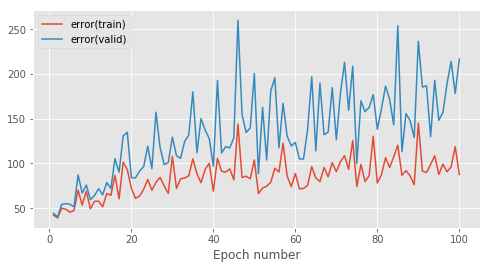

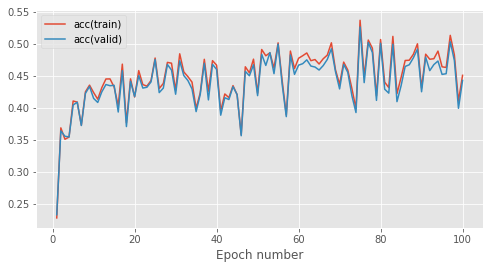

In [3]:
# Adam Learning Rule

from mlp.layers import AffineLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule, RMSPropLearningRule, AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = UniformInit(-np.sqrt(3/(input_dim)), np.sqrt(3/(input_dim)),rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/19_error_leaky_relu_2hls_fanin_adam", "../results/19_accuracy_leaky_relu_2hls_fanin_adam", "../results/19_stats_leaky_relu_2hls_fanin_adam.csv", notebook=True)

learning rule = 0.01

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 2.6s to complete
    error(train)=1.38e+00, acc(train)=6.09e-01, error(valid)=1.43e+00, acc(valid)=6.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 2.3s to complete
    error(train)=1.48e+00, acc(train)=6.29e-01, error(valid)=1.56e+00, acc(valid)=6.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 2.5s to complete
    error(train)=1.62e+00, acc(train)=5.86e-01, error(valid)=1.68e+00, acc(valid)=5.80e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 2.9s to complete
    error(train)=1.56e+00, acc(train)=5.98e-01, error(valid)=1.67e+00, acc(valid)=5.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 3.1s to complete
    error(train)=1.48e+00, acc(train)=6.25e-01, error(valid)=1.58e+00, acc(valid)=6.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 3.8s to complete
    error(train)=1.48e+00, acc(train)=6.19e-01, error(valid)=1.55e+00, acc(valid)=6.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 4.1s to complete
    error(train)=1.45e+00, acc(train)=6.18e-01, error(valid)=1.51e+00, acc(valid)=6.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 3.7s to complete
    error(train)=1.41e+00, acc(train)=6.39e-01, error(valid)=1.51e+00, acc(valid)=6.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 2.9s to complete
    error(train)=1.57e+00, acc(train)=6.08e-01, error(valid)=1.63e+00, acc(valid)=5.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 2.7s to complete
    error(train)=1.52e+00, acc(train)=6.07e-01, error(valid)=1.69e+00, acc(valid)=6.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 2.7s to complete
    error(train)=1.49e+00, acc(train)=6.04e-01, error(valid)=1.62e+00, acc(valid)=5.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 2.5s to complete
    error(train)=1.43e+00, acc(train)=6.34e-01, error(valid)=1.58e+00, acc(valid)=6.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 2.2s to complete
    error(train)=1.53e+00, acc(train)=6.19e-01, error(valid)=1.71e+00, acc(valid)=6.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 3.2s to complete
    error(train)=1.36e+00, acc(train)=6.34e-01, error(valid)=1.54e+00, acc(valid)=6.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 4.2s to complete
    error(train)=1.64e+00, acc(train)=6.14e-01, error(valid)=1.83e+00, acc(valid)=6.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 4.0s to complete
    error(train)=1.39e+00, acc(train)=6.28e-01, error(valid)=1.55e+00, acc(valid)=6.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 4.1s to complete
    error(train)=1.45e+00, acc(train)=6.13e-01, error(valid)=1.60e+00, acc(valid)=6.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 3.8s to complete
    error(train)=1.42e+00, acc(train)=6.36e-01, error(valid)=1.60e+00, acc(valid)=6.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 4.1s to complete
    error(train)=1.62e+00, acc(train)=6.14e-01, error(valid)=1.85e+00, acc(valid)=6.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 3.9s to complete
    error(train)=1.40e+00, acc(train)=6.36e-01, error(valid)=1.55e+00, acc(valid)=6.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 3.9s to complete
    error(train)=1.42e+00, acc(train)=6.28e-01, error(valid)=1.61e+00, acc(valid)=6.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 3.9s to complete
    error(train)=1.49e+00, acc(train)=6.08e-01, error(valid)=1.65e+00, acc(valid)=5.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 4.0s to complete
    error(train)=1.50e+00, acc(train)=6.29e-01, error(valid)=1.81e+00, acc(valid)=6.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 3.9s to complete
    error(train)=1.46e+00, acc(train)=6.39e-01, error(valid)=1.77e+00, acc(valid)=6.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 5.3s to complete
    error(train)=1.38e+00, acc(train)=6.47e-01, error(valid)=1.64e+00, acc(valid)=6.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 4.2s to complete
    error(train)=1.43e+00, acc(train)=6.39e-01, error(valid)=1.69e+00, acc(valid)=6.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 4.9s to complete
    error(train)=1.38e+00, acc(train)=6.52e-01, error(valid)=1.49e+00, acc(valid)=6.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 4.6s to complete
    error(train)=1.47e+00, acc(train)=6.35e-01, error(valid)=1.73e+00, acc(valid)=6.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 3.9s to complete
    error(train)=1.44e+00, acc(train)=6.23e-01, error(valid)=1.79e+00, acc(valid)=6.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 4.1s to complete
    error(train)=1.54e+00, acc(train)=6.13e-01, error(valid)=1.75e+00, acc(valid)=5.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 4.1s to complete
    error(train)=1.47e+00, acc(train)=6.23e-01, error(valid)=1.72e+00, acc(valid)=6.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 4.2s to complete
    error(train)=1.41e+00, acc(train)=6.41e-01, error(valid)=1.66e+00, acc(valid)=6.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 4.0s to complete
    error(train)=1.50e+00, acc(train)=6.44e-01, error(valid)=1.78e+00, acc(valid)=6.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 4.3s to complete
    error(train)=1.35e+00, acc(train)=6.46e-01, error(valid)=1.57e+00, acc(valid)=6.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 4.1s to complete
    error(train)=1.48e+00, acc(train)=6.23e-01, error(valid)=1.86e+00, acc(valid)=6.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 4.0s to complete
    error(train)=1.33e+00, acc(train)=6.54e-01, error(valid)=1.64e+00, acc(valid)=6.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 4.3s to complete
    error(train)=1.42e+00, acc(train)=6.56e-01, error(valid)=1.72e+00, acc(valid)=6.45e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 4.2s to complete
    error(train)=1.41e+00, acc(train)=6.42e-01, error(valid)=1.74e+00, acc(valid)=6.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 4.6s to complete
    error(train)=1.41e+00, acc(train)=6.33e-01, error(valid)=1.61e+00, acc(valid)=6.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 3.9s to complete
    error(train)=1.50e+00, acc(train)=6.24e-01, error(valid)=1.89e+00, acc(valid)=6.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 3.8s to complete
    error(train)=1.33e+00, acc(train)=6.60e-01, error(valid)=1.75e+00, acc(valid)=6.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 4.1s to complete
    error(train)=1.31e+00, acc(train)=6.55e-01, error(valid)=1.62e+00, acc(valid)=6.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 3.9s to complete
    error(train)=1.28e+00, acc(train)=6.76e-01, error(valid)=1.70e+00, acc(valid)=6.58e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 4.1s to complete
    error(train)=1.43e+00, acc(train)=6.34e-01, error(valid)=1.92e+00, acc(valid)=6.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 4.1s to complete
    error(train)=1.37e+00, acc(train)=6.48e-01, error(valid)=1.80e+00, acc(valid)=6.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 3.9s to complete
    error(train)=1.49e+00, acc(train)=6.36e-01, error(valid)=1.80e+00, acc(valid)=6.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 4.0s to complete
    error(train)=1.43e+00, acc(train)=6.51e-01, error(valid)=2.00e+00, acc(valid)=6.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 5.2s to complete
    error(train)=1.34e+00, acc(train)=6.69e-01, error(valid)=1.87e+00, acc(valid)=6.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 4.1s to complete
    error(train)=1.27e+00, acc(train)=6.74e-01, error(valid)=1.59e+00, acc(valid)=6.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 4.0s to complete
    error(train)=1.49e+00, acc(train)=6.46e-01, error(valid)=1.94e+00, acc(valid)=6.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 4.0s to complete
    error(train)=1.37e+00, acc(train)=6.59e-01, error(valid)=1.92e+00, acc(valid)=6.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 4.3s to complete
    error(train)=1.22e+00, acc(train)=6.90e-01, error(valid)=1.73e+00, acc(valid)=6.71e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 4.6s to complete
    error(train)=1.33e+00, acc(train)=6.63e-01, error(valid)=1.70e+00, acc(valid)=6.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 4.0s to complete
    error(train)=1.41e+00, acc(train)=6.60e-01, error(valid)=1.92e+00, acc(valid)=6.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 4.1s to complete
    error(train)=1.55e+00, acc(train)=6.30e-01, error(valid)=2.30e+00, acc(valid)=6.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 4.5s to complete
    error(train)=1.48e+00, acc(train)=6.39e-01, error(valid)=2.09e+00, acc(valid)=6.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 4.0s to complete
    error(train)=1.62e+00, acc(train)=6.31e-01, error(valid)=2.45e+00, acc(valid)=6.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 4.0s to complete
    error(train)=1.49e+00, acc(train)=6.58e-01, error(valid)=2.26e+00, acc(valid)=6.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 4.3s to complete
    error(train)=1.28e+00, acc(train)=6.88e-01, error(valid)=2.34e+00, acc(valid)=6.69e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 4.2s to complete
    error(train)=1.42e+00, acc(train)=6.57e-01, error(valid)=2.60e+00, acc(valid)=6.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 4.0s to complete
    error(train)=1.48e+00, acc(train)=6.44e-01, error(valid)=2.52e+00, acc(valid)=6.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 3.9s to complete
    error(train)=1.60e+00, acc(train)=6.36e-01, error(valid)=2.72e+00, acc(valid)=6.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 4.3s to complete
    error(train)=1.39e+00, acc(train)=6.75e-01, error(valid)=2.41e+00, acc(valid)=6.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 4.2s to complete
    error(train)=1.56e+00, acc(train)=6.41e-01, error(valid)=2.23e+00, acc(valid)=6.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 4.2s to complete
    error(train)=1.44e+00, acc(train)=6.49e-01, error(valid)=2.12e+00, acc(valid)=6.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 3.7s to complete
    error(train)=1.39e+00, acc(train)=6.61e-01, error(valid)=2.17e+00, acc(valid)=6.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 3.8s to complete
    error(train)=1.61e+00, acc(train)=6.36e-01, error(valid)=2.43e+00, acc(valid)=6.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 4.1s to complete
    error(train)=1.47e+00, acc(train)=6.40e-01, error(valid)=1.98e+00, acc(valid)=6.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 4.1s to complete
    error(train)=1.55e+00, acc(train)=6.35e-01, error(valid)=2.32e+00, acc(valid)=6.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 2.7s to complete
    error(train)=1.48e+00, acc(train)=6.50e-01, error(valid)=2.10e+00, acc(valid)=6.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 4.5s to complete
    error(train)=1.40e+00, acc(train)=6.54e-01, error(valid)=2.08e+00, acc(valid)=6.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 2.8s to complete
    error(train)=1.59e+00, acc(train)=6.37e-01, error(valid)=2.64e+00, acc(valid)=6.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 3.2s to complete
    error(train)=1.57e+00, acc(train)=6.24e-01, error(valid)=2.72e+00, acc(valid)=5.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 2.4s to complete
    error(train)=1.46e+00, acc(train)=6.71e-01, error(valid)=2.63e+00, acc(valid)=6.47e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 2.4s to complete
    error(train)=1.55e+00, acc(train)=6.24e-01, error(valid)=2.31e+00, acc(valid)=6.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 2.7s to complete
    error(train)=1.60e+00, acc(train)=6.41e-01, error(valid)=2.49e+00, acc(valid)=6.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 2.4s to complete
    error(train)=1.43e+00, acc(train)=6.65e-01, error(valid)=2.40e+00, acc(valid)=6.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 2.7s to complete
    error(train)=1.44e+00, acc(train)=6.55e-01, error(valid)=2.12e+00, acc(valid)=6.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 3.0s to complete
    error(train)=1.43e+00, acc(train)=6.61e-01, error(valid)=2.19e+00, acc(valid)=6.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 2.8s to complete
    error(train)=1.61e+00, acc(train)=6.37e-01, error(valid)=2.71e+00, acc(valid)=6.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 3.3s to complete
    error(train)=1.43e+00, acc(train)=6.76e-01, error(valid)=2.44e+00, acc(valid)=6.55e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 4.3s to complete
    error(train)=1.50e+00, acc(train)=6.63e-01, error(valid)=2.21e+00, acc(valid)=6.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 4.9s to complete
    error(train)=1.45e+00, acc(train)=6.57e-01, error(valid)=2.15e+00, acc(valid)=6.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 4.2s to complete
    error(train)=1.48e+00, acc(train)=6.38e-01, error(valid)=2.30e+00, acc(valid)=6.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 3.9s to complete
    error(train)=1.43e+00, acc(train)=6.62e-01, error(valid)=2.13e+00, acc(valid)=6.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 3.7s to complete
    error(train)=1.48e+00, acc(train)=6.56e-01, error(valid)=2.33e+00, acc(valid)=6.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 4.0s to complete
    error(train)=1.37e+00, acc(train)=6.75e-01, error(valid)=2.19e+00, acc(valid)=6.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 4.4s to complete
    error(train)=1.32e+00, acc(train)=6.79e-01, error(valid)=2.18e+00, acc(valid)=6.48e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 3.8s to complete
    error(train)=1.50e+00, acc(train)=6.52e-01, error(valid)=2.45e+00, acc(valid)=6.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 4.2s to complete
    error(train)=1.47e+00, acc(train)=6.65e-01, error(valid)=2.49e+00, acc(valid)=6.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 4.0s to complete
    error(train)=1.42e+00, acc(train)=6.69e-01, error(valid)=2.04e+00, acc(valid)=6.45e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 4.3s to complete
    error(train)=1.38e+00, acc(train)=6.72e-01, error(valid)=2.14e+00, acc(valid)=6.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 3.9s to complete
    error(train)=1.43e+00, acc(train)=6.59e-01, error(valid)=2.28e+00, acc(valid)=6.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 3.9s to complete
    error(train)=1.51e+00, acc(train)=6.63e-01, error(valid)=2.79e+00, acc(valid)=6.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 3.9s to complete
    error(train)=1.49e+00, acc(train)=6.67e-01, error(valid)=2.62e+00, acc(valid)=6.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 3.5s to complete
    error(train)=1.60e+00, acc(train)=6.34e-01, error(valid)=2.49e+00, acc(valid)=6.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 3.9s to complete
    error(train)=1.35e+00, acc(train)=6.76e-01, error(valid)=2.31e+00, acc(valid)=6.48e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 3.9s to complete
    error(train)=1.41e+00, acc(train)=6.75e-01, error(valid)=2.51e+00, acc(valid)=6.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 3.8s to complete
    error(train)=1.50e+00, acc(train)=6.48e-01, error(valid)=2.46e+00, acc(valid)=6.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 4.4s to complete
    error(train)=1.36e+00, acc(train)=6.71e-01, error(valid)=2.50e+00, acc(valid)=6.40e-01


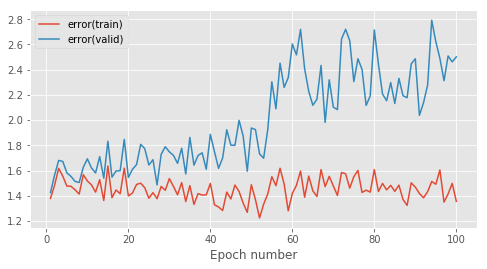

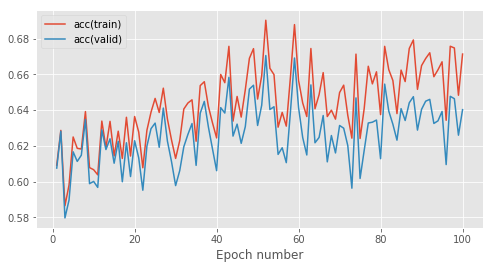

In [17]:
# Adam Learning Rule

from mlp.layers import AffineLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule, RMSPropLearningRule, AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.01
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = UniformInit(-np.sqrt(3/(input_dim)), np.sqrt(3/(input_dim)),rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/19_error_leaky_relu_2hls_fanin_adam_2", "../results/19_accuracy_leaky_relu_2hls_fanin_adam_2", "../results/19_stats_leaky_relu_2hls_fanin_adam_2.csv", notebook=True)

learning rule = 0.0001

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 4.6s to complete
    error(train)=1.29e+00, acc(train)=6.33e-01, error(valid)=1.30e+00, acc(valid)=6.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 3.9s to complete
    error(train)=1.37e+00, acc(train)=6.44e-01, error(valid)=1.50e+00, acc(valid)=6.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 4.5s to complete
    error(train)=1.55e+00, acc(train)=5.84e-01, error(valid)=1.63e+00, acc(valid)=5.80e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 4.4s to complete
    error(train)=1.72e+00, acc(train)=5.80e-01, error(valid)=1.79e+00, acc(valid)=5.79e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 4.0s to complete
    error(train)=1.43e+00, acc(train)=6.26e-01, error(valid)=1.52e+00, acc(valid)=6.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 4.1s to complete
    error(train)=1.48e+00, acc(train)=6.25e-01, error(valid)=1.60e+00, acc(valid)=6.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 3.9s to complete
    error(train)=1.49e+00, acc(train)=6.08e-01, error(valid)=1.64e+00, acc(valid)=6.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 4.2s to complete
    error(train)=1.59e+00, acc(train)=5.97e-01, error(valid)=1.79e+00, acc(valid)=5.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 4.0s to complete
    error(train)=1.62e+00, acc(train)=5.97e-01, error(valid)=1.90e+00, acc(valid)=5.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 4.0s to complete
    error(train)=1.52e+00, acc(train)=6.00e-01, error(valid)=1.63e+00, acc(valid)=5.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 4.7s to complete
    error(train)=1.43e+00, acc(train)=6.20e-01, error(valid)=1.64e+00, acc(valid)=6.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 4.3s to complete
    error(train)=1.47e+00, acc(train)=6.28e-01, error(valid)=1.61e+00, acc(valid)=6.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 4.0s to complete
    error(train)=1.62e+00, acc(train)=6.27e-01, error(valid)=1.90e+00, acc(valid)=6.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 4.0s to complete
    error(train)=1.51e+00, acc(train)=6.35e-01, error(valid)=1.81e+00, acc(valid)=6.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 4.2s to complete
    error(train)=1.55e+00, acc(train)=6.04e-01, error(valid)=1.70e+00, acc(valid)=5.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 4.1s to complete
    error(train)=1.35e+00, acc(train)=6.47e-01, error(valid)=1.56e+00, acc(valid)=6.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 4.4s to complete
    error(train)=1.40e+00, acc(train)=6.34e-01, error(valid)=1.64e+00, acc(valid)=6.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 4.9s to complete
    error(train)=1.47e+00, acc(train)=6.48e-01, error(valid)=1.71e+00, acc(valid)=6.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 4.5s to complete
    error(train)=1.49e+00, acc(train)=6.30e-01, error(valid)=1.78e+00, acc(valid)=6.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 4.1s to complete
    error(train)=1.48e+00, acc(train)=6.32e-01, error(valid)=1.78e+00, acc(valid)=6.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 3.9s to complete
    error(train)=1.49e+00, acc(train)=6.13e-01, error(valid)=1.69e+00, acc(valid)=6.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 3.9s to complete
    error(train)=1.60e+00, acc(train)=6.11e-01, error(valid)=1.89e+00, acc(valid)=6.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 4.3s to complete
    error(train)=1.52e+00, acc(train)=6.37e-01, error(valid)=1.86e+00, acc(valid)=6.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 4.5s to complete
    error(train)=1.60e+00, acc(train)=6.15e-01, error(valid)=1.86e+00, acc(valid)=6.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 4.2s to complete
    error(train)=1.47e+00, acc(train)=6.28e-01, error(valid)=1.71e+00, acc(valid)=6.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 4.4s to complete
    error(train)=1.60e+00, acc(train)=6.36e-01, error(valid)=1.95e+00, acc(valid)=6.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 3.9s to complete
    error(train)=1.42e+00, acc(train)=6.38e-01, error(valid)=1.73e+00, acc(valid)=6.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 4.4s to complete
    error(train)=1.45e+00, acc(train)=6.42e-01, error(valid)=1.69e+00, acc(valid)=6.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 4.3s to complete
    error(train)=1.35e+00, acc(train)=6.50e-01, error(valid)=1.53e+00, acc(valid)=6.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 4.3s to complete
    error(train)=1.40e+00, acc(train)=6.51e-01, error(valid)=1.74e+00, acc(valid)=6.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 4.5s to complete
    error(train)=1.42e+00, acc(train)=6.28e-01, error(valid)=1.72e+00, acc(valid)=6.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 4.0s to complete
    error(train)=1.58e+00, acc(train)=5.99e-01, error(valid)=1.87e+00, acc(valid)=5.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 3.9s to complete
    error(train)=1.32e+00, acc(train)=6.48e-01, error(valid)=1.60e+00, acc(valid)=6.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 3.7s to complete
    error(train)=1.63e+00, acc(train)=6.11e-01, error(valid)=1.88e+00, acc(valid)=6.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 4.2s to complete
    error(train)=1.35e+00, acc(train)=6.51e-01, error(valid)=1.68e+00, acc(valid)=6.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 4.7s to complete
    error(train)=1.34e+00, acc(train)=6.43e-01, error(valid)=1.60e+00, acc(valid)=6.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 4.5s to complete
    error(train)=1.55e+00, acc(train)=6.20e-01, error(valid)=1.96e+00, acc(valid)=6.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 4.7s to complete
    error(train)=1.36e+00, acc(train)=6.57e-01, error(valid)=1.74e+00, acc(valid)=6.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 4.4s to complete
    error(train)=1.48e+00, acc(train)=6.34e-01, error(valid)=1.96e+00, acc(valid)=6.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 4.2s to complete
    error(train)=1.52e+00, acc(train)=6.21e-01, error(valid)=1.94e+00, acc(valid)=6.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 4.2s to complete
    error(train)=1.45e+00, acc(train)=6.43e-01, error(valid)=1.89e+00, acc(valid)=6.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 4.0s to complete
    error(train)=1.47e+00, acc(train)=6.22e-01, error(valid)=1.90e+00, acc(valid)=6.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 3.9s to complete
    error(train)=1.46e+00, acc(train)=6.48e-01, error(valid)=1.88e+00, acc(valid)=6.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 4.8s to complete
    error(train)=1.47e+00, acc(train)=6.45e-01, error(valid)=1.93e+00, acc(valid)=6.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 4.3s to complete
    error(train)=1.33e+00, acc(train)=6.65e-01, error(valid)=1.82e+00, acc(valid)=6.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 4.4s to complete
    error(train)=1.55e+00, acc(train)=6.20e-01, error(valid)=2.14e+00, acc(valid)=5.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 4.5s to complete
    error(train)=1.46e+00, acc(train)=6.36e-01, error(valid)=2.28e+00, acc(valid)=6.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 4.9s to complete
    error(train)=1.43e+00, acc(train)=6.44e-01, error(valid)=2.03e+00, acc(valid)=6.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 4.4s to complete
    error(train)=1.54e+00, acc(train)=6.22e-01, error(valid)=2.34e+00, acc(valid)=6.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 4.5s to complete
    error(train)=1.22e+00, acc(train)=6.91e-01, error(valid)=1.74e+00, acc(valid)=6.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 4.5s to complete
    error(train)=1.41e+00, acc(train)=6.49e-01, error(valid)=2.04e+00, acc(valid)=6.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 4.3s to complete
    error(train)=1.30e+00, acc(train)=6.72e-01, error(valid)=1.96e+00, acc(valid)=6.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 4.1s to complete
    error(train)=1.39e+00, acc(train)=6.67e-01, error(valid)=2.12e+00, acc(valid)=6.45e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 4.3s to complete
    error(train)=1.31e+00, acc(train)=6.65e-01, error(valid)=1.88e+00, acc(valid)=6.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 4.2s to complete
    error(train)=1.43e+00, acc(train)=6.50e-01, error(valid)=2.30e+00, acc(valid)=6.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 4.1s to complete
    error(train)=1.53e+00, acc(train)=6.40e-01, error(valid)=2.20e+00, acc(valid)=6.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 4.6s to complete
    error(train)=1.37e+00, acc(train)=6.59e-01, error(valid)=1.87e+00, acc(valid)=6.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 4.3s to complete
    error(train)=1.54e+00, acc(train)=6.53e-01, error(valid)=2.42e+00, acc(valid)=6.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 4.5s to complete
    error(train)=1.34e+00, acc(train)=6.78e-01, error(valid)=2.08e+00, acc(valid)=6.60e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 3.9s to complete
    error(train)=1.45e+00, acc(train)=6.59e-01, error(valid)=2.25e+00, acc(valid)=6.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 4.0s to complete
    error(train)=1.60e+00, acc(train)=6.42e-01, error(valid)=2.26e+00, acc(valid)=6.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 5.0s to complete
    error(train)=1.54e+00, acc(train)=6.36e-01, error(valid)=2.22e+00, acc(valid)=6.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 4.3s to complete
    error(train)=1.57e+00, acc(train)=6.39e-01, error(valid)=2.21e+00, acc(valid)=6.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 3.9s to complete
    error(train)=1.71e+00, acc(train)=6.04e-01, error(valid)=2.38e+00, acc(valid)=5.84e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 2.8s to complete
    error(train)=1.47e+00, acc(train)=6.66e-01, error(valid)=2.12e+00, acc(valid)=6.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 3.1s to complete
    error(train)=1.43e+00, acc(train)=6.58e-01, error(valid)=2.27e+00, acc(valid)=6.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 4.2s to complete
    error(train)=1.50e+00, acc(train)=6.68e-01, error(valid)=2.35e+00, acc(valid)=6.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 2.1s to complete
    error(train)=1.40e+00, acc(train)=6.71e-01, error(valid)=2.28e+00, acc(valid)=6.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 2.1s to complete
    error(train)=1.72e+00, acc(train)=6.11e-01, error(valid)=2.28e+00, acc(valid)=5.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 2.1s to complete
    error(train)=1.40e+00, acc(train)=6.55e-01, error(valid)=2.04e+00, acc(valid)=6.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 2.5s to complete
    error(train)=1.31e+00, acc(train)=6.71e-01, error(valid)=2.20e+00, acc(valid)=6.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 2.2s to complete
    error(train)=1.45e+00, acc(train)=6.67e-01, error(valid)=2.31e+00, acc(valid)=6.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 2.3s to complete
    error(train)=1.37e+00, acc(train)=6.78e-01, error(valid)=2.28e+00, acc(valid)=6.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 2.2s to complete
    error(train)=1.71e+00, acc(train)=6.25e-01, error(valid)=2.76e+00, acc(valid)=5.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 2.1s to complete
    error(train)=1.58e+00, acc(train)=6.35e-01, error(valid)=2.53e+00, acc(valid)=6.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 2.1s to complete
    error(train)=1.29e+00, acc(train)=6.87e-01, error(valid)=2.10e+00, acc(valid)=6.63e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 2.1s to complete
    error(train)=1.67e+00, acc(train)=6.41e-01, error(valid)=2.56e+00, acc(valid)=6.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 2.1s to complete
    error(train)=1.44e+00, acc(train)=6.61e-01, error(valid)=2.29e+00, acc(valid)=6.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 2.1s to complete
    error(train)=1.47e+00, acc(train)=6.56e-01, error(valid)=2.14e+00, acc(valid)=6.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 2.1s to complete
    error(train)=1.35e+00, acc(train)=6.74e-01, error(valid)=2.24e+00, acc(valid)=6.49e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 2.1s to complete
    error(train)=1.53e+00, acc(train)=6.49e-01, error(valid)=2.25e+00, acc(valid)=6.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 2.1s to complete
    error(train)=1.41e+00, acc(train)=6.68e-01, error(valid)=2.21e+00, acc(valid)=6.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 2.8s to complete
    error(train)=1.48e+00, acc(train)=6.34e-01, error(valid)=2.66e+00, acc(valid)=6.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 2.2s to complete
    error(train)=1.45e+00, acc(train)=6.52e-01, error(valid)=2.42e+00, acc(valid)=6.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 2.8s to complete
    error(train)=1.59e+00, acc(train)=6.35e-01, error(valid)=2.55e+00, acc(valid)=6.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 2.9s to complete
    error(train)=1.55e+00, acc(train)=6.51e-01, error(valid)=2.73e+00, acc(valid)=6.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 3.1s to complete
    error(train)=1.60e+00, acc(train)=6.31e-01, error(valid)=2.67e+00, acc(valid)=6.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 3.8s to complete
    error(train)=1.39e+00, acc(train)=6.65e-01, error(valid)=2.48e+00, acc(valid)=6.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 2.3s to complete
    error(train)=1.40e+00, acc(train)=6.61e-01, error(valid)=2.60e+00, acc(valid)=6.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 2.7s to complete
    error(train)=1.53e+00, acc(train)=6.43e-01, error(valid)=2.50e+00, acc(valid)=6.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 2.5s to complete
    error(train)=1.31e+00, acc(train)=6.77e-01, error(valid)=2.21e+00, acc(valid)=6.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 2.7s to complete
    error(train)=1.66e+00, acc(train)=6.52e-01, error(valid)=2.76e+00, acc(valid)=6.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 2.5s to complete
    error(train)=1.36e+00, acc(train)=6.81e-01, error(valid)=2.60e+00, acc(valid)=6.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 3.1s to complete
    error(train)=1.49e+00, acc(train)=6.57e-01, error(valid)=2.41e+00, acc(valid)=6.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 2.4s to complete
    error(train)=1.44e+00, acc(train)=6.63e-01, error(valid)=2.77e+00, acc(valid)=6.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 2.6s to complete
    error(train)=1.36e+00, acc(train)=6.65e-01, error(valid)=2.54e+00, acc(valid)=6.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 2.6s to complete
    error(train)=1.32e+00, acc(train)=6.80e-01, error(valid)=2.51e+00, acc(valid)=6.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 2.8s to complete
    error(train)=1.34e+00, acc(train)=6.77e-01, error(valid)=2.53e+00, acc(valid)=6.48e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 3.4s to complete
    error(train)=1.37e+00, acc(train)=6.62e-01, error(valid)=2.45e+00, acc(valid)=6.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 2.6s to complete
    error(train)=1.53e+00, acc(train)=6.38e-01, error(valid)=2.63e+00, acc(valid)=6.18e-01


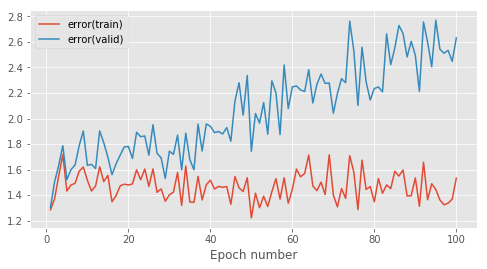

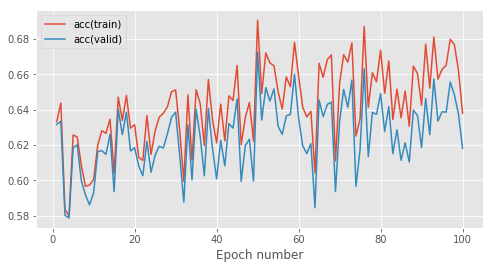

In [18]:
# Adam Learning Rule

from mlp.layers import AffineLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule, RMSPropLearningRule, AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.01
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = UniformInit(-np.sqrt(3/(input_dim)), np.sqrt(3/(input_dim)),rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/19_error_leaky_relu_2hls_fanin_adam_3", "../results/19_accuracy_leaky_relu_2hls_fanin_adam_3", "../results/19_stats_leaky_relu_2hls_fanin_adam_3.csv", notebook=True)

Section 5-7; Investigate the impact of using batch normalisation in deep neural networks

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 5.5s to complete
    error(train)=7.32e-01, acc(train)=7.68e-01, error(valid)=7.56e-01, acc(valid)=7.61e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 5.3s to complete
    error(train)=6.09e-01, acc(train)=7.97e-01, error(valid)=6.42e-01, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 5.1s to complete
    error(train)=5.45e-01, acc(train)=8.18e-01, error(valid)=6.03e-01, acc(valid)=8.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 5.2s to complete
    error(train)=5.00e-01, acc(train)=8.32e-01, error(valid)=5.65e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 5.3s to complete
    error(train)=4.85e-01, acc(train)=8.36e-01, error(valid)=5.61e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 7.2s to complete
    error(train)=4.57e-01, acc(train)=8.44e-01, error(valid)=5.39e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 4.7s to complete
    error(train)=4.51e-01, acc(train)=8.44e-01, error(valid)=5.37e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 4.9s to complete
    error(train)=4.37e-01, acc(train)=8.48e-01, error(valid)=5.40e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 5.3s to complete
    error(train)=4.16e-01, acc(train)=8.56e-01, error(valid)=5.20e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 5.1s to complete
    error(train)=4.01e-01, acc(train)=8.59e-01, error(valid)=5.21e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 5.2s to complete
    error(train)=3.88e-01, acc(train)=8.63e-01, error(valid)=5.10e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 5.2s to complete
    error(train)=3.82e-01, acc(train)=8.63e-01, error(valid)=5.06e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 4.9s to complete
    error(train)=3.71e-01, acc(train)=8.66e-01, error(valid)=5.01e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 5.3s to complete
    error(train)=3.70e-01, acc(train)=8.68e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 5.2s to complete
    error(train)=3.66e-01, acc(train)=8.68e-01, error(valid)=5.07e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 4.9s to complete
    error(train)=3.55e-01, acc(train)=8.73e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 4.4s to complete
    error(train)=3.41e-01, acc(train)=8.78e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 4.6s to complete
    error(train)=3.39e-01, acc(train)=8.76e-01, error(valid)=5.00e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 4.5s to complete
    error(train)=3.39e-01, acc(train)=8.76e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 4.8s to complete
    error(train)=3.35e-01, acc(train)=8.77e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 5.2s to complete
    error(train)=3.28e-01, acc(train)=8.80e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 6.1s to complete
    error(train)=3.19e-01, acc(train)=8.83e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 7.1s to complete
    error(train)=3.19e-01, acc(train)=8.82e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 5.6s to complete
    error(train)=3.12e-01, acc(train)=8.85e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 5.3s to complete
    error(train)=3.10e-01, acc(train)=8.86e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 4.7s to complete
    error(train)=3.04e-01, acc(train)=8.88e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 4.7s to complete
    error(train)=3.09e-01, acc(train)=8.83e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 4.8s to complete
    error(train)=2.98e-01, acc(train)=8.89e-01, error(valid)=5.18e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 3.9s to complete
    error(train)=2.95e-01, acc(train)=8.90e-01, error(valid)=5.23e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 4.3s to complete
    error(train)=2.97e-01, acc(train)=8.87e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 4.6s to complete
    error(train)=2.99e-01, acc(train)=8.86e-01, error(valid)=5.35e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 4.9s to complete
    error(train)=2.86e-01, acc(train)=8.91e-01, error(valid)=5.34e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 4.7s to complete
    error(train)=2.81e-01, acc(train)=8.94e-01, error(valid)=5.29e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 4.5s to complete
    error(train)=2.82e-01, acc(train)=8.94e-01, error(valid)=5.33e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 4.2s to complete
    error(train)=2.80e-01, acc(train)=8.94e-01, error(valid)=5.35e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 4.3s to complete
    error(train)=2.77e-01, acc(train)=8.96e-01, error(valid)=5.35e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 6.3s to complete
    error(train)=2.74e-01, acc(train)=8.96e-01, error(valid)=5.43e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 4.8s to complete
    error(train)=2.69e-01, acc(train)=8.98e-01, error(valid)=5.45e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 4.3s to complete
    error(train)=2.66e-01, acc(train)=8.99e-01, error(valid)=5.50e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 4.8s to complete
    error(train)=2.71e-01, acc(train)=8.94e-01, error(valid)=5.49e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 4.5s to complete
    error(train)=2.65e-01, acc(train)=8.99e-01, error(valid)=5.59e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 4.5s to complete
    error(train)=2.58e-01, acc(train)=9.02e-01, error(valid)=5.53e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 4.7s to complete
    error(train)=2.62e-01, acc(train)=8.99e-01, error(valid)=5.63e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 4.5s to complete
    error(train)=2.61e-01, acc(train)=9.01e-01, error(valid)=5.67e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 4.8s to complete
    error(train)=2.55e-01, acc(train)=9.03e-01, error(valid)=5.64e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 5.2s to complete
    error(train)=2.54e-01, acc(train)=9.04e-01, error(valid)=5.64e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 4.9s to complete
    error(train)=2.53e-01, acc(train)=9.02e-01, error(valid)=5.74e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 4.6s to complete
    error(train)=2.49e-01, acc(train)=9.05e-01, error(valid)=5.69e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 4.6s to complete
    error(train)=2.45e-01, acc(train)=9.06e-01, error(valid)=5.68e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 4.6s to complete
    error(train)=2.44e-01, acc(train)=9.06e-01, error(valid)=5.68e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 4.9s to complete
    error(train)=2.42e-01, acc(train)=9.06e-01, error(valid)=5.75e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 5.5s to complete
    error(train)=2.39e-01, acc(train)=9.08e-01, error(valid)=5.78e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 9.0s to complete
    error(train)=2.42e-01, acc(train)=9.06e-01, error(valid)=5.83e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 7.2s to complete
    error(train)=2.38e-01, acc(train)=9.08e-01, error(valid)=5.88e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 8.3s to complete
    error(train)=2.41e-01, acc(train)=9.07e-01, error(valid)=5.87e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 6.0s to complete
    error(train)=2.38e-01, acc(train)=9.08e-01, error(valid)=5.91e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 5.5s to complete
    error(train)=2.35e-01, acc(train)=9.09e-01, error(valid)=5.89e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 7.2s to complete
    error(train)=2.32e-01, acc(train)=9.10e-01, error(valid)=5.97e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 7.1s to complete
    error(train)=2.32e-01, acc(train)=9.10e-01, error(valid)=6.02e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 6.0s to complete
    error(train)=2.28e-01, acc(train)=9.11e-01, error(valid)=6.06e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 7.4s to complete
    error(train)=2.36e-01, acc(train)=9.06e-01, error(valid)=6.14e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 6.2s to complete
    error(train)=2.28e-01, acc(train)=9.11e-01, error(valid)=5.98e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 4.8s to complete
    error(train)=2.29e-01, acc(train)=9.11e-01, error(valid)=6.05e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 4.8s to complete
    error(train)=2.23e-01, acc(train)=9.13e-01, error(valid)=6.08e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 4.9s to complete
    error(train)=2.22e-01, acc(train)=9.13e-01, error(valid)=6.17e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 5.0s to complete
    error(train)=2.26e-01, acc(train)=9.12e-01, error(valid)=6.11e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 4.6s to complete
    error(train)=2.26e-01, acc(train)=9.11e-01, error(valid)=6.19e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 4.6s to complete
    error(train)=2.25e-01, acc(train)=9.13e-01, error(valid)=6.24e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 5.0s to complete
    error(train)=2.19e-01, acc(train)=9.13e-01, error(valid)=6.21e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 4.9s to complete
    error(train)=2.19e-01, acc(train)=9.15e-01, error(valid)=6.19e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 4.9s to complete
    error(train)=2.18e-01, acc(train)=9.14e-01, error(valid)=6.24e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 4.7s to complete
    error(train)=2.17e-01, acc(train)=9.14e-01, error(valid)=6.31e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 4.7s to complete
    error(train)=2.21e-01, acc(train)=9.12e-01, error(valid)=6.36e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 5.0s to complete
    error(train)=2.20e-01, acc(train)=9.13e-01, error(valid)=6.44e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 5.1s to complete
    error(train)=2.12e-01, acc(train)=9.17e-01, error(valid)=6.37e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 4.7s to complete
    error(train)=2.10e-01, acc(train)=9.18e-01, error(valid)=6.35e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 4.8s to complete
    error(train)=2.14e-01, acc(train)=9.15e-01, error(valid)=6.41e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 4.7s to complete
    error(train)=2.13e-01, acc(train)=9.15e-01, error(valid)=6.53e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 4.6s to complete
    error(train)=2.10e-01, acc(train)=9.18e-01, error(valid)=6.43e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 5.3s to complete
    error(train)=2.12e-01, acc(train)=9.15e-01, error(valid)=6.60e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 6.3s to complete
    error(train)=2.10e-01, acc(train)=9.18e-01, error(valid)=6.57e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 5.1s to complete
    error(train)=2.12e-01, acc(train)=9.15e-01, error(valid)=6.54e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 4.6s to complete
    error(train)=2.07e-01, acc(train)=9.20e-01, error(valid)=6.53e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 5.1s to complete
    error(train)=2.05e-01, acc(train)=9.19e-01, error(valid)=6.50e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 4.7s to complete
    error(train)=2.03e-01, acc(train)=9.20e-01, error(valid)=6.55e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 4.8s to complete
    error(train)=2.05e-01, acc(train)=9.19e-01, error(valid)=6.55e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 4.5s to complete
    error(train)=2.05e-01, acc(train)=9.20e-01, error(valid)=6.64e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 4.7s to complete
    error(train)=2.02e-01, acc(train)=9.20e-01, error(valid)=6.80e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 4.6s to complete
    error(train)=2.00e-01, acc(train)=9.21e-01, error(valid)=6.68e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 4.6s to complete
    error(train)=2.01e-01, acc(train)=9.20e-01, error(valid)=6.68e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 4.7s to complete
    error(train)=1.99e-01, acc(train)=9.22e-01, error(valid)=6.77e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 5.0s to complete
    error(train)=1.99e-01, acc(train)=9.21e-01, error(valid)=6.71e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 4.4s to complete
    error(train)=1.95e-01, acc(train)=9.22e-01, error(valid)=6.82e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 4.8s to complete
    error(train)=2.01e-01, acc(train)=9.20e-01, error(valid)=6.87e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 4.5s to complete
    error(train)=1.97e-01, acc(train)=9.22e-01, error(valid)=6.93e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 4.7s to complete
    error(train)=1.94e-01, acc(train)=9.23e-01, error(valid)=6.90e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 4.8s to complete
    error(train)=1.92e-01, acc(train)=9.24e-01, error(valid)=6.90e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 4.7s to complete
    error(train)=1.95e-01, acc(train)=9.22e-01, error(valid)=6.98e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 4.8s to complete
    error(train)=1.95e-01, acc(train)=9.22e-01, error(valid)=6.98e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 4.8s to complete
    error(train)=1.92e-01, acc(train)=9.24e-01, error(valid)=6.99e-01, acc(valid)=8.20e-01


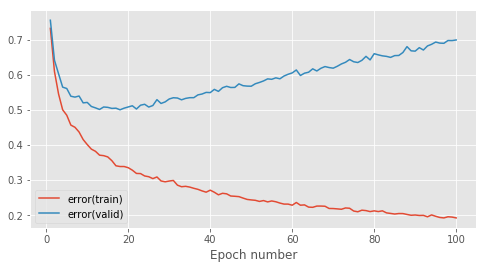

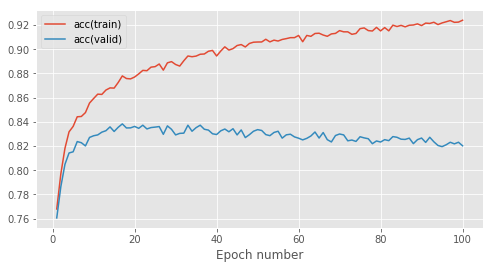

In [21]:
# Batchnormalization - Learning Rate Experiments
# LeakyReLu, 2 Hidden Layers, Fan-in strategy

from mlp.layers import AffineLayer, LeakyReluLayer, BatchNormalizationLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = UniformInit(-np.sqrt(3/(input_dim)), np.sqrt(3/(input_dim)),rng=rng)
biases_init = ConstantInit(0.)
b1_model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    BatchNormalizationLayer(hidden_dim),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    BatchNormalizationLayer(hidden_dim),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    b1_model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/20_error_pleaky_relu_2hls_fanin_bn1", "../results/20_accuracy_leaky_relu_2hls_fanin_bn1", "../results/20_stats_leaky_relu_2hls_fanin_bn1.csv", notebook=True)

learning_rate = 0.2

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 4.8s to complete
    error(train)=6.81e-01, acc(train)=7.78e-01, error(valid)=7.09e-01, acc(valid)=7.74e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 5.2s to complete
    error(train)=5.66e-01, acc(train)=8.14e-01, error(valid)=6.09e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 5.3s to complete
    error(train)=5.13e-01, acc(train)=8.27e-01, error(valid)=5.72e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 4.9s to complete
    error(train)=4.74e-01, acc(train)=8.36e-01, error(valid)=5.38e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 4.9s to complete
    error(train)=4.57e-01, acc(train)=8.43e-01, error(valid)=5.38e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 4.7s to complete
    error(train)=4.37e-01, acc(train)=8.47e-01, error(valid)=5.26e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 5.0s to complete
    error(train)=4.19e-01, acc(train)=8.52e-01, error(valid)=5.23e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 5.1s to complete
    error(train)=4.00e-01, acc(train)=8.59e-01, error(valid)=5.07e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 4.7s to complete
    error(train)=3.90e-01, acc(train)=8.61e-01, error(valid)=5.02e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 5.2s to complete
    error(train)=3.83e-01, acc(train)=8.63e-01, error(valid)=5.02e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 5.1s to complete
    error(train)=3.68e-01, acc(train)=8.68e-01, error(valid)=4.95e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 5.1s to complete
    error(train)=3.64e-01, acc(train)=8.71e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 5.9s to complete
    error(train)=3.60e-01, acc(train)=8.72e-01, error(valid)=5.01e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 4.7s to complete
    error(train)=3.47e-01, acc(train)=8.75e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 5.7s to complete
    error(train)=3.43e-01, acc(train)=8.75e-01, error(valid)=4.92e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 5.2s to complete
    error(train)=3.38e-01, acc(train)=8.76e-01, error(valid)=4.99e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 5.1s to complete
    error(train)=3.33e-01, acc(train)=8.78e-01, error(valid)=5.00e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 4.6s to complete
    error(train)=3.28e-01, acc(train)=8.79e-01, error(valid)=5.00e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 4.9s to complete
    error(train)=3.21e-01, acc(train)=8.81e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 5.0s to complete
    error(train)=3.17e-01, acc(train)=8.82e-01, error(valid)=4.96e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 4.7s to complete
    error(train)=3.12e-01, acc(train)=8.85e-01, error(valid)=5.00e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 4.7s to complete
    error(train)=3.16e-01, acc(train)=8.82e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 5.1s to complete
    error(train)=3.03e-01, acc(train)=8.89e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 5.2s to complete
    error(train)=3.04e-01, acc(train)=8.87e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 4.9s to complete
    error(train)=2.99e-01, acc(train)=8.90e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 4.7s to complete
    error(train)=2.88e-01, acc(train)=8.93e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 5.1s to complete
    error(train)=2.91e-01, acc(train)=8.92e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 5.0s to complete
    error(train)=2.95e-01, acc(train)=8.89e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 5.7s to complete
    error(train)=2.86e-01, acc(train)=8.93e-01, error(valid)=5.22e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 4.9s to complete
    error(train)=2.80e-01, acc(train)=8.96e-01, error(valid)=5.21e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 4.9s to complete
    error(train)=2.82e-01, acc(train)=8.93e-01, error(valid)=5.25e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 4.6s to complete
    error(train)=2.76e-01, acc(train)=8.97e-01, error(valid)=5.22e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 4.7s to complete
    error(train)=2.77e-01, acc(train)=8.95e-01, error(valid)=5.29e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 4.6s to complete
    error(train)=2.71e-01, acc(train)=8.95e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 4.9s to complete
    error(train)=2.68e-01, acc(train)=8.98e-01, error(valid)=5.35e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 4.4s to complete
    error(train)=2.64e-01, acc(train)=8.99e-01, error(valid)=5.33e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 5.5s to complete
    error(train)=2.64e-01, acc(train)=9.00e-01, error(valid)=5.36e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 4.8s to complete
    error(train)=2.62e-01, acc(train)=9.01e-01, error(valid)=5.33e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 4.9s to complete
    error(train)=2.64e-01, acc(train)=8.97e-01, error(valid)=5.41e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 4.8s to complete
    error(train)=2.61e-01, acc(train)=8.99e-01, error(valid)=5.39e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 5.1s to complete
    error(train)=2.53e-01, acc(train)=9.02e-01, error(valid)=5.44e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 5.0s to complete
    error(train)=2.56e-01, acc(train)=9.02e-01, error(valid)=5.44e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 4.7s to complete
    error(train)=2.48e-01, acc(train)=9.05e-01, error(valid)=5.46e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 5.1s to complete
    error(train)=2.46e-01, acc(train)=9.06e-01, error(valid)=5.50e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 4.8s to complete
    error(train)=2.51e-01, acc(train)=9.03e-01, error(valid)=5.50e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 5.4s to complete
    error(train)=2.50e-01, acc(train)=9.04e-01, error(valid)=5.62e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 4.6s to complete
    error(train)=2.47e-01, acc(train)=9.05e-01, error(valid)=5.57e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 5.7s to complete
    error(train)=2.45e-01, acc(train)=9.07e-01, error(valid)=5.66e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 4.7s to complete
    error(train)=2.42e-01, acc(train)=9.06e-01, error(valid)=5.66e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 4.7s to complete
    error(train)=2.42e-01, acc(train)=9.06e-01, error(valid)=5.65e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 4.9s to complete
    error(train)=2.40e-01, acc(train)=9.08e-01, error(valid)=5.74e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 5.3s to complete
    error(train)=2.36e-01, acc(train)=9.09e-01, error(valid)=5.72e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 5.2s to complete
    error(train)=2.37e-01, acc(train)=9.08e-01, error(valid)=5.77e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 4.9s to complete
    error(train)=2.36e-01, acc(train)=9.09e-01, error(valid)=5.88e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 5.1s to complete
    error(train)=2.34e-01, acc(train)=9.09e-01, error(valid)=5.82e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 4.9s to complete
    error(train)=2.29e-01, acc(train)=9.12e-01, error(valid)=5.80e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 4.9s to complete
    error(train)=2.31e-01, acc(train)=9.08e-01, error(valid)=5.85e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 4.9s to complete
    error(train)=2.31e-01, acc(train)=9.10e-01, error(valid)=5.80e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 4.9s to complete
    error(train)=2.27e-01, acc(train)=9.12e-01, error(valid)=5.86e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 4.7s to complete
    error(train)=2.26e-01, acc(train)=9.13e-01, error(valid)=5.93e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 4.4s to complete
    error(train)=2.29e-01, acc(train)=9.11e-01, error(valid)=5.96e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 4.8s to complete
    error(train)=2.26e-01, acc(train)=9.12e-01, error(valid)=5.95e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 4.6s to complete
    error(train)=2.30e-01, acc(train)=9.08e-01, error(valid)=6.02e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 4.9s to complete
    error(train)=2.21e-01, acc(train)=9.13e-01, error(valid)=5.89e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 6.3s to complete
    error(train)=2.26e-01, acc(train)=9.12e-01, error(valid)=6.14e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 5.2s to complete
    error(train)=2.19e-01, acc(train)=9.15e-01, error(valid)=5.99e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 5.0s to complete
    error(train)=2.21e-01, acc(train)=9.13e-01, error(valid)=6.17e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 4.5s to complete
    error(train)=2.19e-01, acc(train)=9.15e-01, error(valid)=6.16e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 5.0s to complete
    error(train)=2.22e-01, acc(train)=9.12e-01, error(valid)=6.19e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 4.7s to complete
    error(train)=2.16e-01, acc(train)=9.16e-01, error(valid)=6.18e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 5.3s to complete
    error(train)=2.16e-01, acc(train)=9.15e-01, error(valid)=6.14e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 5.0s to complete
    error(train)=2.16e-01, acc(train)=9.15e-01, error(valid)=6.18e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 4.4s to complete
    error(train)=2.13e-01, acc(train)=9.16e-01, error(valid)=6.28e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 4.9s to complete
    error(train)=2.19e-01, acc(train)=9.14e-01, error(valid)=6.33e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 5.1s to complete
    error(train)=2.11e-01, acc(train)=9.16e-01, error(valid)=6.28e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 4.9s to complete
    error(train)=2.12e-01, acc(train)=9.15e-01, error(valid)=6.36e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 4.9s to complete
    error(train)=2.12e-01, acc(train)=9.17e-01, error(valid)=6.37e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 4.9s to complete
    error(train)=2.07e-01, acc(train)=9.17e-01, error(valid)=6.32e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 5.3s to complete
    error(train)=2.18e-01, acc(train)=9.14e-01, error(valid)=6.50e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 5.4s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=6.32e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 5.1s to complete
    error(train)=2.09e-01, acc(train)=9.17e-01, error(valid)=6.47e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 5.1s to complete
    error(train)=2.05e-01, acc(train)=9.19e-01, error(valid)=6.45e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 5.3s to complete
    error(train)=2.05e-01, acc(train)=9.19e-01, error(valid)=6.43e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 6.1s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=6.54e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 4.7s to complete
    error(train)=2.02e-01, acc(train)=9.19e-01, error(valid)=6.47e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 4.8s to complete
    error(train)=2.03e-01, acc(train)=9.20e-01, error(valid)=6.43e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 5.2s to complete
    error(train)=2.04e-01, acc(train)=9.20e-01, error(valid)=6.47e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 4.7s to complete
    error(train)=2.01e-01, acc(train)=9.20e-01, error(valid)=6.49e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 5.1s to complete
    error(train)=2.05e-01, acc(train)=9.17e-01, error(valid)=6.44e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 5.4s to complete
    error(train)=2.01e-01, acc(train)=9.21e-01, error(valid)=6.50e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 8.9s to complete
    error(train)=2.00e-01, acc(train)=9.20e-01, error(valid)=6.66e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 3.4s to complete
    error(train)=2.01e-01, acc(train)=9.20e-01, error(valid)=6.67e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 3.3s to complete
    error(train)=1.97e-01, acc(train)=9.22e-01, error(valid)=6.58e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 2.8s to complete
    error(train)=2.00e-01, acc(train)=9.20e-01, error(valid)=6.67e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 3.8s to complete
    error(train)=1.94e-01, acc(train)=9.23e-01, error(valid)=6.62e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 8.1s to complete
    error(train)=1.93e-01, acc(train)=9.23e-01, error(valid)=6.77e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 3.7s to complete
    error(train)=1.93e-01, acc(train)=9.24e-01, error(valid)=6.82e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 3.6s to complete
    error(train)=1.97e-01, acc(train)=9.21e-01, error(valid)=6.73e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 4.7s to complete
    error(train)=1.97e-01, acc(train)=9.22e-01, error(valid)=6.80e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 6.3s to complete
    error(train)=1.97e-01, acc(train)=9.20e-01, error(valid)=6.77e-01, acc(valid)=8.25e-01


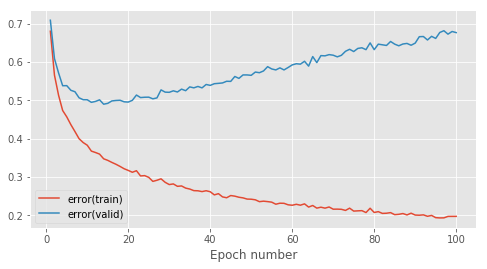

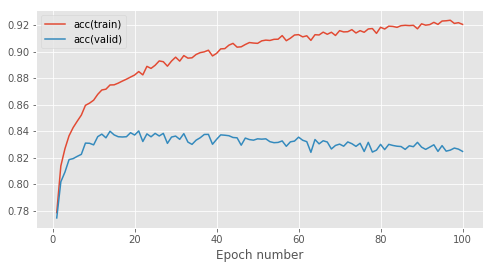

In [22]:
# Batchnormalization - Learning Rate Experiments
# LeakyReLu, 2 Hidden Layers, Fan-in strategy

from mlp.layers import AffineLayer, LeakyReluLayer, BatchNormalizationLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.2
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = UniformInit(-np.sqrt(3/(input_dim)), np.sqrt(3/(input_dim)),rng=rng)
biases_init = ConstantInit(0.)
b2_model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    BatchNormalizationLayer(hidden_dim),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    BatchNormalizationLayer(hidden_dim),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    b2_model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/21_error_pleaky_relu_2hls_fanin_bn2", "../results/21_accuracy_leaky_relu_2hls_fanin_bn2", "../results/21_stats_leaky_relu_2hls_fanin_bn2.csv", notebook=True)

incl_prob = 0.4

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 5.6s to complete
    error(train)=1.32e+00, acc(train)=6.09e-01, error(valid)=1.33e+00, acc(valid)=6.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 4.2s to complete
    error(train)=1.14e+00, acc(train)=6.54e-01, error(valid)=1.14e+00, acc(valid)=6.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 5.5s to complete
    error(train)=1.04e+00, acc(train)=6.80e-01, error(valid)=1.05e+00, acc(valid)=6.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 5.5s to complete
    error(train)=9.65e-01, acc(train)=7.02e-01, error(valid)=9.73e-01, acc(valid)=6.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 5.5s to complete
    error(train)=9.07e-01, acc(train)=7.17e-01, error(valid)=9.20e-01, acc(valid)=7.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 5.0s to complete
    error(train)=8.71e-01, acc(train)=7.28e-01, error(valid)=8.78e-01, acc(valid)=7.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 5.3s to complete
    error(train)=8.42e-01, acc(train)=7.35e-01, error(valid)=8.48e-01, acc(valid)=7.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 6.3s to complete
    error(train)=8.30e-01, acc(train)=7.38e-01, error(valid)=8.38e-01, acc(valid)=7.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 5.8s to complete
    error(train)=8.06e-01, acc(train)=7.44e-01, error(valid)=8.13e-01, acc(valid)=7.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 5.5s to complete
    error(train)=7.83e-01, acc(train)=7.54e-01, error(valid)=7.96e-01, acc(valid)=7.50e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 5.4s to complete
    error(train)=7.70e-01, acc(train)=7.56e-01, error(valid)=7.79e-01, acc(valid)=7.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 5.0s to complete
    error(train)=7.64e-01, acc(train)=7.58e-01, error(valid)=7.74e-01, acc(valid)=7.55e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 5.3s to complete
    error(train)=7.49e-01, acc(train)=7.61e-01, error(valid)=7.58e-01, acc(valid)=7.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 5.5s to complete
    error(train)=7.39e-01, acc(train)=7.60e-01, error(valid)=7.50e-01, acc(valid)=7.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 5.2s to complete
    error(train)=7.23e-01, acc(train)=7.68e-01, error(valid)=7.30e-01, acc(valid)=7.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 5.3s to complete
    error(train)=7.17e-01, acc(train)=7.70e-01, error(valid)=7.22e-01, acc(valid)=7.71e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 5.3s to complete
    error(train)=7.13e-01, acc(train)=7.71e-01, error(valid)=7.20e-01, acc(valid)=7.70e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 5.5s to complete
    error(train)=7.04e-01, acc(train)=7.74e-01, error(valid)=7.07e-01, acc(valid)=7.74e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 5.0s to complete
    error(train)=7.03e-01, acc(train)=7.75e-01, error(valid)=7.08e-01, acc(valid)=7.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 5.0s to complete
    error(train)=6.97e-01, acc(train)=7.77e-01, error(valid)=7.07e-01, acc(valid)=7.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 5.2s to complete
    error(train)=6.88e-01, acc(train)=7.79e-01, error(valid)=6.97e-01, acc(valid)=7.76e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 5.2s to complete
    error(train)=6.82e-01, acc(train)=7.80e-01, error(valid)=6.95e-01, acc(valid)=7.77e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 5.1s to complete
    error(train)=6.85e-01, acc(train)=7.79e-01, error(valid)=6.97e-01, acc(valid)=7.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 5.0s to complete
    error(train)=6.73e-01, acc(train)=7.82e-01, error(valid)=6.78e-01, acc(valid)=7.79e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 5.0s to complete
    error(train)=6.74e-01, acc(train)=7.82e-01, error(valid)=6.83e-01, acc(valid)=7.81e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 4.8s to complete
    error(train)=6.70e-01, acc(train)=7.84e-01, error(valid)=6.74e-01, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 5.4s to complete
    error(train)=6.61e-01, acc(train)=7.87e-01, error(valid)=6.68e-01, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 5.6s to complete
    error(train)=6.65e-01, acc(train)=7.84e-01, error(valid)=6.75e-01, acc(valid)=7.82e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 4.9s to complete
    error(train)=6.57e-01, acc(train)=7.87e-01, error(valid)=6.67e-01, acc(valid)=7.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 6.6s to complete
    error(train)=6.59e-01, acc(train)=7.88e-01, error(valid)=6.66e-01, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 5.2s to complete
    error(train)=6.55e-01, acc(train)=7.88e-01, error(valid)=6.67e-01, acc(valid)=7.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 5.0s to complete
    error(train)=6.54e-01, acc(train)=7.88e-01, error(valid)=6.59e-01, acc(valid)=7.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 5.0s to complete
    error(train)=6.52e-01, acc(train)=7.88e-01, error(valid)=6.61e-01, acc(valid)=7.81e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 5.0s to complete
    error(train)=6.47e-01, acc(train)=7.91e-01, error(valid)=6.58e-01, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 5.4s to complete
    error(train)=6.46e-01, acc(train)=7.91e-01, error(valid)=6.57e-01, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 4.9s to complete
    error(train)=6.46e-01, acc(train)=7.89e-01, error(valid)=6.58e-01, acc(valid)=7.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 4.8s to complete
    error(train)=6.47e-01, acc(train)=7.90e-01, error(valid)=6.53e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 5.2s to complete
    error(train)=6.39e-01, acc(train)=7.93e-01, error(valid)=6.51e-01, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 4.9s to complete
    error(train)=6.43e-01, acc(train)=7.91e-01, error(valid)=6.58e-01, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 5.1s to complete
    error(train)=6.34e-01, acc(train)=7.95e-01, error(valid)=6.46e-01, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 5.2s to complete
    error(train)=6.31e-01, acc(train)=7.95e-01, error(valid)=6.42e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 4.8s to complete
    error(train)=6.30e-01, acc(train)=7.95e-01, error(valid)=6.43e-01, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 5.4s to complete
    error(train)=6.29e-01, acc(train)=7.96e-01, error(valid)=6.41e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 5.2s to complete
    error(train)=6.26e-01, acc(train)=7.96e-01, error(valid)=6.41e-01, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 5.8s to complete
    error(train)=6.29e-01, acc(train)=7.96e-01, error(valid)=6.39e-01, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 5.3s to complete
    error(train)=6.30e-01, acc(train)=7.96e-01, error(valid)=6.37e-01, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 5.9s to complete
    error(train)=6.27e-01, acc(train)=7.95e-01, error(valid)=6.39e-01, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 5.8s to complete
    error(train)=6.27e-01, acc(train)=7.96e-01, error(valid)=6.40e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 4.8s to complete
    error(train)=6.26e-01, acc(train)=7.97e-01, error(valid)=6.35e-01, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 5.0s to complete
    error(train)=6.24e-01, acc(train)=7.98e-01, error(valid)=6.37e-01, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 4.8s to complete
    error(train)=6.20e-01, acc(train)=7.98e-01, error(valid)=6.30e-01, acc(valid)=7.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 4.8s to complete
    error(train)=6.17e-01, acc(train)=8.00e-01, error(valid)=6.28e-01, acc(valid)=7.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 4.9s to complete
    error(train)=6.17e-01, acc(train)=7.99e-01, error(valid)=6.28e-01, acc(valid)=7.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 5.3s to complete
    error(train)=6.20e-01, acc(train)=7.98e-01, error(valid)=6.28e-01, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 4.7s to complete
    error(train)=6.13e-01, acc(train)=8.01e-01, error(valid)=6.21e-01, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 5.3s to complete
    error(train)=6.18e-01, acc(train)=7.99e-01, error(valid)=6.27e-01, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 4.7s to complete
    error(train)=6.14e-01, acc(train)=7.99e-01, error(valid)=6.28e-01, acc(valid)=7.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 5.0s to complete
    error(train)=6.14e-01, acc(train)=8.00e-01, error(valid)=6.16e-01, acc(valid)=7.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 4.8s to complete
    error(train)=6.15e-01, acc(train)=8.00e-01, error(valid)=6.29e-01, acc(valid)=7.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 5.0s to complete
    error(train)=6.13e-01, acc(train)=8.02e-01, error(valid)=6.20e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 4.9s to complete
    error(train)=6.13e-01, acc(train)=7.99e-01, error(valid)=6.20e-01, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 5.1s to complete
    error(train)=6.12e-01, acc(train)=8.00e-01, error(valid)=6.24e-01, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 4.9s to complete
    error(train)=6.10e-01, acc(train)=8.02e-01, error(valid)=6.17e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 4.8s to complete
    error(train)=6.08e-01, acc(train)=8.03e-01, error(valid)=6.22e-01, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 5.9s to complete
    error(train)=6.08e-01, acc(train)=8.01e-01, error(valid)=6.20e-01, acc(valid)=7.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 5.2s to complete
    error(train)=6.16e-01, acc(train)=7.98e-01, error(valid)=6.22e-01, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 5.1s to complete
    error(train)=6.06e-01, acc(train)=8.02e-01, error(valid)=6.14e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 5.4s to complete
    error(train)=6.06e-01, acc(train)=8.03e-01, error(valid)=6.15e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 5.0s to complete
    error(train)=6.09e-01, acc(train)=8.01e-01, error(valid)=6.14e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 4.9s to complete
    error(train)=6.05e-01, acc(train)=8.03e-01, error(valid)=6.16e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 5.4s to complete
    error(train)=6.05e-01, acc(train)=8.02e-01, error(valid)=6.14e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 5.1s to complete
    error(train)=6.03e-01, acc(train)=8.04e-01, error(valid)=6.09e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 4.6s to complete
    error(train)=6.05e-01, acc(train)=8.03e-01, error(valid)=6.14e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 4.7s to complete
    error(train)=6.05e-01, acc(train)=8.02e-01, error(valid)=6.13e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 4.5s to complete
    error(train)=6.06e-01, acc(train)=8.02e-01, error(valid)=6.12e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 4.9s to complete
    error(train)=6.02e-01, acc(train)=8.04e-01, error(valid)=6.07e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 5.1s to complete
    error(train)=6.00e-01, acc(train)=8.05e-01, error(valid)=6.08e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 5.0s to complete
    error(train)=6.05e-01, acc(train)=8.01e-01, error(valid)=6.11e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 5.2s to complete
    error(train)=6.06e-01, acc(train)=8.02e-01, error(valid)=6.13e-01, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 5.4s to complete
    error(train)=6.04e-01, acc(train)=8.02e-01, error(valid)=6.10e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 5.3s to complete
    error(train)=6.00e-01, acc(train)=8.03e-01, error(valid)=6.09e-01, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 5.5s to complete
    error(train)=6.01e-01, acc(train)=8.04e-01, error(valid)=6.09e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 5.3s to complete
    error(train)=5.96e-01, acc(train)=8.05e-01, error(valid)=6.00e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 5.2s to complete
    error(train)=6.03e-01, acc(train)=8.03e-01, error(valid)=6.11e-01, acc(valid)=7.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 4.9s to complete
    error(train)=6.02e-01, acc(train)=8.04e-01, error(valid)=6.09e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 5.0s to complete
    error(train)=5.96e-01, acc(train)=8.05e-01, error(valid)=6.04e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 5.2s to complete
    error(train)=5.96e-01, acc(train)=8.06e-01, error(valid)=6.04e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 4.8s to complete
    error(train)=5.97e-01, acc(train)=8.05e-01, error(valid)=6.08e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 5.2s to complete
    error(train)=5.99e-01, acc(train)=8.03e-01, error(valid)=6.05e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 5.0s to complete
    error(train)=5.93e-01, acc(train)=8.07e-01, error(valid)=6.04e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 4.8s to complete
    error(train)=5.94e-01, acc(train)=8.06e-01, error(valid)=6.03e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 4.6s to complete
    error(train)=6.00e-01, acc(train)=8.00e-01, error(valid)=6.07e-01, acc(valid)=7.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 4.6s to complete
    error(train)=5.95e-01, acc(train)=8.05e-01, error(valid)=6.02e-01, acc(valid)=8.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 5.4s to complete
    error(train)=5.96e-01, acc(train)=8.06e-01, error(valid)=6.01e-01, acc(valid)=8.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 5.4s to complete
    error(train)=5.92e-01, acc(train)=8.07e-01, error(valid)=5.97e-01, acc(valid)=8.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 4.8s to complete
    error(train)=5.94e-01, acc(train)=8.06e-01, error(valid)=6.02e-01, acc(valid)=8.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 4.4s to complete
    error(train)=5.93e-01, acc(train)=8.07e-01, error(valid)=6.01e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 4.7s to complete
    error(train)=5.92e-01, acc(train)=8.06e-01, error(valid)=5.98e-01, acc(valid)=8.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 5.5s to complete
    error(train)=5.91e-01, acc(train)=8.06e-01, error(valid)=6.02e-01, acc(valid)=8.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 5.2s to complete
    error(train)=5.94e-01, acc(train)=8.05e-01, error(valid)=5.99e-01, acc(valid)=8.03e-01


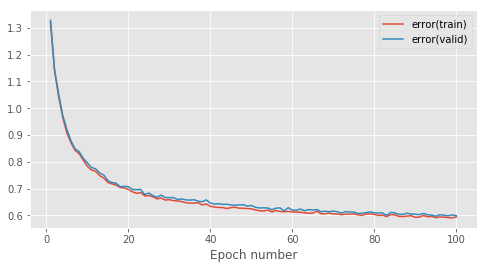

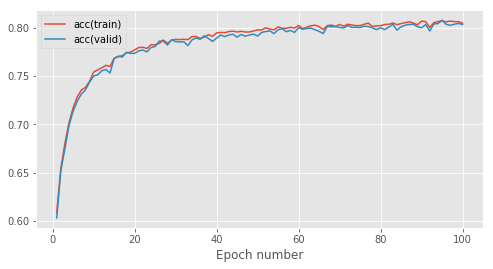

In [23]:
# Batchnormalization - Dropout Ensemble
# LeakyReLu, 2 Hidden Layers, Fan-in strategy


from mlp.layers import AffineLayer, LeakyReluLayer, BatchNormalizationLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
incl_prob = 0.4

weights_init = UniformInit(-np.sqrt(3/(input_dim)), np.sqrt(3/(input_dim)),rng=rng)
biases_init = ConstantInit(0.)
b3_model = MultipleLayerModel([
    DropoutLayer(rng, incl_prob),
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    BatchNormalizationLayer(hidden_dim),
    DropoutLayer(rng, incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    BatchNormalizationLayer(hidden_dim),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    b3_model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/22_error_leaky_relu_2hls_fanin_bn3", "../results/22_accuracy_leaky_relu_2hls_fanin_bn3", "../results/22_stats_leaky_relu_2hls_fanin_bn3.csv", notebook=True)

incl_prob = 0.1

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 5.4s to complete
    error(train)=2.62e+00, acc(train)=2.61e-01, error(valid)=2.62e+00, acc(valid)=2.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 5.1s to complete
    error(train)=2.31e+00, acc(train)=3.59e-01, error(valid)=2.31e+00, acc(valid)=3.60e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 6.3s to complete
    error(train)=2.14e+00, acc(train)=4.04e-01, error(valid)=2.14e+00, acc(valid)=4.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 5.3s to complete
    error(train)=2.04e+00, acc(train)=4.21e-01, error(valid)=2.05e+00, acc(valid)=4.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 6.2s to complete
    error(train)=1.98e+00, acc(train)=4.40e-01, error(valid)=1.98e+00, acc(valid)=4.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 4.7s to complete
    error(train)=1.92e+00, acc(train)=4.64e-01, error(valid)=1.92e+00, acc(valid)=4.61e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 4.8s to complete
    error(train)=1.90e+00, acc(train)=4.62e-01, error(valid)=1.90e+00, acc(valid)=4.65e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 5.4s to complete
    error(train)=1.87e+00, acc(train)=4.79e-01, error(valid)=1.86e+00, acc(valid)=4.78e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 4.7s to complete
    error(train)=1.84e+00, acc(train)=4.83e-01, error(valid)=1.85e+00, acc(valid)=4.80e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 4.6s to complete
    error(train)=1.82e+00, acc(train)=4.92e-01, error(valid)=1.82e+00, acc(valid)=4.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 4.8s to complete
    error(train)=1.80e+00, acc(train)=4.87e-01, error(valid)=1.80e+00, acc(valid)=4.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 4.7s to complete
    error(train)=1.78e+00, acc(train)=4.91e-01, error(valid)=1.78e+00, acc(valid)=4.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 4.9s to complete
    error(train)=1.77e+00, acc(train)=5.08e-01, error(valid)=1.76e+00, acc(valid)=5.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 5.0s to complete
    error(train)=1.76e+00, acc(train)=5.08e-01, error(valid)=1.76e+00, acc(valid)=5.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 4.6s to complete
    error(train)=1.74e+00, acc(train)=5.17e-01, error(valid)=1.74e+00, acc(valid)=5.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 4.8s to complete
    error(train)=1.73e+00, acc(train)=5.18e-01, error(valid)=1.74e+00, acc(valid)=5.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 5.0s to complete
    error(train)=1.73e+00, acc(train)=5.16e-01, error(valid)=1.73e+00, acc(valid)=5.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 4.8s to complete
    error(train)=1.71e+00, acc(train)=5.21e-01, error(valid)=1.71e+00, acc(valid)=5.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 4.6s to complete
    error(train)=1.70e+00, acc(train)=5.27e-01, error(valid)=1.70e+00, acc(valid)=5.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 5.0s to complete
    error(train)=1.71e+00, acc(train)=5.24e-01, error(valid)=1.71e+00, acc(valid)=5.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 5.0s to complete
    error(train)=1.67e+00, acc(train)=5.35e-01, error(valid)=1.68e+00, acc(valid)=5.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 5.6s to complete
    error(train)=1.69e+00, acc(train)=5.26e-01, error(valid)=1.69e+00, acc(valid)=5.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 5.1s to complete
    error(train)=1.68e+00, acc(train)=5.35e-01, error(valid)=1.68e+00, acc(valid)=5.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 4.8s to complete
    error(train)=1.67e+00, acc(train)=5.35e-01, error(valid)=1.67e+00, acc(valid)=5.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 4.6s to complete
    error(train)=1.67e+00, acc(train)=5.34e-01, error(valid)=1.67e+00, acc(valid)=5.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 4.8s to complete
    error(train)=1.66e+00, acc(train)=5.35e-01, error(valid)=1.66e+00, acc(valid)=5.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 5.4s to complete
    error(train)=1.65e+00, acc(train)=5.38e-01, error(valid)=1.65e+00, acc(valid)=5.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 5.1s to complete
    error(train)=1.66e+00, acc(train)=5.33e-01, error(valid)=1.65e+00, acc(valid)=5.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 5.0s to complete
    error(train)=1.65e+00, acc(train)=5.39e-01, error(valid)=1.65e+00, acc(valid)=5.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 4.6s to complete
    error(train)=1.65e+00, acc(train)=5.37e-01, error(valid)=1.65e+00, acc(valid)=5.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 5.2s to complete
    error(train)=1.64e+00, acc(train)=5.42e-01, error(valid)=1.64e+00, acc(valid)=5.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 4.7s to complete
    error(train)=1.64e+00, acc(train)=5.40e-01, error(valid)=1.64e+00, acc(valid)=5.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 4.8s to complete
    error(train)=1.64e+00, acc(train)=5.38e-01, error(valid)=1.64e+00, acc(valid)=5.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 5.3s to complete
    error(train)=1.62e+00, acc(train)=5.48e-01, error(valid)=1.61e+00, acc(valid)=5.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 4.9s to complete
    error(train)=1.63e+00, acc(train)=5.41e-01, error(valid)=1.63e+00, acc(valid)=5.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 4.6s to complete
    error(train)=1.62e+00, acc(train)=5.42e-01, error(valid)=1.62e+00, acc(valid)=5.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 4.7s to complete
    error(train)=1.62e+00, acc(train)=5.46e-01, error(valid)=1.62e+00, acc(valid)=5.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 5.1s to complete
    error(train)=1.63e+00, acc(train)=5.46e-01, error(valid)=1.63e+00, acc(valid)=5.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 5.6s to complete
    error(train)=1.62e+00, acc(train)=5.49e-01, error(valid)=1.61e+00, acc(valid)=5.48e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 7.3s to complete
    error(train)=1.61e+00, acc(train)=5.51e-01, error(valid)=1.61e+00, acc(valid)=5.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 8.0s to complete
    error(train)=1.61e+00, acc(train)=5.47e-01, error(valid)=1.61e+00, acc(valid)=5.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 6.1s to complete
    error(train)=1.60e+00, acc(train)=5.51e-01, error(valid)=1.60e+00, acc(valid)=5.48e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 6.8s to complete
    error(train)=1.60e+00, acc(train)=5.52e-01, error(valid)=1.60e+00, acc(valid)=5.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 4.3s to complete
    error(train)=1.59e+00, acc(train)=5.58e-01, error(valid)=1.59e+00, acc(valid)=5.55e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 6.3s to complete
    error(train)=1.59e+00, acc(train)=5.50e-01, error(valid)=1.59e+00, acc(valid)=5.45e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 5.1s to complete
    error(train)=1.59e+00, acc(train)=5.51e-01, error(valid)=1.59e+00, acc(valid)=5.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 5.0s to complete
    error(train)=1.59e+00, acc(train)=5.53e-01, error(valid)=1.59e+00, acc(valid)=5.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 5.4s to complete
    error(train)=1.59e+00, acc(train)=5.53e-01, error(valid)=1.59e+00, acc(valid)=5.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 5.8s to complete
    error(train)=1.58e+00, acc(train)=5.58e-01, error(valid)=1.59e+00, acc(valid)=5.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 8.0s to complete
    error(train)=1.59e+00, acc(train)=5.54e-01, error(valid)=1.59e+00, acc(valid)=5.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 5.4s to complete
    error(train)=1.58e+00, acc(train)=5.53e-01, error(valid)=1.58e+00, acc(valid)=5.49e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 6.7s to complete
    error(train)=1.58e+00, acc(train)=5.57e-01, error(valid)=1.58e+00, acc(valid)=5.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 4.9s to complete
    error(train)=1.58e+00, acc(train)=5.57e-01, error(valid)=1.58e+00, acc(valid)=5.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 5.3s to complete
    error(train)=1.58e+00, acc(train)=5.59e-01, error(valid)=1.58e+00, acc(valid)=5.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 5.2s to complete
    error(train)=1.57e+00, acc(train)=5.57e-01, error(valid)=1.57e+00, acc(valid)=5.49e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 5.3s to complete
    error(train)=1.58e+00, acc(train)=5.58e-01, error(valid)=1.58e+00, acc(valid)=5.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 5.5s to complete
    error(train)=1.57e+00, acc(train)=5.54e-01, error(valid)=1.57e+00, acc(valid)=5.55e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 5.3s to complete
    error(train)=1.57e+00, acc(train)=5.58e-01, error(valid)=1.57e+00, acc(valid)=5.59e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 5.1s to complete
    error(train)=1.58e+00, acc(train)=5.56e-01, error(valid)=1.58e+00, acc(valid)=5.49e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 5.1s to complete
    error(train)=1.56e+00, acc(train)=5.60e-01, error(valid)=1.56e+00, acc(valid)=5.55e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 4.7s to complete
    error(train)=1.56e+00, acc(train)=5.61e-01, error(valid)=1.56e+00, acc(valid)=5.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 4.9s to complete
    error(train)=1.56e+00, acc(train)=5.59e-01, error(valid)=1.56e+00, acc(valid)=5.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 4.6s to complete
    error(train)=1.56e+00, acc(train)=5.60e-01, error(valid)=1.56e+00, acc(valid)=5.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 5.1s to complete
    error(train)=1.56e+00, acc(train)=5.56e-01, error(valid)=1.57e+00, acc(valid)=5.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 4.7s to complete
    error(train)=1.55e+00, acc(train)=5.64e-01, error(valid)=1.55e+00, acc(valid)=5.61e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 4.8s to complete
    error(train)=1.55e+00, acc(train)=5.64e-01, error(valid)=1.55e+00, acc(valid)=5.58e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 6.1s to complete
    error(train)=1.55e+00, acc(train)=5.62e-01, error(valid)=1.55e+00, acc(valid)=5.60e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 8.6s to complete
    error(train)=1.55e+00, acc(train)=5.68e-01, error(valid)=1.55e+00, acc(valid)=5.62e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 5.6s to complete
    error(train)=1.53e+00, acc(train)=5.69e-01, error(valid)=1.53e+00, acc(valid)=5.63e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 5.8s to complete
    error(train)=1.53e+00, acc(train)=5.66e-01, error(valid)=1.54e+00, acc(valid)=5.59e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 9.4s to complete
    error(train)=1.55e+00, acc(train)=5.66e-01, error(valid)=1.55e+00, acc(valid)=5.63e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 5.1s to complete
    error(train)=1.54e+00, acc(train)=5.66e-01, error(valid)=1.54e+00, acc(valid)=5.61e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 5.3s to complete
    error(train)=1.54e+00, acc(train)=5.66e-01, error(valid)=1.54e+00, acc(valid)=5.60e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 5.3s to complete
    error(train)=1.53e+00, acc(train)=5.69e-01, error(valid)=1.54e+00, acc(valid)=5.66e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 9.1s to complete
    error(train)=1.53e+00, acc(train)=5.61e-01, error(valid)=1.53e+00, acc(valid)=5.59e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 8.5s to complete
    error(train)=1.53e+00, acc(train)=5.63e-01, error(valid)=1.53e+00, acc(valid)=5.62e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 9.4s to complete
    error(train)=1.52e+00, acc(train)=5.69e-01, error(valid)=1.53e+00, acc(valid)=5.66e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 8.8s to complete
    error(train)=1.53e+00, acc(train)=5.67e-01, error(valid)=1.53e+00, acc(valid)=5.63e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 8.1s to complete
    error(train)=1.52e+00, acc(train)=5.73e-01, error(valid)=1.52e+00, acc(valid)=5.71e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 8.5s to complete
    error(train)=1.52e+00, acc(train)=5.72e-01, error(valid)=1.52e+00, acc(valid)=5.67e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 4.7s to complete
    error(train)=1.53e+00, acc(train)=5.66e-01, error(valid)=1.53e+00, acc(valid)=5.64e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 4.3s to complete
    error(train)=1.52e+00, acc(train)=5.73e-01, error(valid)=1.52e+00, acc(valid)=5.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 7.1s to complete
    error(train)=1.53e+00, acc(train)=5.68e-01, error(valid)=1.53e+00, acc(valid)=5.64e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 8.1s to complete
    error(train)=1.52e+00, acc(train)=5.72e-01, error(valid)=1.52e+00, acc(valid)=5.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 4.8s to complete
    error(train)=1.53e+00, acc(train)=5.70e-01, error(valid)=1.53e+00, acc(valid)=5.64e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 4.4s to complete
    error(train)=1.52e+00, acc(train)=5.69e-01, error(valid)=1.52e+00, acc(valid)=5.66e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 4.3s to complete
    error(train)=1.51e+00, acc(train)=5.74e-01, error(valid)=1.51e+00, acc(valid)=5.74e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 4.3s to complete
    error(train)=1.51e+00, acc(train)=5.72e-01, error(valid)=1.52e+00, acc(valid)=5.71e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 7.6s to complete
    error(train)=1.52e+00, acc(train)=5.73e-01, error(valid)=1.52e+00, acc(valid)=5.69e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 8.9s to complete
    error(train)=1.51e+00, acc(train)=5.72e-01, error(valid)=1.52e+00, acc(valid)=5.67e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 7.0s to complete
    error(train)=1.51e+00, acc(train)=5.70e-01, error(valid)=1.51e+00, acc(valid)=5.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 8.7s to complete
    error(train)=1.51e+00, acc(train)=5.72e-01, error(valid)=1.51e+00, acc(valid)=5.66e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 5.2s to complete
    error(train)=1.51e+00, acc(train)=5.69e-01, error(valid)=1.51e+00, acc(valid)=5.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 4.4s to complete
    error(train)=1.51e+00, acc(train)=5.75e-01, error(valid)=1.51e+00, acc(valid)=5.72e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 4.6s to complete
    error(train)=1.51e+00, acc(train)=5.73e-01, error(valid)=1.51e+00, acc(valid)=5.70e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 4.9s to complete
    error(train)=1.51e+00, acc(train)=5.73e-01, error(valid)=1.51e+00, acc(valid)=5.69e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 4.8s to complete
    error(train)=1.52e+00, acc(train)=5.73e-01, error(valid)=1.52e+00, acc(valid)=5.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 4.1s to complete
    error(train)=1.51e+00, acc(train)=5.71e-01, error(valid)=1.51e+00, acc(valid)=5.69e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 4.8s to complete
    error(train)=1.51e+00, acc(train)=5.75e-01, error(valid)=1.51e+00, acc(valid)=5.72e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 4.8s to complete
    error(train)=1.51e+00, acc(train)=5.76e-01, error(valid)=1.51e+00, acc(valid)=5.75e-01


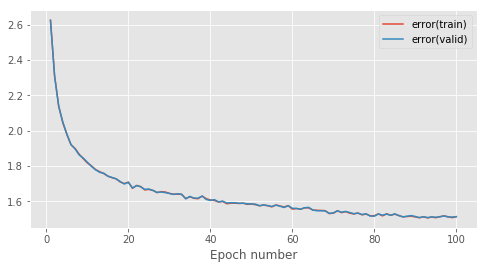

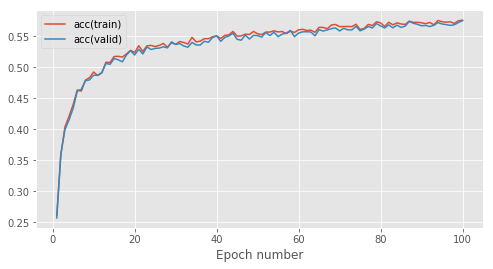

In [24]:
# Batchnormalization - Dropout Ensemble
# LeakyReLu, 2 Hidden Layers, Fan-in strategy


from mlp.layers import AffineLayer, LeakyReluLayer, BatchNormalizationLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
incl_prob = 0.1

weights_init = UniformInit(-np.sqrt(3/(input_dim)), np.sqrt(3/(input_dim)),rng=rng)
biases_init = ConstantInit(0.)
b4_model = MultipleLayerModel([
    DropoutLayer(rng, incl_prob),
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    BatchNormalizationLayer(hidden_dim),
    DropoutLayer(rng, incl_prob),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    BatchNormalizationLayer(hidden_dim),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    b4_model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/23_error_leaky_relu_2hls_fanin_bn4", "../results/23_accuracy_leaky_relu_2hls_fanin_bn4", "../results/23_stats_leaky_relu_2hls_fanin_bn4.csv", notebook=True)

DeeperNet

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 5.4s to complete
    error(train)=7.43e-01, acc(train)=7.61e-01, error(valid)=7.68e-01, acc(valid)=7.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 6.4s to complete
    error(train)=6.16e-01, acc(train)=7.95e-01, error(valid)=6.57e-01, acc(valid)=7.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 6.4s to complete
    error(train)=5.48e-01, acc(train)=8.15e-01, error(valid)=5.98e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 5.6s to complete
    error(train)=5.11e-01, acc(train)=8.25e-01, error(valid)=5.78e-01, acc(valid)=8.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 6.7s to complete
    error(train)=4.78e-01, acc(train)=8.37e-01, error(valid)=5.57e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 5.9s to complete
    error(train)=4.54e-01, acc(train)=8.42e-01, error(valid)=5.32e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 5.4s to complete
    error(train)=4.40e-01, acc(train)=8.47e-01, error(valid)=5.36e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 5.5s to complete
    error(train)=4.15e-01, acc(train)=8.52e-01, error(valid)=5.21e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 5.5s to complete
    error(train)=4.02e-01, acc(train)=8.58e-01, error(valid)=5.06e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 5.8s to complete
    error(train)=3.93e-01, acc(train)=8.60e-01, error(valid)=5.10e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 5.4s to complete
    error(train)=3.79e-01, acc(train)=8.63e-01, error(valid)=4.97e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 5.7s to complete
    error(train)=3.73e-01, acc(train)=8.67e-01, error(valid)=5.02e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 5.2s to complete
    error(train)=3.71e-01, acc(train)=8.65e-01, error(valid)=5.01e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 5.6s to complete
    error(train)=3.57e-01, acc(train)=8.71e-01, error(valid)=4.93e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 5.5s to complete
    error(train)=3.51e-01, acc(train)=8.72e-01, error(valid)=4.95e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 5.7s to complete
    error(train)=3.39e-01, acc(train)=8.76e-01, error(valid)=4.93e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 5.6s to complete
    error(train)=3.32e-01, acc(train)=8.79e-01, error(valid)=4.88e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 5.5s to complete
    error(train)=3.27e-01, acc(train)=8.80e-01, error(valid)=4.92e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 6.2s to complete
    error(train)=3.24e-01, acc(train)=8.79e-01, error(valid)=4.93e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 6.0s to complete
    error(train)=3.22e-01, acc(train)=8.82e-01, error(valid)=4.96e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 5.9s to complete
    error(train)=3.12e-01, acc(train)=8.85e-01, error(valid)=4.87e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 5.4s to complete
    error(train)=3.12e-01, acc(train)=8.84e-01, error(valid)=4.95e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 6.3s to complete
    error(train)=3.06e-01, acc(train)=8.85e-01, error(valid)=4.89e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 6.0s to complete
    error(train)=3.09e-01, acc(train)=8.85e-01, error(valid)=5.05e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 6.3s to complete
    error(train)=2.96e-01, acc(train)=8.88e-01, error(valid)=4.96e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 5.3s to complete
    error(train)=2.99e-01, acc(train)=8.87e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 5.7s to complete
    error(train)=2.86e-01, acc(train)=8.92e-01, error(valid)=4.92e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 5.9s to complete
    error(train)=2.92e-01, acc(train)=8.87e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 5.4s to complete
    error(train)=2.82e-01, acc(train)=8.93e-01, error(valid)=5.03e-01, acc(valid)=8.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 6.2s to complete
    error(train)=2.84e-01, acc(train)=8.91e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 5.9s to complete
    error(train)=2.81e-01, acc(train)=8.90e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 6.0s to complete
    error(train)=2.77e-01, acc(train)=8.93e-01, error(valid)=5.09e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 5.6s to complete
    error(train)=2.75e-01, acc(train)=8.94e-01, error(valid)=5.22e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 5.9s to complete
    error(train)=2.77e-01, acc(train)=8.94e-01, error(valid)=5.20e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 6.0s to complete
    error(train)=2.69e-01, acc(train)=8.96e-01, error(valid)=5.18e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 6.1s to complete
    error(train)=2.62e-01, acc(train)=8.98e-01, error(valid)=5.27e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 6.0s to complete
    error(train)=2.61e-01, acc(train)=8.99e-01, error(valid)=5.24e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 5.9s to complete
    error(train)=2.57e-01, acc(train)=9.00e-01, error(valid)=5.31e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 6.0s to complete
    error(train)=2.53e-01, acc(train)=9.02e-01, error(valid)=5.17e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 6.0s to complete
    error(train)=2.51e-01, acc(train)=9.04e-01, error(valid)=5.28e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 5.2s to complete
    error(train)=2.54e-01, acc(train)=8.99e-01, error(valid)=5.37e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 6.0s to complete
    error(train)=2.54e-01, acc(train)=9.01e-01, error(valid)=5.33e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 5.3s to complete
    error(train)=2.44e-01, acc(train)=9.05e-01, error(valid)=5.36e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 5.9s to complete
    error(train)=2.45e-01, acc(train)=9.04e-01, error(valid)=5.24e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 5.9s to complete
    error(train)=2.45e-01, acc(train)=9.04e-01, error(valid)=5.29e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 6.2s to complete
    error(train)=2.43e-01, acc(train)=9.04e-01, error(valid)=5.40e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 5.7s to complete
    error(train)=2.35e-01, acc(train)=9.07e-01, error(valid)=5.48e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 5.8s to complete
    error(train)=2.40e-01, acc(train)=9.05e-01, error(valid)=5.43e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 6.2s to complete
    error(train)=2.39e-01, acc(train)=9.04e-01, error(valid)=5.52e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 6.0s to complete
    error(train)=2.32e-01, acc(train)=9.09e-01, error(valid)=5.53e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 8.9s to complete
    error(train)=2.32e-01, acc(train)=9.08e-01, error(valid)=5.47e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 7.5s to complete
    error(train)=2.35e-01, acc(train)=9.08e-01, error(valid)=5.52e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 8.8s to complete
    error(train)=2.27e-01, acc(train)=9.10e-01, error(valid)=5.55e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 7.8s to complete
    error(train)=2.26e-01, acc(train)=9.11e-01, error(valid)=5.53e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 6.7s to complete
    error(train)=2.32e-01, acc(train)=9.08e-01, error(valid)=5.78e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 7.7s to complete
    error(train)=2.23e-01, acc(train)=9.11e-01, error(valid)=5.62e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 7.2s to complete
    error(train)=2.26e-01, acc(train)=9.10e-01, error(valid)=5.75e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 6.8s to complete
    error(train)=2.22e-01, acc(train)=9.11e-01, error(valid)=5.68e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 7.2s to complete
    error(train)=2.22e-01, acc(train)=9.12e-01, error(valid)=5.78e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 6.0s to complete
    error(train)=2.18e-01, acc(train)=9.14e-01, error(valid)=5.81e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 7.3s to complete
    error(train)=2.20e-01, acc(train)=9.11e-01, error(valid)=5.82e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 5.3s to complete
    error(train)=2.15e-01, acc(train)=9.15e-01, error(valid)=5.85e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 5.7s to complete
    error(train)=2.15e-01, acc(train)=9.14e-01, error(valid)=5.83e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 6.4s to complete
    error(train)=2.15e-01, acc(train)=9.14e-01, error(valid)=5.89e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 5.9s to complete
    error(train)=2.13e-01, acc(train)=9.15e-01, error(valid)=5.84e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 5.8s to complete
    error(train)=2.09e-01, acc(train)=9.17e-01, error(valid)=5.90e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 5.5s to complete
    error(train)=2.06e-01, acc(train)=9.18e-01, error(valid)=5.83e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 5.5s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=5.95e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 6.3s to complete
    error(train)=2.09e-01, acc(train)=9.16e-01, error(valid)=6.00e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 6.3s to complete
    error(train)=2.08e-01, acc(train)=9.17e-01, error(valid)=6.07e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 5.7s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=6.06e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 5.7s to complete
    error(train)=2.04e-01, acc(train)=9.18e-01, error(valid)=6.24e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 6.0s to complete
    error(train)=2.09e-01, acc(train)=9.16e-01, error(valid)=6.07e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 5.8s to complete
    error(train)=2.04e-01, acc(train)=9.17e-01, error(valid)=6.18e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 5.9s to complete
    error(train)=2.02e-01, acc(train)=9.17e-01, error(valid)=6.12e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 6.2s to complete
    error(train)=2.01e-01, acc(train)=9.18e-01, error(valid)=6.18e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 5.8s to complete
    error(train)=2.04e-01, acc(train)=9.18e-01, error(valid)=6.22e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 5.8s to complete
    error(train)=1.94e-01, acc(train)=9.22e-01, error(valid)=6.10e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 6.2s to complete
    error(train)=2.02e-01, acc(train)=9.18e-01, error(valid)=6.34e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 5.8s to complete
    error(train)=1.94e-01, acc(train)=9.23e-01, error(valid)=6.24e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 6.0s to complete
    error(train)=1.95e-01, acc(train)=9.21e-01, error(valid)=6.21e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 6.4s to complete
    error(train)=1.99e-01, acc(train)=9.19e-01, error(valid)=6.36e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 5.1s to complete
    error(train)=1.92e-01, acc(train)=9.23e-01, error(valid)=6.19e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 5.9s to complete
    error(train)=1.95e-01, acc(train)=9.22e-01, error(valid)=6.36e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 6.2s to complete
    error(train)=1.91e-01, acc(train)=9.22e-01, error(valid)=6.33e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 6.7s to complete
    error(train)=1.88e-01, acc(train)=9.24e-01, error(valid)=6.36e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 5.9s to complete
    error(train)=1.91e-01, acc(train)=9.22e-01, error(valid)=6.46e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 5.8s to complete
    error(train)=1.88e-01, acc(train)=9.24e-01, error(valid)=6.30e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 6.3s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=6.49e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 6.2s to complete
    error(train)=1.89e-01, acc(train)=9.22e-01, error(valid)=6.53e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 5.2s to complete
    error(train)=1.88e-01, acc(train)=9.24e-01, error(valid)=6.50e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 6.6s to complete
    error(train)=1.86e-01, acc(train)=9.25e-01, error(valid)=6.45e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 6.3s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=6.48e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 5.8s to complete
    error(train)=1.84e-01, acc(train)=9.25e-01, error(valid)=6.47e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 5.7s to complete
    error(train)=1.85e-01, acc(train)=9.24e-01, error(valid)=6.52e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 5.6s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=6.52e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 5.8s to complete
    error(train)=1.82e-01, acc(train)=9.26e-01, error(valid)=6.55e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 5.6s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=6.55e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 6.1s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=6.61e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 6.0s to complete
    error(train)=1.81e-01, acc(train)=9.26e-01, error(valid)=6.76e-01, acc(valid)=8.28e-01


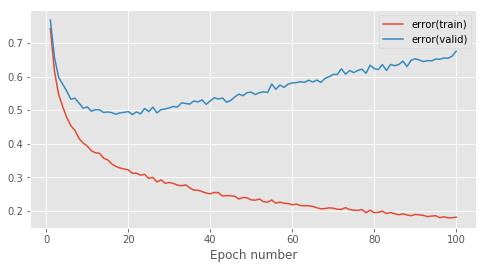

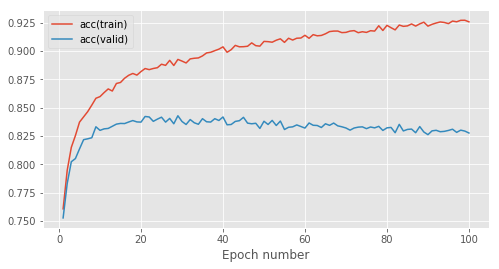

In [25]:
# Batchnormalization - Deeper Nets
# ReLu, 3 Hidden Layers, Fan-in strategy

from mlp.layers import AffineLayer, LeakyReluLayer, BatchNormalizationLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
weights_init = UniformInit(-np.sqrt(3/(input_dim)), np.sqrt(3/(input_dim)),rng=rng)
biases_init = ConstantInit(0.)
b5_model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    BatchNormalizationLayer(hidden_dim),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    BatchNormalizationLayer(hidden_dim),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    BatchNormalizationLayer(hidden_dim),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    b5_model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/24_error_leaky_relu_3hiddenlayers_fanin_bn5", "../results/24_accuracy_leaky_relu_3hiddenlayers_fanin_bn5", "../results/24_stats_leaky_relu_3hiddenlayers_fanin_bn5.csv", notebook=True)

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 8.0s to complete
    error(train)=7.50e-01, acc(train)=7.54e-01, error(valid)=7.73e-01, acc(valid)=7.47e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 7.8s to complete
    error(train)=6.11e-01, acc(train)=7.96e-01, error(valid)=6.58e-01, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 6.9s to complete
    error(train)=5.49e-01, acc(train)=8.13e-01, error(valid)=5.97e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 7.4s to complete
    error(train)=4.97e-01, acc(train)=8.30e-01, error(valid)=5.60e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 7.9s to complete
    error(train)=4.77e-01, acc(train)=8.32e-01, error(valid)=5.52e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 7.1s to complete
    error(train)=4.47e-01, acc(train)=8.44e-01, error(valid)=5.22e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 7.9s to complete
    error(train)=4.37e-01, acc(train)=8.45e-01, error(valid)=5.20e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 8.4s to complete
    error(train)=4.23e-01, acc(train)=8.52e-01, error(valid)=5.14e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 7.5s to complete
    error(train)=4.00e-01, acc(train)=8.56e-01, error(valid)=5.03e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 6.8s to complete
    error(train)=3.93e-01, acc(train)=8.59e-01, error(valid)=5.03e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 7.6s to complete
    error(train)=3.82e-01, acc(train)=8.64e-01, error(valid)=4.98e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 4.0s to complete
    error(train)=3.74e-01, acc(train)=8.63e-01, error(valid)=4.96e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 8.5s to complete
    error(train)=3.64e-01, acc(train)=8.67e-01, error(valid)=4.86e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 5.6s to complete
    error(train)=3.56e-01, acc(train)=8.69e-01, error(valid)=4.86e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 5.7s to complete
    error(train)=3.52e-01, acc(train)=8.71e-01, error(valid)=4.88e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 5.8s to complete
    error(train)=3.43e-01, acc(train)=8.73e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 5.5s to complete
    error(train)=3.36e-01, acc(train)=8.75e-01, error(valid)=4.90e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 5.9s to complete
    error(train)=3.30e-01, acc(train)=8.75e-01, error(valid)=4.88e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 4.7s to complete
    error(train)=3.27e-01, acc(train)=8.77e-01, error(valid)=4.83e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 4.3s to complete
    error(train)=3.16e-01, acc(train)=8.82e-01, error(valid)=4.83e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 4.6s to complete
    error(train)=3.13e-01, acc(train)=8.82e-01, error(valid)=4.87e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 4.5s to complete
    error(train)=3.07e-01, acc(train)=8.85e-01, error(valid)=4.82e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 4.5s to complete
    error(train)=3.06e-01, acc(train)=8.84e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 4.2s to complete
    error(train)=3.11e-01, acc(train)=8.80e-01, error(valid)=4.98e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 4.5s to complete
    error(train)=2.96e-01, acc(train)=8.89e-01, error(valid)=4.82e-01, acc(valid)=8.48e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 4.3s to complete
    error(train)=2.92e-01, acc(train)=8.90e-01, error(valid)=4.86e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 5.2s to complete
    error(train)=2.87e-01, acc(train)=8.91e-01, error(valid)=4.97e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 7.5s to complete
    error(train)=2.86e-01, acc(train)=8.89e-01, error(valid)=4.96e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 7.9s to complete
    error(train)=2.77e-01, acc(train)=8.94e-01, error(valid)=4.96e-01, acc(valid)=8.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 7.2s to complete
    error(train)=2.78e-01, acc(train)=8.94e-01, error(valid)=4.93e-01, acc(valid)=8.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 7.1s to complete
    error(train)=2.75e-01, acc(train)=8.95e-01, error(valid)=5.03e-01, acc(valid)=8.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 7.4s to complete
    error(train)=2.73e-01, acc(train)=8.94e-01, error(valid)=5.06e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 6.7s to complete
    error(train)=2.67e-01, acc(train)=8.98e-01, error(valid)=4.96e-01, acc(valid)=8.45e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 7.0s to complete
    error(train)=2.69e-01, acc(train)=8.97e-01, error(valid)=5.04e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 6.6s to complete
    error(train)=2.61e-01, acc(train)=8.99e-01, error(valid)=5.13e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 6.8s to complete
    error(train)=2.60e-01, acc(train)=9.00e-01, error(valid)=5.01e-01, acc(valid)=8.45e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 7.2s to complete
    error(train)=2.53e-01, acc(train)=9.01e-01, error(valid)=5.09e-01, acc(valid)=8.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 7.2s to complete
    error(train)=2.50e-01, acc(train)=9.03e-01, error(valid)=5.10e-01, acc(valid)=8.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 8.4s to complete
    error(train)=2.54e-01, acc(train)=8.99e-01, error(valid)=5.09e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 5.9s to complete
    error(train)=2.53e-01, acc(train)=9.00e-01, error(valid)=5.14e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 5.0s to complete
    error(train)=2.50e-01, acc(train)=9.02e-01, error(valid)=5.18e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 7.0s to complete
    error(train)=2.47e-01, acc(train)=9.04e-01, error(valid)=5.17e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 7.2s to complete
    error(train)=2.52e-01, acc(train)=9.00e-01, error(valid)=5.25e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 7.7s to complete
    error(train)=2.44e-01, acc(train)=9.03e-01, error(valid)=5.29e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 7.5s to complete
    error(train)=2.38e-01, acc(train)=9.05e-01, error(valid)=5.33e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 7.3s to complete
    error(train)=2.37e-01, acc(train)=9.06e-01, error(valid)=5.27e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 8.3s to complete
    error(train)=2.37e-01, acc(train)=9.05e-01, error(valid)=5.36e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 7.4s to complete
    error(train)=2.37e-01, acc(train)=9.06e-01, error(valid)=5.27e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 8.2s to complete
    error(train)=2.30e-01, acc(train)=9.07e-01, error(valid)=5.23e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 7.4s to complete
    error(train)=2.36e-01, acc(train)=9.04e-01, error(valid)=5.46e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 7.1s to complete
    error(train)=2.25e-01, acc(train)=9.10e-01, error(valid)=5.38e-01, acc(valid)=8.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 7.4s to complete
    error(train)=2.28e-01, acc(train)=9.08e-01, error(valid)=5.32e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 8.8s to complete
    error(train)=2.24e-01, acc(train)=9.10e-01, error(valid)=5.42e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 6.2s to complete
    error(train)=2.27e-01, acc(train)=9.09e-01, error(valid)=5.41e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 6.7s to complete
    error(train)=2.25e-01, acc(train)=9.10e-01, error(valid)=5.41e-01, acc(valid)=8.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 6.9s to complete
    error(train)=2.21e-01, acc(train)=9.11e-01, error(valid)=5.59e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 7.1s to complete
    error(train)=2.16e-01, acc(train)=9.14e-01, error(valid)=5.69e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 6.8s to complete
    error(train)=2.15e-01, acc(train)=9.14e-01, error(valid)=5.61e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 7.4s to complete
    error(train)=2.12e-01, acc(train)=9.15e-01, error(valid)=5.52e-01, acc(valid)=8.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 7.4s to complete
    error(train)=2.12e-01, acc(train)=9.15e-01, error(valid)=5.63e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 7.0s to complete
    error(train)=2.10e-01, acc(train)=9.17e-01, error(valid)=5.59e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 7.6s to complete
    error(train)=2.07e-01, acc(train)=9.16e-01, error(valid)=5.64e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 7.0s to complete
    error(train)=2.12e-01, acc(train)=9.15e-01, error(valid)=5.65e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 7.9s to complete
    error(train)=2.16e-01, acc(train)=9.12e-01, error(valid)=5.81e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 8.1s to complete
    error(train)=2.08e-01, acc(train)=9.16e-01, error(valid)=5.69e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 4.1s to complete
    error(train)=2.06e-01, acc(train)=9.17e-01, error(valid)=5.78e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 3.9s to complete
    error(train)=2.03e-01, acc(train)=9.18e-01, error(valid)=5.80e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 4.4s to complete
    error(train)=2.05e-01, acc(train)=9.17e-01, error(valid)=5.86e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 10.6s to complete
    error(train)=2.02e-01, acc(train)=9.19e-01, error(valid)=5.90e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 7.3s to complete
    error(train)=1.98e-01, acc(train)=9.19e-01, error(valid)=5.93e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 6.3s to complete
    error(train)=2.07e-01, acc(train)=9.17e-01, error(valid)=5.93e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 9.4s to complete
    error(train)=1.98e-01, acc(train)=9.20e-01, error(valid)=5.83e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 4.9s to complete
    error(train)=2.02e-01, acc(train)=9.17e-01, error(valid)=5.92e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 6.2s to complete
    error(train)=2.02e-01, acc(train)=9.18e-01, error(valid)=5.96e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 5.3s to complete
    error(train)=1.94e-01, acc(train)=9.22e-01, error(valid)=6.02e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 5.2s to complete
    error(train)=1.93e-01, acc(train)=9.21e-01, error(valid)=5.93e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 5.2s to complete
    error(train)=1.95e-01, acc(train)=9.21e-01, error(valid)=5.98e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 5.3s to complete
    error(train)=1.89e-01, acc(train)=9.23e-01, error(valid)=5.84e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 5.2s to complete
    error(train)=1.93e-01, acc(train)=9.22e-01, error(valid)=6.07e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 5.1s to complete
    error(train)=1.95e-01, acc(train)=9.20e-01, error(valid)=6.06e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 5.2s to complete
    error(train)=1.88e-01, acc(train)=9.23e-01, error(valid)=6.08e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 10.5s to complete
    error(train)=1.82e-01, acc(train)=9.26e-01, error(valid)=6.03e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 5.4s to complete
    error(train)=1.88e-01, acc(train)=9.23e-01, error(valid)=6.07e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 9.4s to complete
    error(train)=1.80e-01, acc(train)=9.26e-01, error(valid)=6.06e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 5.5s to complete
    error(train)=1.85e-01, acc(train)=9.24e-01, error(valid)=6.15e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 3.8s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=6.11e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 4.1s to complete
    error(train)=1.80e-01, acc(train)=9.27e-01, error(valid)=6.14e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 4.5s to complete
    error(train)=1.86e-01, acc(train)=9.24e-01, error(valid)=6.36e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 4.5s to complete
    error(train)=1.85e-01, acc(train)=9.24e-01, error(valid)=6.18e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 5.8s to complete
    error(train)=1.77e-01, acc(train)=9.27e-01, error(valid)=6.42e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 8.5s to complete
    error(train)=1.76e-01, acc(train)=9.28e-01, error(valid)=6.22e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 4.9s to complete
    error(train)=1.85e-01, acc(train)=9.24e-01, error(valid)=6.53e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 6.2s to complete
    error(train)=1.76e-01, acc(train)=9.28e-01, error(valid)=6.35e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 5.5s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=6.27e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 4.1s to complete
    error(train)=1.80e-01, acc(train)=9.26e-01, error(valid)=6.42e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 5.8s to complete
    error(train)=1.73e-01, acc(train)=9.30e-01, error(valid)=6.37e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 4.7s to complete
    error(train)=1.73e-01, acc(train)=9.29e-01, error(valid)=6.46e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 5.7s to complete
    error(train)=1.78e-01, acc(train)=9.27e-01, error(valid)=6.61e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 4.8s to complete
    error(train)=1.70e-01, acc(train)=9.31e-01, error(valid)=6.34e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 4.9s to complete
    error(train)=1.72e-01, acc(train)=9.28e-01, error(valid)=6.34e-01, acc(valid)=8.35e-01


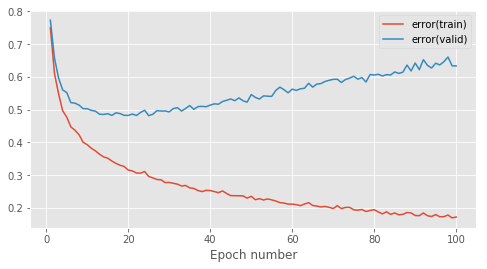

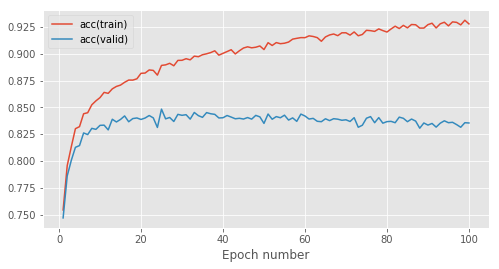

In [26]:
# Batchnormalization - Deeper Nets
# ReLu, 4 Hidden Layers, Fan-in strategy

from mlp.layers import AffineLayer, LeakyReluLayer, BatchNormalizationLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = UniformInit(-np.sqrt(3/(input_dim)), np.sqrt(3/(input_dim)),rng=rng)
biases_init = ConstantInit(0.)
b6_model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    BatchNormalizationLayer(hidden_dim),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    BatchNormalizationLayer(hidden_dim),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    BatchNormalizationLayer(hidden_dim),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    BatchNormalizationLayer(hidden_dim),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    b6_model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/25_error_leaky_relu_4hiddenlayers_fanin_bn6", "../results/25_accuracy_leaky_relu_4hiddenlayers_fanin_bn6", "../results/25_stats_leaky_relu_4hiddenlayers_fanin_bn6.csv", notebook=True)

In [27]:
#Test
# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)
error = CrossEntropySoftmaxError()



['inputs', 'targets']


In [31]:
op1 = Optimiser(b1_model, error, learning_rule, train_data, valid_dataset=test_data, data_monitors={'acc': lambda y, t: (y.argmax(-1)).mean()}, notebook=True)

In [33]:
op1.eval_monitors(test_data,'')

OrderedDict([('error', 0.73218812646223641), ('acc', 22.880696202531649)])

In [34]:
op2 = Optimiser(b2_model, error, learning_rule, train_data, valid_dataset=test_data, data_monitors={'acc': lambda y, t: (y.argmax(-1)).mean()}, notebook=True)

In [35]:
op2.eval_monitors(test_data,'')

OrderedDict([('error', 0.72305965804382144), ('acc', 22.78398734177215)])

In [36]:
op3 = Optimiser(b3_model, error, learning_rule, train_data, valid_dataset=test_data, data_monitors={'acc': lambda y, t: (y.argmax(-1)).mean()}, notebook=True)

In [37]:
op3.eval_monitors(test_data,'')

OrderedDict([('error', 0.62690179857059947), ('acc', 22.44759493670886)])

In [38]:
op4 = Optimiser(b4_model, error, learning_rule, train_data, valid_dataset=test_data, data_monitors={'acc': lambda y, t: (y.argmax(-1)).mean()}, notebook=True)

In [39]:
op4.eval_monitors(test_data,'')

OrderedDict([('error', 1.5280944007370616), ('acc', 22.147911392405064)])

In [40]:
op5 = Optimiser(b5_model, error, learning_rule, train_data, valid_dataset=test_data, data_monitors={'acc': lambda y, t: (y.argmax(-1)).mean()}, notebook=True)

In [41]:
op5.eval_monitors(test_data,'')

OrderedDict([('error', 0.71238005105423374), ('acc', 22.965569620253156)])

In [42]:
op6 = Optimiser(b6_model, error, learning_rule, train_data, valid_dataset=test_data, data_monitors={'acc': lambda y, t: (y.argmax(-1)).mean()}, notebook=True)

In [43]:
op6.eval_monitors(test_data,'')

OrderedDict([('error', 0.68353511512194609), ('acc', 23.126518987341772)])

CNN

HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 1275.7s to complete
    error(train)=1.17e+00, acc(train)=6.75e-01, error(valid)=1.17e+00, acc(valid)=6.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 1271.9s to complete
    error(train)=9.09e-01, acc(train)=7.38e-01, error(valid)=9.31e-01, acc(valid)=7.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 1274.2s to complete
    error(train)=8.53e-01, acc(train)=7.49e-01, error(valid)=8.81e-01, acc(valid)=7.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 1276.5s to complete
    error(train)=7.26e-01, acc(train)=7.84e-01, error(valid)=7.55e-01, acc(valid)=7.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 1272.2s to complete
    error(train)=6.29e-01, acc(train)=8.06e-01, error(valid)=6.59e-01, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 1268.2s to complete
    error(train)=5.58e-01, acc(train)=8.28e-01, error(valid)=5.96e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 1268.0s to complete
    error(train)=5.31e-01, acc(train)=8.33e-01, error(valid)=5.74e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 1269.4s to complete
    error(train)=5.07e-01, acc(train)=8.39e-01, error(valid)=5.59e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 1268.3s to complete
    error(train)=4.94e-01, acc(train)=8.41e-01, error(valid)=5.52e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 1272.4s to complete
    error(train)=4.82e-01, acc(train)=8.44e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 1268.7s to complete
    error(train)=4.82e-01, acc(train)=8.46e-01, error(valid)=5.48e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 1270.7s to complete
    error(train)=4.69e-01, acc(train)=8.48e-01, error(valid)=5.41e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 1269.2s to complete
    error(train)=4.74e-01, acc(train)=8.43e-01, error(valid)=5.47e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 1273.8s to complete
    error(train)=4.55e-01, acc(train)=8.53e-01, error(valid)=5.35e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 1275.3s to complete
    error(train)=4.56e-01, acc(train)=8.52e-01, error(valid)=5.39e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 1347.4s to complete
    error(train)=4.45e-01, acc(train)=8.56e-01, error(valid)=5.28e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 1299.5s to complete
    error(train)=4.50e-01, acc(train)=8.52e-01, error(valid)=5.40e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 1300.5s to complete
    error(train)=4.56e-01, acc(train)=8.50e-01, error(valid)=5.40e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 1384.0s to complete
    error(train)=4.30e-01, acc(train)=8.58e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 1325.0s to complete
    error(train)=4.20e-01, acc(train)=8.63e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01


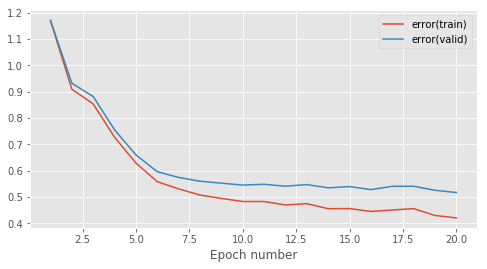

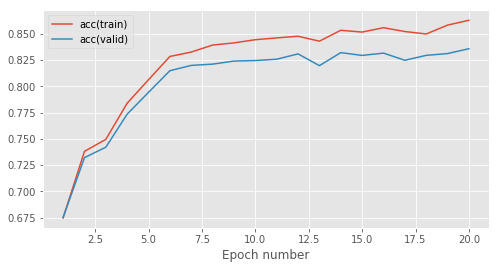

In [53]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer,ReshapeLayer,ConvolutionalLayer,MaxPoolConvolutionalLayer 
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 20
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 720
num_input_channels, num_output_channels,input_dim_1, input_dim_2,kernel_dim_1, kernel_dim_2 = 1, 5, 28, 28, 5, 5
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    ReshapeLayer((1,28,28)), 
    ConvolutionalLayer(num_input_channels, num_output_channels,input_dim_1, input_dim_2,kernel_dim_1, kernel_dim_2),
    LeakyReluLayer(), 
    MaxPoolConvolutionalLayer(),
    ReshapeLayer((5*12*12,)),
    AffineLayer(5*12*12, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/1_error_pleaky_relu_2hls_faninout_cn1", "../results/1_accuracy_leaky_relu_2hls_faninout_cn1", "../results/1_stats_leaky_relu_2hls_faninout_cn1.csv", notebook=True)

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 2245.0s to complete
    error(train)=8.96e-01, acc(train)=7.23e-01, error(valid)=8.89e-01, acc(valid)=7.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 2249.5s to complete
    error(train)=6.91e-01, acc(train)=7.86e-01, error(valid)=6.92e-01, acc(valid)=7.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 2221.0s to complete
    error(train)=6.30e-01, acc(train)=7.97e-01, error(valid)=6.30e-01, acc(valid)=7.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 2222.7s to complete
    error(train)=5.50e-01, acc(train)=8.23e-01, error(valid)=5.62e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 2229.4s to complete
    error(train)=5.30e-01, acc(train)=8.27e-01, error(valid)=5.43e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 2226.1s to complete
    error(train)=4.97e-01, acc(train)=8.36e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 2191.7s to complete
    error(train)=4.89e-01, acc(train)=8.41e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 2192.7s to complete
    error(train)=4.93e-01, acc(train)=8.38e-01, error(valid)=5.17e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 2180.5s to complete
    error(train)=4.74e-01, acc(train)=8.41e-01, error(valid)=5.00e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 2195.1s to complete
    error(train)=4.61e-01, acc(train)=8.44e-01, error(valid)=4.85e-01, acc(valid)=8.36e-01


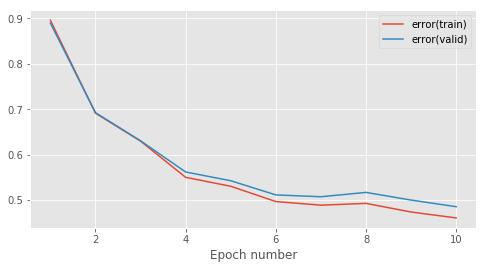

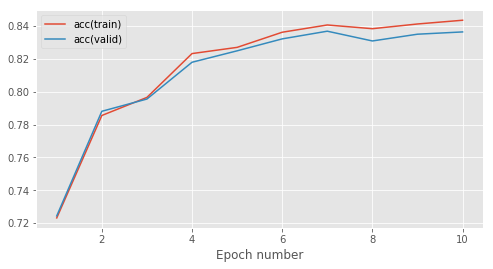

In [44]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer,ReshapeLayer,ConvolutionalLayer,MaxPoolConvolutionalLayer 
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 10
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 720
num_input_channels, num_output_channels,input_dim_1, input_dim_2,kernel_dim_1, kernel_dim_2 = 1, 5, 28, 28, 5, 5
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
cn2_model = MultipleLayerModel([
    ReshapeLayer((1,28,28)), 
    ConvolutionalLayer(num_input_channels, num_output_channels,input_dim_1, input_dim_2,kernel_dim_1, kernel_dim_2),
    LeakyReluLayer(), 
    MaxPoolConvolutionalLayer(),
    ConvolutionalLayer(5, 10, 12, 12, 5, 5),
    LeakyReluLayer(), 
    MaxPoolConvolutionalLayer(),
    ReshapeLayer((10*4*4,)),
    AffineLayer(10*4*4, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    cn2_model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, "../results/1_error_pleaky_relu_2hls_faninout_cn2", "../results/1_accuracy_leaky_relu_2hls_faninout_cn2", "../results/1_stats_leaky_relu_2hls_faninout_cn2.csv", notebook=True)

In [45]:
op7 = Optimiser(cn2_model, error, learning_rule, train_data, valid_dataset=test_data, data_monitors={'acc': lambda y, t: (y.argmax(-1)).mean()}, notebook=True)

In [ ]:
op7.eval_monitors(test_data,'')